# 本地模型调用

In [4]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "2,3,4,5"
import json
import re
import time

import pandas as pd
from transformers import AutoModelForCausalLM, AutoTokenizer

root = "/data0/work/SusieSu/project/openllm_func_call_synthesizer/src/openllm_func_call_synthesizer/data_process/mcp_dataprocess_1025/train_datas_1025"

model_name = (
    "/data0/work/SusieSu/project/workspace/llama/LLaMA-Factory/saves/qwen3_1.7b_1030_intent_mcp/sft/checkpoint-240"
)

# load the tokenizer and the models
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype="auto", device_map="auto")

/data0/work/SusieSu/anaconda3/envs/py311_env_sdk/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it]


# 计算token

In [29]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("/data0/work/SusieSu/project/workspace/llama/LLaMA-Factory/models/qwen3-1.7b")


In [33]:
text = """# Überblick über die Aufzeichnung  \n- **Hauptinhalt oder Zweck**: Keine Angabe  \n- **Wichtige Themen oder Punkte**:  \n  - Wemmen Mikobolden Tanst, von Karl Alberti  \n  - In Altard Seid lab Deimalen Lampmann  \n  - givita entrich aufer de wise nachivarden  \n  - in Wilder wise their enzem on Shaurig  \n  - Disa hutten gerad in the near despaumes in dim der lampman's house bloodskinomen  \n  - The lampman dagan tansde wand Aben so gaden in gutten drunk sake  \n  - I come also here for und near the Sichten Tanzenten  \n  - Damikrifta sprecher Glajan divanger des Mannes  \n  - The lampman will filter senior  \n  - I wader ruber also Ardlich Fro  \n  - A king also to Frieden the House of Win Alif of Wundad Anstaunten  \n  - In the Nachkinger Tin, on drafte cobalt or virglich ann  \n  - Unzerfreund von Gesten Shanheitenicht so common  \n  - A wawen ungesichta tensa  \n  - Glitch clutch, sassy underrechtenwange  \n  - In the fawn where Mammy Kobolden danced from Karl Alberti  \n  - Ein Brief  \n  - Auch Briefed as Lord Chanders and Francis Bacon  \n  - Von Hugo van Hofmannstal  \n  - This is eine Librivox auf name  \n  - Alle Librivox auf namen zindlitzensfrei und in Eufenlichembesitz  \n  - Wait, information on Tinweis and these projects by LibriVox punct org  \n  - Hugo von Hoffmann's Tale  \n  - Ein brief  \n  - Auch Briefed as Lord Chanders and Francis Bacon  \n  - Erst drog Neulzen Hundert Zwei in the Literatur Sagrift Der Tag  \n  - This is the brief  \n  - Den Philip Lorchandus, Jung Arzondus Earl of Bath,  \n  - and Francis Bacon, Sperter Lord Verulum, and Viscount St. Albans Schrib  \n  - Um sigbadisum Freund, the Wagner Genslichen, fat sichtes of literare, Schuberti, Gunzu, and Schultigen  \n  - As is Guti von Einen  \n  - Meinhofer yet a Freund  \n  - Mein Zweijeriges Stilschweigen z uberseen und zo anmichteschreim  \n  - As is Meer Alts Gutich, Irabazorgness omich  \n  - Irabe Fremdung, ubedegeistige starnis in the ich inen suffer zinckensheine dien ausrog, de leichticke undescharzes sugim die in no gross menschen  \n  - Die von der Geferlich des Lebensteus Dormen und denor nicht and Mutichtzind in Irgewald haben  \n  - Sie schlissen midim aphorisma des Hippocrates  \n  - qui gravi morbo corruptidoloris nonsentient, iis mens agrotat  \n  - Und meinen  \n  - Ich Bedorfeder made it seen nichno omein Übertzubendigens orner nochmier, omeinen zinn, fedenzoo stand meines inanzer scharfen  \n  - Ichmecht inen Zo antwarten vie zias omichvadinen  \n  - Mecht mich inen gans aufliesen und Weissnicht wie ich michtatzonemenzoll  \n  - Kam wais ich op wich nochteselbe bin andin ir Kospara brief sichwended. Bin den ich, der noon, Zachson Swanzigerig, der mit neuent sein yenen neuen Paris  \n  - Jenen Traum der Dafne, Jenes Epitalamium hind Schriebdies  \n  - Undenemprung irwalte hind tomunden sherfaspiele  \n  - Dern an Himlsche Königen and Einige Alzo Narsisch dig Laus and Terrenzich North and Zinnengnedich Knucksind  \n  - And bin Ichwiderum, der Middraun Swanse  \n  - Or that in Steiner and Lauben des Großen Platz von Venedig in the Jennesge Fuger Latin Schaperiodenfund  \n  - Desenge diger Grundres und Aufbau in im inan meer and Zuchte  \n  - Alstie aus de Meir Auf Tauchen den Bauten des Palladio in San Sovin  \n  - Und Conte ich  \n  - Wen ich understeelbe bin  \n  - Allespourn und Narben Dieser Auskeboard meines Angesch Pantesten Denkens  \n  - So Felic aus meinem undbegrauflichen Innern valieren, das michen ihrm brief der formuligt, der tittel Jenes Kleinen tractatis framt und Kalt anstraat, ya  \n  - Das ich in nicht alts ein Golofigespild zusmen gefaster ward so gleich aufassen, sonder noor ward für ward vo steen counter alt stretmed lattinchen warda so for bunden, zum irsten malfos auge  \n  - a line Ich bin Siadoch  \n  - And as ist rhetoric, indeed Fragen. Rhetoric  \n  - The good ist für Fraun or the fiddler meinen  \n  - Derner von Unsrad Seidzo Iberschetz de Machmittel Auernicht hinreichen ins inredetting Zutringen  \n  - Mein in Rasaba mus ich inendarlegen  \n  - Anes under Barkaid, einer Un Art  \n  - Wenzie Wollen ein Krankheit mein skeisters, Wenzie Begrifen Zollen, das mich ein Eben zolltcher, Bruchenloze Abgrund von den Scheinber formie Liegenden, literarschen Arbeiten Trend Alz von den die hintermisen und die  \n  - So Freeman Zimmer  \n  - Mein Eigentum Sunenen Segere  \n  - Ich Weissnicht Obisch Meer the Einringlichke Wohlwollens  \n  - Odi unglauplicharfi irskedechnespovunansol wenzimi di fossidenen, kleinen plene, wider forofen, with din Ichmich in Geminzamintagen Schunabeilstrong Trog  \n  - Very good  \n  - Ich Walt die Ersten rigirnsjahra uns vastorblen glory in sovereigns das achn heinrich darstellen  \n  - Die hinterlasenen aufzeichnungen meines großwadest des Herzogs von Exeter  \n  - Ubasine negotiation with Frankish and Portugal, gaben me an art von Grundlage  \n  - Und Austem Zalust  \n  - Floss in yenen glucklichen belabten targen  \n  - We do not die form in Micheruber. Jena Tiefen, Wahren, inner form die, Jensazdesge der Retorchen Kunstug Erske Antwern, can die  \n  - Von Welshaman nicht mirzagen canter sie der stoflich anordne, ten sie doch drinkt asie hib as auf, und Schaft dichtung und Wahit zubleich  \n  - Ein widas piel e wigal kreft ein ding Herlich wie musikund algebra  \n  - These were my Leopling's plan  \n  - Masis der Mensch das ir plene macht  \n  - I spild a wid underren planen  \n  - I a good brief lest Auertiese Heraufim  \n  - Yedweda Folgesogen but einem Tropfen minus Blutus. Tansen Zieformia  \n  - Will Trau Rige Muchenana Duostramauer of der nicht mere die grelleson der Glucklichentageligt  \n  - Ichwalti diefaben und mutuschen al Seelung  \n  - Welch die alten and Sinter Lassenhaben and Andene die Mahler and Bill Tower, a endless and gedankenloses  \n  - Aufschliesen, Alt the hero Glufen einer Geheimen, Un Erschepflichen Weisheid, derren Anhoch ich  \n  - Manchmal we hinter anem Schleier to spurmeinter  \n  - Ich en, a wider degescholterne  \n  - Dostoend bortle hanged, ovisawa de wigliche ist, mufti bitzwelflen  \n  - Das is then Doctor Stark, Schrider Kese  \n  - Hold them Beitli Herundo and bring in here by Fala de Wache  \n  - The Beutliwood Abgenomen, Undem Kese Gibrachte, and Eufnede, Arwengans for Vuna des Gisichmachte, or Snochdein in the Beutlfund, Umbumgenauerin Siena Kante, Dases Garnich the Fruor Beitl War  \n  - Kerl, we had a desvertige bracht, fragt enlisting mann  \n  - Diesel at Silti we are in Gleichenbeitel ungeverdigg, und Diesen dan in deskes gang watt for Taus Tabe  \n  - Bisten vote shauer Bursche, Sarktedande Keser, undademed a gluckste von Einso seinchenst, so as to dern Obester Sen, on the Huelsenichten Lassen  \n  - Sogita further stand in Loiti Replichtun und the Naraven  \n  - Und so gais  \n  - Ende von der Schlauer politist von Carnalberti, Gilles von Ellie, Yuli, twenty nineteen  \n  - Der Wiltgenzeflug in Katatanachauen, von Max Dauten die  \n  - This is an Librivox aufname  \n  - Anne Librivox aufnamen Zentlitzanzfrei unten of information on ten wisdom and these project keepers by Librivox punkt auk  \n  - Der Wiltgenzefluk in Katata Nachschauen  \n  - In der Alten Hauptstadt Kyoto, in the Eltesten Kunstler Temple und Kaiserstadt Japan, Hatten im Mittel alter Field Mahler den Auftrachehalten, Diege Mescher Einesberg temples Auszumahlen  \n  - In these temple Zurg sicht di greiser liche familie in den zommatagen zurug  \n  - And flech the daughter eine Gevochen unta der Opput der Reichen man Schetzu Vonnen  \n  - Dimala Bagan Yewalk  \n  - Einer Malter Einen Sahl, Wus Berlinge in Scharren Uberdie Wanderflogen, und sich in Reisfelden und Bambusheinen, or Falmen und Rohrenchauklitten  \n  - An undermaler, Malte of Silber Papier Hinter Grund, an anzal  \n  - Bogrosa Meraswellen Aufraushten untifier Wende Umschaimten  \n  - Wida ein under Mala, Malta Einzal, Follf von Katzenwutten, and Jungen Katzen, the in Blumenkarbun Spielten, and the Blutenkapfer Grosser Peonien Seruften  \n  - The Erster salvo der Sperlingsal genant  \n  - De Switter desal de Schreumand and Wellen, and the Tritter Der Zal despieland and Katzen  \n\n# Wichtige Themen oder Punkte (fortgesetzt):  \n- Oze desclanigensemedian, from Peter Christen Aspirnsen, and Jorgen Engepretzen Mo, Uversetz von Friedrich Breiseman  \n- As Weimalen Koenigter had the sophiligense, does her eggs and the dienhalten mustitzohuten  \n- Was sitsodado clerner ose, zaktido koenigson  \n- Thinks the Nich be common, Sagdida Prince  \n- When he harms and Verdikin Voltrigen, Sagda decline Osa, as worden nomala Auskesand Nach Alanden on Reichen, the Sultan the Schensten Princess in Abmalin  \n- Dan Walter Kunik Zon Sigenitzogimalin also good does the nomsifreide Sisakder on Watsen abroad on Daruva Vader Prince also Ardlich Voknukt Noon Hart the Wedder Prince and Stein on Veneer in for  \n- Ost the princess in thus heard the wadeser angst, and but decline the oser does the siam arden irashtelle to the prince since bedling merchte  \n- Where is this? Rein on Kurschi Jungfrau, Sagidastein, undarov lichtenschlafen  \n- In Danacha were come the princess in Lichtenzian Oser  \n- I'll see him Andromorgen Aufstranden fraged the Prince Vider  \n- Where is the stairs my embatch dagged? Einetischen dreikinder gehab tat, suck the dashdein  \n- With the prince thus heard the Walters in Tabem, so no chic the sievidanach on Namsiene Andre proud  \n- Also no denoy brought by Survalter, had the oath of the scan again Zemaidian, See Huida Freeman and Wei Kingesetst  \n- Ver sits is to here, to claim a osa, Sagde the prince  \n- Ich sits a here on flick in the soil, and sets a lapma of lapma, the nikwati of the Kwinikson from England, Sag the Ose  \n- Then canst niche be commen, Sakti do Koenigson  \n- When he haben soil, then where the hin wolkriegen, suck the ose  \n- Mitisa princessing is non Abum Sovinda Foreign, Nomitum Under Shitas Destin, or Samorong Aufstan Sagte  \n- Noon Walter Dokunigor Sinich Mehabum, Son Yagde Sividas them Hause  \n- Are Emal Mantia, Walters Novosurum, Obenicht Anifinden Kerne, Dino Renerina Krushche Jung Frosi Arise non Vedom heredo Fililinder, Bise Entlich Anifant de Aladen Mochde Alsisidar of Emil Bisurda had the Osida Skanzemitian, Sikwida and Viking is it  \n- Why sits us to hear to clean a Ose, frucked the prince  \n- I sits here and flicked a steel and set the Lapmar of Lapman, the Nikvat of the Inkunigson from England, Suck the Ose  \n- Then can't Snij be common, sucked the prince. When he gin Habemsoll, then we're the gin volcring, for said Steekline Oser  \n- Or the princess in Angram Sakto Osa daskenzimitian, Suir Ebem Sovietembiden Ersten, and Sushona and Liebsten Harpede, or the Edwards in Vege Vera does the princely visen sole, Sumus Nicho Denstein Triten, then the prince was embedding leg hate, then I suck deem Alice  \n- Vidi princess in thus heard the Watsia Ingstlich. Arbasi were Emso for Slang Vidi Biden Andren, Umbard Osa, Dasikam Armen Irstellitz and Prince and Spetlegen Milchte, and when I angish laugh from Sai Walton Sivido Umtausen  \n- So does  \n- Ols Osidas Gensimetian Steinrans Frachta Prince Vida Bears Deem and Betchdagt Rein on Kurscha Jungfrau, Saktas Dein, on Darov Likten Sischlafen In the Nacht Avasta Prince and Ring on Os's finger Devar was drunk at Dasinika up Grigen Kante, then the prince had the Nachira Volgi Mergt, Das Nichens Richtik Zuging, on Darum Walter and Seiching Habem, or Rana Directiva Kenkunte  \n- Ost the prince Engishlafenwa come the princess in Gerk the Osen and Genshin  \n- and late the six selves on Irostelli and Spet  \n- Visi nonemorgen aufstranden und the prince fragte. Ver is this the as members dagg, Sakt the stein wider. Anne Dishon try Kinderge habtat. And whilst the princess heard the wader so bose does aung blitzhurst them housy yagde  \n- Dara Fragter den Stein, we are stemmed this and dry Princessen and so summon Hinge, the Uwer Ingisting Bern. Dar tilde Stein with it the Sarifa Hild, and das the Princessen in Imbertrogen, and also the skyn again Zemidian, and Irish Delige Lake Tetten  \n- Daswaldeda Prince Ersnik Klaum, on King Dahov's Feld wozes on the Genzehute, then a voltasin Obsivalden Ring Hate. Hatsidin swis the swollen best in Venice Sitzo Gimaline, Dark Dear. Alse nunsu Eurv's Feld Karm Sa, Dasen Lapmumian Finger Gibunden Hatte. A frag the sieum sidas gitan hate. Ah Sagdesi, Ichabmi so Arkishniten  \n- The prince Walton on Durhast and Finger Sein. Our osa Walton and Lapnicht up Naman  \n- Dargriffian finger on Hilton Fest, and we also enter involved taking the lapm up. Und moon are candida prince of Gleisen Ring. Danamasi Mitziovschloss ungabe Filischene Glader and Hallichmuck, and Dar of Hilton See Horsead. So become known also as Klanigensematian, then Koenigson from England. Bloss Valesubishtim dwar da seen Habem Salter  \n- Enne von Ose das Glenigense Median, from Peter Christmas Aspiersen, and John Enge Bretzen Mo, Uver sets von Friedrich Breisemann, Gillesen von Ellie, Yuli, Zwerhausen von Zeyn  \n- The flower politist from Carla Alberti. This is the Eliprovox Aufname. A Liliprovox Aufname St. Leiten's frowned in earthenly sits  \n- Veterin for maturion on Tinwesitz or Betalgung on Disumpriect, gibdespeliprovoxprung dot org  \n- The Schlau Politzist. Fusnote. Koreanischen Ursprungs. Were the Deshalbin disassembling with Aufgenomen, the Coria noit sensien japan and valabdworde, and yetst onto them namen chosen and Japanisch a province ist. Obigeratzelung arena dan the listing deep ostausen on Anenarcht
"""

In [2]:
text = """多更新免费电子书请关注www.abada.cn 
伟大统帅的传奇一生：拿破仑大传  作者：[美]艾伦·肖姆                      
 　　这是迄今为止最权威、最全面的拿破仑传记。长期以来，拿破仑一直蒙受着学院、媒体以及政治家的嫉妒和恶语相相人们必须把他像其他历史人物那样公平对待。 
　　拿破仑的一生体现出了人类的超越性。在其主政期间，他将大革命期间自由与民主的精神和资产阶级的利益予以巧妙的结合，其对外征伐与扩张对整个欧洲乃至全世界的冲击带来了意义深远的变革。拿破仑是他自己命运的产物，而非自身命运的创造者。他注定失败，也注定不朽。     
上海社会科学院出版社 出版                
　　我们有时试图忘记历史，但历史却不会忘记我们。 
　　——艾伦·肖姆……我敢说我的灵魂在我（生命的）的朝圣之旅中完全是陌生的。 
　　——弗朗西斯·培根当然啦，朋友，他真是像个巨人似的横跨在这个小小的世界之上，而我们这些小人物就在他的巨腿之间徘徊，探头探脑地走向我们毫无光彩的坟墓人们有时候是他们自己命运的主人——莎士比亚《尤利乌斯·恺撒》有过一个日子——有那么一刻大地是高卢的，而高卢属于你如果那时候，不等享受太多你就放下这无限的权力那一举给你带来的美名会胜过马伦哥传扬的英名而在一次悠久的晚霞里它会把你的没落镀上金色你的罪愆也只是浮云掠过——拜伦他常常最感遗憾的一件事是，他无法接引正统的原则来作为他的权力的基础。很少有人像他这样深刻地意识到：丧失了这种基础的权力是岌岌可危、摇摇欲坠、 而又是容易遭受攻击的。 
　　——梅特涅野心是他的心智的原动力和他的意志的永恒的实质，它是如此地密切，以致不能同他本身区别开来，甚至有时还达到了不知不觉的程度 。 
　　——泰纳   
　　译序   
　　200多年来，拿破仑一直是个热门话题，其传奇的一生在多数人心目中是一场辉煌的悲剧。爱之者将其比拟为公元前4世纪伟大的亚历山大大帝转世再生；恨之者痛斥其为20世纪最大的恶魔希特勒的先行者。 
　　英国多勒姆大学博士、现任胡佛战争革命与和平研究所研究员的艾伦·肖姆曾先后在南康涅狄格州立大学、加州大学、牛津大学教授过法国历史，他在完成《特拉法加战役：1803～1805战前倒数计时》和《拿破仑的百日王朝》这两部有关拿破仑的重要著作后，意犹未尽，最后决定为拿破仑写这样一部“包罗一生”的全传。 
　　艾伦·肖姆在本书中确立了全新的观点，直言不讳地指出拿破仑鲜为人知的性格缺陷，也毫不掩饰拿破仑在作战规划上的经常性失误与其运筹帷幄决胜千里之外的表象所形成的鲜明对比、以及那些无止尽的征战造成的毁灭性悲剧。艾伦·肖姆遍游历史故地，以一个美国人的眼光，以一个脱离利害因果所影响的后世评判的准则，给人们展现了一个与通常印象中不太一样的拿破仑：他睿智好学，有时一意孤行；他慧眼独具，有时好高骛远；他宽宏大量，有时刚愎自用；他任人唯亲，却遭致众叛亲离……他是一个伟大者，万众瞩目；他又是一个孤独者，茕茕孑立。艾伦·肖姆还寻找到了许多实证，揭开了拿破仑在圣赫勒拿岛囚居时的神秘死亡之谜。 
　　应该说，艾伦·肖姆的这本书是第一部能够公平、公正地解剖拿破仑个人生平的全新传记。作为本书中国第一次引进出版的译者，我真诚地希望自己的工作能够给其他人以帮助，帮助大家认识一段历史，认识一个人——一个真实的拿破仑。   
　　序言   
　　“1991年9月，我们抵达博罗迪诺前几周，一名赶马拉犁的农夫犁地时翻出了两具遗骸：一具是将军的遗骸，另一具是步兵的遗骸。”德·梅内瓦尔男爵在1996年2月26日给我的信里写道。遗骸面向俄国，将军不是孔佩尔（Compere）就是马特尔（Martal），两人都是在那次战役中阵亡的。步兵的骷髅双手仍紧握着朽烂的步枪和刺刀。博罗迪诺博物馆的向导告诉男爵，过去几十年里他们已经发现了几十具可以追溯到1812年9月7日的人类遗骸。1993年9月访问艾劳时，我的这位男爵朋友跨过了另一具新近发现的遗骸——所有这些遗骸都在提醒我们：过去的历史事件离开我们并不遥远；我们有时可能试图忘记历史，但历史却不会忘记我们。 
　　历史总是令我着迷，但历史不是指只有对国王执政、战役和条约年代等历史事件的毫无生气的编年陈述；这样的陈述包罗万象，却单单少了人的联想，缺少了对创造这些历史事件的男人和女人以及他们身边整个氛围的关注。若要矫正这类缺乏辨别力的观点和陈述，必须注入现实感和理解力——也就是说，读者必须将拿破仑·波拿巴的一生视为自己同时代的人的一生，必须对他的个人价值、家庭、朋友、同伴、问题、个性和目标进行思考。 
　　10年前，我开始着手研究拿破仑时惊异地发现：没有一部传记是涵盖了他一生的所有方面的。我还发现大多数令人激动的传记都趋于集中在他生活中的某些“片断”——或是他的军事战役、或是他的外交政策、或是他的治国方略和政治改良——从而只揭示了这个人物的某一个方面。在过去的150年间，有过成千上万部这样的研究著述，其中大部分现在已绝版。此外还有成千上万篇有关拿破仑及其帝国的文章。不用说，决定花去我一生中的若干年时间去承担这样一个艰巨的任务，即为一个有着大量一次和二次研究和来源资料的人物撰写一部全传绝不是一个轻而易举的决定。 
　　我是1987年夏天开始着手研究拿破仑的，可以说，开始是间接的工作，我对他企图侵略英国、法西联合舰队在特拉法加海战中遭到纳尔逊舰队重创以及奥斯特里茨会战进行了研究。其后我写出了《拿破仑的百日王朝》，该书涉及拿破仑被放逐到地中海的厄尔巴岛；他在法国南部海岸登陆，向巴黎挺进；他重整旗鼓和反法联军的激战以及他最后的战役滑铁卢败绩。 
　　直到完成了《拿破仑的百日王朝》之后，我才不太情愿地决定为拿破仑的一生而不是某些片断写一部传记。我感到——现在仍然觉得——对拿破仑这样的人物非常需要有一部包罗他一生和性格的各个方面、融合所有新的研究和历史档案的全传。 
　　为此，我走访了欧洲、英伦和美国的图书馆和档案馆…… 
　　我还遍游了埃及、意大利、西班牙和整个法国，包括其主要海港、从莱茵兰到哥本哈根、乘火车到柏林和波茨坦，穿过波希米亚到维也纳和萨尔斯堡，沿莱茵河到勒根斯堡和乌尔姆，然后到瑞士，最后到比利时的滑铁卢，旨在找寻拿破仑的踪迹。这是漫长而艰辛、一刻也不得停息，然而却是令人着迷的史诗般的旅行。 
　　对于一个欧洲人来说，对拿破仑持中立的观点从来不是一件容易的事：对于法国人来说，他几乎被普遍视为民族英雄，他的暴行被忽视了，避而不谈了；对于大多数欧洲其他国家的人来说，他们的祖先在拿破仑的征服之下深受凌辱，他们憎恨他也是可以理解的。我对拿破仑的观点则是在对他研究的基础上建立起来的。我尽量做到不隐瞒任何真实情况，不偏不倚。作为一个美国人——当时他年轻的国家除了与法国有一些小的海上冲突之外，既不是拿破仑的敌人，也不是拿破仑的同盟——因此，我希望自己避免了在个人感情和民族情绪上对任何一边的偏向。 
　　利用一切我能够收集到的法国的文件档案和现有的回忆录，我竭力研究他个性和生活的各个方面，无论是有关他个人的家庭生活还是内政、外交、战役方面。我重新审视了他的许多战役、他对被征服国家和人民的态度、他与同事和下属的关系以及他的理想、动机和行为。我的目的是全面深入地发掘拿破仑和他的行为。 
　　我希望我的这部传记能对我年轻的同行起到抛砖引玉的作用，能更加深入地对这个十分值得、而且十分需要研究的题目展开多卷的研究。     
　　第一卷 炮兵上尉：他的祖国需要一个救世主(上)   
　　第一章 危险的岛民(1)   
　　1778年12月17日，32岁的夏尔·波拿巴在科西嘉岛上的阿雅克肖港登上了海船。在他身边是10岁的长子约瑟夫；9岁的次子拿破仑，又名“拿破里昂尼”；还有内弟约瑟夫·费舍。他们刚刚离开了那栋位于斯特拉达马勒巴的4层楼——年久失修的石头宅子，约瑟夫和拿波里昂尼是在那里和他们的母亲吻别的。他们此行的目的地是法国。约瑟夫将进入奥顿神学院，准备将来当神甫。拿波里昂尼将进入布里埃纳军校，学习对于大多数科西嘉人来说仍然是难以掌握的法语，此外还要学习历史、地理、数学以及为了进入巴黎皇家军校所必修的其他课程。孩子们和蔼可亲的年轻舅舅、他们母亲的异父兄弟费舍则要到位于埃克斯昂普罗旺斯的神学院学做神职人员。拿破仑的短暂的少年时代就此结束。 
　　1769年8月15日，莱蒂齐亚①·波拿巴离开阿雅克肖教堂的大弥撒匆匆赶回家，差点把拿破仑生在路上。在家具稀少的客厅里，孩子降生人世；如同她做其他每件事情那样，她将时间掐得太准了。她原名叫莱蒂齐亚·拉莫利诺，是国家道路和桥梁监察官的女儿；其父亲死后她母亲的第二个丈夫，也就是莱蒂齐亚的继父，是名叫费舍的银行家。 
　　她的家族原籍伦巴第，在14世纪从热那亚到科西嘉定居前几乎迁居了包括佛罗伦萨和那不勒斯在内的大半个意大利。莱蒂齐亚是个身材苗条、个子不高、肤色黝黑、鲜有笑容的女子。对于一个没有受过正规教育、待字闺中、准备生儿育女的女子来说，生活是可怕的也是严酷的。1764年7月2日，年仅14岁的莱蒂齐亚与18岁的夏尔·波拿巴结婚。她的确生了不少子女，只有8个活了下来。她带有意大利口音的科西嘉语并不是毫无瑕疵的，她的语法和写作充其量也是够用而已——法国对她将始终是一个谜。至于书籍，无论是哪种语言写成的她都从来不读。但是，由于法国1767年5月15日从热那亚共和国手里买下了科西嘉岛（征服由帕斯夸莱·保利②领导的好斗的科西嘉人则是次年的事），尽管她憎恶法语和法国人，却命中注定要听人讲法语。她有着约7,000里弗赫③的嫁妆（这在当时是相当说得过去的嫁妆了）和一些土地。她是个坚忍不拔的女子，是动荡的科西嘉历史上严酷环境的存活者。她家所居住的楼下两层屋子里只有寥寥无几的几件家具，甚至连一块地毯也没有，预示着她以后也将是一位严酷的母亲。波拿巴家的住所很难说是个惹人喜爱的去处，她嗷嗷待哺的子女在那里很少得到慈爱。虽说她偶尔也会参加弥撒——她丈夫的叔叔吕西安是科西嘉的副主教——但她生来就不是“虔诚”的宗教信徒。她的世界就只限于她的丈夫——他很少在家、她的孩子——他们总是在家，以及她看家理财的责任。 
　　夏尔·波拿巴的家族是1520年由佛罗伦萨迁徙到阿雅克肖城的，此前他的家族成员曾经是佛罗伦萨的小“贵族”（虽然没有授衔）。夏尔家的第一个也是最后一个显赫的先祖、贵族古里耶莫·德·波拿巴在13世纪时曾是当时由意大利皇帝党④成员控制下的佛罗伦萨市议会成员。但是随着教皇派⑤的胜利，他和他的整个家族被迫逃亡托斯卡纳并隐居于利古里亚和圣米尼亚托的萨尔察纳，他们变得越来越贫穷，最后，弗朗西斯科·德·波拿巴不得不于16世纪踏上科西嘉岛找寻新的出路。 
　　波拿巴的家人都不是精明的商人，虽然总能受到教育，并不时在法律界谋到这样或那样的职务，但身后总是清贫凄凉。的确，当夏尔和莱蒂齐亚于1764年成婚之际，他几乎身无分文。他在比萨取得的法律学位使他成为阿雅克肖法律管辖区内的“皇家法官”。虽然授予了侍从武官的官衔，他的年薪也只有900法郎。但是他有“指望”——他疾病缠身的叔叔吕西安，一个没有家室的牧师，答应将他的全部遗产留给脾气温和但办事杂乱无章的夏尔。正因为如此，现在他们在阿雅克肖才有了一栋在幽暗的客厅里挂着法国总督骄傲画像的大宅子。 
　　虽然夏尔·波拿巴（这个家族在任何情况下都从来没有使用过贵族头衔）是个杰出的科西嘉爱国主义者，但随着保利被法国人击败，他迅速改换了政治门庭。他是这样一种人：虽然生性疏懒，却不断为政府的发展设计新的项目、做新的规划，以期改善自己的地位。可是，夏尔除了因此得以跻身阿雅克肖市议会12名议员之列， 之外一无所获，因为他的大部分规划都是失败的。尽管如此，至少在4代贵族门第中他的社会地位是稳固的，这为他带来了许多机会。随着他膝下子女日益增多——现在又有了玛丽亚·安娜（埃莉萨）、吕西安、路易、玛丽亚·阿纽齐亚塔（卡罗琳）、保利塔（波利娜）和热罗姆——夏尔·波拿巴需要得到他所能得到的一切帮助，因此，在法国奥顿将孩子送下船后，他匆匆赶往凡尔赛，为拿破仑1779年1月进入布里埃纳能获得全额奖学金而奔波。   
　　第一章 危险的岛民(2)   
　　1779年4月21日，约瑟夫和拿破仑第一次分道扬镳了。“我们分手的那天令我难以忘怀。”"""

In [144]:
text = """日语阅读精选50篇



吕寅秋　张云凤　杨吉萍　编著



图书在版编目(CIP)数据



口语阅读精选50篇/吕寅秋,张云凤,杨吉萍编著.—上海:上海交通大学出版社,2010



ISBN 978-7-313-06216-1



Ⅰ.日...　Ⅱ.①吕...②张...③张...　Ⅲ.日语—阅读教学—高等学校—教学参考资料　Ⅳ.H369.4



中国版本图书馆CIP数据核字(2010)第013598号



日语阅读精选50篇



吕寅秋　张云凤　杨吉萍　编著



出版社出版发行



(上海市番禺路951号　邮政编码200030)



电话:64071208　出版人:韩建民



常熟市文化印刷有限公司　印刷　全国新华书店经销



开本:880mm×1230mm　1/32 印张:9　字数:256千字



2010年2月第1版　2010年2月第1次印刷



印数:1～5030



ISBN 978-7-313-06216-1/H　定价:19.00元



版权所有　侵权必究



前　言



为了更好地测试出参试者的真实阅读能力，在最新的日语能力测试和J.TEST实用日语测试中，均出现了增加文章的读解内容和读解难度的倾向。为使日语学习者能够充分应对日语能力测试和J.TEST实用日语测试近期出现的新特点，也为了广大日语学习者通过日语学习能够更全面地了解日本，了解日本人的思维方式和生活习惯，我们特地从近期日本报刊中精选出大量精品文章，编纂成本书。本书有以下特点：



1．内容全新，涉及面广



本书的文章大多精选自近期的日本报刊杂志，其中评论性文章居多，不乏精品之作，并且其内容涉猎社会、生活、教育、伦理、公共道德等，可谓是当代日本社会的一个缩影，是中国人学习日语不可多得的宝贵材料。



2．对应考试，有助自学






本书选用了50篇文章，由浅入深，难度相当于日语能力测试2级到1级或J.TEST实用日语测试A-D级的水平。除了正文之外，本书还编纂了详尽的单词表和语法注释，可以使自学者无师自通，充分理解文章内容。每课的练习题与日语能力测试及J.TEST实用日语测试充分接轨，能起到深化对课文理解之功能。译文部分可以帮助学习者对文章内容的最后确认。我们认为，通过这样的学习过程，可以较快地提高对现代日语文章的理解能力。



我们相信，通过本书的学习，定能提高读者的日语实际水平，为日语的实际应用奠定坚实的基础。



由于我们的能力所限，本书难免存在不足之处，恳请读者提出宝贵意见。



编　者



2009年12月



目　录



前　言



第1課　買い替え



単語



解説



練習問題



译文



第2課　良い学校？



単語



解説



練習問題



译文



第3課　オレオレ詐欺？



単語



解説



練習問題



译文



第4課　温情停車



単語



解説



練習問題



译文



第5課　帰らなくていいよ



単語



解説



練習問題



译文



第6課　本当のこと



単語



解説



練習問題



译文



第7課　トイレのスリッパ



単語



解説



練習問題



译文



第8課　育児で夢を



単語



解説



練習問題



译文



第9課　「普通」でなくとも



単語



解説



練習問題



译文



第10課　ナゲキバト



単語



解説



練習問題



译文



第11課　迷いはないが



単語



解説



練習問題



译文



第12課　自立すること



単語



解説



練習問題



译文



第13課　サクラサク



単語



解説



練習問題



译文



第14課　お役所仕事



単語



解説



練習問題



译文



第15課　 築48年



単語



解説



練習問題



译文



第16課　ペットへの言葉遣い



単語



解説



練習問題



译文



第17課　③　 



単語



解説



練習問題



译文



第18課　隠語



単語






解説



練習問題



译文



第19課　目は心の窓



単語



解説



練習問題



译文



第20課　スネカジル



単語



解説



練習問題



译文



第21課　年をとること



単語



解説



練習問題



译文



第22課　桜の夢



単語



解説



練習問題



译文



第23課　会えないけど、長続きする人がいる



単語



解説



練習問題



译文



第24課　野山を歩けば、そよ風が電気を作る



単語



解説



練習問題



译文



第25課　問題な、以前の日本語



単語



解説



練習問題



译文



第26課　ホレるとボケる



単語



解説



練習問題



译文



第27課　ケータイから学ぶ現代に生きるマナー



単語



解説



練習問題



译文



第28課　新しい時代の家は、住むことのマナーづくりとそのマナー教育の場



単語



解説



練習問題



译文



第29課　地下鉄サリンから10年



単語



解説



練習問題



译文



第30課　見て見ぬふり



単語



解説



練習問題



译文



第31課　お弁当のような国



単語



解説



練習問題



译文



第32課　撃退法あれこれ



単語



解説



練習問題



译文



第33課　体罰が体罰になる時



単語



解説



練習問題



译文



第34課　新緑



単語



解説



練習問題



译文



第35課　30歳までに帳尻あえば



単語



解説



練習問題



译文



第36課　ウサギの穴や鏡の向こう側に……



単語



解説



練習問題



译文



第37課　大黒柱か、貧乏柱か



単語



解説



練習問題



译文



第38課　駆けっこでも勉強でもなく



単語



解説



練習問題



译文



第39課　新しい授業は何？



単語



解説



練習問題



译文



第40課　抗議



単語



解説



練習問題



译文



第41課　朗報！ネットスーパー



単語



解説



練習問題



译文



第42課　新しい環境、積極的に受け止め



単語



解説



練習問題



译文



第43課　電話を切る時



単語



解説



練習問題



译文



第44課　丸顔の笑顔



単語



解説



練習問題



译文



第45課　ちょっとした非日常



単語



解説



練習問題



译文






第46課　捨てるのなら今のうち



単語



解説



練習問題



译文



第47課　お父さんの役割



単語



解説



練習問題



译文



第48課　空港でVIP感覚を味わうカードで ラウンジ活用術



単語



解説



練習問題



译文



第49課　松の内 初笑い



単語



解説



練習問題



译文



第50課　生き方探しの旅へ



単語



解説



練習問題



译文



练习参考答案



第1課　買い替え



10年前に買った小型の冷蔵庫（容量137リットル）が壊れたので、電器店に出かけた。同じ大きさで安いものを探したが、種類が豊富で迷い、電気代も気になった。



省エネルギーセンターに問い合わせると、同様の大きさで、最も①省エネ性が高い冷蔵庫は年間消費電力310キロワット時、電気代6820円。一方、400リットル前後の大型で最も性能の良い冷蔵庫の方が、年間消費電力150キロワット時で、電気代も3300円と安かった。



家電の中でも、冷蔵庫は②断熱材の改良で最も省エネが進み、消費電力は最大で10年前の5分の1に減った。だが、安い小型にはコストのかかる技術を導入しにくく、400リットル前後の方が省エネ性が高くなっているという。私の冷蔵庫は年間消費電力が504キロワット時もあった。電気代で得する分を考えると、多少高く買っても、10年たたずに元が取れそうだ。



地球温暖化防止を目指す京都議定書は16日が発効日。エアコン、冷蔵庫、照明、テレビで家庭の消費電力の3分の2を占める。買い替え前に、データをよく③吟味してはどうか。【足立旬子】



毎日新聞　2005年2月16日　東京夕刊



単語



小型(こがた)　　　　　　(名)　　　　　小型



容量(ようりょう)　　　　(名)　　　　　容量



リットル[法litre]　　　 (名)　　　　　公升、立升



壊れる(こわ)　　　　　　(自一)　　　　坏、碎



探す(さが)　　　　　　　(他五)　　　　寻找



種類(しゅるい)　　　　　(名)　　　　　种类



豊富(ほうふ)　　　　　　(形動)　　　　丰富



迷う(まよ)　　　　　　　(自五)　　　　迷失、迷惑



エネルギー[德Energie]　 (名)　　　　 能、能量



センター[center]　　　　(名)　　　　 中心



問い合わせる(と・あ)　　(他一)　　　　询问，打听



最も(もっと)　　　　　　(副)　　　　　最、顶



消耗(しょうもう)　　　　(名・自他サ)　消耗



キロワット[kilowatt]　　(名)　　　　　（电）千瓦



大型(おおがた)　　　　　(名)　　　　　大型



性能(せいのう)　　　　　(名)　　　　　性能



断熱材(だんねつざい)　　(名)　　　　　隔热材料



改良(かいりょう)　　　　(名・他サ)　　改良



減る(へ)　　　　　　　　(自五)　　　　减少



導入(どうにゅう)　　　　(名・他サ)　　导入



得する(とく)　　　　　　(自サ)　　　　合算、占便宜



温暖化(おんだんか)　　　(名)　　　　　气候变暖



防止(ぼうし)　　　　　　(名・他サ)　 防止



発効日(はっこうび)　　　(名)　　　　 生效日



エアコン[air conditioning] (名)　　 空调



照明(しょうめい)　　　　(名・他サ)　 照明



吟味(ぎんみ)　　　　　　(名・他サ)　 玩味、斟酌



元(もと)　　　　　　　　(名)　　　　 根本、本金



解説



1　気になる



（1）～が気になる “担心……”，“对……放心不下”。






母の病気が気になって仕方がない。/非常担心母亲的病情。



試験の結果が気になる。/担心考试的成绩。



（2）(动词连体形)気になる “有意……”，“想要……”。



前接动词连体形或某些连体词，表示产生了想要做某事的心情、意愿。



どうして急に行く気になったのですか。/怎么突然想去了？



一人で京都へ旅行に行く気になった。/想一个人去京都旅行了。



2　～にくい



（接尾词）接在动词连用形后构成形容词。表示困难，“难于……”。



雨の後の田舎道は歩きにくい。/雨后的乡间道路很难走。



それは人前ではちょっと話しにくい内容なのです。/那是在人前难以启齿的事。



3　～という



前接句子，表示传闻。“听说……”，“据说……”。



明日の夜、映画があるという。/听说明晚有电影。



今度の地震により何百人も死んだという。/据说由于这次地震有数百人死亡。



4　～ず



(文语助动词)接在未然形后，表示否定。



飲まず食わずで一心に働いた。/废寝忘食地专心工作。



切手を貼らずに手紙を出してしまった。/没贴邮票就把信寄出去了。



5　样态助动词そうだ



前接动词、助动词的连用形；形容词、形容动词的词干；前接形容词“よい”“ない”、助动词“ない”时，要变为“よさそうだ”“なさそうだ”。



（1）“形容词、形容动词的词干+そうだ”时，表示对事物的性质、状态从外观上做的判断。相当于汉语的“好像……的样子”的意思。



この問題は難しそうですね。/这个问题好像很难啊。



母は心配そうに医者の話を聞いています。/母亲担忧地听着医生的话。



いつも元気がなさそうです。/总是没有精神似的。



（2）“动词连用形+そうだ”时，表示有关动作、作用的开始，或状态变化的判断。即：“将……”，“快要……”。



紙が破れそうになりました。/纸快要破了。



切れそうなひもは捨ててください。/扔掉要断的绳子吧！



練習問題



問1．①「省エネ性が高い冷蔵庫」とは、どのような意味か。



a　電気をあまり食わない冷蔵庫



b　置く場所をあまり占めない冷蔵庫



c　食品がたくさん入れられる冷蔵庫



d　デザインがユニークな冷蔵庫



問2．②「断熱材」とはどういう意味か。



a　空気の遮断に用いる物質。



b　熱の遮断・保温に用いる物質。



c　熱いうちに食べられる食材。



d　使用後数時間経っても熱さが続けられる材料。



問3．③「データをよく吟味してはどう」の吟味はどういう意味か。



a　詩歌を吟じ、そのおもむきを味わうこと。



b　罪状を調べだすこと。



c　物事を詳しく調べて選べること。



d　監督すること。



問4．筆者は「省エネルギー冷蔵庫」についてどう思っているか。



a　電気代を考えると、冷蔵庫を多少高く買っても、10年たったら元が取れる。



b　電気代を考えると、冷蔵庫を多少高く買っても、10年たっても元が取れない。






c　電気代を考えると、冷蔵庫を多少高く買っても、10年たたずに元が取れる。



d　電気代を考えなければ、冷蔵庫を多少高く買ってもかまわない。



译文



重新购买



十年前买的小型电冰箱（容量137立升）坏了，我来到电器店，想买一个同样尺寸便宜的冰箱。冰箱的种类很多，不知该选哪一种，也很担心电费的问题。



我向节能中心询问后才知道，与我从前的冰箱尺寸相同、最节能冰箱的年耗电量是310千瓦时，电费要花费6820日元。而400立升左右性能最好的大型冰箱的年耗电量是150千瓦时，电费却只有3300日元。



听说由于隔热材料的改进，在家电产品中，电冰箱的节能效果提高得最显著，其耗电量降幅最大的已降到10年前的五分之一。但是，需要花费高成本的新技术却很难引进到价格低廉的小型冰箱中，而与之相比，400立升左右的大型冰箱的节能效率却有了很大提高。我的旧冰箱的年耗电量曾经达到过504千瓦时，所以如果把电费节省的部分也加到一起考虑的话，现在即使买贵一点的，用不了十年就会把本金赚回来。



为防止地球变暖而制定的京都协定书16日就要生效。家用空调、冰箱、照明、电视用电要占家庭用电量的三分之二，因此，购买新家电前，是否需要把相关的数据好好斟酌一下呢。



第2課　良い学校？



娘と息子が通う東京都板橋区の小学校で昨春、新入児童が急増した。区内に住んでいれば、好きな学校に通える学校選択制が導入されたためで、例年の1.5倍の児童が入学。「学区外」率は50%超だ。



私立中学を受験する子が多い「お受験校」とみられて①“越境”入学者が殺到したようだが、そんなに良い学校かなあ。授業中に②平気で教室を歩き回ったり、「自殺してやる」と窓から飛び降りようとして大騒ぎになったり。高学年はほとんど塾通いで「塾で疲れているから、学校は③息抜きの場」と、のたまう親もいる。



そんな小学校のあおりも食って、もともと児童が減少していた隣接の小学校は新入学児童がわずか2人になり、今年度いっぱいで閉校されることになった。



選択制は、学校間の競争を促し個性化を図る狙いのはずだが、と区教委関係者に聞くと、「本来、目指していたものと違ってきているが、④朝令暮改というわけにもいかない」という苦しい答えが返ってきた。⑤「ゆとり教育」の例もある。誤りは、早めに改めた方がいい。【松木健】



毎日新聞　2005年1月24日　東京夕刊






単語



通う(かよ)　　　　　　(自五)　　　　来往、通行



急増(きゅうぞう)　　　(名・自サ)　　骤增



選択(せんたく)　　　　(名・他サ)　　选择



導入(どうにゅう)　　　(名・他サ)　　输入、引进



受験(じゅけん)　　　　(名・自他サ)　应试、应考



越境(えっきょう)　　　(名・自サ)　　越境、跳学区



殺到(さっとう)　　　　(名・自サ)　　蜂拥而至、涌向



平気(へいき)　　　　　(名・形動)　　不在乎，若无其事



歩き回る(ある・まわ)　(自五)　　　　来回走



自殺(じさつ)　　　　　(名・自サ)　　自杀



大騒ぎ(おおさわ)　　　(名)　　　　　大的骚动



塾(じゅく)　　　　　　(名)　　　　　私塾、补习班



息抜き(いきぬ)　　　　(名)　　　　　换口气儿、休息一下



のたまう　　　　　　　(文・他五)　　说



煽りを食う(あお・く)　(連語)　　　　被（奔驰的火车等带起来的）疾风吹倒，遭受损失



減少(げんしょう)　　　(名・自他サ)　减少



閉校(へいこう)　　　　(名・自サ)　　停课



競争(きょうそう)　　　(名・自サ)　　竞争、竞赛



促す(うなが)　　　　　(他五)　　　　催促、促进



図る(はか)　　　　　　(他五)　　　　谋求



狙い(ねら)　　　　　　(名)　　　　　瞄准、目标



目指す(めざ)　　　　　(他五)　　　　把……作为目标、指向……



ゆとり　　　　　　　　(名)　　　　　宽裕



誤り(あやま)　　　　　(名)　　　　　错误



早め(はや)　　　　　　(名·形動)　　提前、早些



改める(あらた)　　　　(他一)　　　　改变、改正



解説



1　～ため（に）



前接用言连体形、“名词＋の”，表示原因、理由等。“因为……”，“由于……”。



病気のために、学校を休んだ。/因为生病没去上学。



風が強かったために、船が出なかった。/因为风大，船没出港。



2　～ようだ



（比况助动词）前接活用词连体形、“体言＋の”，表示推测、推量。“好像是……”，“似乎是……”。



あの人はこの大学の学生ではないようだ。/他好像不是这所大学的学生。



どうも風邪を引いてしまったようだ。/总觉得像感冒了。



3　～てやる



（补助动词）前接动词连用形，表示说话人（或说话人一方的人）为身份地位低于自己的人或者动物进行某个行为。“给……”。



昨日子供に新しい自転車を買ってやった。/昨天给孩子买了辆新自行车。



犬を広い公園で放してやったら、うれしそうに走り回っていた。/在公园把狗放开，狗快活地绕圈跑。



下面的例句是一种生气的表达方式，也可用于故意做对方所讨厌的事情时。如果对方和说话人是对等关系的人，使用“～てあげる”。



こんな給料の安い会社、いつでも辞めてやる。/工资这么低的公司，随时都想辞了。



A：あんたなんか死ねばいいのよ。/你死了算了。



B：そんなに言うんなら、ほんとに死んでやる。/你要那么说，我真死给你看看。



4　～（よ）うとする






前接动词未然形，表示意志、打算等。“打算……”，“想要……”。



息子は東大に入ろうとしている。/儿子想上东京大学。



棚の上の花瓶をとろうとして、足を踏みはずしてしまった。/想取架上的花瓶，结果脚踏空了。



5　～いっぱい



前接表示时间的名词，表示全部占满，全都用上等意思。“全（都）……”，“到……最后时间”。



今月いっぱい東京にいるつもりです。/这个月打算都在东京呆着。



今週いっぱいでこの仕事を済ませるつもりだ。/我打算这周把工作做完。



明日いっぱいは忙しい。/明天全天都忙。



6　～ことになる



前接用言连体形，表示事态的客观变化以及根据某一前提客观地推断必然会导致的结果。“就是……”，“便……”，“等于……”。



学校で5時間、家で3時間、全部で8時間勉強することになります。/在学校5小时，在家3小时，每天总共学习8小时。



大変努力している彼はいつかは仕事に成功することになるだろう。/他非常努力，总有一天将获得事业上的成功。



7　～はずだ



前接用言连体形、“名词＋の”等，表示以前述事项为依据，做出当然如此、理应如此的推测。“应该……”，“按说……”，“该……”。



そのことはもう彼に話しましたから、彼は知っているはずです。/那时已经对他说了，他应该知道。



今日は日曜日だから、彼は学校にいないはずだ。/今天是星期天，他不会在学校。



8　～わけにはいかない



另有“～わけにもいかない”等形式。前接用言连体形，表示受到某种情理的约束和限制而不能做某事。“不能……”，“不可以……”。



お世話になった人に頼まれたのだから、断るわけにはいかない。/因为是关照过我的人所托，所以不能够拒绝。



風邪を引いたが、最近仕事が忙しいので、会社を休むわけにもいかない。/虽然感冒了，但近来工作很忙，所以又不能休息。



9　～方がいい



前接活用词连体形、“体言＋の”，用于说话人认为这样为好，向听话人提出劝告或建议时。“最好是……”，“还是……为好”。



そんなに頭が痛いんだったら、医者に行ったほうがいいよ。/如果头那么疼的话，还是去看医生的好。



自転車で行ったほうがいいでしょう。/还是骑自行车去好吧。



練習問題



問1．①本文にある「越境」とは何の意味か。



a　境界線や国境などを越えること。



b　定められた学区の境界を越えて、他の学区の学校に入学すること。



c　定められた境界線を越えて、他の国に行くこと。



d　密入国して、他国の学校に入学すること。



問2．②「平気で教室を歩き回ったり」の「平気」にあたる説明を次から選べ。



a　たいしたことはない　　b　物に動じないこと



c　気にしない　　　　　　d　無関心



問3．③「息抜きの場」とあるが、どういう意味か。



a　ため息をする場所　　　b　休みの場所






c　頭をよく使う場所　　　d　息が長い場所



問4．④「朝令暮改」とあるが、その読み方はどれか。



a　あされいぼかい　　　　b　ちょうれいぐらしかい



c　ちょうねいぼかい　　　d　ちょうれいぼかい



問5．⑤「ゆとり教育」とは、どのような意味か。



a　窮屈でない教育　　　b　ゆっくりした教育



c　勉強ばかりの教育　　d　教師本位の教育



問6．学校教育について、本来目指しているものは何か。



a　学校間の競争を弱くし個性化を図ることである。



b　学校間の競争を弱くし個性化を図らないことである。



c　学校間の競争を促し個性化を図ることである。



d　学校間の競争をなくし、みな平等にすることである。



译文



何为优良校？



去年春季，我女儿和儿子就读的东京板桥区小学入学新生数量急剧增加起来。这是因为实施了只要是居住在本区的居民，都可以自己选择学校的制度而造成的。去年春季的入学新生是往年的1.5倍，“学区外的入学率”超过50%。



很多孩子都蜂拥到报考私立中学较多的“高升学率学校”，这些学校真是那么好吗？在这些学校里，上课时在教室里随便走来走去，动不动就以要跳窗子、“我要自杀”引起巨大的骚动。高年级学生几乎所有人都去补习班，有的家长说什么“补习班太累了，学校是歇口气的地方”。



受到这些学校的恶劣影响，原本学生数就在减少的临近小学今年的新生仅有两名，今年年底只好关门了。



我们向区教委的有关人员质询，回答是很无奈的:“推行择校制的目的本是促进学校之间的竞争，推行特色教育，但是…… 现在的情况是违背原定目标的，但我们也不能朝令夕改呀。”还有“宽松教育”的情况也是如此。我觉得，错误还是尽早改正为好。



第3課　オレオレ詐欺？



①彼岸の日の午後、久しぶりに訪ねてきた義妹の応対をしていた。電話のベルが鳴ってしばらくすると、隣の部屋から入ってきた主人が「『オレ、オレだよ』と変な声の電話が入ってね」と言う。「それ、オレオレ詐欺の電話でしょう」と義妹も私も同時に声を発した。



－－聞き慣れない変な声で②「オレ、オレだよ」と言うので、「お前はどこのオレだ」と問い詰めると、「オレだよ、シンイチだよ」「変な声しているが、どうしたんだ」「花粉症で鼻づまりなんだ。九州で大きな地震あったというので電話したんだ。変わったことない？」と。シンイチからの電話だったよ－－。



それを聞くなり、義妹と私は腹を抱えて笑った。息子からの③気遣いの電話が「オレオレ詐欺」の電話に間違えられたのであった。ああ、良かった。笑い話として終わったが、とんだハプニングだった。



「春が来た 春が来た どこに来た 鼻に来た のどに来た 目にも来た」。ある投稿の一節を思い出していた。花粉症は今や国民の④関心事だ。私も花粉症にかかって4年目。⑤春はつらい季節となってしまった。






その夜、息子に「あんたの電話のことでみんなで大笑いをしたのよ」と電話を入れ、花粉症を乗り切りましょうと親子で励まし合った彼岸の中日でした。



毎日新聞　2005年4月9日　西部朝刊



単語



詐欺(さぎ)　　　　　　　(名)　　诈骗、欺诈



彼岸(ひがん)　　　　　　(名)　　春分、秋分前后七天的期间



久しぶり(ひさ)　　　　　(名・副) 隔了好久、许久



義妹(ぎまい)　　　　　　(名)　配偶者的妹妹、小姨子、小姑子



応対(おうたい)　　　　　(名・自サ) 应对、接待



鳴る(な)　　　　　　　　(自五)　响、发声



しばらく　　　　　　　　(副)　不久、一会儿



声を発する(こえ・はっ)　(連語)　发出声音



問い詰める(と・つ)　　　(他一)　追问、盘问



花粉症(かふんしょう)　　(名)　花粉症



鼻づまり(はな)　　　　　(名)　鼻塞



腹を抱える(はら・かか)　(連語)　捧腹（大笑）



気遣い(きづか)　　　　　(名)　忧虑、担心



間違える(まちが)　　　　(他一)　搞错、看错



笑い話(わら・ばなし)　　(名)　笑话、笑柄



とんだ　　　　　　　　　(連体語) 意外的、不可挽回的



ハプニング[happening]　(名)　 （偶发）事件、巧合



投稿(とうこう)　　　　　(名・自サ) 投稿



思い出す(おも・だ)　　　(他五)　回想起



今や（いま）　　　　　　(副)　 此时、此刻、马上



関心事(かんしんじ)　　　(名)　 关心的问题



乗り切る(の・き)　　　　(自五)　排除（困难）、渡过（难关）



中日(ちゅうにち)　　　　(名)　春（秋）分。在日本，春分或秋分的前后各加3天共7天成为“彼岸”。“彼岸”最当中的一天，即春分或秋分。故称中日。「お中日」



解説



1　オレオレ詐欺



息子や孫を装って「オレだよ、オレ」と高齢者の家に電話をかけ、現金を振り込ませる事件である。



詐欺の手口は、高齢者の家を選んで電話をかけ、「オレだよ、オレ」と言って反応を待ち、相手が息子か孫の名前を挙げると、そのまま当人になりすまし、「交通事故で金がいる」などと言って、指定した銀行口座に現金を振り込ませて騙し取るというものです。



“是我是我”诈骗案。这种案件一般都是向老年人家里打电话，自称自己是儿子或孙子，并让老人将现金汇入银行。



诈骗的手段是选择有老人的家庭打电话，在说完“是我是我”之后，等待对方的反应。如果对方举出儿子或孙子的名字，就直接装成老人的儿孙的口吻，并称“发生交通事故，需要钱”，让老人向指定的银行账户中汇入现金，以达到骗取现金的目的。



2　～のだ






前接活用词连体形、“名词＋な”，一般作为书面语言使用，口语多用“んだ”。敬体的说法是“のです”，也可用于会话。另外，正规的书面语言可以用“のである”。



（1）表示说明。用于说明前文所叙述的事情或当时的情况的原因或理由。“（因为）是……”。



道路が渋滞している。きっとこの先で工事をしているのだ。/道路堵塞，一定是前面正在施工。



試験の準備に忙しかったので、手紙を書かなかったんだ。/因忙于准备考试，才没写信。



（2）表示主张。用于说话人为了证实自己说服他人而坚持强硬的主张或表示决心。“是……的”。



誰が反対してもぼくはやるのだ。/无论谁反对，我都是要干的。誰が何と言おうと私の意見は間違っていないのだ。/不管谁说什么，反正我的意见没有错。



3　～なり



（接续助词）前接动词基本形，表示紧接着（几乎同时）发生的两个事项。“刚一……就……”，“一……就……”。



部屋に入るなり、座ってしまった。/一进屋就坐下了。



その選手はゴールに着くなり、ぱったりと倒れてしまった。/那个选手刚刚跑到终点就噗通倒下了。



4　～てしまう



“しまう”接在“动词连用形+て”后成为补助动词。有下面两种意义：



（1）表示动作完了。



論文を全部書いてしまった。/论文全部写完了。



今晩この本を読んでしまうつもりです。/我打算今晚把这本书看完。



（2）表示带来意想不到的不好的结果。一般都以“～た”的形式表达不可挽回之意。



テレビが壊れてしまった。/电视机坏了。



道に迷ってしまいました。/迷路了。



練習問題



問1．①「彼岸の日」とは何か。



a　春と秋を中日として、その前後7日間



b　春分・秋分の日を中日として、その前後7日間



c　遠い川の向こうの岸へ行く夏の日のこと



d　春休みに遠足する日のこと



問2．②「オレ、オレだよ」という電話がかかってきた人はだれか。



a　義妹　　　　b　シンイチ



c　主人　　　　 d　私



問3．義妹と私はなぜ腹を抱えて笑ったか。



a　オレオレ詐欺の電話がよくあったので



b　シンイチからの電話を「オレオレ詐欺」の電話に間違えられたので



c　シンイチは変な声をしているので



d　シンイチは花粉症で鼻づまりなので



問4．③「息子からの気遣いの電話」の気遣いはどういう意味か。



a　気にかかること　　b　気に入ること



c　気がすること　　　d　笑い話



問5．④「国民の関心事だ」の関心事はどういう意味か。



a　関係していること　b　特に興味を寄せる事柄



c　感心していること　d　重要なこと



問6．⑤「春はつらい季節となってしまう」というのはなぜか。



a　春は花粉症にかかる季節で



b　春は虫にかかる季節で



c　春はいい季節で



d　春には花がたくさん咲く季節で



译文



冒充亲属的诈骗






春分那天的下午，我正在与久未见面的小姑聊天。电话铃响过不久，我丈夫从隔壁房间进来急切地说：“来了一个电话，怪怪的声音直说‘是我，是我’”。我和小姑几乎同时喊道：“那肯定是冒充亲属诈骗的电话。”



丈夫说：“电话里是一个不熟悉的声音一直在叫‘是我是我。’我追问道：‘你是哪里的我呀？’对方说道：‘是我呀，是申一呀’。我又问道：‘你声音怪怪的，怎么回事？’”“因为花粉症鼻子不通气。听说九州发生了大地震，我才打的电话。你们都还好吧。”



听了丈夫的介绍，我和小姑都捧腹大笑。原来是儿子不放心打来的电话，我们却误认为是冒充亲属诈骗的电话了。啊，没事就好，我们把它当个笑话就过去了。不过是个意外事件罢了。



我突然想起了报上的一篇文章，文中写道：“春天来了，春天来了，来到哪里？来到鼻子里，来到喉咙里，来到眼睛里。”确实花粉症已成为当今国民的一大热点话题。我自己患花粉症已有4年之久，对我来说，春天已成为一个难熬的季节。



当晚我又给儿子打电话说：“因为你的电话，我们都大笑了一场。”并与儿子相互鼓励，一起努力来克服花粉症。我们就这样度过了春分这一天。



第4課　温情停車



私大入試真っ盛りの今月初め、JR東日本が受験生のため、東北新幹線を臨時停車させた。①下車駅に停車しない列車に乗った受験生が間違いに気づき事情を説明すると、列車を通過駅に停車させてくれたという。下車駅を過ぎていたため、受験生は折り返しの新幹線に乗り換え、試験に間に合った。



しかし、温情で列車を止めたことに②釈然としないものが残る。問題は、受験という個人の都合を列車の定時運行という公共の利益に優先させた判断の適否である。他の乗客に切迫した事情を抱えた人がいれば、列車のわずかな遅れも重大な結果を招く。一方、大学入試は少子化で今や受験生の③売り手市場。④より好みしなければどこかの大学に入れる。複数の大学を受けるから失敗してもチャンスはある。受験地獄の切実さはない。






だが、大人はまだ「受験は人生の一大事」と信じているようだ。広島県でも事故に巻き込まれた受験生をパトカーが会場に送り届けたという。国公立大入試はこれからが本番。“美談”が続くと、優遇される権利があると受験生が勘違いしそうで怖い。【梁瀬誠一】



毎日新聞　2005年2月18日　東京夕刊



単語



温情(おんじょう)　　　　　(名)　　　　温情



入試(にゅうし)　　　　　　(名)　　　　入学考试



真っ盛り(ま・さか)　　　　(名)　　　　极盛时期



受験生(じゅけんせい)　　　(名)　　　　应试学生



臨時停車(りんじていしゃ)　(名)　　　　临时停车



間違い(まちが)　　　　　　(名)　　　　错误



気づき(き)　　　　　　　　(名)　　　　发觉、苏醒



通過駅(つうかえき)　　　　(名)　　　　不停的车站



過ぎる(す)　　　　　　　　(自一)　　　经过、通过



折り返し(お・がえ)　　　　(名)　　　　返回、折回



乗り換える(の・か)　　　　(自一)　　　换乘、改乘



釈然としない(しゃくぜん)　(連語)　　　想不开、想不通



定時運行(ていじうんこう)　(名)　　　　定时运行



利益(りえき)　　　　　　　(名)　　　　利益



優先(ゆうせん)　　　　　　(名・自サ)　优先



適否(てきひ)　　　　　　　(名)　　　　适当与否



切迫(せっぱく)　　　　　　(名・自サ)　迫切、紧迫



抱える(かか)　　　　　　　(他一)　　　承担、负担



遅れ(おく)　　　　　　　　(名)　　　　晚、落后



招く(まね)　　　　　　　　(他五)　　　招致、惹起



少子化(しょうしか)　　　　(名)　　　　出生率低下，孩子数减少



売り手(う・て)　　　　　　(名)　　　　卖主



より好み(この)　　　　　　(名・他サ)　挑拣、只选自己喜爱的



チャンス[chance]　　　　　(名)　　　　机会



地獄(じごく)　　　　　　　(名)　　　　地狱



切実(せつじつ)　　　　　　(形動)　　　切身



巻き込む(ま・こ)　　　　　(他五)　　　卷入、牵连



パトカー[patrol car]　　　(名)　　　 巡逻车



届ける(とど)　　　　　　　(他一)　　　送到



本番(ほんばん)　　　　　　(名)　　　　正式演出、广播、正式（开始……）



優遇(ゆうぐう)　　　　　　(名・他サ)　优遇、优待



権利(けんり)　　　　　　　(名)　　　　权利



勘違い(かんちが)　　　　　(名・自サ)　误会、误解



解説



1　JR（ジェー・アール）



日本国有鉄道（Japan Railway）が1987年に分割・民営化して新設した旅客鉄道会社6社と貨物鉄道1社の統一的略称。それぞれの会社はJR東海・JR西日本などと称する。



2　～ため（に）（目的）



前接用言连体形、“名词＋の”，表示目的。“为了……”。



家を買うために朝から晩まで働く。/为买房子从早到晚地工作。



世界平和のために国際会議が開かれる。/为世界和平召开国际会议。



3　～てくれる



「～くれる」中的「くれる」是补助动词，表示为说话人或说话人这一方做某件事。



父は私に本を買ってくれました。/父亲给我买了书。



友達は私に写真を見せてくれました。/朋友给我看了照片。



練習問題



問1．①「下車駅」の読み方はどれか。



a　げしゃえき　　　　b　もとくるまえき



c　したしゃえき　　　 d　くだりしゃえき



問2．②「釈然としないもの」とあるが、どういうことか。



a　絶対正しいと思い込んでいる。



b　正しいかどうか人に判断してもらいたい。






c　いままで理解できなかったことが理解できた。



d　正しいかどうか理解できない。



問3．③「売り手市場」とは何を指しているか。



a　売り手より買い手のほうが有利な市場の情況



b　買い手より売り手のほうが有利な市場の情況



c　単数より複数のほうが失敗する可能性は少ない情況



d　複数より単数のほうが失敗しやすい情況



問4．④「より好みしなければどこかの大学に入れる」とは、どういう意味か。



a　好きでない大学ならどこの大学にも入れない。



b　嫌いな大学ならどこの大学にも入りたくない。



c　好き嫌いがなければどこの大学にも入れる。



d　好き嫌いがあればどこの大学にも入らないだろう。



译文



温情停车



在私立大学入学考试最紧张的本月初，日本东部铁路为了照顾考生，准许了东北新干线临时停车。据说当一个考生发现上了自己目的地不停车的列车时，说明了事情的原委后，铁路部门就让列车在本来不停的车站停车了。因为考生坐过了站，就乘坐返回的新干线赶上了考试。



但是对这种温情停车，我有很多不能释怀的想法。问题之一是考生的个人需求要优先于定点运行的列车是否合适。假如正巧车上有要办理紧急事务的乘客，那么即使是列车的短暂延误，也会给该乘客带来严重的后果。另一方面，由于出生率下降，现在高考已变成考生的卖方市场，如果不挑肥拣瘦的话，总归可以有大学可上。一般学生都报考数个大学，即使失败一两个，也是会有大学上的。考大学已经没有如同下地狱般的感觉了。



然而，成年人似乎还在坚信“考大学是人生的一件大事”这一信条。听说广岛县也有用警察巡逻车将遭遇突发事件的考生送到考场的事例。国立大学的入学考试即将揭开序幕，假如这类“美谈”持续下去，考生们都产生了拥有特权的错觉的话，那是十分可怕的。



第5課　帰らなくていいよ



「お久しぶりです」。大学4年になる教え子がひょっこり教室を訪ねてきた。農学部でDNAの研究をしているという。「最先端だね」と①喜んだ。あとは卒論の研究だけというから、相変わらず優秀。



一人っ子だから、卒業後は地元に帰って来てほしいというのが両親の願い。しかし人口3万の小さな島には就職先がない。たとえあったとしても、せっかく勉強してきたことが無駄になってしまう。今から公務員試験に向けて勉強しても間に合わないだろう。親思いの彼のこと、かなり悩んでいるようだ。どうやら修士・博士課程まで進みたいというのが、彼の本心らしい。






彼が中3のとき、私に ( ② )「親孝行って何ですか？」と聞いたことがある。あのときは答えられなかったけれど、自分の娘が中3になった今、胸を張って言える。



「田舎に帰って、日々単調な仕事を繰り返すだけ。面白いことなんて何もない」とくすぶる子供を見るのは、私は嫌。だから、母一人子一人だけど「家なんて帰ってこなくていいよ」と言っている。親はどうやってでも生きていける。ましてや君のところは両親そろっている。



自分の好きな研究を続けなさい。そして第二の田中耕一さんを目指すんだ。③そっちの方がずっと親孝行だと思う。頑張れM君。



毎日新聞　2005年4月13日　西部朝刊



単語



ひょっこり　　　　　　　　(副)　　　　　　　突然出现



最先端(さいせんたん)　　　(名)　　　　　　　最尖端



卒論(そつろん)　　　　　　(名)　　　　　　　毕业论文



相変わらず(あいか)　　　　(副)　　　　　　　照旧、依旧



一人っ子(ひとり・こ)　　　(名)　　　　　　　独生子



就職先(しゅうしょくさき)　(名)　　　　　　　就业单位



せっかく　　　　　　　　　(副)　　　　　　　特意地、尽力



無駄(むだ)　　　　　　　　(名・形動)　　　　徒劳、白费



向ける(む)　　　　　　　　(他一)　　　　　　朝、向



親思い(おやおも)　　　　　(名)　　　　　　　关心父母（的人）



修士(しゅうし)　　　　　　(名)　　　　　　　硕士



博士(はかせ)　　　　　　　(名)　　　　　　　博士



本心(ほんしん)　　　　　　(名)　　　　　　　真心



こっそり　　　　　　　　　(副)　　　　　　　悄悄地、暗暗地



親孝行(おやこうこう)　　　(名・形動・自サ)　孝敬父母



胸を張る(むね・は)　　　　(連語)　　　　　　挺胸



くすぶる　　　　　　　　　(自五)　　　　　　愁闷度日、久不晋升



ましてや　　　　　　　　　(副)　　　　　　　“まして”的强调说法



解説



1　～なくてもいい



前接动词未然形、形容词、形容动词的连用形、“名词+で”的形式，表示“没有必要做……”的意思。“不……也行”。



常用“なくてもかまわない”、“なくても大丈夫”的形式。正式的说法是“なくてともよい”。



時間がたっぷりあるから、そんなに急がなくてもいいですよ。/时间有的是，别那么急急忙忙的。



毎日でなくてもいいから、時々運動してください。/不必每天，但要时常运动。



部屋は大きくなくてもいい。/房间不大也行。



2　～てほしい






（1）（名词）に（动词连用形）てほしい



表示说话人对自己以外的人的希望或要求。是“我想请您……”、“希望能保持这种状态”之意。“想……”，“希望……”。



この展覧会には、たくさんの人に来てほしい。/希望有更多的人来参加这个展览会。



母には、いつまでも元気で長生きしてほしい。/希望母亲永远健康长寿。






（2）～が（动词连用形）てほしい



表示盼望某种状态产生。



寒い冬にはもうあきあきしてきた。早く春がきてほしい。/对严冬已经腻烦了，希望春天早点到来。



早く夏休みが始まってほしい。/真希望暑假早点到来。



3　たとえ～としても



“としても”前接活用语的终止形。表示先假设一种条件，即使处在该条件下，后项出现的结果也和以往一样不会受到影响，不发生变化。“即使……也……”，“就算……也”。



たとえ天と地がひっくり返ったとしても私の考えは変わりません。/即使天翻地覆，我的想法也不变。



たとえ勝ったとしても、自慢してはならない。/即使赢了，也不能骄傲。



たとえ大金をつまれたとしてもそんな仕事はやりたくない。/即使能赚到大钱，我也不想做那种工作。



4　～らしい



(助动词)前接用言终止形、形容动词词干、名词，表示有根据的估计、推测及断定。“好像……”，“似乎……”。



天気予報によると明日は雨らしい。/据天气预报说，明天好像有雨。



兄はどうも試験がうまくいかなかったらしく、帰ってくるなり部屋に閉じこもってしまった。/哥哥似乎考试没考好，一回到家，就闷在房间里不出来。



5　って



是较随便的口语表达方式。



（1）常用在“言う”、“思う”等词的前面，表示“言う”、“思う”等的内容，相当于“と”。



つまらないものじゃないかって思ったんだけど、行ってみたら、素晴らしいものだった。/我原以为是没什么了不起的东西，可去了一看才知道非常美。



来週の水曜日までに出すようにって田中さんに伝えてください。/请告诉田中，让他在下周三之前交来。



（2）表示“～という”、“～ということ（もの）”的同格修饰关系。



駅前の「富士」って日本料理店、入ったことある？/去过火车站前面那个叫“富士”的日本饭馆吗？



山田さんって人はどこの大学を卒業したの。/姓山田的那个人是哪个大学毕业的？



（3）用于提起某事物作为话题，给其下定义，表述其意义或对其做出评价等等。相当于“～とは”、“～というのは”。



WTOって何のことか知りませんが、よく聞きます。/所谓WTO我不知道是什么，却常听到。



山田課長って、本当にやさしい人ですね。/山田科长可真是一个和蔼可亲的人呐。



（4）前接“んだ”的形式用在句末，表示传闻。



頭が痛いから学校を休みたいんだって。/听说是头疼不想去上学。



あの人、先生なんだって。/听说他还是老师呢。



6　（～た）ことがある



前接动词过去时，表示曾经经历某事。“曾经……过”。



彼は日本へ行ったことがある。/他去过日本。



私は刺身を食べたことがあります。/我吃过生鱼片。



未经历过某事用“（～た）ことがない”形式，“不曾……过”。



そんな話は聞いたこともないよ。/这种事我连听都没听说过。



7　なんて






（2）～が（动词连用形）てほしい



用轻蔑的语气把认为是“愚蠢的事”、“无聊的事”作为主题提出来。是通俗的口语说法。“……之类的”。



あなたなんて大嫌い。/我烦透你了。



そんな馬鹿げた話なんて、だれも信じませんよ。/那种荒唐话，谁也不会相信。



あの人の言うことなんて、嘘に決まっている。/他说的话肯定是谎话。



8　～なさい



表示命令和指示。如父母对孩子，教师对学生，处于监督岗位的人多用此句型。有时也可在家属和朋友等比较亲密的人之间使用。用于规戒对方的言行，或表示强烈劝诱。



うるさい。少し静かにしなさい。/太吵了，安静一点！



明日も学校があるんだから、早く寝なさい。/明天还要上学呢，快睡吧。



迷ってないで、行きなさいよ、絶対面白いから。/别犹豫啦，去吧，绝对开心的。



練習問題



問1．①「「最先端だね」と喜んだ」とあるが、誰が喜んだか。



a　私　　b　教え子　　c　両親　　d　自分の娘



問2．（ ② ）に入る言葉は次のどれか。



a　かっちり　　b　がっそり　　c　こっそり　　d　きっそり



問3．③「そっち」とは何か



a　自分の好きな研究を続けること



b　田舎に帰って、単調な仕事を繰り返すこと



c　家なんて帰ってこなくていいこと



d　親孝行



译文



不回乡也没关系



一天，我教过的一个学生、现在已是大学4年级的学生，出乎意料地出现在我的教室。他边向我问候，边向我介绍说，现在正在农学系进行DNA的研究。那可是最尖端的研究呀，我真为他高兴。他还是那么优秀，毕业之前只剩下毕业论文的撰写了。



他是个独生子，父母都希望他毕业后能回到家乡。但是在这仅有3万人口的小岛上，根本没有合适的工作。即使找到工作，也会使多年在学校学到的知识无用武之地。更何况即使想现在报考公务员也来不及了。他是个孝顺父母的孩子，因而十分发愁。看起来他的本意好像是想继续硕士和博士课程的学习。



记得他初中三年级的时候曾悄悄问过我：“什么是孝敬父母？”当时我回答不上来，但是如今我自己的女儿已经初中3年级了，我可以充满自信地说清楚。






（2）～が（动词连用形）てほしい



“回到农村老家，每天只是重复单调的工作，毫无乐趣可言。” 我不喜欢看到整天这么发牢骚、无所事事的孩子。所以，我一直说虽然家里只有一个妈妈和一个孩子，但“不回家也没关系”。父母总归是会有办法活下去的，更何况你的父母二人都健在。



我对他说，你要继续自己喜欢的研究，要树立做第二个田中耕一的目标。这是最好的孝顺父母的方法。加倍努力吧！小M！



第6課　本当のこと



佐藤さんと田中さんは自動車の会社を一緒に経営していた。ところが、ある日、佐藤さんは急病にかかり、医者には、もう助からないと言われた。彼は、苦しい息の下から、田中さんに言った。



「僕はどうしても君に謝らなければならないことがある。君とは、30年間、会社を一緒にやってきた。君は25年前、日本でははじめてのスポーツ・カーを作ったね。でも、競争相手の会社が、同じような車を、一週間早く売り出した。僕が設計図を相手の会社に売ったからなんだ」



「ああ、そんなこと、いいよ。許すから、忘れてくれ」



「もう一つ、謝らなければならないことがある。20年ぐらい前、①君の奥さんが、とても怒って、会社に来たことがあったね。君は秘書の花子君と、ドライブに出かけるところだった。あれは、ぼくが、奥さんに言いつけたんだ。それからまだあるんだ。君の金庫からお金がなくなったことがあったね。君は中野君が金庫の番号を知っていると疑って、彼をクビにしたね。だけど、②あれも、ぼくだったんだ」



「ああ、許すよ。もう君には、なにも、怒っていないよ」



「それから、15年前だったかな、君は旅行へ行って、ダイヤを買ってきたね。そして会社でみんなに見せた。ところが、次の日、なくなったよね。あのダイヤをとったのも、ぼくなんだ。妻にやってしまったんだ」



「そうだったのか。でも、それもいいんだ。とにかく、君のことは、もうすべて許したんだから」



「まだ……」と佐藤さんは苦しそうに言った。



「まだ、200や300は言われなければならないことがあるんだ。聞いてくれるかい」



「いや、もうすべて許したんだ。ただ、③その代わりに、一つだけ許してもらいたいことがあるんだ。」



「もちろん、なんでも許すよ。いったい、なんなんだい」



「君に毒を飲ませたのは、ぼくなんだ」



ラビ・M・トケイヤー　助川明・訳　（1973）「ユダヤ・ジューク集」



単語



謝る(あやま)　　　　　　　　(他五)　　　 道歉



スポーツ・カー[sports car]　(名)　　　　 赛车



競争(きょうそう)　　　　　　(名・自他サ)　竞争



売り出す(う・だ)　　　　　　(他五)　　　　开始销售、大量销售



設計図(せっけいず)　　　　　(名)　　　　　设计图



ドライブ[drive]　　　　　　 (名・自サ)　 （开车）兜风



言いつける(い)　　　　　　　(他一)　　　　命令、吩咐、告发



金庫(きんこ)　　　　　　　　(名)　　　　　保险柜



許す(ゆる)　　　　　　　　　(他五)　　　　饶恕



怒る(おこ)　　　　　　　　　(自五)　　　　生气



ダイヤ[diamond]　　　　　　(名)　　　　　钻石



毒(どく)　　　　　　　　　　(名)　　　　　毒药



疑う(うたが)　　　　　　　　(他五)　　　　猜疑



首にする(くび)　　　　　　　(連語)　　　　免职



解説



1　～なければならない



接在动词未然形或“体言+で”后，表示“必须……”、“应该……”、“非……不可”。



学生は勉強しなければならない。/学生必须用功学习。



日本では、自動車は道路の左側を走らなければならない。/在日本，汽车必须沿公路左侧行驶。



教師は、生徒に対して公平でなければならない。/老师对学生必须公平。



2　～てくる



补助动词“てくる”有下列几种意义和用法



（1）表示由远到近，向说话人靠近。



彼がこちらへ走ってきた。/他向这边跑来了。



（2）表示动作由过去到现在的继续进行。



人間は昔から自然と戦ってきました。/人们自古至今一直不断地同自然作斗争。






（2）～が（动词连用形）てほしい



（3）表示去到别处做什么而后回来。



ちょっと図書館へ行ってきます。/我去一趟图书馆。



（4）表示新的事态、现象的出现。



雨が降ってきました。/下起雨来了。



いい匂いがしてきた。/闻到了香味。



3　～から



（1）“から”是接续助词，接在用言・助动词终止形后面，表示原因或理由。



すぐ終りますから、ちょっと待ってください。/马上就好，请稍等片刻。



星が出ているから、明日もいい天気です。/天上有星星，所以明天也是好天气。



（2）“～のは～からです”这是先讲结果，后叙原因、理由的表达方式，相当于汉语的“之所以……是因为……”。在对话里常常省略“……のは”部分。“……から”的前面要用简体。



行くのをやめたのは天気がわるかったからです。/之所以取消行程是因为天气不好的缘故。



昨日学校を休んだのは病気になったからです。/昨天我没来学校是因为病了。



4　～てくれ



前接动词连用形，表示强烈命令某人为说话人或说话人一方的人做某事。只对身份、地位比自己低或相等的人使用。女性很少使用。



もう帰ってくれ。/你给我回去。



いいかげんにしてくれ。/差不多了啊（表示制止对方）。



こんなものは、どこかに捨ててきてくれ。/这东西，快给我扔了去吧。



人前でそんなこと言うのはやめてくれよ。/在众人面前别说这种事儿。



5　～（する）ところだ



“ところ”前接动词的连体形，这是表示正要做什么，即将要做还未做。相当于汉语的“正好要做……”、“将要做……”的意思。



わたしはこれから食事をするところだ。/我正要吃饭。



これから授業が始まるところです。/现在就要上课了。



6　何も～ない






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



外は暗くて何も見えない。/外面很黑，什么也看不见。



そのことについて、私は何も知りませんでした。/关于那件事，我一无所知。



（2）表示“没有特别需要那么做，可是……”的一种心情。“没必要……”,“不必……”。



なにも、みんなの前でそんなに恥ずかしい話をしなくてもいいでしょう。/在大家面前，不说那么令人害羞的话不好吗？



団体旅行で添乗員もいるのだから、なにもそんなに心配する必要はありませんよ。/团体旅行有陪同，没必要那么担心。



7　い（終助詞）



通常以「～かい」「～だい」的形式出现。



在有“いつ”“どこ”“だれ”等词的疑问句中一般用“～だい”。



（1）用于男人对晚辈或同辈的询问、质问。用以加强语气。老年妇女偶尔也用。



それは何だい。/那是什么？



学校へ行くかい。/你是去学校吗？



（2）表示意外、为难等意。主要男性使用。



それぐらいの勉強で大学に入れるかい。/用那么点儿功怎么能考上大学。



そんなことあるかい。/哪里会有那种事。



8　～のかわりに



前接“体言＋の”或活用词连体形。也可前接连体词“その”。



（1）表示“代替”、“代用”等意思。



私は田中先生のかわりに授業をする。/我代替田中老师上课。



こちらでは石炭の代わりに石油を使っている。/这里不烧煤而用石油。



（2）表示“补偿”、“交换”的条件。



日本語を教えてもらうかわりに、中国語を教えてあげよう。/作为你教我日语的补偿，我教你中文吧。



今日は遊んでよい。その代わり、明日は勉強ですよ。/今天可以玩儿，但（作为交换）明天可要学习啊。



（3）表示在肯定前项内容的同时，强调与前项内容相反的后项。



“虽然……但是……”。



終身雇用制はいい所もあるかわりに悪い所もある。/终身雇用制虽然有好的地方，但也有缺点。



このマンションは駅に近いかわりに家賃が高い。/这套公寓离车站近，但房价昂贵。



（4）表示否定前项而肯定后项。“不……而……”。



音楽会に行くかわりに家でCDを楽しむことにした。/决定不去听音乐会，在家欣赏CD。



今度は汽車に乗るかわりに船で行こう。/这次不坐火车，乘船去吧。



9　～てもらう



「てもらう」中的「もらう」是补助动词，一般表示请求得到别人的好处、恩惠。



ぼくは彼に日本語を教えてもらう。/请他教我日语。



弟は山田さんに切符を買ってもらいました。/弟弟让山田君买了票。



10　～たい



「たい」是希望助动词，接在动词连用形后，表示某种希望。相当于汉语的“想要做……”，想要做的对象一般用「が」表示。「たい」一般多用于第一人称。第二人称只能用在疑问句中。



あなたは東京へ行きたいですか。/你想去东京吗？






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



わたしは水が飲みたいです。/我想喝水。



練習問題



問1．①「君の奥さんが、とても怒って」とあるが、奥さんが怒ったのはなぜか。



a　花子さんと喧嘩したから



b　夫が外の女性と遊びに行ったと聞いたから



c　夫の金庫のお金がなくなったから



d　夫が買ったダイヤがなくなったから



問2．②「あれ」は何を指すか。



a　中野君をクビにしたこと。



b　中野君に金庫の番号を教えたこと。



c　金庫の番号を奥さんに教えたこと。



d　金庫の中のお金をとったこと。



問3．③「その代わりに」とは何の代わりか。



a　相手の話を聞く代わりに



b　相手のしたことを許す代わりに



c　相手に話を聞いてもらう代わりに



d　相手に許してもらう代わりに



译文



实　情



佐藤先生和田中先生一起开了个汽车制造公司。可是，有一天佐藤先生突然生了急病，医生说没救了。这时，佐藤先生痛苦地喘着气对田中先生说：“有几件事，我必须向你道歉。我和你一起经营汽车公司至今已有30个年头。你25年前制造了日本第一辆赛车。可是，竞争对手的公司却比咱们提前一周卖出了相同的赛车。那是因为我把设计图纸卖给了对方的缘故。”



“啊，那件事呀，算了，原谅你，忘掉吧。”



“我还有一件事，必须向你道歉。二十几年前，有一次你夫人怒气冲冲地来到公司，当时你正要和秘书花子小姐出去兜风。那是我告诉你夫人的。还有你保险柜中曾经丢过钱吧，你当时怀疑中野君知道保险柜的号码，把他解雇了。老实说那也是我干的。”



“啊，原谅你。我现在对你什么气都不生了。”



“还有，大概15年前吧，你去旅行，曾买回颗钻石，在公司里让大家看了。可是第二天钻石就不见了。拿走那颗钻石的也是我。我把它送给我的妻子了。”



“是吗？不过，那件事也不要提了。总之，你的事情，所有的我都原谅你。”



“还有……”佐藤先生痛苦地说道，“还有二三百件必须说的事情。你听下去行吗？”



“不要讲了，我什么都原谅你了。不过取而代之的是，我只有一件事请你原谅。”



“当然，不管什么事，我都原谅你。到底是什么事呀？”



“让你服下毒药的人是我。”



第7課　トイレのスリッパ






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



我が家のトイレにずっとある古ぼけたスリッパ。最近、トイレトレーニングを始めた孫がお気に入りの、カエルが傘を差した絵のあるスリッパ。とっくに①現役は終えて、新しいスリッパがあるのに捨てられない。時折、「もう捨てようか」と手に取るが、（②）思い直して元の場所に。



それは15年くらい前、当時私は両親の家に毎朝、食事を届けていた。店の開店前のあわただしい時間。台所から入って、おかずを冷蔵庫に入れ、前日のタッパーを回収して、ベッドにいる母に声をかけて帰る。



ある時、少し時間があり、玄関から入ってびっくり。TOILE Tと書いたスリッパが6足、ずらーり。大正生まれの母は英語が読めない。「可愛いじゃない」とすましている。「店の人がびっくりして聞かなかった？」と言うと、「スーパーで買ったから」とのこと。



個人商店だったら「おばさん、トイレのスリッパ6足もどうするの」と聞くだろうに。今さら返品も出来ないので、私が3足もらって帰った。古びたら捨ててきたが、最後の1足、なかなか捨てられない。



「誰も気がつかないよ」と母。「やっぱり、おかしいよ。お客さんがびっくりするよ」と私。その時のやりとりが、スリッパを見るたびに思いだされる。「英語は読めんもん」と少し③照れて笑った母の顔と共に。



毎日新聞　2005年4月14日　西部朝刊



単語



スリッパ[slipper]　　　 (名)　　　 拖鞋



古ぼける(ふる)　　　　　(自一)　　　变旧、退色



トレーニング[training]　(名)　　　　训练、练习



気に入る(き・い)　　　　(連語)　　　看中、中意



カエル　　　　　　　　　(名)　　　　蛙



傘を差す　　　　　　　　(連語)　　　打伞



とっくに　　　　　　　　(副)　　　　老早、很早以前



現役(げんえき)　　　　　(名)　　　　现役



時折(ときおり)　　　　　(副)　　　　有时、偶尔



思い直す(おも・なお)　　(他五)　　　改变主意、重新考虑



あわただしい　　　　　　(形)　　　　匆匆忙忙



タッパー[tupper]　　　　(名)　　　　保存食品的塑料容器



びっくり　　　　　　　　(名・自サ)　吃惊



ずらり　　　　　　　　　(副)　　　　一大排



可愛い(かわい)　　　　　(形)　　　　小巧玲珑、可爱



澄ます(す)　　　　　　　(自五)　　　若无其事的样子



今さら(いま)　　　　　　(副)　　　　事到如今、事已至此、现在才……



返品(へんぴん)　　　　　(名・他サ)　退货



古びる(ふる)　　　　　　(自一)　　　变旧



気が付く(き・つ)　　　　(連語)　　　注意到、觉察到



やりとり　　　　　　　　(名・他サ)　互赠、对话



照れる(て)　　　　　　　(自一)　　　害羞、难为情



解説



1　～（よ）うか



表示打算、意图。表示说话人犹豫该事做还是不做，打算未定的状态。



どうしようか。/怎么办？



行こうか、それともやめておこうか。/是去还是不去呢？



これからどうして暮らしていこうか。/今后如何生活下去呢？



除“か”外有时还可以加“かな”、“かしら”。“かな”、“かしら”是自言自语的表达方式，难以和敬体一起用，一般不说“ましょうかな/ましょうかしら”



昼ご飯は何にしようかな。/中午饭吃什么呢？



こんな仕事やめてしまおうかしら。/还是放弃这样的工作吧?



2　～直す



（接尾词）前接动词连用形。大多接在表示意志行为的动词后，表示再做一次已经做过的行为之意。因为对前边的行为结果不满意，所以以修正为目的进行重做的情况居多。“重新……”。



出版の際に、論文の一部を書き直した。/出版之际，修改了论文的一部分。



答案をもう一度見直してください。/再重新检查一遍答卷。



3　～じゃない



表示否定，肯定等语气。






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



A：雨じゃない？/是不是下雨了？（这不是下雨了吗？）



B：ええ、雨よ。/是下雨了。



此例是否定疑问句，句尾用声调。



4　～とのこと（だ）



前接活用词终止形。是“……（だ）そうだ／ということだ（听说／据说）”的意思，用于述说从别人那里听到的事情的场合。“听说……”，“据说……”。



日本ではもう桜の花が咲いたとのことだ。/听说日本樱花已经开了。



無事大学に合格なされたとのこと、まことにおめでとうございます。/听说你顺利考上大学了，恭喜你。



5　～に



（终助词）接在过去或过去推量形式的句尾，表示遗憾、痛心或感动等。



母が生きていてくれたら、どんなに楽しかったろうに。/母亲若健在，该多么快乐呀！



もしあの車両に乗っていたら、死んでいたであろうに。/若是坐在那辆车上，大概就死了。



ふだん勉強しておけば、試験の前になって慌てなくてもよかっただろうに。/平时若用功，临到考试前就不至于张皇失措了。



6　なかなか～ない



表示“不容易实现”的意思。“实在没有……”，“不轻易……”，“怎么也不……”。



1時間待ってもバスがなかなか来ない。/等了一个小时，公共汽车怎么也不来。



新しい言葉が多いので、なかなか覚えられません。/生词太多，怎么也记不住。



7　～たびに



前接用言连体形、“名词＋の”等，表示每逢其时、其事，必有后项所述情况。“每当……的时候就……”，“每……就……”。



この写真を見るたびに、大学時代を思い出す。/每次见到这张照片，就想起大学时代。



彼は図書館へ行くたびに、必ず英語の本を一冊借りてくる。/每次去图书馆，他都会借来一本英语书。



彼女は日曜日のたびに出かける。/她每个星期日都外出。



8　英語は読めんもん



相当于“英語は読めないもの”。在口语中「ん」经常出现，但其意义根据场合有所不同。另外说话人的年龄和性别不同，使用方法也不同。



① ない→ん（主要为中年以上男性使用）



例：わからないから　→　わからんから



知らないふり　　　　→　知らんぷり



～かもしれない　　　→　～かもしれん



たまらない　　　　　→　たまらん



すまない　　　　　　→　すまん



② の→ん



～のだ　→　～んだ



～ので　→　～んで



もの　　→　もん



下面的主要为小孩和年轻人使用。



ぼくのうち　　→　ぼくんち



ぼくのところ　→　ぼくんとこ



ここのところ　→　ここんとこ



9　～もの（～もん）



（终助词）接在句末用言终止形后面，以抱怨或不满的口吻申诉，强调原因和理由，为女性和儿童用语。“もの”可以和“だって”一起使用，并以“もの”结句。“もの”的更口语化的形式是“もん”。



「どうして買って来なかったの。」「だって、お金が足りなかったんだもの。」/“为什么没买来呢？”“可我的钱不够呀。”



毎日お茶を飲む暇もないくらい忙しいんですもの。/因为我很忙呀，几乎每天连喝茶的时间都没有。



10　～とともに






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



（1）前接表示人或者机关的名词，表示与其“一起”、“共同”、“协助”之意。“同是……”，“一同……”，“一起……”。



仲間とともに作業に励んでいる。/和伙伴一起努力工作。



隣国とともに地域経済の発展に努めている。/和邻国一起致力于地区的经济发展。



（2）前接表示动作、变化的名词和动词终止形，表示伴随前述事项而同时出现或同时进行后述事项。“……同时”，“随之……”。テレビの普及とともに、映画は衰退した。/与电视普及的同时，电影衰退了。



地震が起こるとともに、火災もあちこちで発生した。/随着地震的发生，火灾也随之四处出现。



練習問題



問1．①「現役は終えて」の主語はどれか。次の中から最も適当なものを一つ選びなさい。



a　私　　　　　b　孫



c　スリッパ　　d　母



問2．（ ② ）に入る適当な言葉はどれか。



a　それに　　　b　また



c　まだ　　　　d　それなのに



問3．③「照れて笑った母の顔と共に」の後ろについている言葉はどれか。



a　その時のやりとりが、スリッパを見るたびに思いだされる。



b　「英語は読めんもん」という母の言葉も思いだされる。



c　「おばさん、トイレのスリッパ6足もどうするの」と思いだされる。



d　「誰も気がつかないよ」という母の言葉も思いだされる。



译文



厕所里的拖鞋



我家的厕所里一直放着一双旧拖鞋。最近开始进行上厕所训练的孙子很喜欢那双拖鞋，那是一双带有青蛙打伞图案的拖鞋。这双拖鞋早已过了服役期，家里也有很多新拖鞋，可是我就是舍不得扔掉它。有时，我也会将那双拖鞋拿在手里，暗自思量：扔掉它吧。可是最后还是把它放回了原处。



那是15年前的事了，当时我每天早上到父母家送饭。我利用开店前的紧张时间，从厨房门进去，把饭菜放到冰箱里，把前一天的餐盒收回，向躺在床上的母亲打声招呼就回去。



有一次，我稍微有点空，就从正门走进去一看，大吃一惊。写有“TOILET（厕所）”的拖鞋一共6双，摆了一大排。母亲是大正年代出生的人，不懂英语，她一副若无其事的表情说 “多可爱呀”。我问道：“商店的人没吃惊地问你什么吗？”妈妈回答说：“是在超市买的，没人问的。”






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



如果是个体经营的小店，人家肯定会问：“买6双厕所用拖鞋干什么用呀？”事到如今也没法退货了，因此我就拿回家三双用。用旧了一双就扔掉一双，剩下这最后一双旧鞋怎么也舍不得扔掉。



当时母亲说：“谁也不会注意（那是厕所拖鞋）的。”可我还是说：“还是不太好，来我家的客人会很吃惊的。”母亲就不好意思地说：“都怪俺不懂英语。”如今我每当看到这双拖鞋，就会想起当时母亲的样子和与母亲的对话。



第8課　育児で夢を



子どもというものは、育児の過程で一度は親に夢を見させてくれる。我が家ではまずピアノを習わせたのだが、のみこみも早いしひょっとしてピアニストに、なんて思ったり( ① )、バイエル90番で指がピタリと動かなくなり、嫌だ嫌だを連発するのでやめさせてしまった。当初は、今の先生で教え切れなくなったら東京の先生の所まで通わなくちゃ、とか②懐と相談していたのだけれど。まあ、③ある意味では親孝行な子だ。



随分後になって、息子が「僕はクラスの男子で一番ピアノがうまいんだよ」と自慢するのを聞いて、私はニンマリしたが、祖父は「この町の男の子はピアノは習わないってことか」と解説を付けた。④おじいちゃんというのは冷静だなと、私は妙に感心した。



息子は現在中学2年生。楽しみは月に一度東京にお出かけすること。国立演芸場で落語を聞き、ゆりかもめに乗ってお台場観光。しゃれた喫茶店でお茶を飲む。人ごみで雑菌をもらうのか、翌日はなぜか熱を出すのだけれど。



育児をやっている最中はとにかく大いに夢を見ましょう。小学校、中学校と上級生になっていけば、嫌でも現実が見えてきますから。なかなかどうして、出所より優秀な「出藍（しゅつらん）の誉れ」とはいきません。夢は見られる時にたっぷり見ましょう。⑤先輩からのアドバイスですよ。



毎日新聞　2005年3月28日　東京朝刊



単語



育児(いくじ)　　　　　　　　　(名)　　　　　育儿



過程(かてい)　　　　　　　　　(名)　　　　　过程



のみこみ　　　　　　　　　　　(名)　　　　　理解



ピア二スト[pianist]　　　　　(名)　　　　　钢琴演奏家



バイエル[徳Beyer]　　　　　　(名)　　　　　拜尔钢琴曲



ピタリと　　　　　　　　　　　(副)　　　　　恰恰、正好



連発(れんぱつ)　　　　　　　　(名・自他サ)　连续发生



教え切れない(おし・き)　　　　(連語)　　　　教不完、教不了



懐(ふところ)　　　　　　　　　(名)　　　　　手头、腰包



随分(ずいぶん)　　　　　　　　(副)　　　　　相当、非常



ニンマリ　　　　　　　　　　　(副・自サ)　　满意的微笑



冷静(れいせい)　　　　　　　　(名・形動)　　沉着、冷静



演劇場(えんげきじょう)　　　　(名)　　　　　剧院



落語(らくご)　　　　　　　　　(名)　　　　　滑稽故事、单口相声



ゆりかもめ　　　　　　　　　　(名)　　　　　赤味鸥（新交通临海线）



しゃれる　　　　　　　　　　　(自一)　　　 （打扮）漂亮、俏皮



雑菌(ざっきん)　　　　　　　　(名)　　　　　杂菌



熱を出す(ねつ・だ)　　　　　　(連語)　　　　发高烧



上級生(じょうきゅうせい)　　　(名)　　　　　高年级生



出所(でどころ)　　　　　　　　(名)　　　　　出处、来源



出藍の誉れ(しゅつらん・ほま)　(連語)　　　　青出于蓝而胜于蓝



たっぷり　　　　　　　　　　　(副)　　　　　充分、足够



アドバイス[advice]　　　　　　(名・他サ)　　忠告、建议



解説



1　～というものは～






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



前接名词。“という”概括前面内容，构成连体修饰，修饰名词“もの”，“もの”指前句内容。意为“这种东西”。



誤解というものは、相手を十分理解していないところから生まれる。/误解这东西，来自于对对方的不了解。



幸福というものは、あまり続きすぎると、感じられなくなる。/幸福这种东西，持续太长了，就感觉不到了。



時間というものは、だれに対しても平等だ。/时间对任何人都是平等的。



2　ひょっとして～たら



“たら”前接动词连用形。表示万一、假若发生了某种事情将如何如何。所发生的事情，一般是指令人感到吃惊的、出乎意料的大事情，而很少用在普通的小事方面。“万一……”，“假若……”。ひょっとして落第したら、君はどうする。/万一考不上，你打算怎么办？



大切な文書だから、ひょっとしてなくしたら私は責任をおいきれない。/这是一份重要文件，万一丢失了我负不起责任。



ひょっとして処方を間違えたら、大変なことになるだろう。/万一处方开错了，那可不得了。



3　～きる



（接尾词）前接动词连用形。另有“～きれる”、“～きれない”等形式。



（1）表示完结，“把……做到最后”、“把……做完”的意思。“……完”，“……光”，“……尽”。



母からもらったお金は使いきってしまった。/从母亲那里拿的钱全用光了。



この本は一週間で読み切れる。/这本书一个星期能够读完。



（2）表示达到了极限。“完全……”，“彻底……”，“充分……”。生徒は先生を信じきっている。/学生完全相信老师。



無理な仕事をして疲れきってしまった。/工作过度，累极了。



（3）以「～きれない」的形式，表示“不能完全……”，“不能充分……”的意思。それはいくら悔やんでも悔やみきれないことだった。/那是一件追悔莫及的事情。



その人との別れは、あきらめきれないつらい思い出として、今でも私の胸の奥底にある。/与他的分手成为一段无法断念的追忆，至今仍留在我的心中。



4　通わなくちゃ～



相当于“通わなくては～”。在会话中，有些句型会变成其简短形式。例如，“～なくてはならない”说成“～なくちゃならない”、“～なくてはいけない”说成“～なくちゃいけない”。



5　～ってこと



相当于“～ということ”。用于叙述词语、句子的意思和解释事情。“是说这个意思”，“是这么回事”。



このことわざの意味は、時間を大切にしないといけないということだ。/这条谚语的意思是指不可不爱惜时间。



A：なんであの人腕時計を指してるの？/那个人为什么指手表？



B：早くしろってことですよ。/他是想要说快点，快点！



6　～最中



前接用言连体形、“名词＋の”、“动词连用形＋ている”。



（1）表示正处在鼎盛期或进行当中。“正是……的时候”，“正在……的时候”。



今は暑い最中だ。/现在正是最热的时候。



授業の最中ですから、静かにしてください。/正在上课，请安静。



今、相談している最中だ。/现在正在商量。






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



（2）“最中”也可以“最中に”的形式出现，表示正当处在最热烈的时候，出现了意料之外或不合情理的情况。



試験の最中に急におなかが痛くなってきた。/考试的时候，突然肚子疼了起来。



彼は食事の最中に訪ねて来た。/正吃饭的时候，他来了。



7　ゆりかもめ



臨海副都心を走る新交通システム。新橋～豊洲14.7km。



1995年（平成7年）11月1日に、日本で10番目のゴムタイヤ式新交通システムとして開業した。列車は全てコンピュータ制御（ATO）による自動運転をしており、（よほどの例外を除き）乗務員は乗車しない無人運行となっている。2006年(平成18年)3月27日，有明～豊洲間が延長開業した。



路線の正式名称は「東京臨海新交通臨海線」で、当初「ゆりかもめ」は愛称だったが、後に運営会社の名前が「東京臨海新交通」から、「株式会社ゆりかもめ」に改められた。



8　お台場（だいば）



江戸幕府が江戸品川沖に築いた砲台。特にそのうち、品川台場をさす。



練習問題



問1．( ① ) に入る適当な言葉はどれか。



a　それなら　　　b　したら



c　しても　　　 d　するが



問2．②「懐と相談していた」とはだれと相談したのか。



a　おかあさん　　　b　おじいさん



c　自分　　　　　　d　先輩



問3．③「ある意味では親孝行な子だ」とはどういう意味ですか。



a　東京の先生にピアノを習わせること



b　息子は親にやさしいこと



c　息子はピアノがクラスで一番上手なこと



d　親の負担を軽くすること



問4．③「おじいちゃんというのは冷静だな」の意味はどれか。



a　おじいさんはいつも落ち着いていること。



b　おじいさんは孫のピアノのレベルがよく分かること。



c　この町の男の子はみなピアノが上手なこと。



d　だれでも簡単にピアノが弾ける。



問5．④「先輩からのアドバイス」はどれか。



a　まず子供にピアノを習わせること



b　夢は見られる時にたっぷり見ること



c　出所より優秀な「出藍（しゅつらん）の誉れ」ということ



d　今の先生で教え切れなくなったら東京の先生の所まで通わなくてはいけないこと



译文



育儿时的梦想



在养育孩子的过程中，孩子总会让母亲萌生一次梦想。我家首先是让孩子学弹钢琴。由于孩子的理解力很好，我曾想过，或许他将来能成为一名钢琴家吧。学到拜尔练习曲的第90曲时，他突然不弹了，一个劲地叫，讨厌！讨厌！我让他停下了。开始时，我还曾心中暗暗思量过，如果现在的老师教不了了，就一定把他送到东京学习。哎，从某种意义上来说，这孩子还算是个孝顺的孩子。



过了很久以后，儿子非常骄傲地说：“我是我们班男孩子中钢琴弹得最好的。”听了他的话，我得意地暗自窃笑。可是他爷爷却解释说：“你是说这里的男孩子不学钢琴是吧。”我很佩服他爷爷的这种沉着态度。






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



儿子现在是初中二年级的学生，他最大的乐趣就是每月去东京一次。在东京，他去国立演艺场听单口相声，乘坐赤味鸥临海线游览台场，在漂亮的茶馆喝茶。或许是在拥挤的人群中沾染了细菌的缘故，不知为什么，去东京的第二天，他总是发烧。



总而言之，在养育孩子的过程中我们还是多些梦想吧。孩子从小学到中学，逐渐进入高年级这个过程，即使不想看到，也会呈现在我们面前。我们不要说些为什么没有青出于蓝而胜于蓝之类的话，我们还是在能做美梦的时候，多做些美梦吧。这是一个过来人的忠告。



第9課　「普通」でなくとも



今春、我が家の末娘が小学校1年生になります。祖父母に買ってもらったピンクのランドセルを背負い、毎日「行ってきます」の練習をしている娘には、精神遅滞によるコミュニケーション障害があります。言われたことは大体理解できますが、思いを言葉にすることが難しいのです。しかし、天真らんまんな彼女のほほ笑みや仕草に何度となく救われて、彼女は私たち家族のいつも中心です。幼稚園の先生方やお友達にも恵まれて、3年間を楽しく、何とか「普通」に過ごすことができました。



就学を考えた時、初めは幼稚園のお友達と同じ「普通学級」を希望しました。しかし最終決定の時、無理に35人学級に入れて娘は楽しく学校生活が送れるかしらと、ふと疑問を感じました。彼女に今大切なのは早く自分の意思を表現できるようになることではないか、問いかけにすぐ対応してくれる環境ではないかと思え、心が少し軽くなりました。



家族で話し合い、複式学級のある別の小学校に決めました。8人のクラスです。主治医の先生にも①「背伸びせずありのままに育てて下さい」と言われました。これからはできないことを数えるよりも、できるようになったことを素直に喜べる母になりたいと思います。彼女には、パパやママが流した涙の分だけ幸せになってほしいと、新しい門出に願っています。



毎日新聞　2005年3月17日　東京朝刊



単語



末娘(すえむすめ)　　　　　　　　　　(名)　　　　女儿



ピンク[pink]　　　　　　　　　　　　(名)　　　　粉红色



ランドセル[荷兰ransel]　　　　　　　(名)　　　 （小学生用硬式）双背带书包



背負う(せお)　　　　　　　　　　　　(他五)　　　背、担负



精神遅滞(せいしんちたい)　　　　　　(名)　　　　弱智



コミュニケーション[communication]　(名)　　　　交流、传达



障害(しょうがい)　　　　　　　　　　(名)　　　　障碍



天真爛漫(てんしんらんまん)　　　　　(名・形動)　天真烂漫



微笑み(ほほえ)　　　　　　　　　　　(名)　　　　微笑



仕草(しぐさ)　　　　　　　　　　　　(名)　　　　动作、行为



恵まれる(めぐ)　　　　　　　　　　　(自一)　　　(蒙受）幸运、幸福



就学(しゅうがく)　　　　　　　　　　(名・自サ)　上（小）学



学級(がっきゅう)　　　　　　　　　　(名)　　　　班级



ふと　　　　　　　　　　　　　　　　(副)　　　　突然



複式学級(ふくしきがっきゅう)　　　　(名)　　　　混合班级



背伸び(せの)　　　　　　　　　　　　(名)　　　　伸懒腰;逞强、逞能



ありのまま　　　　　　　　　　　　　(名・副)　　如实、照样



素直(すなお)　　　　　　　　　　　　(形動)　　　纯朴、老实



門出(かどで)　　　　　　　　　　　　(名)　　　　出发、走上……的道路



解説






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



1　～なくともよい



前接动词未然形，形容词、形容动词的连用形、“名词+で”的形式，表示“没有必要做……”的意思。是“～なくてもよい/いい”的文言表达方式。在现代语中除了正式的场合之外不怎么用。“不……也行（可）”。



履歴書は自筆でなくともよい。但し、その場合は最後に押印、署名のこと。/履历书不是亲笔写的也行，不过，这种情形下要在最后盖章，署名。



入学式には必ずしも父母同伴でなくともよい。/开学典礼不一定非要父母陪同参加。



支柱の強度はそれほど強くなくともよい。/支柱的强度不那么大也行。



2　体言＋による＋体言



表示原因、根据等。“由（于）……”，“因……”，“根据……”



交通事故による死亡者は年々増加している。/因交通事故而死亡的人数逐年增加。



火事はたばこの火によるものです。/火灾是因为香烟的火引起的。



3　～となく



前接不定数词，不表示确定的数量，表示数量多。“无数……”，“好多……”。



今年の秋は異常に雨が多く、降り出すと、何日となく、雨の日が続いた。/今年秋天，雨多，一下起来就连续几天不停。



彼は世界選手権にはすでに何回となく参加した経験をもっている。/他已经有多次参加世界锦标赛的经验。



4　～ことができる



前接动词连体形，表示有能力或有可能性。“能……”，“会……”，“可以……”。



彼は英語をすこし話すことができる。/他会说点英语。



外国で自分で生活することができる。/能独自一个人在国外生活。



5　かしら



终助词，为女性用语，接在句末可表示疑问、质问和希望。主要用在关系较亲密的谈话中。



あれ、これは誰のかばんかしら。/啊呀，这是谁的包呀？



お金はもう払ったじゃないかしら。/钱不是已经付了吗？



今晩早く帰らせてもらえないかしら。/今晚能不能让我早点回去？



6　～ようになる



前接动词连体形，表示从不可能的状态到可能状态，或从不能实行的状态变化到能实行的状态。“变得……”，“逐渐会……”，“就能……”。



今は日本語で電話がかけられるようになりました。/现在能用日语打电话了。



隣の子供は最近きちんとあいさつするようになった。/邻居的孩子最近会规规矩矩地打招呼了。



7　～ではないか



前接名词、形容动词词干、用言终止形，构成反语。这个句型是反问句，形式虽然是否定疑问，实际是肯定，语气很强。表示训斥和谴责等意。“不是……吗？”



通俗的说法是，男性说“じゃないか”，女性说“じゃない”、“じゃないの”。



客气的说法是“ではないですか／ではありませんか”。






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



悪いのは君のほうではないか。/难道不是你错了吗？



「雨に降られちゃったよ。」「だから、傘を持って行くように言ったじゃありませんか。/“我被雨淋了。”“所以，我不是告诉你带着伞去吗？”



8　～てください



前接动词连用形，是请求、指示、命令某人为说话人（或说话人一方的人）做某事的表达方式。“请……”。



今週中に履歴書を出してください。/请这星期以内提交履历表。授業はできるだけ遅刻しないでください。/上课请尽量不要迟到。



9　～よりも～（ほうが）～



前接用言连体形或体言，表示比较的基准。“比……更……”，“比……还……”，“与其……莫如……”。



夏休みには海へ行くよりも山へ行きたい。/暑假期间，比起去海边，我更想去爬山。



私は語学よりも、数学の方が好きだ。/比起语言学来，我更喜欢数学。



今日は昨日よりも寒い。/今天比昨天还冷。



10　～たいと思う



“思う”接表示说话人的愿望或要求的“～たい”后面，起到避免直接说出，使人感到比较委婉、有礼貌的作用。“我想……”。



アメリカに留学したいと思います。/我想去美国留学。



一流会社に就職したいと思っています。/我想进一流公司工作。



練習問題



問1. 我が家の末娘とはどのような人か。



a　近所のいつもの中心的な人物



b　精神遅滞によるコミュニケーション障害者だが思いを言葉にできる人



c　言われたことは理解できないが、天真らんまんな人



d　言われたことは大体理解できるが、思いを言葉にできない人



問2．我が家の末娘は結局どのような学校に入学したか。



a　幼稚園の友達と同じ「普通学級」就学にした。



b　35人学級のクラスに入った。



c　8人のクラスで、複式学級のある別の小学校に入った。



d　友達のあるクラスに入った。



問3．①「背伸びせずありのままに育て」とは、どういう意味か。



a　無理をしなくても、自由に成長できる。



b　背伸びが早く、買った服がすぐ着られなくなる。



c　成長が早く、親の言うことを聞かなくなる。



d　わがままで、親の言うことを聞かない。



译文



即使特殊也无妨



今年春天我家最小的女儿就要上小学一年级了。她背着爷爷奶奶给买的粉红色双肩背包，每天重复练习着“我上学去了”这句话。其实她患有智力发育不全引起的沟通障碍的毛病，别人说的话大致可以理解，但自己的想法很难表达出来。她天真烂漫，她的微笑和动作特别可爱，她成了我们家的中心人物。幼儿园的三年，在慈祥的老师和小朋友的关爱下，也愉快“普通”地度过了。






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



在考虑上学的事时，开始我们希望她和同幼儿园的小朋友升入“普通小学”，但是最后决定时，还是很担心把她放到35个孩子的班级，她大概很难学习、生活得愉快。目前对这孩子来说最重要的是能够尽早地用语言表达自己的意愿，需要一个能够马上回答别人提问的环境。想到这些，我的心情略微轻松了一些。



和家里人商量的结果，决定把她送入有混合班级的另一所小学。那里8个孩子一个班。孩子的主治医生也对我说，“不要太强求她，就按实际情况培养吧”。我自己也在想，我要做一个这样的母亲：今后不再罗列她不会做什么，而要从心里为她能做的事情而高兴。我要衷心地祝福她，愿爸爸妈妈的泪水不要白流，愿她幸福，愿她开始一个新的生活。



第10課　ナゲキバト



9歳の少年が「ナゲキバト」という種類のハトを撃ち殺した後で生命の大切さを思い知るという米国の短編小説が7年ほど前に日本でも翻訳出版されたそうだが、読んだことはない。①私が感動したのは、ワシントン郊外の借家のブドウ棚に、このハトの夫婦が巣をかけてヒナを育てたからだ。



昨年の冬がまだ終わらず、ブドウも枝だけで葉のない時期に抱卵は始まった。その巣はガラス窓の向こうとはいえ2メートル足らずの距離にあり、時には凍るように冷たい雨に打たれながら端然としている親鳥の「表情」を、つぶさに見ることができた。



この夫婦は産卵から2羽のヒナの巣立ちまで1カ月ほどかかる過程を2度繰り返した。ヒナの1羽は庭に残っていた羽毛などから見て近所のネコに食べられてしまったらしい。人の親の労苦と比べつつ、思うところが深かった。



昨年末、かなり離れたアパートに引っ越したので、あのナゲキバトのカップルが今年も同じ場所で抱卵するのか確認できない。早春の気配を感じながら、寂しさを禁じえないでいる。【中島哲夫】



毎日新聞　2005年2月17日　東京夕刊



単語



ハト　　　　　　　　(名)　　　鸽子



撃ち殺す(う・ころ)　(他五)　　击毙、打死



米国(べいこく)　　　(名)　　　美国



借家(かりや)　　　　(名)　　　租借的房子



棚(たな)　　　　　　(名)　　　架子



巣をかける(す)　　　(連語)　　筑巢、结网、垒窝



ヒナ　　　　　　　　(名)　　　雏鸟、幼鸟



抱卵(ほうらん)　　　(名)　　　孵卵



凍る(こお)　　　　　(自五)　　结冰



端然(たんぜん)　　　(トタル)　端然



親鳥(おやどり)　　　(名)　　　母鸟、大鸟



つぶさに　　　　　　(副)　　　细致、详细



巣立ち(すだ)　　　　(名)　　　出窝、离巢；自立



繰り返す(く・かえ)　(他五)　　反复、重复



羽毛(うもう)　　　　(名)　　　羽毛



引っ越す(ひ・こ)　　(他五)　　搬家



カップル[couple]　　(名)　　　一对、情侣



気配(けはい)　　　　(名)　　　动静、迹象、苗头；景气、行情



禁じえない(きん)　(連語)　　　不禁……



解説



1　～そうだ






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



（传闻助动词）前接活用词终止形，表示传闻。“听说……”，“据说……”，“据……”。



今年の冬は暖かいそうだ。/据说今年冬天会比较暖和。



新聞によると今年は交通事故の死者が激増しているそうだ。/据报纸报导，今年因交通事故死亡的人数剧增。



2　～とはいえ



前接体言、活用词终止形，用于从前边的事情所预想期待的事和其结果不一致时。“虽然……但是……”。



男女平等の世の中とはいえ、職場での地位や仕事の内容などの点でまだ差別が残っている。/虽说是男女平等的社会，但是在工作单位的地位和工作内容等方面仍然存在歧视。



やさしいとはいえ、勉強しなければやはりできない。/虽说容易，但不用功仍然不会。



3　～足らず



前接数量词。表示“不足……”、“不到……”的意思。



国産品なら1000元足らずで買えます。/若是国产货的话，不到1000元就可买到。



一週間足らずのうちに害虫を全部退治してしまった。/不到一个星期就把害虫全部消灭了。



4　～ながら



（1）前接动词连用形，前后连接表示动作的动词，表示两个动作同时进行。这种场合，一般以后项叙述的动作为主。“一边……一边……”。



テレビを見ながら食事をしてはいけない。/不要一边看电视一边吃饭。



お茶を飲みながら話しましょう。/边喝茶边聊吧。



（2）前接体言、形容词基本形及动词连用形，表示前后两事项相互矛盾，类似于“けれども”等。也使用“ながらも”的形式。“虽然……但是……”，“……却……”。



このカメラは小型ながら、よく写ります。/这部相机虽然是小型的，但拍照的效果很好。



何もかも知っていながら教えてくれない。/他什么都知道，可就是不告诉我。



5　～つつ



（文语接续助词）前接动词连用形。



（1）与“～ながら”的用法相似。表示两个动作同时进行。“一边……一边……”。



酒を飲みつつ、月見をする。/边饮酒边赏月。



アルバイトをしつつ大学に通っている。/边打工边上大学。



（2）连接两个内容相互矛盾的事项，表示逆接关系。也可用“～つつも”的形式。“但是……”，“可是……”。



早くたばこをやめようと思いつつ、いまだに禁煙に成功していない。/想着早点戒烟，但到现在还没戒烟成功。



彼女の話は嘘と知りつつ、許してあげた。/知道她的话是撒谎，但还是原谅了她。



6　～を禁じ得ない



前接与情感有关的名词，表示控制不住自然流露的情感。属书面用语。“禁不住……”，“令人……”。






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



その悲しい物語を聞いて、私は涙を禁じ得なかった。/听了那个悲惨的故事，我禁不住流下了眼泪。



この子の将来を考えると、不安を禁じ得ない。/一想到这个孩子的将来，就禁不住感到忧虑。



7　～ないでいる



前接动词未然形，表示“处于不（不能干）……的状态下”之意。也可说成“……ずにいる”。



昨日から何も食べないでいる。/从昨天起一直什么也没吃。



この事は夫にも話さないでいる。/这件事我对丈夫也没说。



練習問題



問1．①「私が感動した」のはどれか。



a　米国の短編小説



b　9歳の少年が生命の大切さを知ること



c　ハトの夫婦が巣をかけてヒナを育てたこと



d　親鳥の「表情」



問2．②「つぶさに」にふさわしい解釈を次の中から一つ選びなさい。



a　十分に　　　b　少し



c　大体　　　d　大抵



問3．③「かなり離れたアパートに引っ越した」のはだれか。



a　ネコ　　　b　ナゲキバトのカップル



c　筆者　　　d　ヒナバト



译文



哀叹鸽



据说有一本美国短篇小说，描写了一个9岁男孩打死了一只叫做“哀叹鸽”的鸽子后，领悟到了生命可贵的故事。7年前这本书也在日本翻译出版了，但我未曾读过。我所感动的是，我在华盛顿郊外租住处的葡萄架上，这种鸽子夫妇在那里筑巢养育幼雏。



去年，当冬天尚未完全走远之际，葡萄藤还没发芽，只是光秃秃的枝丫。这时鸽子夫妇就开始孵卵了。那只鸽子窝虽说是在我家窗子对面，但距离不到两米，我可以透过窗子无一遗漏地看到鸽子夫妇那被刺骨的雨水鞭打也坦然自若的“表情”。



这对鸽子夫妇生下两只蛋，并孵出小鸽子，再让它们自立离巢，总共要花费一个月的时间。它们总共孵了两次。我看到一些幼雏的羽毛散落在院子里，想必那是其中的一只幼雏被猫吃掉的痕迹吧。由此我联想到为人父母的辛苦和艰难，不由得感慨万分。



去年年末，我搬到了很远的公寓，再也无法观察那对鸽子夫妇是否还在那里孵化幼雏的情景了。因而虽然春天的脚步已渐渐临近，但我还是不由自主地感到无尽的空虚和寂寞。



第11課　迷いはないが






（1）表示“完全没有……”、“一点儿……也没有”的意思。“什么也不……”,“什么都没……”



21年前に長男が生まれたとき「10歳になったら一人旅に出し、15歳になったら親元から離そう」と、小さな我が子を見ながら夫と決めた。親の務めの第一は子どもを自立させることだと、一人旅の途中ペルーで出会った①新米の父さんと母さんは考えたからだった。



長男は中学卒業後、札幌の高校に進学し、家を出た。元気だった夫が病気で亡くなったのは、その4カ月後。以来、8歳だった二男との2人暮らしが始まり、そして今年、彼は15の春を迎えた。



半年前、進路を決める段になって、息子は「スイスの高校に行きたい」と言い出した。常々「高校からは家を出るんだからね」と言っていたせいか、地元の高校は考えていなかったようだ。①それにしても海外とは……。



86歳になる父は、「おまえ独りになるしなー。大学からでもいいんじゃないのか」と50を過ぎた娘を心配する。友人たちも「寂しくなるよ。一人で大丈夫？」と、自分のことのように言ってくれる。



確かに最近は、一回り大きくなった息子に助けられる場面が増えてきた。夫がいれば「新婚生活のやりなおし」ぐらいの気持ちでいられたのだろうが。



でも、②夫と決めたことだもの。私には迷いはなかった。「迷いはない」なんて偉そうなことを言ってはいるが、旅立つその日、涙を見せずに笑顔で送り出せるのか、私には自信がない。



毎日新聞　2005年4月14日　東京朝刊



単語



一人旅（ひとりたび）　(名)　 独自旅行、单身旅行



親元(おやもと)　　　　(名)　 父母身边、父母的家



離す(はな)　　　　　　(他五)　 使……离开



ペルー[peru]　　　　　(名)　 秘鲁



新米(しんまい)　　　　(名)　　　　新手、新参加的人、生手



進路(しんろ)　　　　　(名)　　　　前进的道路、出路



スイス[Suisse]　　　　(名)　　　　瑞士



一回り(ひとまわ)　　　(名・自サ)　一周、一圈



やりなおし　　　　　　(名)　 重做



旅立つ(たびだ)　　　　(自五)　 出发、起程



笑顔(えがお)　　　　　(名)　 笑脸、笑容



自信(じしん)　　　　　(名)　 自信



解説



1　～ことだ



前接意志动词的连体形，用于劝告、要求，表示说话人认为某种做法很有必要等。“应该……”，“最好……”，“就得……”。



何でも、まずは自分でやってみることだ。/无论什么事都首先应该自己尝试一下。



合格したければ、よく勉強することだ。/要想合格，就得好好学习。



2　～せい



前接用言连体形、“名词＋の”。






（1）～せいで



主要表示消极结果的原因、理由等，有时带有把责任，过错推给别人或其他因素的语气。“因为……”，“由于……”，“怨……”。



3人が遅刻したせいで、みんな新幹線に乗れなかった。/由于3个人迟到，结果大家都没乘上新干线。



あなたのせいで、私は先生に叱られました。/都是因为你，我被老师训了一顿。






（2）～のは～せいだ



用于先叙述不良结果，然后再阐明产生其结果的原因。“……是因为……”。



おなかが痛いのは食べ過ぎたせいだ。/肚子痛是因为吃多了。



夜眠れないのは騒音のせいだ。/晚上睡不着觉是被噪音吵的。






（3）～せいか



表示或许是由于某种原因而导致了某种结果。“也许是因为……”，“可能是因为……”。



暑さのせいか、ぜんぜん食欲がない。/也许是因为天热，一点儿食欲都没有。



歳のせいか、この頃疲れやすい。/也许是因为上了年纪，最近特别容易累。



3　それにしても



（接续词）表示“即使考虑到这一因素，也……”的意思。用于姑且承认前述情况，但继续说出与之相反事态的场合。“可那也……”，“可是……”。



今度の試験はよくできたと思っていましたが、それにしても、やっぱり発表を見るまでは心配でした。/自己认为这次考试答得不错，即使那样，在公布分数之前，仍是担心。



品物が少ないので、値段が上がっているが、それにしても、あまりに高すぎる。/东西少价格就涨起来，即使是那样，价格也太高了。



4　～とは



（1）前接名词、用言终止形、“用言未然形＋（よ）う”，表示前述事项出乎意料或令人惊讶，其后项谓语多使用“思わない”、“予想しない”、“不思議だ”等词语。



日本語科の学生のくせに、仮名もろくに書けないとは情けない。/日语专业的学生连假名都写不好，实在丢脸。



見かけはかわいい女の子なので、不良少女とは誰も思わなかった。/外表看上去是一位可爱的少女，谁也想不到她是个坏女孩。四月になって雪が降るとは誰も予想していなかった。/谁也没估计到4月份会下雪。



人を2時間も待たせておいて「すみません」の一言もないとはまったく非常識な奴だ。/让人等了两个小时连一声对不起都不说，真是个缺乏常识的家伙。



（2）前接名词，常与“もの”“こと”等呼应使用，表示命题，定义及解释，说明事物等，相当于“～というのは”。“所谓……”，“……叫做……”。



連休とは続けて二日以上休みということです。/所谓连休是连续休息两天以上的意思。



ガソリンスタンドとは自動車にガソリンを入れる所のことです。/所谓加油站，是指给汽车加汽油的地方。



5　～くらい（だ）



前接用言连体形，表示程度。



（1）用“～くらい～”的形式，为说明动作或状态的程度，以比喻的形式或举出具体事例来进行说明。



この問題は子供でもできるくらい簡単です。/这个问题简单得连小孩都能做出来。



山登りから帰って来たときは、もう歩けないくらい疲れていました。/登山归来时，累得都走不动了。



（2）以“～くらいだ”的形式用在句末。用于举出具体事例来进一步说明前面叙述事物的程度。“简直……”，“甚至……”，“那么……”。



困るのは僕のほうだ。もう、泣きたいくらいだよ。/为难的是我。



我简直都想哭了。



疲れて一歩も歩けないくらいだった。/累得连一步都走不动了。



6　～でいる






（3）～せいか



前接名词、形式体言、形容动词词干，表示处于某种状态。



鶴の正体を見られたので、もう人間の姿でいることができなくなりました。/仙鹤的本来面目已经让人看见了，它再也不能装成人的样子了。



二人とも無言のままでいる。/两个人都一直默默无语。



彼は去年借りたお金を返さないで平気でいる。/他去年借的钱一直没还，还若无其事。



練習問題



問1．①「新米の父さんと母さん」とあるが、だれのことか、指摘しなさい。



a　お友達夫婦　　b　ペルー人夫婦



c　現在の筆者夫婦　 d　若いごろの筆者夫婦



問2．①「それにしても海外とは……」とあるが、省略した文には、どんな内容のものが入るか。



a　遠すぎる。　　b　親と同じ考えだ。



c　予想通りのことだ。　d　ちょうどいい就学先だ。



問3．②「夫と決めたこと」とは、何か。



a　長男がスイスに留学すること。



b　長男は10歳になったら一人旅に出し、15歳になったら家を出ること



c　新婚生活のやりなおしということ



d　旅立つその日、涙を見せずに笑顔で送り出すこと。



译文



毫不犹豫



21年前，长子出生时，我和丈夫望着幼小的儿子决定：儿子10岁时让他一个人去旅行，15岁让他离开家独立。因为我们这对在单独旅行途中相遇在秘鲁的年轻父母觉得，做父母的第一职责是让孩子独立。



长子初中毕业后，升入札幌的高中，离开了家。4个月后，原本非常健康的丈夫因病去世。之后我开始了与8岁次子的生活。今年，他也15岁了。



半年前，在决定今后发展方向时，儿子说要去瑞士的高中上学。或许是平时他常说，上高中时就离开家的缘故，他好像从开始就没考虑本地的高中。即使这样，突然提到外国的高中也有点……



我86岁的老父亲担心我这个50多岁的女儿说：这样你就要一个人生活了，上大学的时候再让他离开家不好吗？朋友们也都担心地对我说：“你会寂寞的，一个人行吗？”



的确，最近又长大了一圈的儿子帮助我的事增多了。如果丈夫还活着的话，（孩子们都长大离开家）我们会有一种重温新婚生活的感觉吧，然而……






（3）～せいか



但是这是我和丈夫决定的，我毫不犹豫。嘴上是这么硬气，一直在说毫不犹豫，可是我不敢保证孩子离家的那天，自己能忍住眼泪，笑着送走儿子。



第12課　自立すること



57歳で37年間働いた造船所を退職した。そこで待ち受けていたのは、いろいろな手続きをしなければならないことだった。共働きの妻任せであったが、自由の身になった今は①そうもいかず、銀行、区役所、労働局、社会保険事務所、職業安定所などと毎日のように出向いて慣れない手続きをしたのである。



そして、毎日の食材の買い物、これがなかなか大変である。近くの商店街に必要なものがどこで安く手に入るのかが分からない。「ああ、こんな所に安く新鮮な食材を売っているんだなあ」と新たな発見である。しかし、夕食作りに挑戦してみても、カレーやシチューができるくらいである。



また、家にいると、いろんな電話がかかってくる。勧誘あり、無言電話あり、と②今まで気付かなかったことが起きてくる。それにいちいち対応しなければならない。私は職業病による難聴である。だから、電話の応対は苦手である。



成人した2人の子供の私に対する接し方も変化してきた。定年退職でない身には少しこたえるものである。趣味らしきものももたず、スポーツをするでもなく、テレビの子守をするだけでは、男の自立とはまだまだ言えない。



毎日新聞　2005年4月13日　大阪朝刊



単語



造船所(ぞうせんじょ)　　(名)　　　　造船厂



退職(たいしょく)　　　　(名・自サ)　退职、退休



待ち受ける(ま・う)　　　(他一)　　　等待（……来）



手続き(てつづ)　　　　　(名)　　　　手续



共働き(ともばたら)　　　(名)　　　　双职工、夫妇共同工作



任せ(まか)　　　　　　　(名)　　　　委托



職業安定所(しょくぎょうあんていじょ)　(名)　 职业介绍所



出向く(でむ)　　　　　　(自五)　　　前往



食材(しょくざい)　　　　(名)　　　　料理材料



手に入る(て・はい)　　　(連語)　　　到手



新た(あら)　　　　　　　(形動)　　　新、重新



挑戦(ちょうせん)　　　　(名・自サ)　挑战



カレー[curry]　　　　　 (名)　　　　咖喱（粉）



シチュー[stew]　　　　　(名)　　　　(西餐）炖（焖）的食品



勧誘(かんゆう)　　　　　(名・他サ)　劝诱



対応(たいおう)　　　　　(名・自サ)　对应、对付



難聴(なんちょう)　　　　(名)　　　　耳背、听不清楚



応対(おうたい)　　　　　(名)　　　　应对、应答



接し方(せっ・かた)　　　(名)　　　　接待方式



定年退職(ていねんたいしょく)　(名)　退休



こたえる　　　　　　　　(名)　　　　感应、强烈影响



子守(こもり)　　　　　　(名)　　　　照看孩子（的人）



解説



1　そうもいかず



相当于「そうもいかない」。「いかず」「いかない」是「行く」的否定形式。“いかない”也可以说是“連語”。表示“不可能”“不行”的意思。



一度やり始めた以上、途中でやめるというわけにはいかなかった。/既然已经开始做了，就不能半途而废。



ぼくに、黙って、みんなで映画を見に行こうったって、そうはいかないぞ。/即使大家想瞒着我去看电影，那也不可能啊。



2　～作り（づくり）



前接名词，构成复合名词，表示“创造……”、“生产”、“做（工作）”、“打扮”等意思。



新しい生活づくりに力を尽くす。/为创造新生活而尽力。



野菜づくりにたずさわってもう十年にもなりました。/从事种植蔬菜工作已有十年之久了。






（3）～せいか



あの奥さんはもう年ですけど、若づくりだ。/那位太太年纪已经很大了，却打扮得很年轻。



3　～てみる



（补助动词）前接动词连用形，表示试做某件事。“做……看”，“试着做……”。



先日最近話題になっている店へ行ってみました。/前几天我去了人们议论的店铺看了看。



電車をやめて、自転車通勤をしてみることにした。/我决定不乘电车，试着骑自行车上班。



4　～に対する～



前后都接名词。“に”为补格助词，表示后面的“～に対する”所涉及的对象或范围，是“～に対して”的连体形式。“对……的”。



田中さんは仕事に対する考え方が変わりました。/田中对工作的看法变了。



成績は別として、学習に対する態度は大事だ。/成绩姑且不论，对学习的态度是重要的。



5　～らしき～



“らしき”是文言助动词“らし”的连体形，意思与现代日语里的“らしい”相同，在这里表示具有某种性质。



あの学校には研究室らしきものはどこにも見当たらない。/在那个学校里看不到一个像样的研究室。



ぼろぼろの部屋にベッドらしきものもなく、今後の生活が心配される。/破烂的房间里连一张像样的床都没有，今后的生活令人担心。



6　（ただ）～だけでは



表示“只做到这一点是不能……”的意思。后续多为表示负面评价的表达方式。“光……（不能……）”，“只……（不能……）”。スポーツはただ見るだけでは面白くない。/体育运动光看没有什么意思。



ただ話しただけではあの人の本当のよさはわからない。/光和他说话你是不能了解他的优点的。



練習問題



問1．①「そうもいかず」とあるが、どういうことか。



a　いろいろな手続きをしなければならないこと



b　買物をすること



c　慣れない手続きをすること



d　すべて妻に任せることができないこと



問2．②「今まで気付かなかった」ことは何か。



a　毎日の食材の買い物や夕食作りをすること



b　いろんな電話がかかってくること



c　職業病による難聴であること



d　カレーやシチューができること



問3．筆者は自立することについてどのように考えているか。



a　自立することは年と関係なし。



b　自立することは年と関係している。



c　退職したら自然に自立できる。



d　僕は退職したが、まだ自立できない。



译文



自　立



57岁时，我从工作了37年的造船厂退了下来。等待我的是必须要办的各种繁杂的手续。我历来都是甩手掌柜，（家里的）一切都推给也同样工作的妻子。现在可不能这么做了，我成了闲人，就必须自己每天跑银行、区政府、劳动局、社会保险公司以及职业介绍所等处，办那些我十分不熟悉的手续。






（3）～せいか



还有，每天一日三餐所需材料的购买也很吃力。我不知道附近商店街的什么地方可以买到便宜货，常常有新的发现，啊，这里也可以买到既便宜又新鲜的东西呀。让我做晚饭，我也只能做些简单的咖喱饭呀、炖菜什么的。



另外，在家里呆着会接到各种各样的电话。有推销电话，有无言电话，总之净是些我迄今为止没有经历过的事，我必须一一应对。我有职业病引起的耳背的毛病，所以接听电话很吃力。



两个已成年的孩子对我的态度也有些变化，对我这个不到退休年龄退下来的人触动很大。我这个人没有像样的兴趣爱好，又不擅长体育，只是整天守在电视机旁，还远远不能说是男人已经自立了。



第13課　サクラサク



「梅が咲くころ？」「いや、桜のころでしょうね」



年度末に大型事件の着手が近づくと、捜査幹部と事件記者との間で①こんなやり取りが繰り返される。梅なら遅くとも3月中、桜なら4月にずれ込むというサインだ。西武鉄道株をめぐるコクド前会長の疑惑でも、こうした会話が日々続いていることだろう。



ところが、暖冬気味の今年は、こんな②腹の探り合いでは、事件の見通しを1カ月近く読み違えてしまうかもしれない。



我が家に近い東京都日野市の観梅の名所、京王百草園（もぐさえん）では、早咲きのロウバイが12月に開花したのをはじめ、例年より2～3週間も早く見ごろを迎えた。広さ2万平方メートルの園内では、樹齢300年を超す寿昌梅（じゅしょうばい）など約80 0本の古木が、紅白の花模様で訪れる人の目を楽しませている。



「サクラサク」は合格電報の定型文。大学受験シーズンに桜は早すぎると思っていたが、昨今の陽気なら、似合うかもしれない。



国公立大入試の2次試験は今がピーク。受験生諸君、がんばれ。【尾崎敦】



毎日新聞　2005年2月26日　東京夕刊



単語



着手(ちゃくしゅ)　　　(名・自サ)　动手、着手



捜査(そうさ)　　　　　(名・他サ)　搜查



ずれ込む(こ)　　　　　(自五)　　　错位、移动



サイン[sign]　　　　　(名・自サ)　署名，标志、信号



めぐる　　　　　　　　(他五)　　　 围绕、环绕



疑惑(ぎわく)　　　　　(名)　　　　 疑惑



探り合い(さぐ・あ)　　(名)　　　　 互相刺探



見通し(みとお)　　　　(名)　　　　 预测、预料



樹齢(じゅれい)　　　　(名)　　　　 树龄



紅白(こうはく)　　　　(名)　　　　 红白



花模様(はなもよう)　　(名)　　　　 花纹、图案



定型文(ていけいぶん)　(名)　　　　 格式



シーズン[season]　　　(名)　　　　 季节



陽気(ようき)　　　　　(名)　　　　 天气、气候



ピーク[peak]　　　　　(名)　　　　 顶点、最高潮



解説



1　～をめぐって






（3）～せいか



前接体言。表示以某问题或某情况为中心而展开后述事项。“围绕着……”，“就……”。



公害問題をめぐって対策を検討した。/围绕公害问题研究了对策。



語学問題をめぐって討論する。/围绕着语言学问题进行讨论。



用“～をめぐる＋体言”的形式，作连体修饰语。



水害問題の解決策をめぐる討議が続いている。/解决水灾问题的讨论仍在继续。



2　～気味



前接用言连体形、体言，表示具有某种程度轻微的倾向、色彩等，多用于消极事项。“有些……倾向”，“有点……的样子”。



今日は少し風邪気味で、頭が痛い。/今天有点感冒，头疼。



あまり運動しないので、ちょっと太り気味だ。/因为不怎么活动，有点发福。



3　～かもしれない



前接体言、形容动词词干、活用词终止形，表示说话人说话当时的一种推测。即“有这种可能性”的意思。“也许……”，“可能……”，“没准儿……”。



これは李さんの本かもしれない。/这也许是老李的书。



張さんの日本語は上手かもしれません。/老张的日语也许不错。今日は朝から曇っているから、雨になるかもしれない。/今天一大早就阴天，说不定要下雨。



4　～をはじめ（として）～



前接体言，表示先举出具有代表性的东西，然后再列举相同的例子。还表示核心的人或物扩展到很广的范围。“以……为首”，“以及……”。



日本では富士山をはじめ、すがたの美しい山が多い。/在日本以富士山为代表，美丽的山岳很多的。



学者をはじめとして多くの人たちがこの問題に興味をもちました。/学者以及许多人都对这个问题感兴趣。



5　～すぎる（～過ぎる）



（接尾词）前接动词连用形，形容词、形容动词词干，表示过分的状态。“太……”，“过度……”。



このあたりの家は高すぎて、とても買えません。/这一带房价太贵，根本买不起。



ゆうべ飲み過ぎて頭が痛い。/昨晚喝多了，头疼得厉害。



練習問題



問1．①「こんなやり取り」とは何を指しているか。



a　時期についての確認の会話



b　大型事件の着手



c　コクド前会長に関する疑惑



d　西武鉄道株に関する疑惑



問2．②「腹の探り合い」とはどういう意味か。



a　相手におこること



b　相手にいろいろ紹介すること



c　相手に確認しながら話すこと



d　相手に隠れてひそかにやること



問3．本文の内容に合った文を選びなさい。



a　捜査幹部と事件記者はいつも梅や桜がいつ咲くかについて話し合っている。



b　気候の不順で花の咲く時期が狂っているようだ。



c　京王百草園の桜は一番早く咲く。



d　大学受験生は桜の開花のためにがんばっている。



译文



樱花开了






（3）～せいか



年末，在准备着手处理大型案件时，搜查科的干部和记者之间总是反复出现这样的对话：“是梅花开的季节吧。”“不，是樱花盛开的时节吧”。



这暗示说，如果是梅花的季节，那么最晚也不过3月中旬，樱花的话，就要拖到4月份了。因西武铁道股对国土前会长的不信任案做调查时，也是每天都重复着这些话。



然而，今年稍微有些暖冬的迹象，如果还是这么委婉地含糊地推测的话，那么大概就会对事件的判断产生近一个月的差异。



离我家很近的东京都日野的京王百草园是个赏梅胜地，最早的蜡梅在12月份就开了，梅花盛开的季节比往年提前了2～3个星期。在面积2万平方米的园内，约800棵树龄超过300年的寿昌梅，以它那红白相间的绚丽姿态，使来访的游客赏心悦目。



“樱花开了”还是考取大学的定型电报文。以前我总觉得，高考的季节，樱花有些过早。但是如果按现在的气候考虑的话，或许正合适。



如今国立大学的第二次考试正处于高潮期，考生们，加倍努力呀！



第14課　お役所仕事



昨夏、東京都内の総合スーパーの食品売り場で、「処分品コーナー」をあさっていた（恥ずかしい！）時のこと。「賞味期限」が切れたのりの佃（つくだ）煮（瓶詰）を見付けた。いくら「処分品」といっても、賞味期限切れの商品を売るとは①何たることか、と店の責任者に詰め寄ると、「すみません」と口では謝りながら、その瓶詰を取り返そうとする。



証拠隠滅など許すものか。翌日、厚生労働省に持ち込むと、いくつかの部署をたらい回しにされた揚げ句、若手官僚が「そういう話は、ここでは対応できません」。「それじゃ、どこが対応してくれるのか」と食い下がっても、　「分かりませんねえ」と②涼しい顔。なにを～。いったん引き下がったが、怒りは収まらない。改めて同省広報室に電話をかけて文句を言うと、ようやく都の保健所に連絡し、スーパーに改善指導した。



日ごろ、「食の安全」などと偉そうなことを言っているくせに、「お役所仕事」そのものではないか。公務員給与削減、公務員数カット、大賛成。【松木健】



毎日新聞　2005年3月14日　東京夕刊



単語



お役所仕事(やくしょしごと)　(名)　　　　　　官僚作风



売り場(う・ば)　　　　　　　(名)　　　　　　柜台、售货处



コーナー[corner]　　　　　　(名)　　　　　　柜台、拐角



漁る(あさ)　　　　　　　　　(他五)　　　　　搜寻、寻求



賞味期限が切れる(しょうみきげん・き)(连语)　超过期限、过期



佃煮(つくだに)　　　　　　　(名)　　　　　　用调料煮的鱼、贝



类小菜



見付ける(みつ)　　　　　　　(他一)　　　　　发现、发觉






（3）～せいか



詰め寄る(つ・よ)　　　　　　(自五)　　　　　追问



瓶詰(びんづめ)　　　　　　　(名)　　　　　　瓶装（的东西）



証拠隠滅(しょうこいんめつ)　(名)　　　　　　毁灭证据



たらい回し(まわ)　　　　　　(名)　　　　　　推卸责任、踢皮球



揚句(あげく)　　　　　　　　(名)　　　　　　最终、最后



食い下がる(く・さ)　　　　　(自五)　　　　　不肯罢休、不放



引き下がる(ひ・さ)　　　　　(自五)　　　　　撒手、作罢、脱身



収まる(おさ)　　　　　　　　(自五)　　　　　平息、解决



改めて(あらた)　　　　　　　(副)　　　　　　重新



文句を言う(もんく・い)　　　(連語)　　　　　不满、牢骚



給与削減(きゅうよさくげん)　(名)　　　　　　削减工资



カット[cut]　　　　　　　　 (名・他サ)　　　切、割



解説



1　いくら～といっても



“と言っても”前接形容词、形容动词的终止形，表示“承认……，但即使这样也……”的意思。用以强调后半部分。“再……也……”。



いくら給料がいいと言っても、残業がそんなに多いのでは就職するのはいやだ。/工资条件再好，要加这么多班，我也不愿意在这儿工作。



いくら甘いものが好きだと言っても、一度におまんじゅうを3つは食べられない。/再怎么喜欢吃甜的，也不能一下吃三个大糖包啊。



いくらここの食べ物がまずいと言っても、生協食堂よりはましだろう。/这儿的东西再不好吃，也比“生协”的食堂强吧。



2　～ものか



前接动词基本形，多用于句尾，表示强烈的否定语气。口语中还可用“～もんか”等。以反问的形式，表示说话人强烈的否定性意志，即“絶対に……しない”之意。“会……吗”，“怎能……”。



もうあの人に会うものか。/再不见那个人。



あんなまずいレストランには二度と行くものか。/那么不好吃的餐厅还会去第二次吗？



3　～あげく（～挙げ句）



前接“体言＋の”“动词连用形＋た”，表示事物的结果。“……的结果，最后……”。



長年の苦労のあげく、母はとうとう病気になってしまった。/长年辛苦，母亲终于病倒了。



考えに考えたあげく、会社を辞めることに決めた。/左思右想，最后决定辞去公司的工作。



4　～くせに



前接用言连体形、“名词＋の”，表示前后事项相互矛盾，与接续助词“のに”的用法相似，但其指责、蔑视的语气更强烈。“可是……”，“……却……”。



自分で何もやらないくせに、人のやりかたに文句ばかり言う。/自己什么都不干，却对别人的做法说三道四。



学生のくせに宿題もやらないで遊んでばかりいます。/一个学生，连作业也不写，就知道玩。



5　～そのもの



前接体言，是一种接尾词的用法。表示并非其他的东西，正是前接词本身如何如何，含有强调的语气。“……本身……”。



機械そのものには問題はないが、ソフトに問題があるようだ。/机器本身没有问题，好像是软件有问题。



この本そのものはいい本だが、まだ君には難しいようだ。/这本书本身是一本好书，不过对你来说似乎难了一些。






（3）～せいか



練習問題



問1．①「何たることか」とは、どういう意味か。



a　何をするか。



b　何にするか。



c　どんなことか。



d　どういうことか。



問2．②「涼しい顔」とはどういう意味か。



a　涼しくて気持ちよさそうな顔



b　愛想が悪そうな顔



c　自分と関係がなさそうな様子



d　聞いていて何も分からないような様子



問3．本文の内容に合った文を選びなさい。



a　店の処分品コーナーにはいつも賞味期限切れの商品がおいてある。



b　厚生労働省の役員は親切に応対してくれた。



c　役所の人は口ではよく言っているが、それなりの行動はあまり見られないようだ。



d　政府は公務員給与削減、公務員数カットに力を入れている。



译文



官僚作风



那是去年夏天，我在东京都内综合超市的食品柜台前寻找“处理商品柜台”（非常耻辱）时发生的事。我发现了超过保质期的酱煮紫菜，就逼问店长说：“即使是‘处理商品’也不能卖过期的呀。”可那店长嘴上一个劲地道歉说着：“对不起，对不起！”就要将罐头收回去。



绝不能允许他们销毁证据。于是第二天我把（过期）罐头带到厚生劳动省，转了一个部门又一个部门。最后，一个年轻官僚告诉我说：“这事我们处理不了。”我不肯罢休地问道：“那么，哪里可以处理呢？”那官僚一副满不在乎的样子说道：“那可不知道。”这到底说了些什么呀，我暂且作罢。但怒不可遏，就又给该省的宣传部门打电话投诉，总算联系到了东京都的保健所，由他们指导超市进行改进。



平时，常有人冠冕堂皇地说什么“食品 安全”之类的话，可是，出了这种事情却无人管，这不正是“官僚作风”造成的吗？我完全拥护削减公务员工资，完全拥护精简公务员的数量。



第15課　 築48年



米国赴任前、先任記者が最も強く勧めたのは意外にも「こたつ」の持ち込みだった。現地の習慣とは違うが、在米日本人の多くは玄関で靴を脱ぐ暮らしをしている。こたつがあれば一層くつろげる、という説明だ。



実際、安物の電気ごたつでも大いに役立った。ただし、くつろぐという状況ではない。安易に選んだワシントン郊外の借家は今年で「築48年」。厳しい冬にガス暖房装置が故障したことがあり、普段は座卓代わりに使っていたこたつを稼働させて「やれ助かった」と潜り込んだのだ。



この借家では他にも雨漏りや配水管の破損など、次々に問題が起きた。①それでも怒る気になれなかったのは当方もこの家と同年の生まれで、②あちこちガタが来ているのは相身互いと思えたからだ。






（3）～せいか



昨年末、こたつや妻子は日本に戻り、単身でアパートに引っ越した。その後に1度、車で旧宅の偵察に出かけ、新たな入居者があったのを確認して③「良かったな。頑張って長生きしろよ」と心の中で呼びかけた。48歳のつまらない感傷だろうか。【中島哲夫】



毎日新聞　2005年3月10日　東京夕刊



単語



勧める(すす)　　　　　(他一)　　　　劝告、建议



こたつ　　　　　　　　(名)　　　　　（日本住宅取暖用的）暖炉



玄関(げんかん)　　　　(名)　　　　　房子的正门



一層(いっそう)　　　　(副)　　　　　更加、越发



くつろげる　　　　　　(他一)　　　　使……不受拘束



安物(やすもの)　　　　(名)　　　　　贱货



安易(あんい)　　　　　(名・形動)　　容易



暖房装置(だんぼうそうち)(名)　　　　暖气装置



座卓(ざたく)　　　　　(名)　　　　　榻榻米上使用的桌子



稼動(かどう)　　　　　(名・自他サ)　做工、运转



潜りこむ(くぐ)　　　　(自他五)　　　钻进去、潜入



雨漏り(あまも)　　　　(名・自サ)　　漏雨



気になる(き)　　　　　(連語)　　　　挂在心上



相身互い(あいみたが)　(名)　　　　　（境遇相同的人）互相照顾



偵察(ていさつ)　　　　(名)　　　　　侦察



入居者(にゅうきょしゃ)(名)　　　　　移入者



長生き(ながい)　　　　(名・自サ)　　长寿



呼びかける(よ)　　　　(他一)　　　　呼唤、招呼



つまらない　　　　　　(形)　　　　　无聊、没趣



感傷(かんしょう)　　　(名)　　　　　多愁善感、伤感



解説



1　今年で「築48年」



以“表示时间的名词+で……になる”、“动词连用形+て……になる”的形式，表示时间经过的某一时点。“到……就……”，“到……已……”。



この7月で、私は21歳になります。/到今年7月，我就21岁了。ふるさとを離れてもう30年になります。/离开家乡已经30年了。瞬く間に大学に入って、もう3年になる。/转眼之间上大学已经3年了。



2　～代わり（～がわり）



（接尾词）前接名词，表示“代替”“取代”的意思。



手ぬぐいはけがをしたときの包帯代わりにもなれば風呂敷にもなる。/布手巾既可以在受伤时代替绷带使用，也可以当作包袱皮用。



こちらでは石油を石炭代わりに使っている。/这里用石油取代煤炭。



3　～気になれない



“気になれない”、“気にならない”是“気になる”的否定形式。前接动词连体形或某些连体词，表示由于某种原因，失去了积极从事某种事情的意愿。“不想……”，“不愿意……”，“没有心思(心情、兴致)……”。



こんな暑さでは勉強する気にはなれない。/天这么热，没心思学习。



僕はとても話す気になれない。/我怎么也不想讲。



天気があまりよくないから、買物に出かける気にもならない。/天气不太好，所以也没心情出去购物。



4　がたが来る



“機械や人間の体などが時間を経て、あちこちぐあいが悪くなること”。词组。表示“出毛病”的意思。



年を取ってあちこちにがたが来た。/上了年纪，浑身都是病。



がたの来た車の運転は危険だ。/开破车很危险。



練習問題



問1．①「それでも怒る気になれなかった」原因は何であるか。



a　自分もこの借家と同じ年のものであるから。






（3）～せいか



b　古い借家で怒ってもしかたがないから。



c　怒ったら大家さんが直してくれないから。



d　怒ったら大家さんに追い出される恐れがあるから



問2．②「あちこちガタが来ている」とはどういう意味か。



a　いたるところから音が出てくる。



b　いたるところが傷みはじめている



c　こっちの住民はあっちこったからやってきたのだ。



d　いろんな人に声をかけられる。



問3．③「良かったな。頑張って長生きしろよ」とは、実はだれに対する呼びかけですか。



a　古い借家とその大家さんに



b　古い借家と新しい入居者に



c　古い借家と自分自身に



d　当地の人々に



译文



建成48年



去美国就职之前，没想到的是，我的前任最强烈地推荐我带的东西是日式的暖炉。朋友介绍说，在美国居住的日本人的生活习惯与当地有所不同，日本人大都喜欢在门口脱掉鞋子进屋，如果有了日式的暖炉，生活会更轻松舒适。



实际生活中物美价廉的电暖炉也很起作用，只是用起来，人不特别放松。我在华盛顿郊外随便挑选的出租房已“建成48年”了。在严寒的冬季，取暖设施曾出过故障，届时我们启用了平时当作矮桌使用的日式暖炉，钻进去时有种总算得救了的感觉。



这房子还经常发生漏雨呀、水管破裂等毛病。即使这样，我也跟它恼火不起来。这是因为本人和这栋房子是同一年出生，现在身体的各个零件也经常出毛病，所以我想我们就互相体谅，互相照顾一下吧。



去年年末，日本暖炉和妻子都回日本了，我一个人就搬到公寓去住。之后，我曾开车去旧住宅处侦察过一次，看到又有新人入住。我从心里喊道“真棒！要长命百岁呀！”这大概是48岁的我的伤感之情吧。



第16課　ペットへの言葉遣い



子どもが幼稚園や小学校に行くようになると、その子の母親は近所では○○ちゃんのママとか、○○クンのおばちゃんと呼ばれるようになり、名前で呼ばれることはめったにない。①それが悲しい、とテレビで若いお母さんたちが語っていた。



しかし悲しいも何も、この○○ちゃんのママという言い方は、今や愛犬家の間ではごく当たり前に使われている。



「ジョンクンのママにスーパーで会ったよ」



「ナナちゃんのパパ、昨日バス停にいらしたわ」



といったぐあいだ。



愛犬家同士ではちょっとした手紙のやり取りでも名字は書かず、「ゴン太の母より」などとしたためるらしい。



この友だちの輪をワンちゃん友だちという。犬友だちではなく、ワンちゃん友だち。犬であっても「犬」なんて決して言わないのだ。



「うちの犬」は「うちの子」。「この犬」は「この子」である。人様の犬を犬呼ばわりするのは粗野な物言いと見なす空気すらある。



ところで言葉遣いでよく問題になるのが、その犬やネコに「エサをあげる？ やる？」のどちらがいいのかということだ。



1989年に出版の「日本語相談 一」（朝日新聞社）にもその問題が収められていて、大野晋（おおのすすむ）氏が回答している。



氏によると、「あげる」は下から上へ物を行かせるのに対し、「やる」は上から下へ行かせる意。それで犬にはエサを「やる」と言っていたのだが、いとしいペットを人間同様に扱いたいと思う人はそうは言いたくない。でも適当な言葉がなく、②「あげる」になったのだという。






（3）～せいか



先週も紹介した北原保雄（きたはらやすお）編「問題な日本語」（大修館書店）には、「やる」ではあまりに品がないと感じられ、「あげる」になったとある。



これは相手を尊敬するためではなく、上品な言葉遣いにするために使う美化語である、と解説している。



ともかく可愛いペットに対しては、エサは「あげる」でよさそうだが、私にはまだ解せないことがある。



「エサ」という言い方だ。人間と同様に思うペットに「エサ」なんて……



念のためペットの本を開くと、「食事の量が」とか「ご飯を食べない時は」などとありました。



ちなみに知人の愛犬家は「マンマ」です。こんなふうです。



「あれ、マンマ残しちゃったの？ おやつばっかり食べるからでちゅよー。もうあげまちぇんよー」（専門編集委員）



毎日新聞　2005年2月23日　東京夕刊



単語



滅多に(めった)　　　　(副)　　几乎、不多（后接否定）



愛犬家(あいけんか)　　(名)　　　　喜欢狗的人



当たり前(あ・まえ)　　(名)　　　　理所当然



名字(みょうじ)　　　　(名)　　　　姓



認める(したた)　　　　(他一)　　　（旧指）写



人様(ひとさま)　　　　(名)　　　　（敬）旁人



呼ばわる(よ)　　　　　(自五)　　　喊叫、呼唤



粗野(そや)　　　　　　(名・形動)　粗野、粗鲁



物言い(ものい)　　　　(名)　　　　措词、说法



見なす(み)　　　　　　(他五)　　　看作、认为



言葉遣い(ことばづか)　(名)　　　　措词、说法



餌(えさ)　　　　　　　(名)　　　　饵、饲料



愛しい(いと)　　　　　(形)　　　　可爱



上品(じょうひん)　　　(形動)　　　文雅、高尚



美化語(びかご)　　　　(名)　　　　美化语



ペット[pet]　　　　　 (名)　　　　喜爱的动物、宠物



解せる(げ)　　　　　　(他一)　　　懂、理解



念のため(ねん)　　　　(連語)　　　为了慎重起见



ちなみに　　　　　　　(接)　　　　附带（说一下）



知人(ちじん)　　　　　(名)　　　　熟人、相识



おやつ　　　　　　　　(名)　　　　点心、间食



解説



1　めったに～ない



表示某种事发生的次数非常少。“很少……”，“不常……”，“不多见”。



私は酒はめったに飲まない。/我不常喝酒。



この頃の機械は優秀で故障はめったにない。/最近出的机器性能很好，很少出故障。



2　～も何も



（1）前接名词，表示“那里所表示的东西以及与其相似的所有的一切”之意。后半句常接“失う（丢失）”、“忘れる（忘记）”、“分からない（不懂）”等表示消失或者否定的表达方式。“一切”，“全部”。



戦争で、家も何もすべてを失ってしまった。/因战争，房子和所有的一切都失去了。



住所も何も書いていないので、どこに連絡すればいいのか分からない。/住址什么都没写，也不知与哪儿联系才好。



（2）前接形容词或动词，用于接过对方的话茬儿，并加以强烈否定，强调其情况超过对方所想的场合，一般用在口语之中。“什么”。



A：怪我をした時は痛かったでしょう。/受伤的时候，你很疼吧？



B：痛いも何も、一瞬死ぬんじゃあないかと思ったくらいだ。/什么疼呀，那一瞬间我甚至想我是不是死了。



A：田中さん、あなた必ずやるって約束してくれたじゃないですか。/田中，你不是跟我保证一定干吗？






（3）～せいか



B：約束するも何も、私はそんなことを言った覚えもないですよ。/什么保证，我不记得我说过那样的话啊。



3　～という（といった）ぐあいだ



前接活用词终止形，表示“情况是……”。



このひと部屋で勉強もする、ご飯を食べる、夜はここで休むといったぐあいです。/在这个房间里学习，吃饭，夜里还在此睡觉。農民たちは夏秋冬の衣服を数着も持っているし、よそ行きの服もあるというぐあいだ。/情况是这样的：农民夏天、秋天、冬天的衣服都有好几件，而且还有出门穿的衣服。



4　決して～ない



表示加强语气或自己强烈的决心或意志。“决不……”，“绝对不……”。



あなたのことは決して忘れません。/我决不会忘记你。



彼は決してそんな人ではない。/他决不是那种人。



5　～すら



接名词或“名词＋助词”的形式后。接主格成分后面时，多为“ですら”的形式。是较拘谨的书面性语言表达方式。表示“连……”的意思。举出一例，表示连他（或它）都是这样的，其他就更不用说了。“（甚至）连……都”。



そんなことは子供ですら知っている。/这种事情连小孩子都懂。むかし世話になった人の名前すら忘れてしまった。/甚至把过去照顾过自己的人的名字都给忘了。



6　～に対して



（1）前接体言。表示对人、某团体、某事物采取的某种态度或行为活动。“对……”，“对于……”。



客に対してこのような言葉遣いをしてはいけない。/对客人不能使用这样的语言。



学生の質問に対して、先生は詳しく説明します。/对学生的提问，老师作了详细的解释。



（2）以“～のに対して”的形式，表示前述事项与后述事项相互对比或相互对照。“与……相对”，“与……相反”。



兄が背が高いのに対して、弟のほうはクラスで一番低い。/哥哥的个子很高，而弟弟却是班里最矮的。



南方は山が多いのに対して、北方は平野が多い。/南方山多，北方平原多。



7　残しちゃった



相当于“残してしまった”。在口语会话中某些句型经常使用其简短形式。例如：



～てしまう　→ ～ちゃう



～でしまう　→ ～じゃう



食べてしまう → 食べちゃう （食べてしまった → 食べちゃった）



飲んでしまう → 飲んじゃう （飲んでしまった → 飲んじゃった）



練習問題



問1．文中の①「それ」は何を指すのか。



a　母親たちはよく名前で呼ばれること



b　母親たちは名前で呼ばれることはめったにないこと



c　犬呼ばわりすること



d　上品な言葉遣いにすること



問2．文中の②「「あげる」になったのだという。」の「という」と同じ使い方のものはどれか。



a　月間発行部数は一億八千万冊という漫画は出版物の三分の一を占める。



b　このスープは甘いというか、酸っぱいというか変な味ですね。



c　石油の価格は近いうちに上がるということだ。



d　まだ6時前だというのに、町中に人で溢れている。



問3．本文の内容と一致した文を下から選びなさい。



a　犬にえさをやると言うべきだ。



b　犬にえさをあげると言ってもいいが、ほかに関連する言葉はどう扱うかは問題だ。






（3）～せいか



c　犬にも人間にも敬語を使うのは礼儀正しいやり方である。



d　日本の言語学者は昔からペットにも敬語を使うべきだと主張してきた。



译文



对宠物的措辞



孩子一上幼儿园、小学，孩子的妈妈就会被邻居们称作，○○孩子的妈妈，○○孩子的阿姨，而很少被直呼其名。在电视里有些年轻的妈妈说，这太让人难过了。



但是，不管难过与否，这种○○孩子的妈妈的称呼，现在已经在爱犬家之间非常普遍地流行起来了。



这个说：“我在超市遇见了吉姆的妈妈。”



那个讲：“娜娜的爸爸昨天去汽车站了。”



爱犬家之间交往的信件中也不写自己的名字，而是故意娇柔造作地写上“权太的妈妈敬上”等。



这种朋友圈叫做宠物朋友，不是狗朋友，是宠物朋友。虽然是狗，但绝不称作狗。



“我家的狗”叫做“我家的孩子”。“这个狗”称作“这个孩子”。甚至有人觉得，把尊贵者的狗叫做狗，或直呼为狗是一种粗鲁的言行。



在语言的使用方面，经常议论的是给狗或猫喂食是应该使用“给（やる）”呢还是使用“送上（あげる）”的问题。1989年出版的《日本语相谈》一书中就此问题有所论述。大野晋先生是这样回答的：“送上（あげる）”是下对上的馈赠，与之相反，“给（やる）”则是上对下的赠予。因此以前给狗饵料一直使用“给（やる）”。但是那些像对待人一样对待可爱宠物的人可不想用“给（やる）”这个词，可是又没有合适的词语，于是就用上了“送上（あげる）”一词。



上周我们介绍的北原保雄先生所编的《有问题的日本语》（大修館書店）一书中也谈到，使用“给（やる）”一词没有什么品位，所以就改用了“送上（あげる）”。并解释道，这不是为了尊敬对方，而是为了使自己的言语更有品位的一种美化语。



总而言之，给可爱的宠物饵料时用“送上（あげる）”好像比较妥当，那么我还有一个不解的问题，就是“饵料（エサ）”这个词的用法，对与人同等的宠物说“饵料（エサ）”，也未免有点……






（3）～せいか



为了慎重起见，我赶紧翻阅了宠物书籍，书上确实写有“饮食量（食事の量）及“不吃饭的时候（ご飯を食べない時は）”之类的记载。



顺便再说一句，我有个爱犬家的朋友对他的爱犬“曼玛”就经常这样说，“这是曼玛吃剩的吧，都是因为光吃零食（おやつ）才剩的吧，以后再也不给你零食（おやつ）吃了”。



第17課　③　 



東京、大阪、名古屋の日本の三大都市に住む人たちの気質が、よく「見栄」「ドケチ」「せこさ」で表現されます。はたして、これは単なる偏見なのでしょうか。



一九八四年度の総務庁の統計ですが、一世帯の平均貯蓄額がもっとも多いのは名古屋のある愛知県でした。ところが、普通預金に関しては全国で三一位という成績なのです。どういうことかというと、利息の高い貯金をしっかり選んでいるというわけです。この①あたり、セコいといわれても仕方がないのでしょうか。



ドケチといわれる大阪人の消費支出を、総理府の一九八九年度家計調査で見ますと、調査した十項目のうち、大阪が支出のベスト10に入っているのは食費と住居費だけ。逆に支出が少ないほうのベスト10には、教養娯楽費、被服及び履物、家具・家事用品、交際費の四項目が入っています。これを見るかぎり、大阪人は食や住など生活の基本的なもの以外には、大都市の②わりにはお金をかけないといえるでしょう。



環境問題からリサイクルが注目されていますが、リサイクルの情報雑誌などを見ると、東京と大阪の違いがはっきり出ています。



東京では、ワープロ、パソコン、ピアノ、骨董品など、勿体ないような品物が数多く出てきますが、大阪では湯飲み茶碗やハンカチ、ノート、文庫本などの品物がどうどうと売買されるのです。東京ではこれらはまずリサイクルには回さず、ゴミ箱へ直行していることでしょう。



三者の性格をあらわす、こんなたとえ話もあります。東京人と大阪人と名古屋人が会食しました。支払いの段になって、東京人が考えるのは「いかに自分がスマートに支払うか」大阪人は「三人でわったら一人いくらか」そして名古屋人は「どうすればおごってもらえるか」だそうです。



こういった事例を見ても、見栄の東京、ドケチの大阪、せこさの名古屋はかなり当っているのかもしれません。



（同文書院「目からウロコの雑学集」）



単語



気質(きしつ)　　　　　　　　　(名)　　　　　气质、性情



見栄(みえ)　　　　　　　　　　(名)　　　　　虚荣、炫耀



ドケチ　　　　　　　　　　　　(名・形動)　　非常小气



せこい　　　　　　　　　　　　(形)　　　　　刁钻



果たして(は)　　　　　　　　　(副)　　　　　果然



偏見(へんけん)　　　　　　　　(名)　　　　　偏见



貯蓄額(ちょちくがく)　　　　　(名)　　　　　储蓄额



預金(よきん)　　　　　　　　　(名・他サ)　　存款



利息(りそく)　　　　　　　　　(名)　　　　　利息



貯金(ちょきん)　　　　　　　　(名・自他サ)　存款、储蓄



しっかり　　　　　　　　　　　(副・自サ)　　牢固，信得过



家計(かけい)　　　　　　　　　(名)　　　　　家庭收支情况



ベスト[best]　　　　　　　　　(名)　　　　　最好



住居費(じゅうきょひ)　　　　　 (名)　　　　　居住费



被服(ひふく)　　　　　　　　　 (名)　　　　　衣服



履物(はきもの)　　　　　　　　 (名)　　　　　靴、鞋等脚上穿的东西



リサイクル[recycle]　　　　　　(名)　　　　　废品再利用



注目(ちゅうもく)　　　　　　　　(名・自他サ)　注目



ワープロ[word processor的略语] (名)　　　　　文字处理机



骨董品(こっとうひん)　　　　　　(名)　　　　　古董



勿体ない(もったい)　　　　　　　(形)　　　　　滥用可惜



湯飲み茶碗(ゆの・ぢゃわん)　　　(名)　　　　　茶碗



ハンカチ[handkerchief]　　　　　(名)　　　　 手绢、手帕






（3）～せいか



文庫本(ぶんこぼん)　　　　　　　(名)　　　　　袖珍本



売買(ばいばい)　　　　　　　　　(名)　　　　　买卖



ゴミ箱(ばこ)　　　　　　　　　　(名)　　　　　垃圾箱



たとえ話(ばなし)　　　　　　　　(名)　　　　　譬喻、寓言



直行(ちょっこう)　　　　　　　　(名・自サ)　　直达



会食(かいしょく)　　　　　　　　(名・自サ)　　（会）聚餐



スマート[smart]　　　　　　　　(形動)　　　　潇洒；顺利、利索



わる　　　　　　　　　　　　　 (他五)　　　　（按人）分配



おごる　　　　　　　　　　　　 (他五)　　　　请客



当る(あた)　　　　　　　　　　 (自五)　　　　适合、相当



解説



1　果して～か



表示“真能……吗？”的意思。用“はたして～か”、“はたして～だろうか”、“はたして～かどうか”的形式，表示说话人对“能不能按预想的发展”持怀疑态度。“果真……吗？”



果して彼とはまた会えるだろうか。/果真还能和他见上一面吗？この程度の金額で、果して彼が承知するだろうか。/这么个数额的钱，他真的能答应吗？



2　～に関して（は）



前接名词，表示与后述动作、状态有关或表示后述事项涉及的对象等。“就……”，“关于……”。



“～に関しては”是其强调形式。



双方は国際問題に関して意見を交換した。/双方就国际问题交换了意见。



その事件に関して学校から報告があった。/关于那件事，已经得到了学校的报告。



国境問題に関しては一言も触れなかった。/有关国境问题，一句也没有提。



修饰名词时，用“名詞に関しての名詞”、“名詞に関する名詞”的形式。



教育に関しての諸問題を取り上げた。/提出了有关教育的一些问题。



経済改革に関する問題を討議する。/讨论有关经济改革的问题。



3　～かというと



前项多与疑问词语呼应，并以设问的语气提出话题，后项对此进行解释、说明。也可用“～といえば”、“～といったら”形式。“要说起……”，“若谈到……”。



大学を卒業したらどうするかといえば、実はまだ何も決めていないんです。/说到大学毕业后的打算，其实我还什么都没定呢。私は彼がきらいだ。どうしてかというと、いつも人の悪口ばかり言っているからだ。/我很讨厌他。要说为什么，就是因为他老是说别人的坏话。



4　～というわけだ



前接简体句，表示结论或解释说明。“就是说……”。



イギリスとは時差が8時間あるから、日本が11時ならイギリスは3時（だ）というわけだ。/和英国有8小时的时差，也就是说日本如果是11点，英国就是3点。



彼女の父親は私の母の弟だ。つまり彼女と私はいとこ同士（だ）というわけだ。/她父亲是我母亲的弟弟，也就是说她和我是表兄妹关系。



5　～ても仕方がない



前接活用语连用形，表示主观上并不乐意，但由于种种客观原因，不得不这么做。还可以用“～ても仕様がない”来表示。“即使……也没有办法”“即使……也没有用”。






（3）～せいか



先物の取引で大きな失敗をしたので、年末のボーナスが減らされても仕方のないことだ。/由于做期货生意时严重失误，所以（领导）要扣我年终奖也没办法。



雨が降れば行っても仕方がないから、やめましょう。/如果下雨去也没用，还是不去了吧。



今さら悔やんでも仕方がない。/事到如今后悔也没有用。



6　～かぎり（～限り）



前接动词连体形、“である”及“ない”等，起限定某种范围的作用。“只要……就……”。



暇がある限り、子供と一緒にいたい。/只要有空，便希望和孩子在一起。



会社員である限り、会社の名誉を守るべきだ。/只要是公司职员，就应该维护公司的荣誉。



急な用事がない限り、必ず参加します。/只要没急事，一定参加。



7　～以外に（は）～ない



“以外”前接体言、活用词连体形，表示“除了……之外就没有……”、“只有……别无他途”的意思。



私は彼以外に友人がいない。/我就他这么一个朋友。



単語は、自分で努力して覚える以外に、習得の方法はない。/单词只能靠自己努力去背，除此之外别无他法。



8　～わりに（は）



前接用言连体形、“名词＋の”，表示从前述内容考虑，后项内容出人意料，相互不搭配。“虽然……但是……”，“与……相比……”。



あの学生は熱心なわりに、あまり成績がよくない。/那个学生很投入，但成绩并不怎么好。



あの店の料理は値段の割に、おいしい。/那家店的饭菜便宜，但味道不错。



9　いかに～か（如何に～か）






（1）“か”前接活用词终止形（文语连体形），构成疑问句。“如何……呢？”



いかにこれらの事件に対処すべきですか。/应该如何处理这些事情呢？



いかに生きるか、これは一生の問題である。/怎么活着，这是一生的问题。






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



嵐山の景色は如何に奇麗であろうか。/岚山的风景是何等美丽啊！



この町が如何に暮らしやすいかは、住んでいる人の表情からもうかがわれる。/在这个城镇里生活有多么舒适，从这里居民的表情上就能看出来。



練習問題



問1．文中の①「あたり」の使い方と同じものはどれか。



a　下宿のことなら、中山さんあたりに頼んだらどうですか。



b　このあたりは夜になると寂しいから一人で歩いてはいけない。



c　ドアの内側から鍵がかけてあったあたりに事件解決の糸口がありそうだ。



d　お母さんはこの次の日曜あたりに出発するかもしれない。



問2．文中の②「わり」の使い方と同じものはどれか。



a　あの先生の話し方はわりにゆっくりなのでよくわかる。



b　この冬は寒かったわりには、風邪を引く人は少なかった。



c　そんなわりのいい仕事はめったにありません。



d　10人に6人のわりで、試験に受かりました。



問3．名古屋人の特徴に当てはまるものを下から選びなさい。



a　利息を得るために普通預金でお金をたくさんあずけている。



b　最大限の利益を得るために、普通預金より定期預金を多く利用しているようだ。



c　会食の場合いつも人をおごりたがる。



d　使わないものなら、何でもすぐ捨ててしまう。



問4．この文章のテーマとして最も適当なものを一つ選び③に入れなさい。



a　東京の見栄、大阪のドケチ、名古屋のせこさ



b　調査で分かる日本人の性格



c　日本大都市事情



d　こんな偏見もある



译文



东京的虚荣　大阪的吝啬　名古屋的刁钻



住在东京、大阪、名古屋这三大日本城市的人的气质，经常被人用“爱炫耀”、“吝啬鬼”、“狡猾佬”来形容，这果真是一种偏见吗？



据1984年度总务厅的统计，每个家庭的平均储蓄额最多的是名古屋的所在地爱知县。但是，活期存款在全国却排在了三十一位。如果问为什么会这样？那是因为他们看好了利息高的存款的缘故。这点儿被认为是狡猾，也无可厚非吧。



被称为“吝啬鬼”的大阪人的消费支出，据总理府1989年度家政调查显示，调查的十个项目中，大阪支出进入前十位的只有餐饮费和居住费。相反，进入支出少的前十位的却是教育娱乐费、被服及鞋袜费、家具日用品费、交际费四项。这些足以说明，大阪人除了衣食住等生活基本要求外，与大城市这样的身份相比，可以说花钱不多。



由于环境问题，废物再利用引起人们的关注。看看一些废物再利用杂志，东京与大阪的差异极为明显。






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



在东京，像文字处理机、个人电脑、钢琴、古董等令人可惜的东西很多。而在大阪，却堂而皇之地买卖茶杯啦、手帕啦、笔记本、袖珍本等东西，这些东西在东京恐怕根本不会再利用，而是直接扔进垃圾箱。



有这样的传说描述这三个城市人的性格。听说一个东京人，一个大阪人，一个名古屋人聚餐。到了结账的时候，东京人想的是“自己怎样潇洒地付钞票”。大阪人想的是“三个人均摊每个人多少钱”。而名古屋人想的是“怎么样才能白吃这顿饭”。



从这个事例可以看出，爱炫耀的东京、吝啬的大阪、刁钻的名古屋这样的评价也许是最恰当的。



第18課　隠語



警察取材の経験が長かったことから、若い記者に「何か話してほしい」と頼まれ、警察の隠語を取り上げたことがあった。①駆け出しのころ、刑事との会話で「サンズイ」を汚職の意味と知らずに失敗した苦い経験があったからだ。



刑事を指す「デカ」は、明治時代の刑事が着ていた和服の「角袖」が語源で、「カクソデ」を反転省略した。「コロシ」（殺人）、「ホシ」（犯人）はドラマでおなじみ。発生当初から犯人が分かっている事件は、「元から割れている」という意味の「牛の爪（つめ）」など、最近の若者言葉とは無縁だが、「へえ」というのも。



②捜査に使う隠語を集めた「現代隠語用語辞典」（東京法令出版）には、「犯罪集団の隠語を知らなければ、警察官としての責任を全うすることはできない」と③書かれている。



性風俗や暴力団関係の用語が多いことから、説明の最後に「相手を選んで使うように」とくぎを刺しておいた。



あれから3年。後輩記者たちは、隠語を駆使してデカに肉薄しているだろうか。【尾崎敦】



毎日新聞　2005年3月19日　12時22分



単語



警察(けいさつ)　　(名)　　　　　警察



隠語(いんご)　　　(名)　　　　　行话、隐语



取材(しゅざい)　　(名・自サ)　　取材、采访



頼む(たの)　　　　(他五)　　　　托、求



駆け出し(か・だ)　(名)　　　　　新手、初出茅庐



刑事(けいじ)　　　(名)　　　　　刑警



汚職(おしょく)　　(名)　　　　　贪污、渎职



苦い(にが)　　　　(形)　　　　　苦、痛苦



デカ　　　　　　　(名)　　　　　警察、便衣警察



角袖(かくそで)　　(名)　　　　　（和服的）方形袖子



語源(ごげん)　　　(名)　　　　　语源



反転(はんてん)　　(名・自他サ)　反转、翻转



割れる(わ)　　　　(自一)　　　　碎、坏、裂开



無縁(むえん)　　　(名)　　　　　无缘、没有关系



捜査(そうさ)　　　(名・他サ)　　搜查、寻找



全うする(まっと)　(他サ)　　　　完成、保全



風俗(ふうぞく)　　(名)　　　　　风俗



暴力(ぼうりょく)　(名)　　　　　暴力



くぎを刺す(さ)　　(連語)　　　　（怕对方说话不算数）叮问好、说定



駆使(くし)　　　　(名・他サ)　　运用自如






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



肉薄(にくはく)　　(名・自サ)　　逼近、冲锋



解説



1　～ことから



前接用言连体形，表示原因，理由等。“因为……”，“所以……”。二人の顔が似ていることから、親子ではないかと思った。/两人长得很像，看来是父子。



この通りは政府機関が多いことから、官庁街と呼ばれている。/这条街道因政府机关多，所以被称为官厅街。



2　～として（の）



（1）前接名词，以“名詞として”的形式，表示“以……资格（身份，立场）”之意。“作为……”，“以……身份”。



学長の代理として会議に出席した。/作为校长代理出席了会议。趣味として書道を勉強している。/我把书法当作一种爱好来学。彼は大学の教授としてより、むしろ作家としての方がよく知られている。/他与其说作为大学教授，不如说作为作家更有名。



（2）前接名词，构成“名詞としての名詞”形式，是“名詞として”修饰名词的用法。“作为……的……”。



教師としてではなく、一人の人間としての立場から発言したいと思う。/我不是作为教师，而是想从(作为)一个普通人的立场讲几句。



日本代表としての責任を強く感じ、精一杯頑張りたいと思います。/我作为日本代表深感责任重大，要全力以赴拼搏。



3　～よう（に）



前接动词连体形及“ない”“ます”“ません”等，是对自己或他人表示祈祷、希望的表达方式。“希望能……”。



息子が大学に合格できるよう神に祈った。/向上帝祈祷儿子能够通过大学考试。



現状がさらに改善されるよう期待している。/期待着能进一步改善现状。



どうか合格できますように。/希望你能够考上！



明日は雨が降りませんように。/希望明天不要下雨！



練習問題



問1．①「駆け出しのころ」とあるが、どういう意味か。



a　走ろうとするとき



b　誰かを追い出そうとするとき



c　新人として始めたとき



d　そろそろ片付けようとするとき



問2．文中の②「捜査に使う」の｢に｣と同じ使い方のものはどれか。



a　これは体にいい薬です。



b　安いのに買わなかった。



c　日本は南北に細長い国だ。



d　体が大丈夫だが、お金に困っている。



問3．③文中の「書かれている」の｢（ら）れる｣と同じ使い方のものはどれか。



a　この文章には環境に対する基本的な考えが記されている。



b　あの話には深い意味があるように感じられてならない。



c　結婚はおめでたいけど、今あなたに会社を辞められるのは痛手だなあ。



d　今の彼には他人の気持ちを考えられるだけの余裕がないのじゃないのかな。



译文



隐语（行话、黑话）



我由于有较长的采访警察行业的经历，所以年轻记者经常要我讲点什么，我就给他们讲过警察的行话。我曾有过艰辛的经历，刚开始工作时，和刑警交谈，由于不懂“三水”就是“贪污”的意思，曾导致过失败。






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



特指刑警的“デカ”一词是以明治时期刑警穿的和服“角袖”为词源，是“カクソデ”一词省略后又颠倒位置而成的。“コロシ”（杀人）、“ホシ”（犯人）等词都是电视剧中使用的词语。案件发生时就清楚犯人是谁的案件叫“根源暴露了（元から割れている）”。这种说法与现在年轻人的“牛爪（牛の爪）”的说法没有什么关联，但听了也让人颇有同感。



《现代隐语用语词典》（东京法令出版）一书是汇集了侦探工作行话的词典，书中写道：“如果不了解犯罪集团的隐语，就不能完全履行警察的职责。”由于书中有很多关于性风俗及黑社会方面的用语，因此在说明的最后还叮嘱：“请慎重选择使用的对象。”



一晃3年过去了，年轻的记者们大概是在充分熟悉隐语走近刑警（デカ）吧。



第19課　目は心の窓



そういえば、長崎で筑紫哲也さんからとても興味ある話を聞きました。今から100年以上も前の幕末のころ、多くの外国人が日本に来ました。彼らが本国に戻ってから多くの当時の日本についての書物を書いています。①それらに共通する日本の当時の子どもたちについての記述があるというのです。



どの書物にも、「日本の子どもたちは世界で一番かわいい。何より目が輝いている。それに日本の大人たちはとても子どもたちをかわいがっている。いつでもだっこやおんぶをし、そばに近づくと私たちに抱き上げて見せてくれる。こんなに子どもたちが幸せな日々を過ごしている国はない」と書いてあるというのです。



何となく納得できました。なぜなら、私が子ども時代もそうでしたから。でも、今はどうでしょう。子どもたちは、それだけかわいがられているのでしょうか。子どもたちの目は輝いているのでしょうか。



私の住む夜の町の子どもたちの目は、②ほとんどと言っていいほどうつろです。私が講演会場や昼の町で出会う子どもたちの目からも、輝きが消えてきている気がします。



「目は心の窓」と言われます。人は、明日への夢や希望に生きているときに目を輝かせます。いいかえれば、今の日本の子どもたちの多くは、明日への希望や夢を失っているのではないでしょうか。



それでは、どのようにして子どもたちの目に輝きを取り戻させればいいのでしょうか。私は、これは簡単なことに思えます。まずは、ほめてあげること。子どもたちのいいところを一杯見つけ、親や教員、周りの大人たちがきちんと認め、ほめてあげることです。そして、子どもたちの明日の夢を一緒に考えていく。すぐにできることです。



でも、これにはある前提が必要です。子どもたちを認め誉めてあげる大人自身が、明日への希望や夢に満ち、輝いた目で語ることです。



今の日本でこれをできる大人はどれだけいるのでしょうか。このところ私は、子どもたち以上に、大人たちが病んでいるように感じています。どうぞ、皆さんの周りを見渡してください。目を輝かせ、明日を熱く語る大人はどれだけいますか。



私は、22年間の教員生活で最も幸せを感じたのは、関わっている子どもたちの目が輝いていくことでした。そのために、いつも私自身が明日を夢見てきました。



単語



幕末(ばくまつ)　　　(名)　　　　　江户幕府的末期



書物(しょもつ)　　　(名)　　　　　书、书籍



記述(きじゅつ)　　　(名・他サ)　　记述



輝く(かがや)　　　　(自五)　　　　闪烁、灿烂



可愛がる(かわい)　　(他五)　　　　喜爱、疼爱



抱っこ(だ)　　　　　(名・他サ)　　抱



おんぶ　　　　　　　(名・他サ)　　背



日々(ひび)　　　　　(名)　　　　　每天



納得(なっとく)　　　(名・他自サ)　理解、领会



うつろ　　　　　　　(形動)　　　　空虚、空洞、发呆



取り戻す(と・もど)　(他五)　　　　取回、恢复



きちんと　　　　　　(副)　　　　　整齐、准确






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



満ちる(み)　　　　　(自一)　　　　充满



病む(や)　　　　　　(他五)　　　　生病、得病



見渡す(みわた)　　　(他五)　　　　环视



関わる(かか)　　　　(自五)　　　　有（密切）关系



夢見る(ゆめみ)　　　(他自一)　　　做梦、梦想



解説



1　なぜなら（ば）～からだ



用于就前述的事情，说明其原因和状况。“ば”可以省略。“要说为什么……是因为……”，“为什么呢？因为……”。



明日は出かけるのはやめたほうがいい。なぜなら雨が降るそうだから。/最好明天不要出门，因为听说要下雨。



原子力発電には反対です。なぜならば、絶対に安全だという保証がないからです。/我反对利用核能发电。要说为什么，因为它没有绝对安全的保证。



2　～と言っていいほど（くらい）



前接体言，副词及用言终止形，表示婉转的断定语气，副助词「ほど」「くらい」表示程度。“（甚至）可以说……”。



そういう時には必ずと言っていいほど彼女を食事に誘う。/这种时候可以说是一定会邀请她吃饭的。



あの人はお酒を飲まない日はないと言っていいほど、よく飲む人だ。/他喝酒厉害，可以说没有一天不喝。



3　～のではないだろうか



前接名词或“名词＋な”、用言连体形，表示说话人的推测判断，说话人的确信度更低，是委婉的说法。客气说法为“ではないでしょうか”。



この本は子供にはまだ難しいのではないでしょうか。/这本书对孩子是不是还太难呢？



ひょっとしたらこれは悪い病気ではないだろうか。/说不定这也许是难治的病吧？



4　～以上に



前接名词或动词连体形，表示“比……更……”、“……已经相当……，但比其还要……”的意思。“比……还要……”。



彼女はタイの人なのに、日本人以上に日本の歴史について詳しい。/她虽然是泰国人，可比日本人还要了解日本历史。



試験の点数は想像以上に悪かった。/考试的分数比想象的还要差。



そのレストランはみんなが言う以上にサービスも味も申し分なかった。/这家饭店，无论服务还是口味都无可挑剔，而且我觉得比我听说的还要好。



練習問題



問1．文中の①「それらに」の｢それら｣は何を指すか。



a　心の窓



b　希望や夢



c　書物



d　興味



問2．文中の②「ほとんどと言っていいほどうつろです」の説明として最も適切なものはどれか。



a　子どもたちの目はあまりうつろではないと言ってもいい。



b　子どもたちの目は大部分うつろだと言ってもいい。



c　子どもたちの目は少しうつろだと言ってもいい。



d　子どもたちの目はうつろほどではないと言ってもいい。



問3．「子どもたちの目に輝きを取り戻させる」前提は何か。



a　子どもたちのことが何となく納得できること。



b　子どもたちをいつもだっこやおんぶをしてかわいがること。



c　子どもたちを認め誉めてあげる大人自身が、明日への希望や夢に満ち、輝いた目で語ること。



d　親や教員、周りの大人たちがきちんと子どもたちのことを認めること。



译文



眼睛是心灵之窗






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



我在长崎时，从筑紫哲也先生那里听到了一个很有趣的故事。在距今100多年前的幕府末期，有很多外国人来到了日本。这些人回到自己的国家后，撰写了许多有关当时日本情况的书籍。这些书籍的一个共同点是，都有对当时日本孩子情况的记述。



所有的书上都记载有“日本的孩子是世界上最可爱的，他们的眼睛炯炯有神。而且日本的父母都非常疼爱他们的孩子，总是抱着或背着，一走到他们跟前，他们就赶紧抱起孩子给我们看。世界上再也找不到孩子能如此幸福生活的地方了。”



我总觉得他们说得很有道理，因为我的童年时代就是这样的。



然而现在到底怎么样了呢？孩子们还是受到那样的关爱吗？他们的眼睛还是那么炯炯有神吗？



我感到在我居住的地方，夜间孩子们的眼神可以说几乎都是呆滞的。在我进行讲演的会场和白天在街上遇到的孩子们的眼神也如此。



人们都说：“眼睛是心灵的窗口。”人在为未来的梦想和希望而努力的时候，才会目光炯炯有神。换言之，现在日本的很多孩子说不定早已失去了对明天的梦想和希望了吧？



那么，怎样才能使孩子们眼里重现希望的光芒，我想这是件十分简单的事。首先要表扬他们，要尽量找出他们的优点，父母、教师和周围的人要予以认可，并予以表扬。然后与孩子们一起思考将来的梦想。这是很容易做到的事。



但是，这要有个前提。就是认可和表扬孩子的大人自己首先要用对未来充满希望的眼神来面对孩子们。



当今的日本社会，有多少大人能做到这一点呢？最近我感到大人的病态比孩子还要严重。请各位观察一下你们的周围，能目光炯炯地热情地畅谈自己对未来希望的成年人又有几个呢。






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



在我22年的教师生涯中，我感到最为幸福的是，我所教的孩子们的目光都一直炯炯有神。所以我自己也一直对未来充满了希望。



第20課　スネカジル



「スネカジル」。東京の大学に合格したことを知らせる弟からの電報でした。少々、変わり者だった弟は①こんな電文で知らせてきました。



弟が東京の有名大学に行きたいと言った時、父は考え込んでしまいました。行かせてやりたいのですが、町役場に勤める父の給料だけでは無理。でも「駄目だ」と言っても、聞かないだろうから、受けて落ちれば、あきらめるだろうと受けさせたのが「スネカジル」になってしまいました。



まあ、②やれるところまでやってみるかと奨学金やらバイトをし、それでも足りない分は家からの送金でした。父母は大変苦労したようです。やっと卒業、就職先も決まった時、突然、弟は亡くなってしまいました。



何年か後、私は父に「あんなに苦労して大学に行かせてやったのに、弟は親不孝者だ」と言ったことがあります。



その時、父は「自分は1歳の時に父が亡くなり、貧乏だった。学校へ行きたかったが、帳面や鉛筆も買ってもらえなかった。あの子は勉強が大好きだった。いつも板（机）にくっついていると、あだ名はかまぼこだったそうだ。勉強をさせてやれて良かった」と言いました。



そして、墓の周りに弟が好きだったフリージアを植えていました。今、近所の家の庭先にフリージアが咲いています。この花を見ると、父のこと、弟のことを思い出します。



毎日新聞　2005年4月12日　大阪朝刊



単語



スネカジル　　　　　　　　(連語)　　　靠父母养活、啃老族



考え込む(かんが・こ)　　　(自五)　　　沉思、专心考虑



役場(やくば)　 (名)　　　（日本的）　 公务所



奨学金(しょうがくきん)　　(名)　　　　奖学金



送金(そうきん)　　　　　　(名・自サ)　汇款、寄钱



やっと　　　　　　　　　　(副)　　　　好容易、勉强



就職先(しゅうしょくさき)　(名)　　　　就业单位



亡くなる(な)　　　　　　　(自五)　　　去世



親不孝者(おやふこうしゃ)　(名)　　　　不孝敬父母的人、啃老族



帳面(ちょうめん)　　　　　(名)　　　　笔记本



くっつく　　　　　　　　　(自五)　　　靠近、挨上



あだ名(な)　　　　　　　　(名)　　　　绰号



かまぼこ　　　　　　　　　(名)　　　　鱼糕



墓(はか)　　　　　　　　　(名)　　　　坟墓



フリージア[拉丁Freesia]　(名)　　　　 洋水仙



植える(う)　　　　　　　　(他一)　　　种植



思い出す(おも・だ)　　　　(他五)　　　想起来



解説



1　～やら～やら



前接名词、动词基本形。列举两个有代表性的事例，暗示还有其他。一般多用在表示“由于这样那样的事，真够呛”的意思时。“……啦……啦”，“又……又……”。



妻が病気になったから、家に帰って料理やら洗濯やらしなければならない。/妻子病了，所以回到家后，做饭啦洗衣服啦什么都得干。



帰国前、買物やら荷造りやらで、たいへん忙しかった。/回国前，又是买东西又是收拾行李，忙得不可开交。



昨日は、電車で財布をすられるやら傘を忘れるやらでさんざんだった。/昨天在电车上又丢了钱包又忘了伞，真是倒霉透了。



2　～てよかった



前接活用词连用形，（前接体言或形容动词词干时，用“～でよかった”）。“……太好了”，“……真幸运”。



こんな新しい家が見つかってよかったね。/找到了这样的新房子真幸运。



今日はあまり寒くなくてよかった。/今天不太冷，太好了。






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



まわりが静かでよかった。/周围很清静，太好了。



練習問題



問1．文中の①「こんな電文」とはどんな電文か。



a　東京の大学に合格したこと



b　スネカジル



c　やっと卒業したこと



d　突然、弟が亡くなってしまったこと



問2．文中の②「やれるところまで」の「まで」と同じ使い方のものはどれか。



a　年寄りまで一生懸命勉強している。



b　夏休みが終わるまでにレポートを書いてしまおうと思っている。



c　わざわざ行くまでもないでしょう。



d　高ければ買わないまでのことだ。



問3．弟が東京の大学に入りたいと言ったとき、父はどういう気持ちだったか。



a　自分の給料では行かせないので、やめさせるつもりだった。



b　弟がどうしても入りたいので、やはり試験を受けさせたほうがいいと思った。



c　弟と同じ考えで、やはり東京の有名な大学で勉強させたほうがいいと思った。



d　行かせなくても無理だと分かって、弟の失敗を待つしかないと思った。



译文



靠父母养活的人（啃老族）



“靠父母养活的人（啃老族）”，这是弟弟考上东京的大学后发来的电报电文。有点与众不同的弟弟就是用这样的电文来通知家人（他考取了大学）的。



弟弟说想考东京的一所有名气的大学时，父亲陷入了沉思。父亲很想让弟弟去，但是只靠父亲一个人在镇政府工作的薪水是不行的。但是如果不让弟弟考，他也不会听的，所以就决定让他考，如果考不取的话，弟弟就只有放弃。父亲想让他自己接受这个事实。结果弟弟就成了“靠父母养活的人（啃老族）”。



这样一来，只有走一步看一步了。弟弟靠奖学金呀，打工什么的维持生计完成学业，实在不够的部分靠家里寄钱来填补。我父母也确实吃了很多苦。好容易熬到毕业，工作也定下来的时候，弟弟却突然去世了。



几年后我曾经对父亲说过，“您吃了那么多苦，供他上大学，他却一点都没孝敬您”。可是父亲却说：“我1岁的时候父亲就去世了，家境很不好。想上学，可是连本子和铅笔也买不起。你弟弟他特别爱学习，总是坐在木板搭起的桌子前，据说他的外号就叫‘鱼糕（一种贴在木板上蒸制的食品）’。能让他学习，我觉得心满意足。”



父亲在弟弟的墓地周围栽了很多弟弟喜欢的洋水仙。现在邻居家院子里的洋水仙已经开花了，看到这些花，我就会想起父亲和弟弟。



第21課　年をとること






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



私の父は、今年85歳になった要介護2の認知症（痴呆）である。その父の介護をしているのは、今年80歳になる母である。週2日のデイサービスを利用しているが、毎日のことでだいぶストレスがたまるようだ。



私もできる範囲内で、月2回の通院と2カ月に一度の床屋へ自動車で連れて行ったり、母の外出時に留守番に行ったりと、（ ① ）1年、親孝行のつもりでやってきた。しかし最近、実家から電話があると暗くなる自分がいる。本当に「介護」って大変だと思う。



他人を家に入れたくない母の気持ちを考えるとなかなか先に進まず、ついつい言い争いになる。するとそばで聞いている父が「老いては子に従え」と言う。まるで、ぼけたふりをして私たちを試しているようだ。そこで私たちも笑ってしまう。②「一番幸せなのは父かもしれない」と。



他人に力を借りて、無理せず気負わず、のんびりと③暮らしたいものである。最近母に「いざという時は土地を処分して施設に入ろう」と言っている。



時は流れているとつくづく思う。これから先の私たち夫婦のことを考えると、2人の娘たちに迷惑をかけず、家庭菜園でトマト、なす、しそ、ハーブなどを育て、お互いに尊重し合い、いつまでも仲良く心静かに暮らせるか。ただ今、親を手本に人生勉強中である。



毎日新聞　2005年3月1日　東京朝刊



単語



要介護(ようかいご)　　　　　(名)　　　　需要护理



認知症(にんちしょう)　　　　(名)　　　　痴呆症



デイサービス[day service]　(名)　　　　老人日托



ストレス[stress]　　　　　 (名)　　　　精神压力



たまる　　　　　　　　　　　(自五)　　　积压



通院(つういん)　　　　　　　(名・自サ)　门诊治疗



床屋(とこや)　　　　　　　　(名)　　　　理发店



留守番(るすばん)　　　　　　(名)　　　　看门（的人）



実家(じっか)　　　　　　　　(名)　　　　娘家



ついつい　　　　　　　　　　(副)　　　　不知不觉、不由得



言い争い(い・あらそ)　　　　(名)　　　　争吵



従う(したが)　　　　　　　　(自五)　　　跟随



ぼける　　　　　　　　　　　(自一)　　　（上了年纪等记忆力）减退、昏庸



気負う(きお)　　　　　　　　(自五)　　　振奋、鼓足干劲



のんびり　　　　　　　　　　(副・自サ)　悠闲地、舒适地



つくづく　　　　　　　　　　(副)　　　　深切地、深刻地



なす　　　　　　　　　　　　(名)　　　　茄子



しそ　　　　　　　　　　　　(名)　　　　紫苏



ハーブ[herb]　　　　　　　　(名)　　　　香料植物、香草



仲良い(なかよ)　　　　　　　(形)　　　　和睦、友好



解説



1　～つもりで



前接动词基本形，表示“以这样一种意志”的意思。“做好思想准备”，“想好”。



今日限りでやめるつもりで、上司に話しに行った。/做好了今天就辞职的思想准备去找上司谈了话。



彼女は彼と結婚するつもりでずっと待っていた。/她一直等着他，就是想好了要和他结婚。



2　まるで～ようだ



“ようだ”是比况助动词，与副词“まるで”呼应使用时表示比喻。“ようだ”前接活用词连体形、“体言＋の”。“好像是……”，“简直像……”，“仿佛……似的”，“宛如……一样”。



今日は寒くてまるで冬のようだ。/今天真冷，简直像冬天一样。彼は日本語が上手で、まるで日本人のようだ。/他日语很好，就像日本人一样。



3　～ふりをする



前接用言连体形，表示“假装”、“装作”等。“装成……的样子”。電車の中で眠ったふりをしている人が多い。/电车里装睡的人很多。






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



彼は何でも知っているふりをしているけど、実は何も知らない。/他装出一副什么都知道的样子，其实什么也不知道。



4　～ものだ



由形式体言“もの”与判断助动词“だ”构成。另有“ものです”、“ものである”等形式。



（1）前接动词、形容词连体形，表示道理、常识、习惯或理所当然的事。“自然就……”，“理应……”。



年を取ると、体力が衰えるものだ。/上了年纪，体力自然下降。人のお宅へ伺う時は、電話をしてから行くものだ。/到别人家拜访时，应该先打电话然后再去。



（2）前接动词、形容词连体形，表示感叹、惊讶等语气。



時の経つのは速いものだ。/时间过得真快啊。



よくあんなに早く走れるものだ。/跑得竟然如此之快啊。



（3）以“～たいものだ”的形式，前接动词连用形，表示说话人的强烈愿望。“非常想……”，“好想……”。



大学生活をもう一度体験したいものだ。/非常想再一次体验大学生活。



早く国へ帰って、家族に会いたいものだな。/真想早点回国与家人见面。



（4）以“～たものだ”的形式，前接动词连用形，表示对过去经常发生或普遍存在的事情的回忆。“经常……”，“常常……”，“总是……”。



子供の頃、よくこのプールで泳いだものだ。/小的时候，常常在这个游泳池游泳。



大学時代は、いつもこの図書館で勉強したものだ。/上大学时，总是在这个图书馆学习。



5　いざという時



表示“一旦有事的时候”“到了紧急关头”、“关键时刻”、“必要的时刻”等意思。



いざという時に、必ず手を貸してやるから安心しなさい。/在必要的时候，我一定帮你忙，你放心。



いざという時に備えて、日ごろよく練習している。/平时刻苦练习，以备不时之需。



いざという時になったら直ちに出動できる。/一旦有情况马上可以出动。



还可作定语使用。



いつでもいざという時の用意をしておくべきだ。/应该经常作好应付万一的准备。



いざという時のために、保険をかけよう。/为规避风险加入保险吧。



6　～中



（接尾词）前接名词，一般为涉及某种活动的名词。读作“ちゅう”。表示正在做什么，或某状态正在持续过程中的意思。“正在……（期间）”。



会議中だから、入ってはいけない。/正在开会，所以不能进去。



先生は今授業中です。/老师现在正在上课。



練習問題



問1．文中の（　①　）に入る言葉として最も適当なものはどれか。



a　これ　b　それ　c　ここ　d　そこ



問2．②「一番幸せなのは父かもしれない」とあるが、どういう意味か。



a　父がぼけて悩みとか、困っていることがあまり分からないから。



b　父が家族の人にいろいろお世話になっているから。



c　父が親孝行の子供を持っているから。



d　父が他人に力を借りて、無理せず気負わず、のんびりと暮らしているから。



問3．文中の③「暮らしたいものである」の「もの」と同じ使い方のものはどれか。



a　若いころ、よくお酒を飲んだものだよ。






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



b　女の人は女らしくするものだ。



c　ちょっと考えれば分かるものを、どうして考えようとしないのだ。



d　戦争のない平和な世界を作りたいものだ。



译文



暮年之后



我父亲已85岁，是个需要2级护理的老年痴呆症患者。护理父亲的是现年80岁的母亲。虽然父亲每周两次去老人日托所，但母亲还是因为日复一日的护理而有些吃不消。



我尽最大的可能帮助母亲，每月两次开车送他们去医院，两个月一次开车送他们去理发，母亲外出时我去帮忙照看。一年来，我觉得自己尽了孝心。然而，最近每当娘家打来电话，我的心情就会变得十分忧郁。这时我才体会到“护理”真的是很不容易。



母亲不想请外人来家中护理，顾及到这一点，问题的解决就遥遥无期，因此我们之间不由自主地会发生争执。这时，在一旁听我们争吵的父亲就会说：“老则从子”，简直就像是故意装出一副痴呆的样子在试探我们似的。这时我们都会忍不住笑道：“最幸福的人或许就是父亲。”



我觉得应该借助别人的力量，不勉强也不逞强，要悠闲地生活。最近我对母亲说：“紧要关头，卖掉土地到养老院去吧。”



随着时间的流逝，我的感触越来越深。想到我们夫妻的将来，我们能做到不给两个女儿添麻烦，在自家的菜地里种点西红柿、茄子、紫苏、香草之类，永远互相尊重、互相体贴、平静地生活吗？眼下，我正以母亲为榜样，在学习人生。



第22課　桜の夢



①桜の開花予想が発表されると、私は毎年ため息をもらしてしまいます。小さいころから思い描いている夢が頭をもたげるからです。



それは、庭に桜の木を植えること。中途半端な木ではありません。見上げてお花見ができるくらいの大きな木。できれば傘のように包み込んでくれる、薄いピンク色のしだれ桜がいいのです。



育った家の庭はそこそこの広さがあり、庭師さんの手入れが必要な松の木がそびえ立っていました。庭石があり、その周りをツツジが囲みます。私だったら、しだれ桜を1本、②ただそれだけを植えるのにと、庭を眺めながら思ったものでした。



結婚して家を持ち、とても狭いけれど今は自由になる庭があります。小さな小さなしだれ桜の木なら植えられるかもしれません。



でもそうもいかないのです。季節は桜の季節だけではありません。特に夏、我が家の庭はトマトにキュウリにピーマンと、そっくり家庭菜園になります。寒くなるころまで収穫できるハーブもシソも家族の大好物。それらを犠牲にして、しだれ桜を1本だけとはぜいたくすぎます。



桜の季節、せめてお弁当を持って、時間の許す限りお花見に出かけることにしましょうか。それでもいつか、と夢見つつ。



毎日新聞　2005年3月8日　東京朝刊



単語



ため息をもらす(いき)　　　(連語)　　　叹气






（2）“か”前接活用词终止形，构成感叹句。多含有程度颇甚的意思。“多么……啊！”“何等……啊！”



頭をもたげる(あたま)　　　(連語)　　　抬头



中途半端(ちゅうとはんぱ)　(名・形動)　半途而废



見上げる(みあ)　　　　　　(他一)　　　抬头看、仰望



花見(はなみ)　　　　　　　(名)　　　　赏花



包み込む(つつ・こ)　　　　(自五)　　　含苞



しだれ桜(ざくら)　　　　　(名)　　　　软条樱花、垂枝樱树



庭師(にわし)　　　　　　　(名)　　　　园艺师、花匠



手入れ(てい)　　　　　　　(名・他サ)　修理、保养



そびえ立つ(た)　　　　　　(自五)　　　耸立



ツツジ　　　　　　　　　　(名)　　　　杜鹃花



囲む(かこ)　　　　　　　　(他五)　　　包围



キュウリ　　　　　　　　　(名)　　　　黄瓜



ピーマン[法piment]　　　　(名)　　　　圆辣椒



そっくり　　　　　　　　　(副)　　　　一模一样



収穫(しゅうかく)　　　　　(名・他サ)　收获



大好物(だいこうぶつ)　　　(名)　　　　最喜欢的饮食



犠牲(ぎせい)　　　　　　　(名)　　　　牺牲



ぜいたく　　　　　　　　　(名・形動)　奢侈



せめて　　　　　　　　　　(副)　　　　哪怕、最低、至少



解説



1　そこそこ






（1）（副词）



① 表示虽不完全充分，但处于一定水平的意思。“一定(的)……”。そこそこの評判を得る。/获有了一定的声望。



そこそこの成績をおさめた。/取得了一定的成绩。



余裕とか贅沢には、そこそこの年齢の年輪がいるものだ。/富裕和奢侈是要有一定年龄基础的。



② 以“……もそこそこ（に）”的形式，表示“匆匆忙忙”、“草草了事”的意思。



朝食もそこそこに工事現場に向かった。/匆匆吃过早饭就去工地了。



挨拶もそこそこに話を切り出した。/寒暄了几句就进入正题了。



（2）（接尾词）前接表示数量的词。以“数量词+そこそこだ（の……）”的形式，表示“大约”、“左右”、“上下”、“……来”的意思。



工場までは自転車で15分そこそこです。/骑自行车到工厂大约需要15分钟。



いずれも20歳そこそこの青年労働者です。/都是20岁上下的青年工人。



旅費は5000円そこそこで足ります。/旅费有5000日元左右就够了。



2　に



（并列助词）表示并列、列举或添加。



パンにミルクに卵/面包、牛奶和鸡蛋。



黒ズボンにジャンパーの男/穿着黑裤子和夹克衫的人。



3　そっくり



（1）（形容动词）用于两种事物极为相似时。“一模一样”、“极像”。



この子は父親にそっくりだ。/这个孩子长得和他爸爸一模一样。



母と姉は声がそっくりです。/妈妈和姐姐的声音一模一样。



（2）（副词）表示全部、完全、原封未动。“全部”，“完整地”。



猫は鼠をそっくり食べてしまった。/猫把老鼠吃得干干净净。



このあたりは昔の面影がそっくりそのまま残っている。/这一带完整地保留了过去的风貌。



4　～ことにする



前接动词连体形，表示对将来行为的某种决定、决心。



あしたからジョギングすることにしよう。/我决心从明天开始跑步。



これからはあまり甘い物は食べないことにしよう。/我决定今后少吃甜食。



練習問題



問1．文中には①「桜の開花予想が発表されると、私は毎年ため息をもらしてしまいます。」とあるが、それはなぜか。



a　結婚してから子供の思い描いている夢が頭をもたげるから



b　小さいころから庭に桜の木を植えるという夢が頭をもたげるから



c　結婚して家を持ったが、庭はとても狭いから



d　いろいろな野菜を犠牲にして、しだれ桜を1本だけとはぜいたくすぎるから



問2．文中の②「ただそれだけを植えるのに」の「のに」と同じ使い方のものはどれか。



a　まだ四月だというのに、もう真夏のように暑い。



b　彼を説得するのに、まだまだ時間がかかりそうだ。



c　兄はよく勉強するのに、弟は遊んでばかりいる。



d　当たり前のことをやったに過ぎないのに、そんなにほめられると申し訳ない。



問3．本文の内容に合ったものを下から選びなさい。



a　実家の庭が広くて、ツツジやしだれ桜などが植えられていた。



b　結婚してからの家は庭が狭いけど、ちょうど桜の木が一本植えられていた。



c　自分の庭に植えられたしだれ桜の夢がなかなか実現できない。



d　思い切って野菜を犠牲にして、好きなしだれ桜を植えた。



译文



樱花之梦



每年当天气预报发布樱花盛开的消息时，我都会长吁短叹。这是因为从小勾画的梦想又萌发了。






（1）（副词）



我的梦想是在院子里栽上樱花树。不是栽那种不大不小的，而是那种抬头仰望才能观赏到樱花的大树。最好是那种像伞一样，开着淡粉色花朵的软条樱花树。



我从小长大的庭院有一定的面积，院子里矗立着一棵需要园林师专门修剪的松树，还有庭石，院子四周栽有杜鹃花灌木。我曾眺望着庭院暗自思量：要是我的话，我只栽一棵软条樱花树，就只栽那么一棵。



结婚之后有了自己的家，虽然很狭小，但有个可以自己自由支配的院子。如果是很小很小的软条樱花树的话，或许可以栽上一棵。



但是我却没有这样做，因为一年四季不单单是樱花的季节。特别是到了夏天，我家的院子里西红柿、黄瓜、青椒之类的，简直像个家庭菜园。可以一直持续吃到冬季的香草和紫苏都是家里人的最爱。如果将这一切都割舍掉，只种一棵软条樱花树未免有些过于奢侈了吧。



到了樱花盛开的季节，至少可以带着饭盒外出，在时间允许的范围内尽情地赏花。有朝一日我的这一梦想定会实现。



第23課　会えないけど、長続きする人がいる



親しさの深さは、会っている回数では測れない。年賀状のやり取りだけで、もう何年も、会っていない人もいる。だからといって、その関係が虚空しい①ものだとは思わない。それはそれで僕にとっては、実に不思議なつながりなのだ。



僕は人づき合いがかなり悪い。パーティーに出かけるよりは、閉じこもって本を読んでいるほうが好きだ。電話をもらうのはうれしいが、こちらからかけるのは、照れ臭い。



会いたいけど、なかなか会えない人もいる。もう子供ではないから、お互いいろんな事情もある。会いたい人に自由に会えた子供のころが懐かしい。会えない人のほうが、もっと心に残っている。



僕が本を書くのは、会えない人への手紙でもある。お漬物屋さんが自分の店で漬けた漬物を贈るように僕は自分の本を贈る。作家は本をタダで出版社からもらえると思っている人もいるが、僕はちゃんと買っている。本を贈ると、読む前に返事をくれる人はうれしい。ちゃんと読んでから、感想を添えて手紙をくれる人もうれしい。さらに、名物などを添えてくれる人もうれしい。何も返事がなくても、うれしい。



忘れたころに、深夜、お礼のFAXが入るのもうれしい。字が乱れているのは、酔っているせいだろう。その証拠に、名前を書くのを忘れている。名前を書くのを忘れているくせに、FAX番号はちゃんと覚えていてくれたということがうれしい。



世の中には、筆無精の人が結構いる。筆無精だからといって、感謝知らずだということではない筆無精の人の思いのたけのほうが、深かったりするのだ。



たとえ返事がなくても、贈り続ける。もし迷惑なら捨ててくれるだろう。もっと迷惑ならもうやめてくださいと連絡があるはずだ。返事などなくても、黙って受け取っていただけるというだけで、うれしいことなのだ。



人にものを贈るという行為は、②これくらいの気長さが必要だ。人と付き合っていくには、オール・オア・ナッシングではだめだ。返事が来ないから、来年からやめ③ようと考えるようでは、まだまだ贈り物の悟りの境地には程遠い。



贈り物は、贈ったほうが、贈ったことを忘れているくらいが、ちょうどいい。返事が来ないといらいらするのは、贈ったことをいつまでも覚えているからだ。



あの時の贈り物は、うれしかったですと、何年もたってからいわれるのが、贈り物の醍醐味なのだ。【中谷　彰宏（作家・俳優）】



単語






（1）（副词）



長続き(ながつづ)　　　(名・自サ)　持久、坚持到底



年賀状(ねんがじょう)　(名)　　　　贺年卡



虚しい(むな)　　　　　(形)　　　　空虚的



不思議(ふしぎ)　　　　(名・形動)　奇怪的、不可思议的



閉じこもる(と)　　　　(自五)　　　闷坐（家里）



照れ臭い(て・くさ)　　(形)　　　　害羞、难为情



事情(じじょう)　　　　(名)　　　　情形、情况



懐かしい(なつ)　　　　(形)　　　　令人怀念的



漬物屋(つけものや)　　(名)　　　　咸菜店



漬ける(つ)　　　　　　(他一)　　　腌、渍



添える(そ)　　　　　　(他一)　　　附带、附加



名物(めいぶつ)　　　　(名)　　　　名产



乱れる(みだ)　　　　　(自一)　　　散乱、不整齐



酔う(よ)　　　　　　　(自五)　　　醉、陶醉



証拠(しょうこ)　　　　(名)　　　　证据



筆無精(ふでぶしょう)　(名・形動)　懒于执笔



思いのたけ(おも)　　　(連語)　　　倾心思慕



気長さ(きなが)　　　　(名)　　　　耐心



オール・オア・ナッシング(連語)　　孤注一掷；不干则已，干就彻底



悟り(さと)　　　　　　(名)　　　　理解、领会



境地(きょうち)　　　　(名)　　　　境地、境界



いらいら　　　　　　　(副・自サ)　着急



醍醐味(だいごみ)　　　(名)　　　　妙味、乐趣



解説



1　だからといって



用于认可前面所说的理由，但是即使以此为理由也不能接受后面所说的事情的场合。后续部分多伴有否定表达方式。“(但不能)因此而……”。



毎日忙しい。しかし、だからといって、好きな陶芸をやめるつもりはない。/每天确实很忙。但是，我并不打算因此而放弃我所喜欢的陶瓷工艺。



確かに、あの会社は待遇がいい。しかし、だからといって今の仕事をやめるのに反対だ。/那家公司的待遇的确不错。但是，我还是反对你为此而放弃现在的工作。



2　～にとって



前接体言，表示后述事项涉及的对象、当事者。“对……来说”。わたしにとって、この本はおもしろい。/对我来说，这本书很有意思。



海外旅行は中国人にとってもう珍しいことではない。/对中国人来说，海外旅行已经不是新鲜事了。



3　～より～ほうが



（体言；活用词连体形）＋より（も）（体言の；活用词连体形）＋活用词终止形。“……比……”，“……比……更……”，“……比……还……”。



私は肉より魚のほうが好きです。/比起吃肉来，我更喜欢吃鱼。外国語を習うには読むより会話のほうが難しい。/学习外语，说比念还难。



私が説明するより、これを見たほうがわかると思います。/我想实际看看比听我讲解更明白。



4　～てから



前接动词连用形，以“AてからB”的形式，表示A比B先进行。“……之后……”，“（自从）……以来”。



日本に来てから経済の勉強を始めた。/来日本之后，我开始学习经济。



食事が済んでから、私たちは今後の仕事について意見を交わした。/吃完饭后，我们就今后的工作交换了意见。






（1）（副词）



先生に厳しく叱られてからの彼は毎日遅くまで勉強しています。/被老师严厉批评后，他每天都学习到很晚。



5　～からといって



前接动词、形容词的终止形、“名词、形容动词词干＋だ”，多与“～とは限らない”等否定性词语呼应，表示后述内容不受前项条件的制约。“虽说……但是……”，“尽管……也”，“（不能）仅因……就……”。



痩せているからと言って、体が弱いとは限らない。/虽说瘦，但未必身体弱。



いくらおふくろだからと言って、ぼくの日記を読むなんて許せない。/不能因为是我母亲就能看我的日记啊，我不能容忍。



6　たとえ（たとい）～ても（とも）



たとえ（たとい）～でも



“ても”前接动词、形容词、及部分助动词的连用形等。“でも”前接体言、形容动词词干。此句型的前项以让步的形式假设某种情况，后项强调即使在该情况下，结果、结论等也不会受到影响，发生变化。“即使……也……”。



たとえ負けても、気を落としてはいけない。/即使输了，也不能泄气。



たとえ高くても、買わなければならない。/即使贵，也得买。たとえ大統領でも、国の法律を守るべきだ。/即使是总统，也应该遵守国家的法律。



たとえ嫌いでも口に出すわけにはいかない。/即使讨厌，也不能说出来。



在各类文章中，前接形容词及助动词“ない”的连用形时，“ても”也可用“とも”代替。前接动词时，“とも”多接“动词推量形＋う（よう）”之后。



たとえ苦しくとも、堅い信念を持って生きていくべきだ。/即使艰难，也应该抱着坚定的信念活下去。



たとい外国語が分からなくとも、図を見ればわかるでしょう。/即使不懂外语，一看图也就明白了吧。



たとえ手術をしようとも、かならず治るとは保証できない。/即使做手术，也不能保证一定能治好。



7　～には



前接动词基本形，表示“要那么做就得……”、“要想那样就得……”的意思。“要……就得……”。



健康を維持するには早寝早起きが一番だ。/要保持健康早睡早起是最要紧的。



そこに行くには険しい山を越えなければならない。/要去那里就必须翻过险山。



8　～ではだめだ



前接名词、形容动词词干，表示一种判断，意思是那种情况下达不到目的。“不行”，“不可”。



富士山へ登りたいのなら、そんな靴ではだめです。登山靴をはきなさい。/如果想登富士山，穿那种鞋不行，请换上登山鞋。



秘書になりたいそうだが、言葉がそんなにぞんざいではだめだ。/听说你想当秘书，但是说话那么粗鲁可不行。



9　～ようでは



前接动词或助动词的连体形，意思是“那样的话”，后面伴随着与期望相反的事物或“困る/だめだ”等负面评价的表达方式。“如果……的话，那就……”。






（1）（副词）



そうたばこを吸いすぎるようでは、今に体をこわしてしまうよ。/如果那么过度吸烟，身体很快就会搞垮的。



こんな問題が解けないようではそれこそ困る。/如果这样的问题都解不开，那可就难办了。



練習問題



問1．①文中の「もの」と同じ使い方はどれか。



a　水は本来低きに流れるものです。



b　こんな複雑な文章、訳せるものですか。



c　彼と私とは、ものの考え方が違う。



d　山の裾に、煙のようなものが見える。



問2．②ここの「これくらいの気長さ」とは、どれくらいか。



a　たとえ返事がなくても、贈り続けること。



b　贈ったことを忘れていること。



c　返事が来ないといらいらすること。



d　返事が来ないから、来年からやめようとすること。



問3．③文中の「ようと」と同じ使い方はどれか。



a　何をしようと私の自由でしょう。



b　たとえどんなことが起ころうとも、彼からは一生離れない。



c　長かった冬休みもじきに終わろうとしている。



d　棚の上の花瓶を取ろうとして、足を踏み外してしまった。



译文



不能相见但能永久



亲近的程度不能以见面的次数来衡量，也有一直互通贺年卡但好几年没见面的人。但我并不认为他们的关系是枉然的。那暂且不论，对于我来说，这种关系真是一种不可思议的关系。



我很不善于交际。比起参加派对我更喜欢在家呆着看书。别人给我打来电话我非常高兴，可是我给别人打电话总觉得难为情。



有的人想见面，但很难见到。因为已经不是小孩子了，彼此都有自己的事。所以很想念小的时候，想见谁就能见到谁。相比较，见不着的人心里记得更深。



我写书也是给不能见面人的信。正如卖咸菜的人把自己店里腌的咸菜送人一样，我送自己的书。也有人认为作家从出版社不花钱就能拿到书，而我一直规规矩矩地买书。送给别人书，有的人在看之前打声招呼，我高兴。也有的人仔细看了之后，写下读后感随信寄来，我一样高兴。还有的人，寄来特产什么的，我也很高兴。即使什么也不给我，我照样高兴。



在已经淡忘某件事时，半夜发来了感谢的传真，我一样高兴。大概是忘乎所以吧，字写得乱七八糟，证据就是忘记写名字了。我高兴的是虽然忘记写名字了，但是却牢牢记着我的传真号。






（1）（副词）



在这个世界上，懒于执笔的人大有人在。虽说懒于执笔，但并不是不知道感谢，懒于执笔人的毫无保留令人记忆尤深。



即使没有答复，我还是继续赠送。如果给你添麻烦了，你就扔掉吧。如果添了更大的麻烦，应该告诉我请不要赠送。虽然没有答复，却悄悄地收下了，单凭这一点，天下之一大快事也。



给人送东西这种行为，需要点耐心，和人相处孤注一掷不行。因为没有答复，明年就不想赠送的话，根本没有悟出馈赠的真谛。



礼物就是赠送方到了几乎忘却的程度正好。没有回复就着急，那是因为你一直惦记着此事。



那时的礼物太棒了。几年之后仍然值得回味，这就是礼物的乐趣。



第24課　野山を歩けば、そよ風が電気を作る



直径1メートルの白い羽根が、風をとらえて勢いよく回る。ニューパワーが開発した世界初の携帯風力発電装置は、持ち運びでき、そよ風でも発電が可能だ。大手機械メーカーの技術者だった岡田弘社長（60）の「必要」から生まれた。アマチュア無線愛好家の岡田さんは、休日には無線機と重い電源を担ぎながら野山を歩いていた。



そこで、携帯可能な風力発電装置の開発を思いつくところが普通ではない。風力発電の先進地・オランダなどの視察を重ね、7年がかりで羽根の形などの研究を続けた。



完成したのが重さ2キロの軽量型。毎秒2.5メートルから発電を始め、最大出力は30ワット。無線交信に十分な出力で、キャンプでは照明用の電力も賄える。安全性にも配慮し、羽根が人に当った場合でも、羽根が簡単に壊れるように設計した。風がない時に備え、太陽電池との組み合わせも可能だ。身に付けても、風速が毎秒10メートルを超える時でも安定した歩行が可能だ。



自然エネルギーの活用は時代の大きな流れだ。アウトドア愛好家や小学校の教材用などに販路を広げ始めている。岡田社長は「エネルギーはいくらでも得られるという時代は終った。自然エネルギーを①いかに引き出すかが大切だ。さらに出力の大きい機種を開発したい」と話す。



単語



そよ風(かぜ)　　　　　　　(名)　　　　微风



羽根(はね)　　　　　　　　(名)　　　　羽毛



勢い(いきお)　　　　　　　(名)　　　　劲头、气势



ニューパワー[new power]　(名)　　　　新动力



発電装置(はつでんそうち)　(名)　　　　发电装置



持ち運ぶ(も・はこ)　　　　(他五)　　　搬运



大手(おおて)　　　　　　　(名)　　　　大户头



メーカー[maker]　　　　　 (名)　　　　制造者（厂）



アマチュア[amateur]　　　 (名)　　　　业余爱好者



無線機(むせんき)　　　　　(名)　　　　无线机



担ぐ(かつ)　　　　　　　　(他五)　　　扛、挑



思いつく(おも)　　　　　　(他五)　　　想到



重ねる(かさ)　　　　　　　(他一)　　　反复、重复



軽量型(けいりょうがた)　　(名)　　　　轻量型



出力(しゅつりょく)　　　　(名)　　　　输出功率






（1）（副词）



ワット[watt]　　　　　　　(名)　　　　瓦、瓦特



交信(こうしん)　　　　　　(名・自サ)　通信联络



キャンプ[camp]　　　　　　(名・自サ)　野营



賄う(まかな)　　　　　　　(他五)　　　供给、供应



配慮(はいりょ)　　　　　　(名・他サ)　关照、照顾



備える(そな)　　　　　　　(他一)　　　防备、备置



超える(こ)　　　　　　　　(自一)　　　超过



アウトドア[outdoor]　　　(名)　　　　野外、户外



販路(はんろ)　　　　　　　(名)　　　　销路



機種(きしゅ)　　　　　　　(名)　　　　机器的种类



解説



1　数量词＋がかり



“がかり”前接“……人/日/時間”等词语，表示做某事时花费的人力或时间等。后续多为表示很难或很费力动作的表达方式。“花……”，“用……”，“一起”。



3日がかりで作り上げた巨大な雪だるまは、翌日のポカポカ陽気ですぐに溶けてしまった。/花了3天才堆起来的大雪人儿，没想到第二天阳光特足，一下子就被溶晒化了。



グランドピアノを5人がかりでやっと運んだ。/5个人一起抬，才终于把三角钢琴搬动了。



2　いくらでも



表示没有极限，“想要多少就有多少”的意思。“无论多少”。



ビールならまだいくらでもあるから、安心して飲んでください。/啤酒还有的是呢，你们就放心喝吧。



これだけ暇ならいくらでも好きなことができる。/有这么多空闲，想干多少自己喜欢的事都行。



練習問題



問1．世界初の携帯風力発電装置はどの必要から生まれたのですか。



a　大手機械メーカーの生産の必要から



b　消費者のニーズから



c　岡田さんの社長の職務の必要から



d　岡田さんの個人のアウトドアの必要から



問2．文中の①「いかに」の内容としての最も適当なのは次のどれか。



a　どんなに　　　　b　どうであるか



c　どのように　　 d　どんな



問3．本文の内容にあったものを選びなさい。



a　機械のことが分からない岡田社長は、偶然携帯風力発電装置を発明した。



b　携帯風力発電装置の羽は人にあたっても人に傷つけないように作られている。



c　携帯風力発電装置は無線愛好家しか使えないものである。



d　エネルギーはいくら使っても使えきれないと岡田さんが考えている。



译文



漫步山野，微风发电



直径1米的白色机翼捕风迅猛，旋转快。新型动力开发的世界第一个携带式风力发电装置不但可以携带，微风也能发电。这是由一流机械制造厂的工程师冈田弘厂长由“需求”诱发出来的。业余无线爱好者冈田先生休息时，背着无线机和沉重的电线，走遍了山野。



由此想出开发携带式风力发电装置的设想并不是件容易的事。他不断考察风力发电的先进国家——荷兰等地，花了7年时间持续研究了机翼的形状等。






（1）（副词）



他开发完成的是重量2公斤的轻便型发电装置。风力每秒达到2.5米时开始发电，最大发电能力30瓦特。应用于无线通信联络输出功率绰绰有余，野营时还可供照明使用。设计时，充分考虑了它的安全性。羽毛机翼一旦接触到人，就很容易损坏，而不伤人。没有风时也可以和太阳电池（太阳能）交叉使用。即使风速超过每秒10米，仍然可以带在身上稳步行走。



利用自然能源是大势所趋。这种携带式风力发电装置在户外爱好者、小学教具等方面开始扩大销路。冈田弘厂长说：“取之不尽的能源时代已经结束。今后如何挖掘大自然的潜力非常重要。我还想开发输出功率大的机种。”



第25課　問題な、以前の日本語



文部科学相の諮問機関、①文化審議会国語分科会で敬語の正しい使い方の実例集が作られるそうだ。ヘンな敬語の②はんらんに業を煮やしたということだろう。



春にフレッシュマンを迎える企業にとって、言葉、とりわけ「以上でよろしかったでしょうか」「1000円からお預かりします」③といったヘンな言葉遣いがまかり通るビジネス敬語をどう教えるかは、頭の痛いことだろう。



北原保雄（きたはらやすお）編「問題な日本語」（大修館書店）がベストセラーというのも、日本語を勉強しようと思っている人のほか、新人教育担当者らも手を伸ばしているのではなかろうか。



「あ、いま部長さん、いらっしゃらないよ。どしてってェー、外で仕事してるって言うかー」



新人の女の子にこんな調子で電話の受け答えをされたら、取引先の相手はどう思うか。



ま、これなどは極端なケースだとしても、



「御社は火の出る勢いと聞いております」



「彼とは同期で、同じ穴のムジナでした」などなど日本語全体が問題な今、敬語の乱れは推して知る④べしだ。



いや実際、そこそこのキャリアを積んだ社員だって怪しいものだ。



応接室にコーヒーが運ばれてきた。



「どうぞ温かいうちにいただいてください」



そんな接客言葉を耳にしません？ 「いただく」は謙譲語だから、「召し上がってください」と言うべきだが、実はこんな間違い、珍しくもなんともないに違いない。



手元にマナーの本があるので間違い例を拾うと、社内で「課長さん」と呼んだり、取引先に「当社の○○部長がご覧になって」だの「私どもの社長にお伝えします」だのいろいろある。



役職と絡む敬語の社内外での使い分けなど、チェックすべき社が多いはずだ。



前々回、某女性タレントが「食べる」の尊敬語を「よく噛（か）んで食べる」と答えていたという話を書いた。



しかし本当にひどいのは、尊敬語より謙譲語のほうである。



その時の番組でも「食べる」の謙譲語は？と問われた別の某女性タレントは「謙譲語って？」と問い返した。司会者に「へりくだること」と説明されても、「へりくだるってどういう意味？」と聞いて、結局、「食べる」の謙譲語をこう答えた。



「私のもどうぞ」（正解は「いただく」「ちょうだいする」）



「問題な日本語」というより「問題な、以前の日本語」と言うべきでしょうか。



毎日新聞　2005年2月16日　東京夕刊



単語



氾濫(はんらん)　　　　　　(名・自サ)　泛滥



業を煮やす(ごう・に)　　　(連語)　　　生气、发急



フレッシュマン[freshman]　(名)　　　　新人、公司的新职员



とりわけ　　　　　　　　　(副)　　　　特别、尤其



預かる(あず)　　　　　　　(他五)　　　收存、保管






（1）（副词）



まかり通る(とお)　　　　　(自五)　　　硬走过去；横行、盛行



ビジネス[business]　　　　(名)　　　　商务、事务



ベストセラー[best seller] (名)　　　　畅销书



手を伸ばす(て・のば)　　　(連語)　　　伸手；扩大规模（范围）



極端(きょくたん)　　　　　(名・形動)　极端



ケース[case]　　　　　　　(名)　　　　事例、情况



同じ穴のムジナ(あな)　　　(連語)　　　一丘之貉



キャリア[career]　　　　　(名)　　　　经历



マナー[manners]　　　　　 (名)　　　　礼节、礼貌



役職(やくしょく)　　　　　(名)　　　　职务



絡む(から)　　　　　　　　(自五)　　　缠绕



チェック[check]　　　　　(名・他サ)　核对、查对



タレント[talent]　　　　　(名)　　　（受欢迎的）演员、歌唱家等



噛む(か)　　　　　　　　　(他五)　　　嚼



へりくだる　　　　　　　　(自五)　　　谦虚



解説



1　～といった



前接名词等，表示列举，表示这不是全部还有其他的含意。“……等的……”。



この学校には、タイ、インドネシア、マレーシアといった東南アジアの国々からの留学生が多い。/这所学校里以从泰国、印尼、马来西亚等东南亚各国来的留学生居多。



この豪華な催しの行われているホールの駐車場には、ベンツ、ロールスロイスといった超高級車がずらりと止まっている。/在举办这个豪华展览的停车大厅里，奔驰、劳斯莱斯等超级豪华车停了一排。



2　～ほか



前接用言连体形、“名词＋の”，表示“除那件事之外”之意。以“ほか”、“ほかに”“ほかは”等形式使用。“除……之外”。



フランスのほか、イギリスにも行きました。/除法国外，也去了英国。



うちの会社には、田中さんのほかにはロシア語のできる人はいない。/我们公司，除田中先生之外，没有人会俄语了。



彼女は水泳で優勝したほか、マラソンでもよい成績をおさめた。/她除了游泳比赛获胜外，在马拉松比赛中也取得了好成绩。



3　～のではなかろうか



前接用言连体形，“名词＋な”；另外，“ではなかろうか” 可直接接在名词、形容动词词干后面。是较陈旧的说法，用于论说式的文章中，与“（の）ではあるまいか”几乎相同。“是不是……呢”。



“（の）ではあるまいか”是比“（の）ではないだろうか”更加郑重的书面语表达方式。常用于论文或评论性文章。



彼の成績ではこの大学は無理ではなかろうか。/以他的成绩，考这所大学是不是不行啊？



低温続きで、今年の桜はちょっと遅いのではなかろうか。/低温这样持续下去的话，今年樱花开放是不是要晚一点？



4　～としても



前接用言终止形，“名词＋だ”。其前项为假定或既定的条件，后项为说话人的意见、判断，表示即使在前述条件下，结论等也不会改变。“即使……也……”，“就算……也……”。



彼の言っていることが真実だとしても、証拠がなければ信じるわけにはいかない。/即使他说的是真的，如果没有证据也不能相信。






（1）（副词）



今週は忙しいので、行くとしても土曜日以後になるでしょう。/这周很忙，即使去，大概也要星期六以后了。



大地震が起こったとしても、このビルは大丈夫でしょう。/即使发生大地震，这栋楼也没问题吧。



5　推して知るべし（おしてしるべし）



是“考えてみればすぐ分かる。簡単に推量できる”的意思。“可想而知”。



こう不勉強では、成績は推して知るべしだ。/这么不用功，成绩可想而知。



困難なことは推して知るべしだ。/困难可想而知。



6　～だって



前接名词。用于较随便的口语中。



（1）表示举出极端的事例或举例说明。与“でも（即使）”的意思相同。“连……”，“就说……”。



それぐらいのことは子供だって知っている。/这点儿事连孩子都知道。



あの子はこの頃帰りが遅い。昨日だって、11時過ぎていた。/这孩子最近回家很晚。就说昨天吧，回来都过11点多了。



（2）用“疑问词（＋助词）＋だって”的形式，表示“无论多么……全都……”，即全面肯定的意思。与“疑问词（＋助词）＋でも”的形式相同。



助けが必要なら、いつだって手伝いますよ。/如果需要帮助，我什么时候都可以帮你。



誰にだって、泣きたい時はある。/无论是谁，都有想哭的时候。



（3）常用“だって～もの／もん”的形式，表示申明理由。



A：どうして外で遊ばないの。/你怎么不到外面去玩儿啊？



B：だって寒いんだもん。/外面冷嘛。



A：夕刊まだかな。/晚报还没来啊。



B：だって、今日は日曜日でしょ、来ないわよ。/哎呀，今天是星期天嘛，没有晚报。



7　～うちに



前接用言连体形、“名词＋の”等，表示范围。



（1）表示在前述情况、状态未发生变化的时间范围内去做另一个动作。“趁着……”。



若いうちにしっかり勉強しなければならない。/要趁着年轻的时候努力学习。



忘れないうちに手帳に書いておこう。/趁着没忘，记在本子上吧。



（2）表示在某种动作、行为进行过程中，不知不觉出现了事先未料到的其他情况。“在……的过程中……”。



本を読んでいるうちに眠くなった。/看着书就发困了。



母の手紙を読んでいるうちに涙がこぼれた。/读着母亲的信，眼泪流出来了。



8　～べき



前接动词连体形、“サ变动词词干＋す”。



（1）“～べきだ”表示理应如此，多用于说话人强调自己的主张、建议时。“应该……”，“必须……”。



学生はまず勉強すべきだ。/学生首先应该学习。



バスの中では、若者は年寄りに席を譲るべきだ。/在公交车上，年轻人应该给老年人让座。



（2）“～べき＋名词”，作连体修饰语，表示“必须要做的事”、“必然会发生的事”的意思。“必须……”，“必然……”，“应该……”。



外交政策について、議論すべきことは多い。/关于外交政策还有许多应该讨论的事。






（1）（副词）



エジプトのピラミッドは、永遠に残すべき人類の遺産である。/埃及的金字塔是应该永远保存下去的人类遗产。



（3）“～べきではない”是“～べきだ”的否定形式。“不应该……”。このような暴力行為は、どんな理由があっても絶対に許すべきではない。/这样的暴行，无论有什么样的理由，也绝对不应该容忍。



親に対して、こんな失礼なことを言うべきではない。/不应该对父母说这种无礼的话。



9　～もなんともない



前接形容词连用形。与表示感叹的“恐い”、“面白い”和表示需求的“したい”、“ほしい”等词一起使用，表示强烈否定的心情。“一点儿也不……”，“根本不……”。



彼の冗談は面白くも何ともない。/他的玩笑一点儿意思也没有。そんなくだらないもの、ほしくも何ともない。/我根本不想要那种无聊的东西。



10　～に違いない



前接体言、用言基本形，多用于以个人经验为基础的主观推测，是一种带有推量语气的肯定。“一定……”，“肯定是……”。



嬉しそうな顔を見ると、彼はあのことを知っているに違いない。/看那高兴的样子，他一定知道那件事。



あんな素晴らしい車に乗っているのだから、田村さんは金持ちに違いない。/田村开那么一辆好车，一定是很有钱了。



11　～だの～だの



前接体言、形容动词词干或形容词、动词的终止形，表示列举，暗示还有类似的事物或情况。“……啦……啦”。



果物だのお菓子だの、おいしいものをいっぱい食べました。/吃了很多水果啦点心啦等好吃的东西。



好きだの嫌いだのと言わないで、何でも食べなさい。/别说什么喜欢啦不喜欢啦，什么都要吃。



12　～というより



前接体言、活用词终止形。用于就某事的表达和判断方法加以比较，以“XというよりY”的形式，表示“虽有X这种说法，但比较起来还是Y的说法妥当。”的意思。“与其……还不如……”。田中さんは、学校の先生というより、銀行員のようだ。/田中与其说是学校的老师，不如说是像个银行职员。



この絵本は、子供向けというより、むしろ、大人のために書かれたような作品だ。/这本小人书与其说是面向孩子，不如说是为大人创作的作品。



練習問題



問1．① なぜ「敬語の正しい使い方の実例集が作られる」のか。



a　敬語のはんらんに耐えられないから



b　企業が春にフレッシュマンを迎えるから



c　いつも文化審議会国語分科会で敬語を審議するから



d　だれも敬語を使わないから



問2．②「はんらん」の漢字はどれか。



a　反乱　　b　叛乱　　c　氾濫　　d　判乱



問3．文中の③「といった」と同じ使い方のものはどれか。



a　彼は「すぐ行きます」といった。



b　―「彼の運転はどうですか」



―「まあまあといったところですね」



c　この学校にはタイ、インドネシア、マレーシアといった東南アジアの国々からの留学生が多い。



d　この年になってから一人暮らしを始める心細さといったらありはしない。



問4．助動詞④「べし」の連用形は次のどれか。



a　べき　　b　べく　　c　べす　　d　べし






（1）（副词）



译文



从前的日语问题



听说在文部科学大臣的咨询机构、文化审议会国语分科会要制定敬语的正确使用方法的实际用例集。这可以说是对问题敬语大肆泛滥而表示出的大为不满吧。



春季迎来新职员的企业，该怎样教授语言，特别是教授像“以上でよろしかったでしょうか”“1000円からお預かりします”之类横行于世且不地道说法的商务用语，是一件十分头痛的事。



北原保雄（编）的《日语(使用)的问题》一书之所以成为畅销书，除了要学习日语的人在购买外，大概担任新职员教育的人也在购买吧。



“啊，部长先生吗，他大驾不在。你说怎么回事？说在外面工作-（あ、いま部長さん、いらっしゃらないよ。どしてってェー、外で仕事してるって言うかー）”。



如果新女职员以如此的口吻在电话中与客户交谈，那么对方客户会怎么想呢？就算这是一个比较极端的例子，但我们从“听说贵社如火势一般”、“我和他是同期生，一丘之貉”之类日语整体问题多多的例子中，应该不难推测出目前敬语的滥用情况。



不，实际上，已经积累了相当经验的公司职员的谈吐也都不合规矩。比如，在接待室，咖啡端上来后，你难道没听到过这样的待客话？“请您趁热喝吧（どうぞ温かいうちにいただいてください）”。“いただく”是自谦语，这种场合应该使用尊敬语“召し上がってください”。事实上，这类错误肯定不是什么新鲜事。



我手头上有一本关于礼节的书，随便翻翻，就会发现错误用例不胜枚举。如：在公司内称课长为“課長さん”，对客户说，“我社的○○部长已过目了（当社の○○部長がご覧になって）”、“向敝社的社长禀报（私どもの社長にお伝えします）”等。



很多公司应该对与职称相关联的公司内、外称呼的区别使用情况等进行检查确认。



前次，曾记载有一个女艺人在回答“吃（食べる）”的尊敬语是什么时说：是“细嚼后吃下(よく噛（か）んで食べる)”。






（1）（副词）



但是，自谦语比尊敬语问题更为严重。当时在节目中也问道：“吃（食べる）的自谦语是什么？”，另外一个女嘉宾反问道：“自谦语是什么呀？”主持人说：“就是谦虚（へりくだること）”，女嘉宾又问道：“谦虚（へりくだること）是什么意思？”结果她是这样回答的，“我的也请（私のもどうぞ）”。正确答案应该是“いただく”“ちょうだいする”。



所以大概不应该说“有问题（古怪）的日语”，而应该说“从前的日语有问题（很古怪）”吧。



第26課　ホレるとボケる



数々の恋愛をなさったであろう吉行淳之介（よしゆきじゅんのすけ）氏の言葉にこんなのがある。



「惚（ほ）れた状況というのは、わりに簡単にわかる。（ ① ）自分としたことが……、という状況になることが、惚れたということだ」



この言葉が私の頭にすみついて30年近くになるが、ごく最近の「通販生活」の人気企画「一語一絵」を読んで、その意味合いをあらためてかみしめることとなった。



「惚（ぼ）けたと惚れた。どうして同じ字なのだろう」



吉行説の「自分としたことが……」というのは、普通の判断が困難になっている状況であろうから、なるほどホレたもボケたもよく似たものなのだ。



「一語一絵」の選評者である天野祐吉（あまのゆうきち）氏はこう評している。



＜もともと「ホレル」というのは「ボケル」と根っこが同じなのですね。ボケてなきゃ、あんな相手にホレますか。自分のことを振り返ってみましょう＞



自分のことを振り返るのはやめておくが、大阪弁川柳にこんな一句があったのを思い出す。



命までかけた女てこれかいな



再び吉行氏の言葉である。結婚した女性についてこう書いている。



＜翌日からどすんと腰を据えて、みるみる家屋いっぱいに膨れ上がってしまう＞



新年早々から女優の杉田（すぎた）かおるさんの結婚をめぐって、やれ「負け犬」が「勝ち犬」になっただの、②「玉の輿（こし）」に乗っただのとかまびすしいが、吉行説にならえば、旦那（だんな）さんもやがて「勝ち犬」ってこれかいな、とため息まじりでつぶやくのでしょうか。もちろん女性の側だって、男のアホないろいろをつぶさに見て、同じようにため息をつくのでしょうが。



ところで友人の女子アナがラジオの川柳番組にこんな一句を寄せてきた。



負け越した仲間を残し玉の輿



私は言ってやりました。



「仲間って、ホントに仲間って思ってんの？ 理想通りのいい男が現れると、たちまち裏切り、背信、友好破棄が目に見えてんじゃないの」



彼女はうーんとうなって、意味のない言葉を口走っていました。



ま、惚れたはれたで結婚しても、やがて異性は異物になる……。



③これは拙者の言葉であります。もちろん例外はありましょう。老いても相思相愛。目と目を見つめ合って、ベタボレということも……え？ それこそボケてる証拠ですって？



はてさてどうなんでしょうか。（専門編集委員）



毎日新聞　2005年1月26日　東京夕刊



単語



ほれる　　　　　　　　(自一)　　　　出神、迷恋



ぼける　　　　　　　　(自一)　　　　迟钝、年老痴呆



通販(つうはん)「通信販売」的略语(名)函售



企画(きかく)　　　　　(名)　　　　　规划



意味合い(いみあ)　　　(名)　　　　　缘由、来龙去脉



かみしめる　　　　　　(他一)　　　　细心领会、细嚼



根っこ(ね)　　　　　　(名)　　　　　根、桩



振り返る(ふ・かえ)　　(他五)　　　　回顾、回头看



腰を据える(こし・す)　(連語)　　　　坐着不动、赖着不走



膨れ上がる(ふく・あ)　(自一)　　　　膨起、膨胀



玉の輿(たま・こし)　　(名)　　　　　女人出嫁而得富贵的身份



かまびすしい　　　　　(形)　　　　　吵嚷



つぶやく　　　　　　　(自五)　　　　发牢骚、嘴里嘟囔



寄せる(よ)　　　　　　(自他一)　　　寄送、投寄



たちまち　　　　　　　(副)　　　　　一会儿、突然



裏切る(うらぎ)　　　　(他五)　　　　背叛、出卖



背信(はいしん)　　　　(名)　　　　　背信弃义



口走る(くちばし)　　　(他五)　　　　顺口说出、走嘴






（1）（副词）



惚れたはれた(ほ)　　　(連語)　　　　一见钟情



異物(いぶつ)　　　　　(名)　　　　　异物、怪物



拙者(せっしゃ)　　　　(名)　　　　　在下、鄙人



相思相愛(そうしそうあい)(名)　　　　相亲相爱



見つめる(み)　　　　　(他一)　　　　注视、凝视



べた惚れ(ぼ)　　　　　(名)　　　　　恋慕、迷恋



はてさて　　　　　　　(感)　　　　　唉呀（表示意外，不知如何对待是好的感情）



解説



1　～とした事が



前接表示人物的名词。表示言行或状态与预料相反，不相称不合适的意思。与“～ともあろうものが”用法相似。“竟会……”。



私とした事が、おとなげないまねをしたものだ。/我竟会做出没有大人气概的事来。



彼とした事がそんなことをするなんて。/他竟会做出那样的事来。



2　～というのは～ということだ



是就某种情况加以解释的表达方式。与“～ということは～（ということ）だ”意义相同。“所谓……就是指……”，“……就是……”。



定期購読というのは、きめた期間ずっと続けて買うということです。/所谓按期订阅就是在规定的期限内一直连续购买。



この地方全体で雨が一時間に10センチ降るというのは、洪水が起こるということだ。/整个这个地区一小时下10厘米的雨，那就是说要发洪水了。



3　～なきゃ



是“～なければ”的简短形式。例如：



食べなければならない　→　食べなきゃならない



食べなければだめ　　　→　食べなきゃだめ



4　～ておく



（补助动词）前接动词连用形，表示事先做好某种准备。“（事先）做好……”。



お客さんが来る前にビールを買っておきます。/朋友来之前先把啤酒买好。



先に電話をかけておいて、友達を訪ねるほうがいいでしょう。/事先给朋友打个电话，再拜访为好。



5　～早々（そうそう）



（名词）接在其他词下使用，表示刚一到某种状态马上又发生下一件事。与「～するとすぐ」的意思相似。“刚刚……”，“刚刚……马上就……”，“伊始”。



開店早々から忙しい。/刚刚开张就忙碌不已。



帰国早々出張を命じられた。/刚刚回国就被派去出差。



来年早々に転居する予定だ。/来年伊始就准备搬家。



会う早々用件を切り出す。/刚一见面就提起要办的事情来。



6　～まじり



（接尾词）前接名词，表示混合、搀杂、夹杂的意思。“夹杂……”，“带……”，“含……”。



白髪まじりの頭/花白头发



雨まじりの冷たい風がピューピューと吹く。/嗖嗖地刮起带雨点儿的冷风。



7　～思ってんの



相当于“～思って（い）るの”。 前面第七课中已经出现了「ない」变成「ん」、「の」变成「ん」的情况，除此之外在口语中某些「ら行」音也会变成「ん」来使用。例如:



ら行　　　　→　ん



どうするの　→　どうすんの



何してるの　→　何してんの



いろいろな　→　いろんな






（1）（副词）



在口语中「ん」经常出现，但其意义根据场合有所不同。另外说话人的年龄和性别不同，使用方法也不同。下面的主要为小孩和年轻女性使用。



わからない　　→　わかんない



つまらない　　→　つまんない



お帰りなさい　→　お帰んなさい



8　～通り（に）



前接“体言＋の”、连体指示代词、动词连体形等。



（1）表示后述行为按照前述方式、方法等进行。“按……去做”，“照……样子去做”。



先生の教えの通りにする。/按老师教导的去做。



その通りにやればけっこうです。/照那样做就行。



私の言うとおりに繰り返して言ってください。/请照我说的重复说一遍。



“～とおり（に）”前面直接接体言时，音变为“～どおり”。



課長の命令どおりにやればいいのだ。/只要按照科长的命令去做就可以了。



計画はなかなか予定どおりには進まないものだ。/计划很难按预定方案进行。



（2）表示后述事项的性质、状态等与前述事项一致，没有变化。



“如同……”，“如……一样”。



成績一覧表は次の通りです。/成绩一览表如下。



物事は自分で考えているとおりにはなかなか進まない場合が多い。/事情大多很难按照自己想象的那样发展。



9　目に見える



（1）以「目に見えて」形式，表示“眼看着……”、“显著地……”、“明显地”等意思。



あの子は目に見えて大きくなった。/那个孩子眼看着长大了。



特効薬のおかげで、傷も目に見えてよくなってきた。/多亏了特效药，伤势明显地有了好转。



あの人の成績は目に見えてよくなった。/他的成绩明显地提高了。



（2）以「目に見えている」的形式，表示“明摆着”等意思。敗北は目に見えている。/明摆着是要失败的。



この場合、百万円ほど集められなければ、ことの始末がつけられないことは目に見えている。/情况很清楚，如果不能筹集到一百万日元的话,事情就无法解决。



練習問題



問1．「 ① 」に入れるのに最も適切なものはどれか。



a　つまり　　b　それで　　c　そして　　d　そこで



問2．文中の②「玉の輿（こし）」に乗った」とはどういう意味か。



a　旦那さんが結婚などによってやがて「勝ち犬」になること。



b　女が結婚などによって富貴な身分になること。



c　女が結婚などによって貧乏な身分になること。。



d　旦那さんが結婚などによってやがて「負け犬」になること。



問3．文中の③「これ」は何を指すか。



a　仲間って、ホントに仲間って思ってんの？ 理想通りのいい男が現れると、たちまち裏切り、背信、友好破棄が目に見えてんじゃないの。



b　惚れたはれたで結婚しても、やがて異性は異物になる……。



c　もちろん例外はありましょう。老いても相思相愛。



d　負け越した仲間を残し玉の輿。



译文



恋慕与痴呆



历经多次恋爱的吉行淳之介先生有这样一句名言：“恋慕的状态比较容易理解，即自己竟会处于……状态，就是恋慕”。






（1）（副词）



这句话印在我的脑海里已近30年，但最近我读了《通贩生活》中深受欢迎的“一语一绘”栏目之后，才开始重新细细品味这个词的真正含义。



“惚（ぼ）けた(痴呆)”和“惚（ほ）れた（恋慕）”为什么使用同一个汉字呢？



吉行淳之介先生说的“自己竟会处于……状态”，大概就是在一般情况下很难判断的情况吧，因此“恋慕（惚れた）”和“痴呆（惚けた）”非常相近也是言之有理的。



“一语一绘”的评选者天野祐吉先生是这样评论的：本来“惚ける”和“惚れる”的词根是相同的，如果不痴呆的话，怎么会恋慕那种人呢。我们都回首一下自己的往事吧。



我暂且不想回忆自己的往事，但想起了大阪方言的川柳中有这样一首：“命までかけた女てこれかいな（我拼上性命追求的女人就是这么个人呀）。”



再引用一句吉行淳之介先生评论已婚女性的话：“从第二天开始就扑通一声稳坐在那里，眼看着就占满了家中的整个空间。”



新年伊始，围绕着女明星杉田薰结婚一事，什么“剩女”“嫁为人妇”啦，“贫家女嫁了个大富翁”啦等议论纷纷。按照吉行先生的说法，丈夫们不久也会长吁短叹发牢骚。当然女性一方也会详细观察到男性的种种丑态而发出同样的叹息。没想到，我的女播音员朋友却收到这样一首打油诗：「負け越した仲間を残し玉の輿（甩掉败下阵来的朋友，我嫁了个好人家）」。对此，我要回敬一句：“这样的朋友，能称得上是真正的朋友吗？这是明摆着的，理想男人一出现，马上就背信弃义、抛弃友谊的人。”她嗯了一声，冒出一句意思不清的话：“即使是因一见钟情而结婚，过不多久，异性就会变成异物（互不相容的东西）……



这是鄙人的言论（拙见）。当然会有例外。上了年纪也相亲相爱的也大有人在。四目相视也可以说是相互深深地恋慕着，这才正是痴呆的佐证。怎么样？我说得有道理吗？



第27課　ケータイから学ぶ現代に生きるマナー






（1）（副词）



今、電車やバスの車内やレストランなどでは、これほどのケータイ電話の普及の割にマナーがある程度ルール化され、トラブルも少なくなっているようです。静かな車内などで「ガハハッ！」と電話をするのは余りに目立つため、よほどの神経の持ち主でない限りひそひそ声で「今バスの車内だから」と話し、また新幹線のデッキなどのように本人が移動できない電車の場合はそのまま出ないで切ってしまいます。マナーモードは職場でも定着し、①それがほぼ当たり前となっているのです。



しかもこれはわずか数年のことで、これほどの勢いで増え続けた“移動式電話機”のルールとしては異常なほどのマナー定着と言えましょう！ 実際にこのケータイ電話が普及し始めたころはトラブルが続出し、②ひょっとしたら殺傷ざたさえもあろうかと気をもんだものですが、幸いそうした新聞記事は見ないで済んでいるようです。



これは、長年にわたり放置されてきた喫煙が迷惑ばかりか、健康を害するということから禁煙・喫煙とやっと分けられ、今ではこのマナー違反をする人は皆無となったのですが、それに比べてもこの新規参入のケータイのマナー定着度は非常に良く、私はこれを大きな「ケータイのマナー効果」と言っているのです。



しかし、このケータイのマナーは良くなったとしても、今ケータイそのものの功罪を改めて考える必要があるのではないでしょうか？ ちょうど、喫煙のマナーはともかく喫煙自体の害を考えることと同じです。



今月23日は電信電話記念日でした。日本初の公衆電話線の建設工事が着手された1869年10月23日にちなみ、日本電信電話公社（現NTT）が1950年に制定した記念日だそうですが、ほとんどの人がこのケータイを持ち歩く時代となり、公衆電話の利用は激減しています。そのためどんどん取り外され、ケータイを持たない子どもや老人たちは多大な不便を強いられることになるのです。一度、ケータイを忘れて外出して見ますと、このことがよく分かります。



「公衆電話が少なく、子どもにどうしてもケータイを持たせることになってしまいます」とは、小学校から子どもにケータイを持たせないように言われ③ながらも容認④せざるを得ない母親の嘆き節です。「下宿（アパート）に居ると言うが、下宿先には電話がなくケータイでしか連絡の取りようがない」とは、娘を大学に送り出した地方の親たちの不安です。これは企業も同じことで、本人の住所も確定できないまま雇用することになるのです。事実、私どもの住まいの設計でも電話機の取り付け位置はさほど重要ではなくなり、FAXの位置的な考え方となり、後はケータイで大丈夫などという時代なのです。



単語



ルール[rule]　　　 (名)　　　　　　规则、章程



トラブル[trouble]　(名)　　　　　　麻烦、纠纷



よほど　　　　　　　(副)　　　　　 很、相当



持ち主(も・ぬし)　　(名)　　　　　 物主、所有者



ひそひそ声(ごえ)　　(名)　　　　　 叽叽喳喳声、悄悄地说



デッキ[荷deck]　　　(名)　　　　　 甲板、火车客车车厢门外的踏板



切る(き)　　　　　　(他五)　　　　　断开、中断



モード[mode]　　　　(名)　　　　　　方法、式样



続出(ぞくしゅつ)　　(名・自サ)　　　不断发生



ひょっとしたら　　　(連語)　　　　　或许、说不定



殺傷(さっしょう)　　(名・他サ)　　　杀伤



気を揉む(き・も)　　(連語)　　　　　担心



幸い(さいわ)　　　　(名・形動・副)　幸运，幸亏、好在



済む(す)　　　　　　(自五)　　　　　完了、终结



喫煙(きつえん)　　　(名・自サ)　　　吸烟



害する(がい)　　　　(他サ)　　　　　有害、伤害



禁煙(きんえん)　　　(名・自サ)　　　禁止吸烟



皆無(かいむ)　　　　(名・形動)　　　完全没有



新規(しんき)　　　　(名)　　　　　　新规定、新规则；新、从新



参入(さんにゅう)　　(名・自サ)　　　拜谒；新加入



功罪(こうざい)　　　(名)　　　　　　功过



着手(ちゃくしゅ)　　(名・自サ)　　　动手、开始



因む(ちな)　　　　　(自五)　　　　　有关联、由来于



激減(げきげん)　　　(名・自サ)　　　激减



取り外す(と・はず)　(他五)　　　　　卸下、摘下



多大(ただい)　　　　(形動)　　　　　很大、极多



強いる(し)　　　　　(他一)　　　　　强制、强迫






（1）（副词）



容認(ようにん)　　　(名・他サ)　　　承认、允许



嘆き(なげ)　　　　　(名)　　　　　　叹息、悲伤



住まい(す)　　　　　(名)　　　　　　住处、寓所



取り付け(と・つ)　　(名)　　　　　　安装、装配



解説



1　～としては



（1）前接名词，表示与设定的标准或平均数值相比较不相吻合的意思，类似于“～にしては”的用法。“作为……来说”，“以……而言”。



日本人としては英語が上手だ。/作为一个日本人来说，英语（说得）很好。



学生数2000人というのは大学としてはかなり規模が小さい。/学生数为2000人，作为大学，规模比较小。



100キロの体重は普通の男性だったらずいぶん重いと思うが、相撲取りとしてはむしろ軽い方である。/100公斤的体重，如果是一般男子的话就很重了，可是作为相扑力士毋宁说是数轻量级的。



（2）前接表示人物或组织的词语，表示“从那种立场、观点来说/来想”之意。“作为……”。



私個人としてはそのことに反対だ。/作为我个人，我反对那件事情。



彼としては、辞職する以外に方法がなかったのでしょう。/作为他，除辞职之外没有别的办法吧。



委員会としては、早急に委員長を選出する必要がある。/作为委员会有必要尽快选出委员长。



2　ひょっとしたら（ひょっとすると ひょっとして）～かもしれない



副词“ひょっとしたら（ひょっとすると ひょっとして）经常与“～かもしれない”相呼应，表示也许会发生意想不到的事情。“或许……”，“也许……”，“说不定……”，“有可能……”。



こんなに遅くなってまだ帰ってこないのだから、ひょっとしたら、どこかで事故をおこしたのかもしれない。/这么晚还没回来，或许在哪儿出了什么事儿。



こんなにひどい雨が降り続いたら、ひょっとすると、大水が出るかもしれません。/这么大的雨一直不停地下，搞不好也许会发大水。



3　～ないですむ



前接动词未然形，表示没有像预想的那样费事或出麻烦就解决了。“不用……就行”，“没……就过去了”。“～ずにすむ”是书面语形式。



レポートを出したから、試験を受けないで済んだ。/因为提交了论文，所以不用考试。



テキストは友達から古いものを借りたので、買わないで済んだ。/课本从朋友那儿借了旧的，所以没用买新的。



4　～にわたって（～にわたり）



前接时间、次数、场所等有关范围的名词，表示涉及该范围的全部。“长达……”，“一直……”。



大気汚染の調査を11年にわたって続けていた。/连续进行了长达11年的大气污染调查。



首相はこの島国を数回にわたって訪問した。/首相多次访问了这个岛国。



昨日、東北地方全体にわたって強い地震があった。/昨天，整个东北地区发生了强地震。



5　～ばかりか






（1）（副词）



前接体言、用言连体形，后与“も”、“まで”等词语呼应，使后项与前项形成递进关系，表示不仅仅限于前项，且后项在语气上重于前项。“不但……而且……”。



彼女は、現代語ばかりか古典も読める。/她不仅能看现代文章，也能看古典文学。



この答案は間違いがたくさんあるばかりか字も汚い。/这个答案不仅错误多，而且字迹脏乱。



6　～はともかく（として）



前接体言或“～か～か”，表示暂且将前述事项搁置一旁而首先考虑后述事项。“暂且不论”，“姑且不管”。



他人のことはともかく、まず自分がどうするかを決めるべきだ。/别人的事先放一旁，首先应该决定自己怎么办。



それは上手か下手かはともかくとして、彼が一生懸命描いたのです。/画得好坏姑且不论，那是他努力画出来的。



7　～ざるをえない



前接动词未然形（サ变动词接“せ”），表示虽违反本意，但不得不做某事。“不得不……”，“只好……”等。用于书面语。



不景気で、従業員を減らざるを得ない。/由于不景气，不得不削减员工。



言ってはいけないことを言ってしまい、大臣は辞職せざるをえなかった。/说了不该说的话，大臣不得不辞了职。



8　～ようがない　　～ようもない



前接动词连用形，表示无能为力、没办法做某事等。“无法……”。その時の寂しさは、言いようがない。/当时的孤独，无以言表。これ以上悩んでもどうしようもない。あきらめよう。/再怎么烦恼也没有用，算了吧。



有时也可以使用“サ变动词词干＋の＋しようがない”的形式。電話番号も住所も分からないので、連絡のしようがない。/电话号码和地址都不知道，无法联系。



9　さほど～ない



副词“さほど”与否定表达方式一起使用，表示程度不那么严重的意思。“不太……”，“不怎么……”。



今日はさほど寒くない。/今天不怎么冷。



この問題の処理はさほど難しくないと思う。/我认为这个问题的处理并不那么难。



練習問題



問1．文中の①「それ」は何を指すか。



a　「ガハハッ！」と電話をすること。



b　ひそひそ声で「今バスの車内だから」と話すこと。



c　マナーモード。



d　トラブルも少なくなっていること。



問2．②文中の「ひょっとしたら」とはどういう意味か。



a　万が一にも　　　b　思いがけずに



c　もしかしたら　　d　不意に



問3．文中の③「ながら」と同じ使い方はどれか。



a　この清酒メーカーは昔ながらの製法で日本酒を作っている。



b　よそ見をしながら運転するのは危険です。



c　何もかも知っていながら教えてくれない。



d　飛行機は黒煙をあげながらまっ逆さまに墜落していった。



問4．文中の④「せざるを得ない」と取り替えられるものはどれか。



a　しないものはない　　　b　しないではいられない



c　しないわけではない　　d　しないわけにはいかない



译文



从手机学到的现代社会礼节






（1）（副词）



在当今社会，手机在电车、公共汽车和饭店的普及率已经相当高，这方面的礼节也已规则化，由此产生的纠纷似乎也在减少。在静悄悄的车厢里，假如有人哇哇地大声打电话的话，未免有些太引人注意。只要不是非常神经质的人，不论谁都会压低声音说：“我现在在车厢里。”如果是在像新干线之类的本人不易移动的交通工具内，人们会不接电话，把电话关掉。在工作场所使用静音模式也已固定下来，已经成为理所当然的事了。



而且这只是短短数年之间的事，以这种势头迅猛增加的“移动式电话”的规则，可以称之为一种异常的礼节定型。事实上，手机刚刚普及时，曾经纠纷层出不穷，甚至有过稍不留神就会引发死伤事件的苗头，幸好这样的报道没有在报端出现过。



吸烟不仅给他人带来麻烦，而且有害健康，从而总算将搁置多年的禁烟和吸烟区划分开来，现在已经没有人再违反这个规定了。与此相比，新近形成的手机礼节的稳定性却十分看好。我认为这可以称之为巨大的“手机礼节效应”。



但是即便手机礼节的遵守情况良好，我们也有必要重新探讨一下手机的功过是非问题。这与吸烟礼节如何姑且不谈，要考虑吸烟本身的危害是一个道理。



本月23日是电信电话纪念日。由来于1869年10月23日日本的第一个公共电话线路的建设，1950年由日本电信电话公司（现在的NTT）将该日定为纪念日。目前几乎所有的人都拥有手机，公用电话的使用与日锐减。因此很多公用电话设施被拆除，这给不带手机的老人和孩子们带来了诸多的不便。假如你有一次忘带手机，出门后很快就会发现这一情况。






（1）（副词）



虽然学校不准孩子们带手机，但母亲们都不得不容忍孩子们携带，她们感叹道：公用电话太少，没办法，只好让孩子们带手机。



从地方城市将女儿送到大学的家长也很不放心，女儿借住在私宅或公寓，可私宅或公寓里没有公用电话，所以不用手机就无法与之联系。企业也存在同样的问题，常常是在没有确定本人固定住址的情况下，就决定雇用。事实上当今已是这样一个社会：在住宅设计方面，安装电话的位置已变得不那么重要，可考虑一个传真机类的位置，其余的事用手机就可以解决。



第28課　新しい時代の家は、住むことのマナーづくりとそのマナー教育の場



しかし、ここでちょっと足を止めて考えなければならないこともあります。ほぼ2人に1人がケータイを持ち歩く時代に、こうした電波の異常な輻輳（ふくそう）とその高度化による強力な電磁波の安全性は真摯（しんし）に電話会社が行政査察として精密に検査し発表しなければならないことであり、さらに悪用されやすいカード電話やワン切り、出会い系サイトや悪質情報などの高度な監視システムも必要となります。行政を含めた社会規範や法の整備も不可欠です。



そうです。今は子どもたちに持たせるべく安全なケータイの規範づくりができないまま家庭では放置状態なのです。子どもたちは家に帰った瞬間に子ども部屋に閉じこもり、ずっとケータイに浸れるのです。各家庭においての通話料のトラブルもさることながら、何よりも彼ら子どもの健全な成長、文化レベルの規制、教育基盤の整備が後手になっているのではないでしょうか。



今、教育現場では保護者に①「ケータイを持たせないように」とは言いますが、ケータイによるインターネットの健全利用の指導などはまだ十分とは言えません。だからと言って、それぞれの家庭でケータイを取り上げ、また子どもを説き伏せて親子のルールをつくった②ところで、相手が居る彼らの“世間”を狭くするかもしれないし、さらに差別やいじめも起こり得るのです。この現象を大人たちはどう受け止めるべきか？



公衆電話が少なくなっていく中で、ケータイを持たない子どもや老人たちがさらに孤立し、危険な状態に陥って行く。もう一方のことを考えられないとは、マトリックス（回路網）の中に生きる悲しい大人たちの時代でもあるのです。



このマトリックスから逸脱して、次の「電信電話記念日」からは公衆電話をタダにしたら、いかに素晴らしい大人となることか！③まずは子どもと老人にだけでも！(2004/10/25)



単語



足を止める(あし・と)　　　　(連語)　　　　止步



輻輳(ふくそう)　　　　　　　(名・自サ)　　云集、拥挤



真摯(しんし)　　　　　　　　(名・形動)　　真挚



行政査察(ぎょうせいささつ)　(連語)　　　　视察行政



悪用(あくよう)　　　　　　　(名・他サ)　　滥用



カード電話(でんわ)　　　　　(名)　　　　　磁卡电话



サイト[site]　　　　　　　　(名)　　　　　网站



悪質情報(あくしつじょうほう)(名)　　　　　恶劣信息



システム[system]　　　　　　(名)　　　　 系统、体系



整備(せいび)　　　　　　　　(名・他自サ)　配备、备齐



不可欠(ふかけつ)　　　　　　(名・形動)　　不可少的



規範づくり(きはん)　　　　　(名)　　　　　制定规则



浸かる(つ)　　　　　　　　　(自五)　　　　泡、浸



健全(けんぜん)　　　　　　　(形動)　　　　健全、健康



基盤(きばん)　　　　　　　　(名)　　　　　基础



後手になる(ごて)　　　　　　(連語)　　　　落后一步






（1）（副词）



保護者(ほごしゃ)　　　　　　(名)　　　　　（中小学生）的家长



説き伏せる(と・ふ)　　　　　(他一)　　　　说服



差別(さべつ)　　　　　　　　(名・他サ)　　歧视、差别、区别



受け止める(う・と)　　　　　(他一)　　　　阻止、挡住



陥る(おちい)　　　　　　　　(自五)　　　　陷入



マトリックス[matrix]　　　　(名)　　　　　行列、线路网



逸脱(いつだつ)　　　　　　　(名・他自サ)　离开、逸出



解説



1　～やすい



（接尾词）前接动词连用形，表示该动作很容易做，该事情很容易发生。“容易……”，“好……”。



このコップの品質はよくないので壊れやすい。/这个杯子质量不好，容易坏。



体の弱い人は病気にかかりやすい。/身体弱的人容易得病。



2　～べく



前接动词或动词型助动词的基本形（接サ变动词时也可接词干＋す的后面），是文言助动词“べし”的连用形，在句中多作状语，表示意志、决心等，相当于“～しようと思って”。“为了……”，“想……”。



日本語を学ぶべく日本へ留学した。/为学习日语而去日本留学了。



視野を広めるべく海外旅行に行った。/为开阔视野，去国外旅行了。



3　～まま（で）



前接形容词、形容动词的连体形、“名词＋の”、“动词连用形＋た”、“动词未然形＋ない”。表示在“没有变化的同样状态下”的意思。“就那样……”，“保持着原样……”。



日本のトマトは、煮たりしないで生のまま食べたほうがうまい。/日本的西红柿，不要做熟了，就那样生吃最好。



日本酒はあたためて飲む人が多いが、私は冷たいままで飲むのが好きだ。/很多人都是把日本清酒温一温再喝，但我喜欢就那样凉着喝。



靴をはいたまま部屋に入らないでください。/请不要穿着鞋进屋。ストーブを消さないまま学校に来てしまった。/没关炉子，就来了学校。



4　～において



前接体言，属书面语，与格助词“で”的用法相似，在句中作状语。



（1）表示后述事项发生的地点、时间等。“在……”，“于……”。卒業式は大講堂において行われた。/毕业典礼在礼堂举行了。



その時代において、女性が学問を志すのは珍しいことであった。/在那个时代，女人立志钻研学问的是很少见的。



（2）表示与后述事项相关的某个范围。“在……方面”。



在任中、都市建設において特に大きな功績をあげた。/在任期间，在城市建设方面立下了汗马功劳。



勉強においても、スポーツにおいても彼に及ぶ者はいない。/无论是在学习方面还是在体育方面，没有人能赶得上他。



用“体言＋においての＋体言……”的形式，作连体修饰语。“在……（上）的”，“在……方面的”。



彼は現代文壇においての有名な作家である。/他是现代文坛上的知名作家。






（1）（副词）



日本語においての彼の才能は実に素晴らしいものだ。/他在日语方面的才能实在是了不起。



5　～（も）さることながら



“～さることながら”多接“体言＋も”之后，在句中首先以肯定的语气承认前述内容，然后在后项提出情况并不限于此，类似于“～もそうであるが～”。“……那是当然……不过……”，“……也是不用说的事”，“……更是如此”。



大地震の時には、建物の倒壊もさることながら、火事も恐ろしい。/大地震的时候，建筑物的倒塌就不用说了，火灾也是非常可怕的。



このドレスは、デザインもさることながら、色使いが素晴らしい。/这件礼服，设计上没得挑，颜色的搭配上更是绝妙。



6　～たところで



前接动词连用形。



（1）与“ない”等否定语呼应，表示即使如前述采取某种行动，也不会有合乎理想的结果。与接续助词“ても”的用法相似。“即使……也（不）……”，“无论怎么……也……”。



給料が上がったところで、物価の上昇に追いつかない。/即使工资增加，也赶不上物价的上涨。



どんなに頑張ったところで、すぐにはできないでしょう。/无论怎样努力，大概也不会立竿见影。



（2）与判断、推测等表达形式呼应，表示即使出现了前述情况，其程度、数量等也是有限的。“即使……也（不过）……”。



遅れたところで、せいぜい二、三分だと思います。/我想即使迟到，也最多二、三分钟。



損をしたところで、千円程度でしょう。/即使受损失，大概也就是一千日元左右吧。



7　～し、～



（1）表示并列。“既……又……”，“……而且……”。



このアパートは静かだし、日当たりもいい。/这间公寓又安静，采光又好。



昨日は食欲もなかったし、少し寒気がしたので早く寝た。/昨天既没有食欲，又发冷，所以我早早就睡了。



（2）表示理由。与“ので”或“から”比较，前后的因果关系不是那么紧密，并暗含有其他理由。



暗くなってきたし、そろそろ帰りましょうか。/天快黑了，咱们该回去了吧。



まだ若いんだし、あきらめずにもう一度挑戦してみてください。/你还年轻，别灰心，再试一次。



8　～得る



（接尾词）前接动词连用形，表示可能。“能……”，“会……”。多数场合用“うる”，过去时用“えた”，否定形式用“えない”。この計画は中止になることもあり得る。/这个计划也有可能中止。



この難問を解きえた人はまだ一人もいない。/还没有一个人能解开这道难题。



そんなことはありえない。/不可能有那样的事。



9　（疑問詞）～ことか



“ことか”前接活用语的连体形，与前面的疑问词相呼应。表示其程度之甚不可特定，含有非常感慨的心情。“得多么……啊”。とうとう成功した。この日を何年待っていたことか。/终于成功了，这一天我们盼了多少年啊。






（1）（副词）



それを直接本人に伝えてやってください。どんなに喜ぶことか。/这件事你要直接告诉他本人。他该多么高兴啊。



つまらない話を3時間も聞かされる身にもなってください。どれほど退屈なことか。/你也设身处地地想想，这么无聊的讲话要听3个多小时，那得多烦呢。



練習問題



問1．子供に①「ケータイを持たせないように」というやり方に対して筆者はどう考えているか。



a　それぞれの家庭でケータイを取り上げた方がいい。



b　子供を説き伏せて親子のルールをつくった方がいい。



c　子供たちの“世間”を狭くしたほうがいい。



d　子供たちの付き合う範囲を狭くしたら、いろいろな問題が出る恐れがある。



問2．文中の②「ところで」と同じ使い方はどれか。



a　大急ぎで走り、飛び乗ったところで汽車のドアが閉まった。



b　今日の授業はこれまでです。ところで、王さんは最近見かけませんが、どうしているか知っている人いますか。



c　いくら頼んだところであの人は引き受けてはくれないだろう。



d　どんなに遅れたところで、せいぜい5、6分だと思う。



問3．文末の③「まずは子どもと老人にだけでも」とあるが、その後につく言葉はどれか。



a　マトリックスから逸脱してほしい。



b　タダにしてください。



c　危険な状態に陥って行く。



d　ケータイを持たせないように。



译文



新时代的家庭应成为创造礼节和培养礼节的场所



这里我们稍停脚步还须思考这样一个问题。在近乎于二分之一的人拥有手机的时代，电话公司必须对如此异常密度的手机电波，以及高强度的电磁波的安全性，进行缜密地检查，并将结果公布于众。再对易于盗用的磁卡电话、恶意骚扰电话、电话交友网站和性质恶劣的信息有必要进行严密地监控。当然包含行政管理的社会规范及法律健全。



目前的情况是，还没有建立一个儿童携带手机的安全规范，家庭的做法是处于一种放任自流的状态。孩子回到家后，立刻躲在儿童房中沉溺于手机中。各家庭中发生的有关电话费的矛盾足以说明这个问题。问题的关键是，这些孩子的健康成长，文化水平的规范，教育基础设施的配备等方面建设都非常滞后。



目前教育机构对监护人要求不让儿童携带手机，但是如何健全地利用手机上网的指导却不能令人满意。虽说各个家庭都以手机为例，说服孩子，建立一个亲子间的规矩。可是这样做或许会使孩子们交往的空间变得更加狭窄，甚至可能发生歧视和欺负弱小的现象。成年人该如何制止这种现象呢？






（1）（副词）



在公用电话减少的过程中，没有手机的孩子和老人会陷入更加孤独、危险的状态中。另一方面我们想象不到的是，当今这个时代也是生活在网络中的悲惨成年人的时代。



我们摆脱网络时代的束缚，如果从下一个“电信电话纪念日”开始，实现公用电话不交费，那我们该是多么棒的成年人呀！哪怕先只对孩子和老人免费也好！



第29課　地下鉄サリンから10年



フィナンシャル・タイムズ紙のデビット東京特派員が「あの日」のことで取材に来られた。ここだけの話だが、朝日VSNHK、ホリエモン、堤前会長……と興味が拡散して、すっかり「あの日」のことを忘れてしまっていた。内なる風化である。



あの日……95年3月20日午前8時すぎ、東京の5本の地下鉄に猛毒のサリンが撒（ま）かれ、通勤客、駅員など11人が死亡、5512人が重軽傷を負った。地下鉄サリン事件。それから、10年である。



来日3年目のデビット記者は「オウム真理教は何だったのか？その後の10年は何だったのか」と聞く。彼は、作家・大江健三郎さんらにも同じような質問をぶつけたらしい。



この10年……どう評価すれば良いのか、言葉に詰まった。マスコミとして初めて「オウム真理教の狂気」を追及した我々は、この事件に①「知的基礎体力の欠如」を痛感した。普通の社会性を持ち合わせれば、オウムの“まやかし”にすぐ気づく。しかし、高学歴の若者が次々に騙（だま）された。家庭で、学校で、職場で孤立した若者が知的基礎体力を失い、無差別テロに加担した……あの時、僕は、そう総括した。



もちろん、当局にも油断があった。強制捜査の情報が事前に漏れ、オウムは捜査かく乱を狙って、サリンをばら撒いた。もし、情報が漏れなければ……



それから10年。この国はどう変わったのか……僕には、この国の指導層が「知的基礎体力の欠如」と「油断」に陥っている、としか思えない。



「超能力」という言葉を使って教祖が人々を騙したのと同じ……とは言わないが、改革、民営化、自由な競争という“きれいな言葉”を駆使して、勝ち組・負け組を作る。



民主主義は「自由と平等」の哲学ではない。自由と平等の価値観は相反する。民主主義は「自由と平等のバランス」の哲学なのだ。そのバランスが崩れたら……



アメリカで、ごく普通に行われる敵対的M＆Aが起こると「これはテロだ」と言ったりする指導層。テロではない。「自由」に傾斜し過ぎれば、当然、起こる外資の企て。「10年たって、日本は油断した国になった」と、僕は答えてしまった。（専門編集委員）



牧太郎のホームページ http://www.maki-taro.net/



毎日新聞　2005年3月15日　東京夕刊



単語



サリン[sarin]　　　　　 (名)　　　　沙林



内なる(うち)　　　　　　(連体)　　　内在的



風化(ふうか)　　　　　　(名・自サ)　风化，（记忆、印象）淡



猛毒(もうどく)　　　　　(名)　　　　剧毒



撒く(ま)　　　　　　　　(他五)　　　撒、洒



ぶつける　　　　　　　　(他一)　　　撞上、碰上



言葉に詰まる(ことば・つ)(連語)　　　无话可说



追及(ついきゅう)　　　　(名・他サ)　追究、追问



知的(ちてき)　　　　　　(形動)　　　理智的、智慧的



欠如(けつじょ)　　　　　(名・自サ)　缺乏、缺少



まやかし　　　　　　　　(名)　　　　欺骗；赝品



騙す(だま)　　　　　　　(他五)　　　欺骗



テロ[terrorist的略语]　(名)　　　　恐怖行动、恐怖主义（者）






（1）（副词）



加担(かたん)　　　　　　(名・自サ)　袒护、支持



油断(ゆだん)　　　　　　(名・自サ)　疏忽大意



漏れる(も)　　　　　　　(自一)　　　走漏、泄漏



捜査かく乱(そうさ・らん)(名)　　　　扰乱搜查



狙う(ねら)　　　　　　　(他五)　　　瞄准、把……作为目标



ばら撒く(ま)　　　　　　(他五)　　　到处撒



駆使(くし)　　　　　　　(名・他サ)　驱使、运用自如



バランス[balance]　　　(名)　　　　均衡、平衡



崩れる(くず)　　　　　 (自一)　　　崩溃



傾斜(けいしゃ)　　　　　(名・自サ) 倾斜



企て(くわだ)　　　　　　(名)　　　 企图、策划



解説



1　もし～ば（たら、なら）～



伴随顺接假定条件，表示“假如那样的话”的意思。“如果……的话”。



もしよろしければ、週末、家にいらっしゃいませんか。/如果方便的话，周末能到我家里来一趟吗？



もしお暇なら、一緒にドライブに行きませんか。/如果有时间的话，一起去开车兜风好吗？



もし雨が降ってきたら、洗濯物を取り込んでおいてね。/如果下雨的话，要把洗的衣服拿进来啊。



2　～しか(～)ない



（1）以“～しか～ない”的形式，“しか”前接“名词（＋助词）”。与否定表达方式一起使用，用以提示一件事物而排斥其他事物。“只……”，“只有……”。



朝はコーヒーしか飲まない。/早上只喝咖啡。



一時間しか待てません。/只能等一个小时。



こんなことは友達にしか話せません。/这种事情只能对朋友说。



（2）以“～しかない”的形式，前接动词终止形，表示“只有这样做”的意思。多用于别无选择，或没有其他可能性的语境。“只好……”，“只能……”。



高すぎて買えないから、借りるしかないでしょう。/太贵了，买不起，所以只有租了。



そんなに学校がいやならやめるしかない。/如果你那么不喜欢上学，那就只好退学了。



練習問題



問1．デビット東京特派員は何の取材のために来たのか。



a　東京地下鉄サリン事件の取材のため



b　朝日VSNHKの取材のため



c　ホリエモンの取材のため



d　堤前会長の取材のため



問2．①「知的基礎体力の欠如」とあるが、どういう意味か。



a　健康状態が悪く、体力がないこと。



b　いつも病気がちで、与えられた仕事がうまくできないこと。



c　学校での勉強が悪く、基礎知識が足りないこと。



d　世の中のことに対する見方があまく、社会経験が少ないこと。



問3．筆者は本文の後半において日本政府をどう評価しているのか。



a　「超能力」という言葉を使って人々を騙した。



b　改革、民営化、自由な競争という看板の下で社会格差を拡大した。



c　「自由と平等」の哲学を提唱した。



d　自由と平等の価値観を逆にした。



译文



地铁沙林事件发生10年之后






（1）（副词）



金融时报驻东京特派员迪彼特因那个特殊的日子来这里采访。这话只能在这里说说，其实我们只是对有关朝日新闻、NHK、堀江门事件、前会长堤的事等感兴趣，谈得非常起劲，完全忘却了“那一天”的事。这是一种发自内心的淡化。



“那一天”即：95年3月20日的上午8点多，东京的5条地铁车厢内被撒上了剧毒的沙林，造成乘客和地铁工作人员11人死亡，5512人负伤。这就是地铁沙林事件，距今已10年光景。



到日本工作已3年的迪彼特记者问道：“奥姆真理教是个什么教？从那以后的10年又怎么样了？”据说他向作家大江健三郎也提出过同样的问题。



我对该如何评价这十年的问题一时语塞。我们是第一个作为媒体来追踪“奥姆真理教的疯狂”的，深感对这一事件的“基础知识结构的欠缺”。如果具备普通的社会性常识，那么就会立刻察觉奥姆真理教的欺骗性。然而，有很多高学历的年轻人接连不断地上当受骗。在家庭、学校、工作岗位上，孤独无援的年轻人丧失了识别的基本能力，不分青红皂白地支持恐怖主义。当时我是这样概括这些情况的。



我认为当然政府当局也有疏漏，事先泄露了强行搜查的消息。奥姆真理教为了扰乱搜查，向地铁撒了沙林。如果消息不泄露的话……



事件发生已经十年了，日本这个国家又发生了什么变化呢？我只是感到，这个国家的领导层正陷入“基础识别能力的欠缺”和“疏忽”之中。



我不认为政府使用“超能”一词，是和教主一样在欺骗人民大众，但是却在运用改革、民营化、自由竞争等漂亮的词语制造优胜族和劣汰族。



民主主义不是“自由和平等”的哲学，自由和平等的价值观正好相反。民主主义是“自由与平等平衡”的哲学。这种平衡一旦被打破……






（1）（副词）



在美国，一旦发生极普通的敌对式的（M＆A）重组收购，领导层就说“这是恐怖主义”。这并不是恐怖主义。如果过于偏向“自由”，当然会引起外资的阴谋企图。我的回答是“经过10年，日本已变成了一个疏忽大意之国”。



第30課　見て見ぬふり



「学校」という場所は、非常に閉鎖された場所ではないだろうか。学校でも、権力は確かに存在する。突出した考えは早々に潰され、「上」の命令に従うよう指示される。



「上」と意見が合わず、ストレスで体を壊し退職した先生がいた。新学期、意欲に溢れていた彼女は輝いていたが、夏休みを迎えるころには白髪が増え、目の力も弱まっていた。彼女は「独り」だった。いつでも生徒のことを考えて、新しいことをしようとしていた彼女は、保身ばかりを重んじる「上」にとっては、①目の上のたんこぶだった。



必要な情報が彼女にだけ伝わらず、それを自分のミスとされ、精神的、肉体的に追い詰められた彼女は、逃げるように退職した。悲しいことに、彼女が辞めてもそれについて誰も触れようとはしなかった。ただの事務員で、発言力を持たない私は、彼女を支えることができなかった。



現在も、彼女との交流は続いている。「あの時、あなたが話を聞いてくれただけで助かっていた」という彼女の言葉が身にしみる。



私がこの職場を辞め、別の道に進む日が近づいている。この「学校」という場所で働き、多くを得ることができた。そして、私がこれから進むべき道をここで教えてもらった。



学校は変化するものでなければいけない。多様化する子供達が大人になり、教職につく。今までのやり方も必要だとは思う。だが、今までのやり方だけではいけない時代に突入しているのではないだろうか。



認めてあげてください。新しい考えを。②見て見ぬふりはやめて下さい。解決はしないのだから。若い、老い、関係なく、全ては将来を担う子供達のために。



学校事務員（23）鹿児島市



単語



閉鎖(へいさ)　　　　　　(名・自他サ)　封锁、封闭



突出(とっしゅつ)　　　　(名・自サ)　　突出来、（行动、状态）突出



潰す(つぶ)　　　　　　　(他五)　　　　挤坏（碎）、弄废



白髪(しらが)　　　　　　(名)　　　　　白头发



重んずる(おも)　　　　　(他一)　　　　重视、注重



たんこぶ　　　　　　　　(名)　　　　　瘤子



追い詰める(お・つ)　　　(他一)　　　　追逼、追得走投无路



発言力(はつげんりょく)　(名)　　　　　发言权



支える(ささ)　　　　　　(他一)　　　　支持、支撑



しみる　　　　　　　　　(自一)　　　　渗透、刺痛



突入(とつにゅう)　　　　(名・自サ)　　突入、进入、卷入



全て(すべ)　　　　　　　(副)　　　　　全部、一切



解説



1　目の上のたんこぶ



（惯用句）也作“目の上のこぶ”。用于特指地位、技能高于自己，对自己有妨碍的人。“眼中钉”，“肉中刺”，“绊脚石”，“拦路虎”，“（碍眼的）上司”，“（实力强的）对手”。



同じ課に大学の一年先輩がいるのだが、私にとっては目の上のたんこぶというところだ。/我们科里有一个比我高一年级的大学校友，对我来说简直就是拦路虎。



私は彼にとって目の上の瘤らしい。/我像是他的眼中钉，肉中刺。



2　～ことに



前接形容词、形容动词的连体形或“动词连用形+た”，表示说话人对后述事项的评价、感想等。“令人……的是……”。






（1）（副词）



嬉しいことに、弟が先月無事卒業しました。/令人高兴的是，上个月弟弟顺利地毕业了。



不思議なことに、会社をやめたら、よく眠れるようになった。/很奇怪，辞职后睡眠状况好多了。



困ったことに、あの人の名前がどうしても思い出せなかった。/令人尴尬的是，那个人的名字怎么也没想起来。



3　～について



前接体言，类似“～に関して”，可译为“就……”、“关于……”。田中さんは日本のことについていろいろ話してくれました。/田中先生给我们讲了许多有关日本的情况。



この問題について詳しく説明していただきたいです。/想请您就这个问题作详细说明。



4　～なければいけない



接在动词未然形或“体言+で”的后面，表示“必须……”、“应该……”、“非……不可”。



学校に遅れるから、もう起こさなければいけない。/该叫醒他了，不然上学要迟到了。



寝る前には歯を磨かなければいけない。/睡前必须要刷牙。借りたものは、できるだけ早く返すようにしなければいけません。/借来的东西要尽早还。



練習問題



問1．あの退職した女性先生はどのような人か。



a　いつも意欲に溢れ、目が輝いていた人。



b　年をとって白髪ばかりの人。



c　目が悪くて眼鏡をかけている人。



d　生徒のことを第一にして、新しいことにチャレンジしたい人。



問2．①「目の上のたんこぶ」とあるが、どういう意味か。



a　自分の活動の邪魔者。



b　視力が悪くて高いところが見えない。



c　能力があるが、人を馬鹿にする人。



d　いつも目のことだけ気にして、体全体の健康管理をおろそかにする人。



問3．②何を「見て見ぬふりはやめてください」か。



a　多様化する子供たち



b　新しい考え



c　いままでのやり方



d　新しい時代に突入していること



译文



视而不见



学校是个非常封闭的场所，学校也确实存在权力。突出的想法会被早早扼杀，一切都按照“上边”的指令行事。



曾有教师因与“上边”意见不一致，精神压力过大，毁坏了健康而丢了工作。新学期开始时，她还朝气蓬勃，跃跃欲试。可到了暑假临近的时候，就华发骤增，视力衰退。她是孤助无援的，总是考虑学生的利益，想进行一些新的尝试。这对于只想明哲保身的“上边”来说，无疑是眼中钉，肉中刺。



只对她一个人不传达必要的信息，而将失误都算作她的过失。最终她精神上和体力上都消耗到极点，逃也似地辞掉了工作。令人悲哀的是，她辞职之后也没有一个人提到过这件事。我只不过是个小小的办事员，没有任何发言权，也没能助她一臂之力。






（1）（副词）



现在我还和她有联系。她对我说：“当时你能听我述说，真是让我轻松了许多。”她的话对我触动很大。



我很快就要辞掉这里的工作到别处去。我在“学校”这个地方工作，学到了很多，并在这里知道了今后我应该选择什么道路。



学校必须是个富于变化的场所，不同类型的孩子要长大成人，他们也要在学校执教。我觉得以往的做法也是很需要的，但是现今的时代单凭以往的做法恐怕很难成功。



所以请一定要肯定新的思想，千万不要视而不见，不然是无法解决问题的。不论年长年幼，我们所做的一切都是为了担负祖国未来的孩子们。



第31課　お弁当のような国



岐阜に転勤してきて1年半。豊かな自然のほか、地元ナンバーの外国車の多さに驚くとともに、旅人風の外国人が目に付く。こぎれいな格好をして、団体、集団で旅行する観光客とは明らかに違う。飾らない普段着姿で、一人か小人数でどこ行くあてもなさそうに、街を歩く。好奇心旺盛に名所旧跡を巡るというより、停留所のベンチに座って天を仰ぎ、流れる雲を見入ったりしている。街に浸っている感じだ。中部国際空港が開港し、県内を訪れる外国人旅行者はますます増えるだろう。



岐阜の街は、外国人の旅人にどう映っているか。カナダ生まれの農山漁村フィールドワーカー、アン・マクドナルドさんが、郡上市で講演するというので、行ってみた。県主催の観光立村シンポジウム。町づくりや観光の関係者ら約200人が参加した。



立命館アジア太平洋大客員教授と宮城県立宮城大特任助教授を務めるマクドナルドさんは、各県を3巡したという日本通だ。日本の印象を「お弁当のような国」と表現した。気候も多様で、四季があり、各地の街の装いも異なる。「小さな箱にいろんなものが入っている、手作りのお弁当のようだ」と説明する。



また、料理についても、見た目の彩りや香りを楽しみ、のど元と舌で味わう点を強調、「層の厚い食文化が日本の特徴で、歴史の香りに感動した」という。



91年に妹とバスで行った白川郷では、合掌造りの家屋の中で「やわらかい雪が降ってくる音に耳を傾けていた。すばらしかった」と述懐し、両親と72年に訪れた五島列島で体験した定置網や、漁師が作ってくれたみそ汁に感動した経験を披露。「私たち（外国人）は、異文化をおつまみ程度で体験したい。それが楽しい」と主張した。



前もって計画を立てる観光客と違い、旅人は、日本に着いてから考えると、観光客と旅人の違いを説明。ところが、「成田空港で（日本国内の）トラベル情報が足りない。特に地方の情報がない」と苦言を呈する。「日本の旅の代表、入門の所にいる人が、（各地方の魅力を）知らないと、外国人は（地方旅行を）あきらめざるを得ない」と話し、「地方に何があって、どんな宝物があるか。観光関係者自身が、日本を旅してほしい」と訴えた。






（1）（副词）



歴史と伝統が各地に息づく岐阜県は、観光するというより、浸る街が多いように思う。来場者が①目白押しの中部国際空港。さて、外国人の旅人に、中部地方の街の魅力を案内できる人はいるのだろうか。【岐阜支局長・山本悟】



毎日新聞　2005年3月6日



単語



ナンバー[number]　　　　(名)　　　　　号码、（汽车）车尾牌号



目に付く(め・つ)　　　　(連語)　　　　显眼



こぎれい　　　　　　　　(形動)　　　　干净、整洁



格好(かっこう)　　　　　(名)　　　　　外形、姿态



普段着(ふだんぎ)　　　　(名)　　　　　日常穿的衣服



旺盛(おうせい)　　　　　(形動)　　　　旺盛、充沛



名所旧跡(めいしょきゅうせき)(名)　　　名胜古迹



ベンチ[bench]　　　　　　(名)　　　　　长椅



天を仰ぐ(てん・あお)　　 (連語)　　　　仰望天空



見入る(みい)　　　　　　 (他自五)　　　注视、看得入迷



シンポジウム[symposium]　(名)　　　　　专题讨论会



装い(よそ)　　　　　　　　(名)　　　　　打扮、装束



異なる(こと)　　　　　　　(自五)　　　　不同、不一样



彩り(いろど)　　　　　　　(名)　　　　　配色、点缀



香り(かお)　　　　　　　　(名)　　　　　芳香



のど元(もと)　　　　　　　(名)　　　　　喉咙



合掌(がっしょう)　　　　　(名)　　　　　合掌、架成人字形



やわらかい　　　　　　　　(形)　　　　　柔和的



述懐(じゅっかい)　　　　　(名・自他サ)　谈感想



定置網(ていちあみ)　　　　(名)　　　　　定置网



漁師(りょうし)　　　　　　(名)　　　　　渔夫



みそ汁(しる)　　　　　　　(名)　　　　　酱汤



披露(ひろう)　　　　　　　(名・他サ)　　披露、宣布



おつまみ　　　　　　　　　(名)　　　　　下酒菜



トラベル[travel]　　　　　(名)　　　　　旅行



苦言(くげん)　　　　　　　(名・自サ)　　忠言



呈する(てい)　　　　　　　(他サ)　　　　呈、赠



宝物(たからもの)　　　　　(名)　　　　　宝物



息づく(いき)　　　　　　　(自五)　　　　喘气、呼吸



目白押し(めじろお)　　　　(名)　　　　　拥挤不堪



解説



1　～風（ふう）



前接名词，表示“那种样式”、“那种风格”的意思。“……样式”，“……风格”。



あの寺は中国風だ。/那是一座中国风格的寺庙。



音楽家だというので、ちょっと変わった人間を想像していたが、やってきたのはサラリーマン風のごく普通の男だった。/因为听说他是音乐家，就想像他也许会是古里古怪的，可是来的却是个工薪族打扮的极普通的人。



2　（～に）耳を傾ける



（惯用句）表示“倾听……”、“用心听……”的意思。



先生の話に耳を傾ける。/倾听老师的讲话。



学生の意見に耳を傾ける。/倾听学生的意见。



3　～ように思う



前接活用语的连体形，用于婉转地提出自己的意见。“我觉得……”，“我想……”，“我认为……”。



住民の多くが反対していることを考えると、マンションの建築は見合わせた方がいいように思う。/考虑到大多数的居民都持反对意见，我想建高级公寓的事最好还是先放一放。






（1）（副词）



この社員旅行のプランはちょっとゆとりがなさ過ぎるように思うのですが。こんなに短期間であちこち動き回っても疲れるだけではないでしょうか。/我觉得这个职员旅行的计划日程排得太紧张了。这么短的时间跑那么多地方，不就是疲于奔命嘛。



練習問題



問1．団体、集団で旅行する観光客は普通どのように旅行するか。



a　好奇心旺盛に名所旧跡を巡る。



b　一人か小人数でどこ行くあてもなさそうに、街を歩く。



c　停留所のベンチに座って天を仰ぎ、流れる雲を見入ったりしている。



d　すっかりその街に浸っている感じだ。



問2．旅人の旅行に対応して、日本の国際空港はどのようにしなければならないか。



a　豊富多彩な日本料理を用意しなければならない。



b　四季があり、多様な気候を見せなければならない。



c　各地の歴史や伝統などの旅行情報を用意しなければならない。



d　旅人のいままでの体験を披露させなければならない。



問3．①「目白押し」とあるが、どういう意味か。



a　お互いに面白く押し合っている。



b　昼間に押して、暗くなったら放しておく。



c　多くのものが先を争うように並び合う。



d　いくら押しても思うとおりにならない。



译文



精致盒饭般美丽诱人的地方



调到岐阜工作已一年半了，这期间我除了对这里优美的大自然和众多本地牌照的外国车感到惊讶外，还能看到很多旅行打扮的外国人。他们整洁漂亮的装束，与团体、集体旅游的观光客明显不同。他们都身着不加修饰的日常衣衫，一个人或几个人像似漫无目的地在街上漫步。他们不是以十足的好奇心在浏览名胜古迹，而是坐在公共汽车站的长椅上，凝神仰天长望空中飘逸的白云，给人一种已经融入当地生活的感觉。中部国际机场已开通，今后来本县的外国旅行者大概会越来越多吧。



那么在外国人眼中，岐阜是个怎样的地方呢？听说生于加拿大，专门研究农山渔村的安·玛科特娜鲁特要在郡上市讲演，我就赶去看了。那是一次县政府主办的旅游振兴城镇的研讨会，有关城镇建设及旅游行业的人士200余人出席了会议。






（1）（副词）



安·玛科特娜鲁特担任立命馆亚洲太平洋大学的客座教授和宫城县立宫城大学的特聘副教授，是个多次巡游各县的日本通。她对日本的印象是“简直像一个精致的盒饭”。她解释说，日本的气候多样，四季分明，各地城镇各具特色，简直就像一个小盒子里装上了各种各样食品的手工制作的盒饭一样。



她这样评论日本料理：强调欣赏其外观色彩的艳丽和色香，品尝其味道，这浓厚的饮食文化是日本的特色之一，它那历史韵味让人感动。



她还介绍道，1991年，她和妹妹乘公共汽车去过白川乡，在那简陋的三角形木架窝棚里，她曾“侧耳倾听绵绵白雪飘落的声响，真是美极了！”她还披露了在1972年，与父母一同去过五岛列岛，在那里看到了定置网，还品尝了渔民亲手做的酱汤。她强调说：“我们（外国人）希望点滴体验异国文化，这是我们的一大乐趣。”



她还说到，旅行者与事先定好计划旅游的观光客不同，他们是到达日本之后再考虑旅行的具体事项。然而，她还建议，成田机场的（日本国内）旅行信息不足，特别是介绍各地的信息就更匮乏。她说，代表日本旅游业、在对外窗口工作的人如果不熟悉各地的魅力所在，那么外国人就只好放弃日本各地的旅游了。她强调，旅行行业的人士要首先到各地旅行，了解各地的特色和稀奇珍宝。



岐阜县各处都传承着历史和传统的气息，我觉得与其在这里观光游览，不如沉浸在这种气氛中更好。在旅客蜂拥而至的中部国际机场，是否有能向外国人介绍中部地区各地魅力的人呢？



第32課　撃退法あれこれ



以前、大阪のネオン街の一部ホステスの間で、嫌な客から「家の電話を教えろ」と言われると、「悩みの相談」の番号を教えることがはやっていた。自分らはそれでいいかもしれないが、①受話器を取った担当者は……と案じたものだ。



「NO！」の場合、どう言ったものか。何事によらず対応が難しい。






（1）（副词）



私の家にも時々マンションや投資の電話がかかってくる。なんで電話番号を知っているんだろうと気になるが、相手にはそんな問答に応じる気配はない。マニュアル通りにまくし立てるので、断りを言うタイミングにひと苦労する。



私は未体験だが、お墓の勧誘もあるらしい。本職は画家で片手間のエッセーも読ませる谷本亮輔（たにもとりょうすけ）氏の「定年ルネッサンス・60歳からの大元気箱」（牧歌舎）は「はじめに」に代えて、「あの、ご主人様でいらっしゃいますか。こちらは」とそのやりとりを紹介している。



「おハカ？ 要りません」



谷本氏がにべもなく断ると、相手は「えっ、なんで」とあわてた様子。



「はい、作りません」



「えっ、お墓ですよ。お作りにならないのですか？なんで、お墓要らないのですか？」



「なんで、墓みたいなもん要るんですか？」



谷本氏がそう言うと、相手はガチャンと電話を切ったそうだ。そのあと氏は思ったのだという。



「墓石」より「書籍」だ。本を書こうと。



②「墓石－書籍」の連想で思い出すことがある。ある時、売れずに残っている私の本が1冊、書店の棚に差し込まれているのを見た。某作家が棚差しになっている自分の本を「墓標」と表現していたが、確かに墓標と思えなくもない。手を合わせて立ち去ろうかと思ったぐらいだ。



といったことはさておき、その谷本氏の友人で、大阪のスポニチ競馬欄でおなじみの弁護士、的場悠紀（まとばゆうき）氏は、よろず撃退術の指南役を自任している。



ヤクザ、事件屋はもちろん、電話のセールス、押し売りと一般の人が応対しづらい連中を相手するのがメシより好きで、自らその仕事を買って出ている。



氏の著書「勝ってみせます！」（新風舎）にそのあたりは詳しいが、その撃退法で私が一番感心したのは嫌がらせ電話対策だ。



留守番電話の録音機にテープをセットするのだが、そのテープがすごい。



＜かんじざいぼさつ。ぎょうじんはんにゃはらみったじ。しょうけんごうんかいくう＞



何と「般若心経」なのである。　　（専門編集委員）



毎日新聞　2005年3月9日　東京夕刊



単語



ネオン[neonsign]　 (名)　　　　　　霓虹灯



ホステス[hostess] (名)　　　　　　 酒馆和夜总会的女招待员



流行る(はや)　　　　　　(自五)　　　流行、时行



案じる(あん)　　　　　　(他一)　　　担心、挂心



マニュアル[manual]　　　(名)　　　　便览、说明书



まくし立てる(た)　　　　(他一)　　　滔滔不绝地说



タイミング[timing]　　　(名)　　　 适时的、合乎时机的



片手間(かたてま)　　　　(名)　　　 业余、空闲



エッセー[法essai]　　　 (名)　　　 随笔、散文



ルネッサンス[法Renaissance](名)　　文艺复兴



にべもない　　　　　　　(連語)　　　非常冷淡



あわてる　　　　　　　　(自一)　　　惊慌



電話を切る(でんわ・き)　(連語)　　　挂断电话



墓石(ぼせき)　　　　　　(名)　　　　墓石、碑



差し込む(さ・こ)　　　　(他五)　　　插入



墓標(ぼひょう)　　　　　(名)　　　　墓碑



手を合わせる(て・あ)　　(連語)　　　合掌



おなじみ　　　　　　　　(名)　　　　亲密、熟悉



撃退術(げきたいじゅつ)　(名)　　　　击退术



指南役(しなんやく)　　　(名)　　　　指导职务



自任(じにん)　　　　　　(名・他サ)　以……为己任



ヤクザ　　　　　　　　　(名)　　　　无赖、流氓



セールス[sales]　　　　(名・他サ)　 推销



押し売り(お・う)　　　　(名・他サ)　强卖



嫌がらせ(いや)　　　　　(名)　　　　讨人嫌



留守番電話(るすばんでんわ)(名)　　　录音电话



セット[set]　　　　　　(名・他サ)　 配套、组装



般若心経(はんにゃしんぎょう)(名)　　般若波罗蜜多心经



解説



1　疑問詞＋によらず



前接疑问词，表示“不论……”、“不管……”、“无论……”等意思。



悪いことをした人は、誰によらず罰せられる。/不论谁做了坏事都要受到处罚。



生物は何物によらず、空気がなくては生存することはできない。/任何生物没有空气都无法生存。






（1）（副词）



“何事によらず”表示“无论在什么情况下”的意思。



何事によらず、注意を怠らないことが肝心だ。/关键是无论在什么情况下都不能疏忽大意。



仕事をするには、何事によらず有りったけの力を出すべきだ。/干工作不管什么事都要全力以赴。



2　～みたいだ



前接名词或活用词连体形，表示比喻、例示、不确实的推断。“像……（似的）”，“似乎……”。



すごい風だ。まるで台風みたいだ。/这么大的风，简直就像台风一样。



玄関で音がするから、誰か来たみたいだよ。/大门口有动静，好像有人来了。



3　～なくもない



前接动词未然形，表示那样的行为，认识也有成立的情况。“不是不……”，“不是没有……”，“并非不……”。



時には転職することを考えなくもない。/有时也考虑过调动工作。



日本語の会話は、日本に来てから少し上達したと言えなくもない。/日语会话，不能不说来日本以后有所提高。



4　～はさておき



前接名词及短句，后多与“まず”等词语呼应，表示“～は別として～”等意思，即暂且搁置一旁，相当于汉语的“暂且不提……”、“暂时放一放”等。



いつ出発するかはさておき、とりあえずまず行くかどうかを決めましょう。/暂且先不提什么时候出发，眼下先决定去不去吧。冗談はさておき、本題に入りましょう。/玩笑暂时放一放，进入正题吧。



5　～はもちろん



前接名词，表示前述事项较轻，自不待言，后述事项也不在话下。“不用说……”，“当然……”。



彼は英語はもちろん、日本語も話せる。/英语自不待言，日语他也会说。



彼は子どもの送り迎えはもちろん、料理も洗濯も家事は何でもやる。/他接送孩子自不必说，做饭洗衣服什么家务事都干。



6　～づらい



（接尾词）前接动词连用形。表示由于主观原因进行某种活动有困难。“难于……”，“不好……”，“不便……”。



足にまめができて歩きづらい。/脚上打了泡，不好走路。



あの人の言葉になまりがあって、ほんとうに聞きづらい。/他的话里夹杂些方言，很难听懂。



7　～て見せる



前接动词及动词型助动词的连用形，表示在介绍，促使别人理解时而做出的实际行动。“给……看”，“做给……看”。



彼はこのナイフはとてもよく切れるよと言って、かたい木を削ってみせた。/他说这把小刀很快，便拿出了块硬木头削给我们看。今度の試験にはきっと百点をとってみせます。/下次考试我一定考个一百分给你们看看。



練習問題



問1．①「受話器を取った担当者は……」とあるが、後にどんな文が続くか。



a　たいへんだろう



b　よろこぶだろう



c　なんでもないだろう



d　すぐ終わるだろう



問2．なぜ②「墓石－書籍」の連想になるのか。



a　発音も近いし、書き方も近いから



b　発音も近いし、形そのものも近いから






（1）（副词）



c　墓地に書籍がたくさんあるから



d　その地方の人が墓石も書籍も同じように扱うから



問3．筆者の一番感心した嫌がらせ電話対策は何か。



a　留守番電話にお経の録音をセットしておく。



b　かかってきた嫌がらせ電話に黙って何も答えない。



c　嫌がらせ電話に「勝って見せます」と言う。



d　嫌がらせ電話に手を合わせてみる。



译文



击退法种种



从前在大阪红灯区的一些女招待中曾流行过这样的做法，如果被一些讨厌的客人问到自家电话时，就报给他一个“烦恼咨询电话”号码。这么做，对我们自己或许还可以，但我担心的是，接到电话的咨询员会很麻烦吧。



否定的场合，该怎样回答呢。无论什么情况下回答“不”都是很困难的。



也常有房地产和投资的电话打到我家来。我很想知道他们是怎么弄到我的电话号码的。可是对方丝毫没有回答这种问题的迹象。她们只按说明内容滔滔不绝地讲解，很难找到打断她们话头的机会。



我没有经历过，但听说还有兜售墓地的。主业是画家，间或也写点短文的谷本亮辅先生的《退休后的悠闲生活（始于60岁的健康宝盒）》（牧歌舍）一文的代用“前言”里这样写道：“啊，您是这家的主人吗？我是……”



谷本先生冷冷地回答：“什么？墓地？我不要！”对方有些着急地问：“为什么？”谷本先生说：“是的，我不要。”对方又说：“啊，是墓地，你不造一个墓地吗？为什么你不要墓地呢？”谷本先生说：“我为什么需要墓地这种东西呢？”听到这里，对方“咔嚓”一声挂断了电话。



听说谷本先生之后是这样想的，与其要“墓石”还不如要“书籍”（日语“墓石”的“石”和“书籍”的“籍”同音），我来写书吧。



我也回忆起“墓石——书籍”的一些往事。有一次发现自己写的没有卖掉的书插在书店的架子上。某个作家把插放在架子上自己的书说成是“墓标”，我情不自禁地感到那确实是个墓标。甚至我都想合十向它叩拜。






（1）（副词）



我们言归正传，谷本先生的朋友、大阪斯珀尼提赛马栏目的知名律师的场悠纪先生任命自己为击退术的指导员。他特别喜欢与黑社会、闹事者、电话推销、强买强卖以及一般人难以招架的社会混子打交道，主动承担这类工作。详细情况都记载在他的著作《一定胜利》中，在他的击退方法中，我最钦佩的是对付骚扰电话的策略。他家留言电话的录音带里录的可不是一般的内容，“观自在菩萨。狂信般若波罗蜜。正见五蕴海空。”真没想到，竟然是佛经！



第33課　体罰が体罰になる時



現在、日本全国で大都市・大都市近郊のベッドタウンに住む核家族が増えました。そうした家族が増える中で、経済の悪化から父、母が働きに出る家も少なくありません。私はその「共働き」に「体罰が体罰になる時」の「原因」があるのではないかと思います。



昔は、母親が家に居て、何か悪い事をした時は①怒られる。これが常識でした。時には頭を叩かれたり、ほっぺたをはたかれたりということもあった。その悪い事がひどい場合は、父が帰ってきてから両親に怒られた事もあった。もちろん「親父のげんこつ」もあった。私達、「学校での体罰」を「体罰」と感じない人間は②そういう家族の中で育ってきたと思います。



先生が自分を叩いた時に、何故怒られているのか、何故それをやってはいけなかったのか、何故先生は怒っているのか、叩くのかを、言葉を聞かなくても自分の事を思ってやってくれているのだ、と家庭の教育を通じて感じる事が出来たから。



しかし今、両親が共働きで、悪い事をした時に怒ってくれる親がいない。怒りたいが仕事に疲れて怒る気にならない、いつも一人にしてるという後ろめたさからか怒るのではなく過保護になってしまう、などこういう親が増えてきているように思う。だから学校で先生が意味の込めた体罰をしても、「ただの暴力」としか感じることが出来ず、この問題が起こった。



今の子供は怒られ慣れていないのだ、と私は思う。今まで家庭の中で教えられてきた「何故怒られるか」「何故怒られるときに叩かれるのか」ということを知らないから、先生の行動の意味が理解出来ない。



私は体罰に賛成しているわけではありません。



しかし小学生・中学生の子を持つ親の皆さん、先生の体罰について学校・教育委員会に掛け込む前に自分達がやらなければいけない事、忘れていませんか？



伊藤健輔＝大学生(24)イタリア在住



単語



ベッドタウン(bed town)　(名)　　　卫星城、市郊住宅区域



ほっぺた　　　　　　　　(名)　　　脸蛋



叩く(はた)　　　　　　　(他五)　　打、拍打



げんこつ　　　　　　　　(名)　　　拳头



後ろめたい(うしろ)　　　(形)　　　心虚、内疚、亏心



駆け込む(か・こ)　　　　(自五)　　拦路喊冤、跑进去



解説



1　～（の）ではないかと思う



名词直接接“ではないかと思う”，“用言连体形＋の”接“ではないかと思う”，表示说话人的判断。



こんなうまい話は、嘘ではないかと思う。/这么好的事情，我总觉得是不是假的呀。



もしかすると、彼女はこの秘密を知っているのではないかと思う。/我看说不定她知道这个秘密。



2　～てはいけない



前接动词连用形，表示禁止。“不可……”，“不准……”，“不能……”。



この場所に駐車してはいけない。/这里不准停车。






（1）（副词）



作文はあまり短くてはいけません。/作文不能写得太短。



3　～を通じて



前接体言，为书面用语。



（1）表示以人或事物为媒介、手段而达到某种目的。“通过……”。



学生会を通じて、学校側に意見を出した。/通过学生会向校方提出意见。



問題があると、民主的討論を通じて解決する。/有问题就通过民主讨论解决。



（2）表示覆盖某个时间或空间的全部。“整个……”，“全部……”。



南極は一年を通じて寒さが厳しい。/南极一年到头都很冷。



彼は生涯を通じてこの信念を守り貫いた。/他毕生坚定不移地抱着这个信念。



4　～わけではない



前接用言连体形。表示对某种结论或某种结果予以否定。也可用“～わけでもない”。“并不是……”，“并非……”，“未必……”。



一生懸命勉強したからと言って、成績がすぐによくなるわけではない。/虽说努力学习了，成绩也不会立刻变好。



この問題は、みんなとよく相談すれば解決できないわけではないと私は思う。/我想，只要和大家好好商量，这个问题不见得解决不了。



酒が嫌いなわけでもないが、医者に注意されたので飲まないことにしている。/我也并不是讨厌酒，而是因为有医嘱，戒了酒。



練習問題



問1．文中①の「怒られる」の「れる」と同じ使い方はどれか



a　まっすぐ行けば、駅前に出られる。



b　朝6時から練習を始めるから、起きられたら来てください。



c　ここは観光地としてよく知られている。



d　もう帰られますか。



問2．文中②の「そういう家族」とあるが、どういう家族か。



a　何か悪い事をした時には頭を叩かれたり、ほっぺたをはたかれたりということもあった。ひどい場合は、父が帰ってきてから両親に怒られた事もあった家族。



b　先生の体罰について学校・教育委員会に掛け込む前に自分達がやらなければいけない家族。



c　日本全国で大都市・大都市近郊のベッドタウンに住む核家族。



d　経済の悪化から父、母が働きに出る家族。



译文



当体罚真正成为体罚时



现在在日本各大城市和大城市近郊住宅区居住的小家庭增加了。在增加的这类家庭中，由于经济的衰退，有不少家庭的父母都参加工作。我认为这种“双职工”中存在“当体罚真正成为体罚时”的原因。



从前，母亲呆在家里，孩子做了坏事，要受到母亲的斥责，这曾是很简单的常识。有时还会被母亲敲敲脑壳，打打嘴巴。如果做了很严重的坏事，父亲回来后，要受到父母双方的斥责，当然也会吃父亲的拳脚。我们这些不觉得学校的体罚是体罚的人就是在这样的环境中长大的。






（1）（副词）



受到这样的家庭教育后，自己被老师敲打时，不用听老师解释，就会知道老师为什么会对我发火？为什么不可以做那样的事？为什么老师会生气，会敲打我？但是现在父母是双职工，孩子做了坏事，没有父母来发火管教。父母也想发火，可是因工作而疲劳的父母没有心思发火。我想也许由于总让孩子孤身一人，父母会感到内疚，所以对孩子过度溺爱的父母有所增加。因此老师在学校做一些有意义的体罚，也只被认为是“简单的暴力”，所以才发生了这样的问题。



我觉得现在的孩子还没习惯被斥责，他们不知道从前在家庭里学到的“为什么被斥责？”“为什么被斥责的时候会挨打？”之类的常识，所以不能理解老师行为的意义。



我并不是赞成体罚。但是家里有小学生和中学生的家长们，对于老师实施的体罚，请你们在状告到教育委员会之前，先考虑一下是否忘记了自己应该做的事。



第34課　新緑



「私が森へ行ったのは、思慮深く生きたかったからだ」。新緑が美しい季節になると、米国の作家、ソローの「森の生活」の一節が浮かぶ。「死ぬときになって、自分が生きてはいなかったことを発見するようなはめにおちいりたくなかった」（岩波文庫）



森の中は、外とは違って緑の光が多く、目にやさしい。木々の葉が風にそよぐ音、小鳥のさえずり、せせらぎの音が心を和ませる。木漏れ日を浴び、木々の間を歩き、自然と向き合ううちに自分を見つめさせられる。



この本が書かれた19世紀半ばは、最初のIT（情報技術）革命のころだ。電信を開通させようとおおわらわだが、おそらくは通信に値するほどの情報を持ち合わせてはいないし、思慮深く語ることよりも早口に語ることのほうが肝心と言わん①ばかりだ……と皮肉る②ソローの文明批評は、インターネットや携帯電話が広がった現代社会にも当てはまる。



先日、マンションの27階から植木鉢台を落とした78歳の女性が殺人未遂容疑で逮捕された。公園で遊んでいた幼稚園児が突然、17歳の少年にハンマーで頭を殴られ、重傷を負った。都市化や生活環境の変化による人々の心の亀裂を見せつける事件が相次いでいる。



「自然の叡智」をテーマにした「愛・地球博」では映画「となりのトトロ」（宮崎駿監督）の世界を再現した古い民家が人気だ。大きなクスノキの森の主、トトロと子供たちの交流を思えば、胸が躍る。豊かな自然に畏敬の念をもつ暮らしが懐かしい。



黄金週間が近づいた。ほんのわずかでも自然と向き合う時間をもちたい。新緑の木立をさわさわと風がわたり、静寂な中で耳を澄ませば、何が聞こえてくるだろうか。「新緑と薫風は私の生活を貴族にする」（萩原朔太郎）



毎日新聞　2005年4月25日



単語



思慮深い(しりょぶか)　　　(連語)　　　　深谋远虑






（1）（副词）



浮かぶ(う)　　　　　　　　(自五)　　　　浮、浮现、想起



はめ　　　　　　　　　　　(名)　　　　　窘境



陥る(おちい)　　　　　　　(自五)　　　　陷入



そよぐ　　　　　　　　　　(自五)　　　　微微摇动



さえずる　　　　　　　　　(自五)　　　　啼、叫



木漏れ日(こも·び)　　　　(名)　　　　　透过枝叶间隙透进的阳光



おおわらわ　　　　　　　　(形動)　　　　拼命努力



皮肉る(ひにく)　　　　　　(他五)　　　　挖苦、讽刺



植木鉢(うえきばち)　　　　(名)　　　　　花盆



殺人未遂(さつじんみすい)　(名)　　　　　杀人未遂



ハンマー [hammer]　　　　(名)　　　　　铁锤



亀裂(きれつ)　　　　　　　(名)　　　　　裂缝



相次ぐ(あいつ)　　　　　　(自五)　　　　相继、一个接一个



叡智(えいち)　　　　　　　(名)　　　　　睿智



トトロ　　　　　　　　　　(人名)　　　　龙猫



クスノキ　　　　　　　　　(名)　　　　　楠木、樟木



胸が躍る(むね・おど)　　　(連語)　　　　心情激动



畏敬(いけい)　　　　　　　(名・自サ)　　敬畏



木立(こだち)　　　　　　　(名)　　　　　小树林



さわさわ　　　　　　　　　(副ト・自サ)　沙沙声



静寂(せいじゃく)　　　　　(名・形動)　　寂静



薫風(くんぷう)　　　　　　(名)　　　　　熏风



解説



1　～に値する（あたい）



前接动词性名词或动词终止形，表示“值得……”、“有……价值”等意。



その行為はまさに称賛に値する。/那行为很值得称赞。



この作品は一読に値する。/这个作品值得一读。



かれらの境遇は同情に値する。/他们的境遇实在令人同情。



先生の強烈な正義感と明晰な認識力はまことに敬服するに値するものであります。/先生的强烈的正义感和深刻的分析能力是值得钦佩的。



一文にも値しない。/不值一文。



2　～と言わんばかり



前接短句，表示“以似乎要说……的态度”的意思。“几乎就要说……”，“简直就要说……”。



お前は黙っていろと言わんばかりに、兄は私をにらみつけた。/哥哥用眼睛瞪着我，暗示我说“你少废话”。



警察は、「お前がやったんだろう」と言わんばかりの態度で、男を尋問した。/警察以“是你干的吧”(确认无疑)的态度，盘问着那个男人。



3　耳を澄ます



（惯用句）“聚精会神地听”，“全神贯注地听”，“侧耳细听”。



耳を澄まして鳥の声を聞く。/侧耳细听鸟的鸣叫声。



耳を澄ましたが、何も聞こえない。/侧耳细听但什么也听不见。



練習問題



問1．①「ばかり」の意味と同じ使い方のものを下から選びなさい。



a　この辺りは田んぼばかりだ。



b　油断したばかりに、事故を起こしてしまった。



c　泣かんばかりに頼んでいた。



d　今、仕事が終わったばかりです。



問2．②「ソローの文明批評は、インターネットや携帯電話が広がった現代社会にも当てはまる。」とあるが、どういう意味か。



a　現代社会では落ち着いてやるより、あわてて広げさせることが大切なようだ。



b　現代社会では思慮深さがかなり重んじられている。



c　現代社会では、電信を開通することは一番大事なことだとされている。



d　現代社会では、通信に値する情報を持ち合わせなくてもいいようになっている。



問3．筆者が主張したいのはどれか。



a　いつまでも森の中で生活し、一生を終えたほうがいい。



b　19世紀半ばの最初のIT（情報技術）革命のころの生活が懐かしい。






（1）（副词）



c　自然を愛し、豊かな自然に畏敬の念をもつべきである。



d　黄金週間に楽しく過ごさなければならない。



译文



新　绿



每当满目翠绿的季节到来时，我脑子里就会浮现出美国作家梭罗“森林生活”的一个章节，上面写道：“我之所以能走近森林，是因为我要深思熟虑地生活。”这里还写道：“我不想在自己即将死亡的时候，才发现自己未曾生活过。”（岩波文库）



森林中与外界不同，这里充满绿色的光线，养眼利目。树叶的随风摇曳声，小鸟的吱吱喳喳鸣叫声，小溪的潺潺流水声使人心旷神怡。沐浴着枝叶缝隙透过的阳光，行进在树丛，在沉浸于大自然的过程中，我们能够发现自我，认识自我。



这本书写于19世纪中叶，当时正值第一次信息革命时期。当时梭罗就此进行过批判：都在拼命地提倡电信事业的发展，在并不具备丰富的电信技术和信息的情况下，让人感到好像经过深思熟虑的倡导并不重要，重要的是尽快地宣传。我觉得当时梭罗的批判也适用于互联网及手机极大地普及了的现今社会。



前几天，一个78岁的老妇人将花盆从27层的公寓上扔到楼下，她被冠以杀人未遂罪而逮捕。正在公园玩耍的儿童突然被17岁的少年用铁锤砸中头部而负重伤。由于城市化和生活环境变化而暴露出的人们心灵裂痕的事件层出不穷。



在以“自然的睿智”为主题的“爱知博览会”上展出的再现了电影“龙猫”（宫崎骏导演）中的民房大受欢迎。大楠树林之王龙猫与孩子们的交流真是让人激动，也使人怀念尊敬自然、顺从自然的生活。



黄金周长假就要到了，希望大家能多少抽出些时间来接触大自然。在寂静中凝神倾听那穿过新绿的微风，我们会听到什么？“新绿和微风把我们的生活贵族化”。



第35課　30歳までに帳尻あえば






（1）（副词）



「経験豊かな人は失敗した人。学校で勉強してから社会に出てもいいし、社会に出てから学校に行くのもいい。30歳ぐらいまでに帳尻が合えばいい」



富山市郊外の静かな農村地帯で、共同生活寮「ピースフルハウスはぐれ雲」を主宰する川又さんの、若者を見る目は温かい。



農業をしながら、不登校やひきこもり、非行の若者たちと一緒に暮らし始めて18年がたつ。これまで送り出した若者は約280人。そのほとんどが、学校に通ったり、アルバイトを始めたりできるようになった。



きっかけは25年前、不登校児を預かる静岡県内の牧場を手伝ったこと。教師だった父の過剰な期待に反発し、高校卒業後に様々な職業を経験、5年遅れで入った大学に在学中だった。



「ちょっとしたはずみで、子供たちは社会に出られるようになる」



そんな確信を得て、卒業後、この牧場に就職。その後独立して、知人が農業を営んでいる富山に移った。



今は14～31歳の男女22人が、川又さん家族やスタッフと暮らす。昨年、近所にデイサービスセンターと食堂を併せ持つ「北陸（くるが）の郷（さと）」もオープンさせた。ここでも寮生やOBが働く。



「ひきこもりのまずいのは、目的、経験がないこと。しかし、それは後回しにして、まずは生活のリズムをつかむことが大切だ」



「はぐれ雲」に来たばかりの若者は、昼夜逆転の生活を送っていたうえに、整理整頓や食事の支度には不慣れだ。ほとんどの若者が「帰りたい」と親に電話をしたり、脱走を試みたりする。しかし、農作業で、とにかく体を動かしていれば、次第に生活リズムは整うものだという。



農業は、稲や野菜を育て、収穫することで目に見える成果が得られる。土にふれ、自然を相手にする楽しさもある。「はぐれ雲」の約2・5ヘクタールの田畑のほか、近くの農家の手伝いにも行く。感謝され、自分が役に立つという自信も得る。



川又さんに生活習慣がついたと認められると、アルバイトに出られるようになる。それまでの期間は3か月から数年と様々だ。「ひきこもりの年数が長いと、社会に出るのにも時間がかかる。早く（ここに）来ちゃった方がいい」



このごろの子供たちを見ていて、「我慢度が低くなっている。キレた時、キレさせる相手が悪いと言う。親が自由とわがままをはき違えて教えているんだな」と、親に向かって訴える。



ひきこもりの若者たちは今、「ニート」として問題視される。「はぐれ雲」も厚生労働省から若者自立塾の認定を受けた。



「これまで、不登校やひきこもり対策は『見守る』ことが主だったが、ニート対策は就労支援だから、ずっと前向き。国がやっと①重い腰を上げた」と歓迎するが、「成果」を求められるプレッシャーも感じる。



「ひきこもった若者を社会に出すには、息の長い取り組みをしなければいけない。しかし、その前に、ひきこもりにさせないための教育が必要だ」



「人を気遣い、我慢することも身につくはずだから」と小中学生の時に、一定期間、共同生活することを提案した。（加藤理佐）



(2005年11月26日　読売新聞)



単語



帳尻(ちょうじり)　　　　　　(名)　　　　　　尾数、账尾



帳尻が合う(ちょうじり・あ)　(連語)　　　　　账对、不欠账



きっかけ　　　　　　　　　　(名)　　　　　　契机、引子、机会



はずみ　　　　　　　　　　　 (名)　　　　　 一刹那、当时的形势



営む(いとな)　　　　　　　　 (他五)　　　　 经营、办



スタッフ(staff)　　　　　　　(名)　　　　　 工作人员



デイサービスセンター(day service center) (名)养老院、福祉中心、托老所



併せ持つ(あわ・も)　　　　　　(他五)　　　　兼备



オープン(open)　　　　　　　　(名・自他サ)　开业、开店



後回し(あとまわ)　　　　　　　(名)　　　　　推迟、缓办



つかむ　　　　　　　　　　　　(他五)　　　　抓住、抓



昼夜逆転(ちゅうやぎゃくてん)　(連語)　　　　昼夜颠倒



整理整頓(せいりせいとん)　　　(連語)　　　　清理整顿



脱走(だっそう)　　　　　　　　(名・自サ)　　逃脱、开小差



ヘクタール(hectare)　　　　　(名)　　　　　 公顷



習慣がつく(しゅうかん)　　　　(連語)　　　　成为习惯、成癖



履き違える(は・ちが)　　　　　(他一)　　　　误解、领会错、想错






（1）（副词）



ニート　　　　　　　　　　　　（名）　　　　闲赋在家的无业青年



前向き(まえむ)　　　　　　　　(名)　　　　　朝前、积极、进步



プレッシャー(pressure)　　　　(名)　　　　（精神）压力



解説



1　～てもいい



前接动词连用形。



（1）表示许可和允许。“可以……”，“……也行”。



あそこは、夕方8時から朝6時までは駐車してもいいらしい。/那里晚八点到第二天早六点似乎可以停车。



この部屋のものは何でも自由に使って（も）いいと言われました。/说是这个房间里的东西都可以随便用。



（2）表示还有其他的选择余地和可能性。“……也可”，“……也行”，“……也成”。



ワインのかわりに、醤油で味をつけてもいい。/用酱油代替葡萄酒调味也成。



そのときすぐ断ってもよかったのだが、失礼だと思ったので、そうしなかったのだ。/当时我马上拒绝也可以，但是考虑到不礼貌，所以我没那么做。



2　～ばいい



前接活用语的假定形，表示“就好了”、“就行了”之意。






（1）表示建议、劝告。“只要……就可以（就行）了”



急ぐ必要はない。今週中に知らせてやればいい。/不用着急，本周内通知到就可以了。



参考書は図書館から借りればいいです。/参考书从图书馆借就行。



（2）表示说话者的希望。句末经常出现“のに”、“のだが”等，表示现实与希望不一致。“如果……就好了”。



もっと家が広ければいいのになあ。/房子要是再宽敞点儿就好了。



もう少し給料が高ければいいのだが。/工资要是再高点儿就好了。



3　～はずみ（に∕で）



（1）前接“动词连用形+た”或“名词+の”，表示在前项动作偶然发生的瞬间，引发了后项。其后项多为意料之外的事情。“在……一刹那”，“刚……就……”。



転んだはずみに、足首を捻挫してしまった。/在跌倒的时候扭伤了脚脖子。



急に立ち上がったはずみに、椅子を倒してしまった。/在突然起身的时候把椅子弄到了。



衝突のはずみで、乗客は車外に放り出された。/由于撞车的惯性乘客被抛出了车外。



（2）以“ちょっとしたはずみで（に）”、“何かのはずみに”、“ふとしたはずみに”的形式，表示由于偶然或说不清的原因而引发了后项。



何かのはずみに、学生時代のことを思い出した。/偶然间，想起了学生时代的事。



ふとしたはずみに、昔の恋人のことを思い出した。/偶然想起了过去的恋人。



4　～を後回しにする



前接名词，表示“把……放到以后”、“暂时不办”的意思。



面倒な問題は後回しにして、簡単なものから片付けましょう。/



复杂的问题放到以后去做，先从容易的开始吧。



嫌いな仕事を後回しにする。/把不愿意干的工作放到以后再说吧。



5　～たばかりだ



前接动词连用形，表示一个动作完成后还没有过去多长时间。“刚……”。



さっき着いたばかりです。/刚刚到达。



この間買ったばかりなのに、テレビが壊れてしまった。/前几天刚买的电视就坏了。



日本に来たばかりのころは、日本語もよく分からなくて本当に困った。/刚到日本的时候，不太懂日语，真是太为难了。



6　～た上（に）



前接“名词+の”“名词+である” 、用言及部分助动词的连体形，表示程度、情况等更进一层，起添加作用。“而且”，“又”。



工事の上に事故まで起きて、道路はたいへんな渋滞でした。/施工又加上出了事故，道路挤得水泄不通。



今年は冷夏である上に台風の被害も大きくて、野菜は異常な高値を記録している。/今年夏天气温低，再加上又遭受了严重的台风袭击，所以蔬菜价格创历史新高。



あそこの果物は、新鮮な上に値段も安い。/那里的水果既新鲜又便宜。






（1）表示建议、劝告。“只要……就可以（就行）了”



彼女は就職に失敗した上、付き合っていた人にもふられて、とても落ち込んでいた。/她没有找到工作，加上又被与之交往的男朋友给甩了，所以她非常消沉。



練習問題



問1．川又さんはどのような人か。



a　教師である父親の期待に応えて、高い学歴を手に入れた人



b　大学卒業後、すぐ「はぐれ雲」を作った人



c　「はぐれ雲」を始めてから、農業を辞めた人



d　不登校やひきこもり、非行の若者の教育に熱心な人



問2．「はぐれ雲」に来たばかりの若者は最初どうだったのか。



a　昼間寝たり、夜徹夜したりして、ひどい生活をしていた。



b　部屋の片付けはするが、食事は作れない。



c　「はぐれ雲」に来て、すぐ好きなようになった。



d　家族のことを忘れて、ほとんど家族と連絡しない。



問3．①「重い腰を上げた」とあるが、どういう意味か。



a　腰が痛くて立てなかった。



b　ゆっくりと行動し始めた。



c　体が重くて歩けなかった。



d　何に対してもすばやく対策した。



译文



30岁之前不欠账就行



在富山市郊外寂静的农村经营集体居住公寓“失散之云”的川又先生对年轻人很宽容，他说：“经验丰富的人就是失败的人，可以在学校学习之后参加工作，也可以工作之后再到学校学习。总之30岁之前不欠账就行。”



他边干农活边与拒绝上学、闭门不出和有陋习的年轻人一起生活，已有18年之久。迄今为止他已送出了280名年轻人，其中大多数都可以上学或是打工了。



这事始于25年前，他在收留拒绝上学儿童的静冈县牧场帮忙时。由于反抗当教师的父亲对自己的过大期望，他高中毕业后就从事了很多职业，比别人晚5年上的大学，当时是大学在校生。



他觉得顺势给孩子们一点力量，他们就能走向社会。从中他获取了信心，毕业后就在牧场就职，之后又自己经营，搬到了经营农业朋友所在的富山县。



现在有14～31岁的男女青年22人与川又先生和他的家人共同生活。去年又在附近开办了日托老人和餐饮兼顾的“北陆之乡”。寄宿生和管理人员在这里工作。






（1）表示建议、劝告。“只要……就可以（就行）了”



他说：“闭门不出之所以不好，是缺乏目的和经验。但是可以把这些都放到以后解决，首先要解决的是把握生活节奏。”据说到这里来的年轻人原来都过着昼夜颠倒的生活，并且根本不习惯整理房间和准备饭食。几乎所有人都给家人打电话说想回家，并试图逃走。但是通过干农活，总之是在活动筋骨的过程中，生活规律逐渐开始正常了。



农活是通过栽培、收获水稻和蔬菜等取得实实在在的成果。接触土壤，与大自然为伴会产生很多乐趣。“失散之云”拥有约2.5公顷田地，此外还去附近的农家帮忙。帮助了别人得到了感谢，他们产生了自信，觉得自己有用了。



如果川又认为某个人养成了好的生活习惯，就可以外出打工了。这之前需要3个月到数年的时间，每个人情况不同。川又说：“闭门不出的时间越长，回归社会所需的时间也就越长，所以还是早些来这里为好。”



通过观察这些孩子，最近川又还向家长们呼吁：“这些孩子的忍耐力很差，他们自己发火时，会埋怨别人不好。是家长们把自由和任性的意义教授颠倒了。”



闭门不出的年轻人目前已作为闲散人员而受到关注。“失散之云”得到厚生劳动省青年自立学校的资格认定。



川又先生对此表示欢迎，他说：“之前对拒绝上学和闭门不出的对策主要是‘看护’，但对闲散人员的对策是就业，所以这是非常积极的做法。国家总算是开始缓慢行动了。”同时他也感到取得成果的压力。



他说：“把闭门不出的年轻人重新送到社会，必须进行耐心、长期的工作。但是之前需要进行不让其闭门不出的教育。”



他还提出建议，在中小学期间参加一定时间的集体生活，这样可以学会关心别人，提高忍耐力。



第36課　ウサギの穴や鏡の向こう側に……






（1）表示建议、劝告。“只要……就可以（就行）了”



ウサギの穴や鏡の向こう側に①「不思議の国」が広がる童話のように、少年や少女が暮らす世界はいつも異世界と隣りあわせだ。そこには大人には見えない扉や、トンネルや、分かれ道など、違う世界への入り口がいたるところに隠れている。



たとえば昔、初めて2次方程式の解法の公式を見た時のことはよく覚えている。一見謎めいた記号の謎めいた組み合わせは、何かこの世の秘密をひそかに告げられたような興奮と、その背後に今まで知らなかった別の世界が広がっているという予感を心に呼び起こした。



きっと数学が得意だった友人はヒョイとその背後の世界に入り込むことができたのだろう。自分ももしその隠れた入り口を見つけ出し、通り抜けることができていたら、理系の職業で大成するもう一つの人生を歩んだかもしれない－－とはむろん夢想だ。



ただ2次方程式の公式や、元素の周期表、メンデルの法則などは、今は記憶も薄れた数学や理科の授業の中でもとくに印象深いテーマだった。思えばあれは、それぞれにありえたかもしれない「もう一つの人生」「もう一つの世界」の入り口だったのか。



来春から使われる中学の教科書には、学習指導要領の範囲を超える「発展的な学習内容」が盛り込まれる。それにより前回検定で教科書から消え去っていた元素の周期表などが復活するという。「発展」の結果が「復活」とはちょっと変だが、ゆとり教育による学力低下を懸念する声に押されてのことだ。



短い授業時間での対応を迫られる先生には戸惑いもあろう。ただ生徒には、違う世界、違う人生への通路はできるだけたくさんあった方がいい。たとえ授業で十分触れられなくとも、そこに見えない入り口を見つけ出す生徒は必ずいる。毎日新聞2005年4月7日東京朝刊



単語



扉(とびら)　　　　　　　　(名)　　　　门扇



呼び起こす(よ・お)　　　　(他五)　　　唤起、引起



ヒョイと　　　　　　　　　(副)　　　　突然、无意中



通り抜ける(とお・ぬ)　　　(他一)　　　穿越



大成(たいせい)　　　　　　(名・他サ)　出色完成



メンデル[Mendel]　　　　　(人名)　　　孟德尔



印象深い(いんしょうぶか)　(連語)　　　印象深刻



盛り込む(も・こ)　　　　　(他五)　　　加进、添加



懸念(けねん)　　　　　　　(名・他サ)　担心、悬念



戸惑う(とまど)　　　　　　(自五)　　　不知所措、迷失方向



解説



1　～めく



前接名词、副词及形容词、形容动词词干，表示“具有……的倾向”、“带有……的意味”等意。



少しずつ春めいてきた。/有点儿春天的气息了。彼は、皮肉めいた言い方をした。/他说了带有讽刺意味的话。



2　～により（～によって）



前接名词或“疑問詞……か”的形式，表示“以此为依据”的意思。“根据……”，“依据……”。



水質汚染がかなり広がっていることが、環境庁の調査により明らかになった。/经环境厅调查，查明水质污染已大面积扩展。



行くか行かないかは、明日の天気によって決めよう。/去还是不去，看明天的天气再决定吧。



試験の成績よりも通常の授業でどれだけ活躍したかによって成績をつけようと思う。/比起考试成绩，我想根据平时在课堂上的表现来打分。



3　～てのことだ






（1）表示建议、劝告。“只要……就可以（就行）了”



前接动词连用形，以“AはBてのことだ”等形式，表示A之所以能办到或已经成为可能，都是因为有了B这样一个条件的意思。是一种强调必要条件的表达方式。



彼が6年も留学できたのは、親の援助があってのことだ。/他能留学六年之久，都是因为有了父母的经济支持才成为可能。



彼は来年から喫茶店を経営するつもりだ。しかし、それも資金調達がうまくいってのことだ。/他打算明年开一家咖啡店。但是，这也是能够筹到足够的资金才可能实行的。



練習問題



問1．①「不思議の国」とあるが、どういう意味か。



a　大人も子供も大好きな別の世界



b　少年や少女がいつも暮らしている大人の見えない世界



c　少年や少女が人に紹介する異世界



d　どこにあるか、だれも分からない世界



問2．筆者はどんな人か。



a　数学が得意な友人と一緒に数学の道を歩んだ人



b　中学生の勉強を何でも忘れた理科系の卒業生



c　中学校時代の興味のあるものしか覚えていない理科系以外の卒業生



d　小さい時からウサギの穴や鏡の向こう側に「不思議の国」が広がる童話が好きな人



問3．本文で言いたいことは何か。



a　学習指導要領の範囲を超える内容を学生に教えてはいけない。



b　「発展」の結果が「復活」になってもかまわない。



c　ゆとり教育による学力低下を食い止めなければならない。



d　子供に違う世界、違う人生への通路をたくさんあけた方がいい。



译文



在那兔子洞和镜子的另外一侧



像童话里常常讲到的，在兔子洞和镜子的另一侧有个“不可思议的王国”一样，青少年生活的世界也常常与一个奇特的世界相邻。那里到处暗藏着大人不知晓的通往另一世界的入口、通道和岔路。



例如，我很清楚地记得第一次见到2元方程解法公式时的情景，乍一看那谜一般的符号和那谜一般的组合，心中就产生了自己将知晓这世界某个秘密的兴奋，并有一种在其背后肯定会别有洞天的预感。



擅长数学的朋友一定会无意中进入到那暗藏在背后的世界中。我自己如果发现了那个隐藏的入口，并能顺利通过的话，或许会成为理科界的成功人士，走另一条人生之路吧。当然，这不过是我的梦想而已。






（1）表示建议、劝告。“只要……就可以（就行）了”



在今天已经淡漠的数学和理科课程中，只有二元方程式、元素周期表、孟德尔定律我仍记忆犹新。仔细想来，这或许是它们各自所具有的“另一个人生”“另一个世界”入口的缘故。



听说在明年春季投入使用的中学教科书中，增加了超出教学大纲范围的“发展性学习内容”，恢复了上次审定时删掉的元素周期表。“发展”的结果变成了“恢复”，这未免有些荒唐。但这是迫于担心宽松教育而带来的水平下降的舆论所致。



当然，教师们也有很大的困惑，他们必须用很短的时间使教学达到目标。但是对学生来说，通往不同世界、不同人生的道路还是多一些为好。即使上课没有充分讲到，肯定有学生发现鲜为人知的通往另一世界的入口。



第37課　大黒柱か、貧乏柱か



大黒柱は最初に民家の中央部に立つ柱。他の柱より太く“家の格”を表すので大黒柱と呼ばれた。立初柱とも言う。



昔の家は屋根に土を乗せたので、重い荷重を受ける横梁を大黒柱が支える。その頼もしさが富と豊穣の神・恵比寿大黒を連想させたのだろう。そこで、一国一家の中心になる人物を「大黒柱」と言った。日本男子は「大黒柱」になるものとして教育された。豊かさが使命だった。



しかし、今、平均40坪前後の狭い家では大黒柱はかえって邪魔になる。昨今は、占師でさえ、家相学上、大黒柱を無視しているというから｢大黒柱｣は死語に近い……が、400万人を超える若者がフリーターになっていると聞かされると……つい①「よみがえれ！大黒柱」と叫びたくなる。



フリーターの収入は低い。厚生労働省の「賃金構造基本調査」（0 4年）によると、15～34歳の正社員の平均年収は385万円。これに対しパート、アルバイトの平均年収は105万円。正社員の3分の1以下である。生涯賃金は正社員2億7千万円、フリーター5000万円。年間納税額は正社員33万円、フリーターは6万円。税金は安くなるが、フリーターの可処分所得は83万円。



貧しい。そこでパラサイトする。親と同居し基礎的消費を依存する。結婚したいが、これも難しい。子供も産めない。親がいくつになっても大黒柱？ でも、その親も、いずれ現役を退いて年金生活に入る。



UFJ総合研究所の試算では400万人超のフリーターが正社員になれない（ならない）ことで、年間1兆2千億円の税収減になる。経済の足を引っ張る。



しかし、困ったことに、フリーターには存在理由がある。企業は賃金、福利厚生費、退職金を削減することで生き残る。景気回復の追い風はフリーターとリストラのお陰である。小泉内閣が「景気は確実に回復している」とうそっぱちを言えるのもフリーターのお陰である。



そして16年後。35歳以上の中年フリーターは200万人。フリーター全体で600万人？ さらに少子化は進むだろう。






（1）表示建议、劝告。“只要……就可以（就行）了”



小泉さんの「ニセ大黒」には期待できない。おのおのが「我が家の大黒柱教育」をしないと、日本中が「貧乏柱」ばかりになってしまう。（専門編集委員）



毎日新聞　2005年4月19日　東京夕刊



単語



立初柱(たてそめばしら)　　　　(名)　　　　顶梁柱



横梁(よこはり)　　　　　　　　(名)　　　　横梁



豊穣(ほうじょう)　　　　　　　(名・形動)　丰收



占師(うらないし)　　　　　　　(名)　　　　占卜师



家相(かそう)　　　　　　　　　(名)　　　　风水



フリーター[free＋Arbeiter]　 (名)　　　　自由职业者



よみがえる　　　　　　　　　　(自五)　　　苏醒



パラサイト[para site]　　　　(名)　　　　在家白吃白住



退く(しりぞ)　　　　　　　　　(連語)　　　退役



税収減(ぜいしゅうげん)　　　　(名)　　　　税收减少



足を引っ張る(あし・ひっぱ)　　(連語)　　　拖后腿



リストラ[restructuringの略]　(名)　　　　精简机构、裁员



うそっぱち　　　　　　　　　　(名)　　　　谎话(“うそ”的强调形)



おのおの　　　　　　　　　　　(名・副)　　各自、分别



貧乏柱(びんぼうばしら)　　　　(名)　　　　贫困柱



解説



1　～に近い



前接体言，表示“接近……”、“靠近……”、“近似……”的意思。仕事は完成に近い。/工作快要完成了。



猿は人間に近い。/猿猴近似人。



このアパートはバス停に近くて便利です。/这所公寓离公共汽车站近，很方便。



2　～によると



前接名词，表示传闻的出处或推测的依据。“据……”，“按……”，“根据……”。



天気予報によると、明日は晴れるそうです。/据天气预报说，明天是晴天。



彼の説明によると、この機械は廃棄物を処理するためのものだということです。/根据他的说明，这个机器是用来处理废弃物的。



3　～おかげで



前接用言连体形、“名词+の”。表示因他人的帮助或其他某种有利因素而得到积极的结果，带有感谢的语感。“多亏……”，“托……的福……”。



あの人のおかげで、私たちは幸せに暮らせるのだ。/托那个人的福，我们才得以幸福地生活。



毎日練習したおかげで、上手になりました。/由于每天练习的缘故，水平提高了。



“おかげで”也可用于内容消极的句子，表示嘲讽等语气。あなたのおかげで、ひどい目にあった。/多亏你（都怪你），我倒了大霉。



朝寝坊したおかげで、8時の汽車に遅れてしまいました。/因为睡了懒觉，结果没赶上8点的火车。



“おかげ”还可以用于句尾。



私が安心して仕事ができるのは、子供たちが家事を手伝ってくれるおかげです。/我之所以能安心工作，是由于孩子们帮助干家务活。



練習問題



問1．「大黒柱」について正しい説明はどれか。



a　大きくて重いものが支えられる黒い柱のことだ。



b　体が大きくておもたいものが持てる男のことだ。



c　もともと重い荷重を受ける横梁のことだが、国や家の重要な人物の喩えになった。



d　知識豊かな男は誰でも大黒柱になりたがっている。



問2．①なぜ「よみがえれ！ 大黒柱」と叫びたくなる」となったのか。



a　いまの家が狭くて、大黒柱がじゃまになるから



b　占師でさえ家相学上、大黒柱を無視しているから



c　あまりにも多くの若者がまとまった仕事もなく、家の大黒柱になれないから






（1）表示建议、劝告。“只要……就可以（就行）了”



d　大黒柱という言葉は死語になりつつあるから



問3．本文の説によってフリーターの存在するよさは何か。



a　親と同居し基礎的消費を依存する。



b　親がいくつになっても大黒柱である。



c　経済の足を引っ張る。



d　景気回復の追い風になる。



译文



是顶梁柱，还是贫困柱？



顶梁柱原本是矗立在民舍中央的柱子，因为比其他柱子粗大，代表家族的地位，因而称作顶梁柱，也叫“立初柱”。



从前的房顶上要压上土，顶梁柱就是用来支撑承受巨大重量的横梁的。顶梁柱的雄伟和强大常常使人联想到富庶与丰收之神。因此，一个国家、一个家庭的中心人物就称之为“顶梁柱”。日本男子都要接受顶梁柱思想的教育，其中富庶是必不可少的。



然而，在现今平均40坪（约120平米）的狭窄住宅里，顶梁柱反而有些碍事。近来，连占卜师在看风水时都不考虑顶梁柱的存在，可以说“顶梁柱”一词已接近死语。但是当我听到有超过400万的年轻人在做自由职业者时，不禁要大声疾呼：“顶梁柱！快快醒来!”



自由职业者的收入非常低。据厚生劳动省的“工资结构基本调查”（2004年）的统计，15～34岁正式职员的平均年收入是385万日元，而计时工和兼职的平均年收入只有105万日元，不到正式职工的三分之一。正式职工的一生收入是2亿7000万日元，自由打工者只有5000万日元。正式职工年缴税33万日元，自由打工者是6 万日元。虽说税金较少，自由打工者的可支配收入是83万日元。



因为贫穷，他们就在家里白吃白住，与父母同居，以维持基本消费。他们想结婚，但很难办到，也不能生育子女。因此不论父母多大年纪都要充当顶梁柱。但是父母总归有一天要退休，靠养老金生活的。



据UFJ综合研究所推算，因为有超过400万的自由职业者不能成为正式职工，那么每年就要减少1兆2000亿日元的税收。这确实有点拖经济发展的后腿。






（1）表示建议、劝告。“只要……就可以（就行）了”



然而，比较难办的是，自由职业者有其存在的理由。企业由于削减了工资、福利及退休金而得以生存。日本经济的复苏是由于自由职业者和裁减人员带来的。小泉内阁之所以能堂而皇之地宣称“经济确实是在复苏”，也是自由职业者的存在而带来的。



16年以后35岁以上的自由职业者将有200万人。所有自由职业者将达到600万人？生育减少将会进一步加剧。



我们不能对小泉提出的“假顶梁柱”抱以幻想。如果每个人不进行“自家顶梁柱教育”，那么整个日本就会“贫穷柱”泛滥。



第38課　駆けっこでも勉強でもなく



小学生のころは丸眼鏡におかっぱ、地味で目立たないタイプでした。そんな私がなぜか学芸会の主役に立候補したのです。クラスの人気者Mちゃんとオーディションで役を争い、結果、私が選ばれました。駆けっこでも、お勉強でもなく、そういうところで「認められた」のが、うれしかった。その経験が私の原点だといえます。



公立の小学校から受験をして私立の中学へ。シスコンの私は一つ違いの姉が通う女子学院に行きたかった。私服で校則もたったの四つしかなく、茶髪OKの自由な校風にあこがれ、一生懸命勉強しました。でも、不合格となり、お嬢様学校の白百合学園に入学することになりました。マフラーの結び方にまで決まりがあり、抜き打ちのカバン検査なども。我が道を行きたい私にとっては、抑えつけられたような日々。停学とまではいかなかったけれど、親の呼び出しは一度ありましたね。



小学校のときは歌やお芝居の仕事がしたいなどと卒業文集に書いたりしていました。でも、思春期になると公言するのが恥ずかしくなり、高校時代はちょこちょこバンド活動をしたり、創作の英語劇をしたりして、自分の気持ちをごまかしていました。



そのころ相撲に夢中になり、これまた校則を破って登校前に相撲部屋の朝稽古（げいこ）を見学、放課後は両国にある国技館で出待ち。お相撲さんの追っかけをしてました。成績がよいわけでもなかった私が東京大学を志望したのも「相撲界にスポーツ科学を取り入れる先駆者になる」などという訳の分からない夢をかなえるため。浪人生を出したくない担任の先生に猛反対されました。友人からの電話にも出ないくらい猛勉強をして見事合格したときは、うれしかったですね。



みんなが「やめた方がいいよ」と言うようなことに挑戦したくなってしまうのは、そのときの経験のせいでしょうか。芸能界をやめて浪曲師になると言ったときも周囲の反対は大きかったですね。



でも、いつか立派な浪曲師になって、また、みんなを驚かせたい。頑張ります！



単語



駆けっこ(か)　　　　　　　(名)　　　　　赛跑



おかっぱ　　　　　　　　　(名)　　　　　（女孩发型）短发



立候補(りっこうほ)　　　　(名・自サ)　　提名候选、提名为候选人



オーディション[audition]　(名)　　　　　（演员、歌手）考试，甄选会，评选会



シスコン　　　　　　　　　(名)　　　　　（“シスターコンプレックス”的省略语）恋姐情结



茶髪(ちゃぱつ)　　　　　　(名)　　　　　黄头发



抜き打ち(ぬ・う)　　　　　(名)　　　　　突然袭击，来个冷不防



抑えつける(おさ)　　　　　(他一)　　　　压制，镇压



ちょこちょこ　　　　　　　(副ト・自サ)　时常，经常



バンド[band]　　　　　　　(名)　　　　　乐队



ごまかす　　　　　　　　　(他五)　　　　欺骗，愚弄，蒙混



追っかけ(お)　　　　　　　(名)　　　　　追踪的场面，随后



夢をかなえる(ゆめ)　　　　(連語)　　　　实现理想






（1）表示建议、劝告。“只要……就可以（就行）了”



芸能界(げいのうかい)　　　(名)　　　　　演艺界



浪曲師(ろうきょくし)　　　(名)　　　　　三弦伴奏的民间说唱师



解説



1　わけがわからない



“わけがわからない”是惯用词组，表示“莫名其妙的”意思。作连体修饰语修饰后面的名词时，则用“わけのわからない”的形式。



一体あの映画は何が言いたいのか、わけが分からない。/那部电影究竟想说些什么呢？弄不明白。



そんなわけのわからないことを言うものではない。/不该说那些莫名其妙的话。



2　猛～



接在某些词前面构成复合词，表示“猛烈”、“强烈”之意。



猛勉強/拼命学习，拼命用功



猛反対/强烈反对



猛練習/练得很厉害



猛スピードで走り去る。/急速驶去。



猛攻撃する。/猛烈攻击。



練習問題



問1．筆者が小さいときどんな子だったか。



a　まるい目をして、人目を引くようなきれいな子だった。



b　あまり目立たない存在だが、努力によって学芸会の主役になった。



c　スポーツも勉強も上手な子だった。



d　姉と同じ女子学院に入って勉強した。



問2．担任の先生はなぜ筆者の東京大学の受験に猛反対したのか。



a　自分の教え子の大学合格率を保つために



b　筆者の選んだ専攻がよくないから



c　筆者の夢がかなえられないから



d　相撲界にスポーツ科学を取り入れるなんて、ありえないことだと思うから



問3．筆者が東京大学受験などを成功させた大きな原動力は何か。



a　いつも自分の気持ちをごまかしたりしたから



b　ときどき校則を破って好きなことをやったりしたから



c　いつも「いけない」と思われることにチャレンジする精神を持っているから



d　ときどき趣味を変えたりしたから



译文



体育和学习都不强



小学时代的我是一个戴着副圆圆的眼镜、留着短发、朴实不引人注意的女孩。就是这样一个我，不知为什么成了学艺会主席的候选人。我与班级的大红人小M竞争节目主持人，结果我被选中了。我不是在体育方面，也不是在学习方面，而是在主持节目方面受到大家的认可，所以非常高兴。这次经历可以说是我的人生出发点。






（1）表示建议、劝告。“只要……就可以（就行）了”



从公立小学通过考试我升入了私立中学。我有恋姐情结，想去比我大一岁的姐姐上的女子学院。我憧憬那个学校不限制服装，校规只有4条，还可以染发的自由校风。为此我拼命学习，但是没有考上，就上了贵族学校白百合学园。这个学校连围巾的系法都有规定，甚至还经常突然检查书包。这对于想走自己的路的我来说，每天非常压抑。所以我虽然没被勒令退学，还是有一次被叫了家长。



小学时代，我曾在毕业文集中写道，想从事唱歌和戏剧工作。但到了青春期就不好意思公开表白了。高中时代经常参加些吹奏乐团、创作英语剧等活动来敷衍一下自己的初衷。



那时又对相扑着了迷，因此就常常破坏校规，上学前到相扑馆看相扑训练，放学后到地处两国街的国技馆守候，尾随相扑选手。我的学习成绩不算太好，却想报考东京大学，这是为了实现成为“将体育科学引入相扑界先驱者”的梦想。班主任老师为了保证升学率而拼命地反对。我发奋学习，甚至连朋友来的电话都不接，结果终于考上了。那时，我真是高兴呀！



我常常会挑战众人都不赞成的事情，大概就是由于这次经历导致的吧。我退出戏剧界，投身曲艺说唱时也受到周围的强烈反对。但是，终归有一天我会成为一名优秀的曲艺演员，让所有人都大吃一惊。为此，我要继续努力！



第39課　新しい授業は何？



今からふた昔前、東京都内のある大学の教授が、授業の出席率の悪さに①業を煮やして、こんな試験問題を出した。問題用紙には教授を含む数人の顔写真が刷られ、「私はどれでしょう」



翌年、学生の間に出回ったノートのコピーに教授の写真が添えられていたのは、言うまでもない。授業に出ない学生にも言い分があった。毎年、すこしも変わらぬ単調な授業だったのだ。かつては自分の好きなテーマだけを延々と講義して、学生の興味や関心を顧みない大学教員が多かった。



昨今は、どうも風潮が変わったようだ。某国立大が教員に配っている授業のやり方ハンドブックを見ると、次のように書いてある。ユーモアを交えて学生の興味をかきたてる。1回ごとの講義を読みきりでまとまったものにする。ビデオなどの映像に訴える。






（1）表示建议、劝告。“只要……就可以（就行）了”



毎回の授業の概要をプリントして配るのは常識だという。授業内容も、様変わりだ。政治学を例にとると、かつてはルソーの「社会契約論」などの古典を読んだり、欧州議会史などをこまごまと講義したりしていたが、今は郵政民営化などの現在の問題を使ったり、現職の日本の政治家を研究する授業もある。



ところがおもしろいもので、学生の間ではこんな意見も聞いた。「現代は情報があふれて、どれを読み、何を信じるべきか迷う時代。授業が現代の素材を扱うとその延長のような気がしてしまう。むしろ古典を読みたい」



いつの時代も、学生の不満の種は尽きないと言うべきか、何事も配合とバランスが難しいというべきなのか。考えさせられる。



2005年11月21日（月曜日）付



単語



出回る(でまわ)　　　　　(自五)　　大量出现



延々(えんえん)　　　　　(トタル)　（指讲话或做事）没完没了



顧みる(かえり)　　　　　(他一)　　反省、自省，回顾



風潮(ふうちょう)　　　　(名)　　　风潮、潮流



ハンドブック[handbook]　(名)　　　手册、便览



訴える(うった)　　　　　(自他一)　 起诉、诉诸



解説



1　～は言うまでもない（ことだ）



前接体言，表示从常识来看理所当然，明摆着的事，谁都承认的事。“不用说……”，“自不待言”，“理所当然……”。



外国語を勉強するものは単語を覚えなければならないのは言うまでもない。/理所当然，学外语的人必须记单词。



東京が日本における政治、経済、文化の中心であることは言うまでもないことだ。/自不待言，东京是日本政治、经济、文化的中心。



2　どうも～ようだ



表示说话人基于一定根据的判断。“好像……”。



食欲がないところを見ると、どうも病気のようだ。/从吃不下饭这点来看，好像是生病了。



こんなにみんなの成績が悪いところを見ると、どうも試験問題が難しすぎたようだ。/从大家的成绩都这么差来看，好像试题太难了。



3　～ごと（に）



（1）以“数量词+ごとに”形式，表示后述事项以该数量为单位，有规律地每隔一个数量单位便出现。“每……”，“每隔……就……”。北京駅行きのバスは5分ごとに出る。/开往北京火车站的公交车每5分钟发一趟。



百メートルごとに電信柱を一本たてる。/每百米立一根电线杆。



10ページごとに1題選ぶ。/每十页选一题。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



冬から春にかけては、一雨ごとに暖かくなる。/从冬至春，一场春雨一场暖。



そのチームは一試合ごとに強くなってくる。/那个队赛一场强一场。



（3）以“名词+ごとに”的形式，表示对同类事物中的每一个都毫不例外地同等对待。“每……”，“都……”。



家ごとに国旗を掲げる。/家家户户都挂国旗。



会う人ごとに挨拶を交わす。/见人就打招呼。



4　～ような気がする



前接活用词连体形，表示“感觉像……”，“觉得好像是（有）……”，“仿佛……”。



彼には以前どこかで会ったような気がするが、一向に思い出せない。/觉得好像在哪儿见过他，但怎么也想不起来。



日本に来てからもう三ヶ月たったが、まだ昨日来たような気がします。/来日本已经三个月了，可是觉得好像昨天刚来一样。



練習問題



問1．①「業を煮やす」とあるが、どういう意味か。



a　時間をかけて煮込むこと



b　すっかり怒ってしまうこと



c　いちいち理由を聞くこと



d　何もかも気にしないこと



問2．某国立大が教員に配った授業のやり方ハンドブックはどんなものか。



a　とても幼稚でおかしげなもの



b　大学先生用のものらしく、使い道が広いもの



c　あってもなくてもいいもの



d　学生の勉強にたいへん役にたつもの



問3．筆者の主張は何か。



a　現代社会は情報があふれるほどあるから、たくさん読んだほうがいい。



b　どの情報を信じるか、やはり先生の助言を頼りにしたほうがいい。



c　現代の素材を扱うより、昔の名著を読んだほうがいい。



d　学生はいつも不満の種が多いようだ。



译文



何为新型课程？



以前东京都内某一大学的教授因学生的出勤率太低而十分恼火，就出了这样一个考试题。试卷上印有包括教授在内的几个人的照片，他问道：“我是哪一个？”



不用说，次年在学生中流传的笔记本复印件上就印有这个教授的照片。不来听课的学生也自有他们的理由，是因为每年讲的都是丝毫不变的非常单调的内容。很多教授只是滔滔不绝地讲述自己喜爱的专题，丝毫不顾及学生们的兴趣和爱好。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



近来好像风气有些变化。我看到发给某国立大学教员的授课方法手册上是这样写的：要穿插些幽默的内容以引起学生的兴趣；每次课要把一个章节读完；要借助于录像等影像材料。据说每次课的概要都要复印后发给学生已成为惯例，授课内容也完全发生了变化。以政治学为例，从前要阅读卢梭的《社会契约论》等古典著作，详细地讲授欧洲议会史。现在有的课就是采用邮政民营化等当代的问题，研究现任日本政治家。



但是非常有趣的是，我在学生中听到了这样的意见：“现代社会信息泛滥，真不知该读哪个，该相信哪个。假如授课采用当代素材的话，我觉得就像是那些素材的延续一样。与其这样，还不如读点古典为好。”



这让我们不得不考虑如下问题，这应该归结于任何时代的学生都牢骚不止呢，还是应该归结于任何事情的搭配与平衡都是非常难的呢？



第40課　抗議



夏が終わり、2学期がスタートした日の夕刻だった。1本の電話が支局にかかり、デスクが受けた。折り返し彼の携帯電話が鳴り、デスクはくぐもった声で言った。「夕刊の交通事故の記事で抗議がきた。書いた記者を連れて来いと怒ってる」



彼は①合点がいかなかった。故人をしのぶにふさわしい原稿だと、いまでも確信している。デスクに理由を聞いても、「一方的にひどい記事だと言うだけだ」とキツネにつままれたみたいである。デスクが戸惑っているのは、声色から想像できた。



彼はデスクに告げた。「住所がわかっているので、これから行ってきます」



事故は午前7時40分に起きた。16歳の女子高校生が自転車で通学途中に軽トラックにはね飛ばされて死亡した。彼女が信号を無視したのが原因だった。



ライバル社の記者と一緒に副署長のレクチャーを受けた発表ネタだが、彼はこっそりと交通課長から話を聞き、特ダネ色を打ち出した。だから夕刊では社会面の4段扱いだった。



独自に交通課長から仕入れた事実は－－女子高校生は3年前に母親を病気で亡くし、1年前には父親がヤミ金業者の取り立てにあって蒸発していた。中学生の弟と一緒に伯母の家から学校に通い、学費を稼ぐために新聞配達のアルバイトを続けていた。そのため学校に遅刻しそうになり、信号確認がおろそかになったとみられる。



町の小ホールで通夜の準備が始まっていた。彼は花輪のそばにいた細身の女性に身分を明かして、親族に取り次いでほしいと頼んだ。やって来たのは短髪で浅黒い顔をした男だった。「なんで、②あんなことまで書いた！」



彼が③小首をかしげると、男は彼を睨みつけて、声をとがらせた。「ヤミ金のことだ。あれだけ新聞に載ったら、弟は学校に行けないじゃないか」



彼は二の句が継げなかった。「すみませんでした」。深く頭を垂れる。「一生懸命に頑張っていたことを読者に知ってほしくて記事を書きました。でも余計なことまで書いてご迷惑をおかけしました」






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



彼は心の底から謝った。涙を流さんばかりに謝った。いつの間にか周囲に喪服姿の人たちが集まっていた。



「これからは書かれる立場も考えるんだな」男はため息をつき、そして絞り出した。「線香をあげて帰ってくれるか」



「－－お心遣いありがとうございます」



彼の声は震えていた。しばらくその場から動くことができなかった。（広岩近広）



毎日新聞　2006年5月15日　大阪朝刊



単語



スタイル[style]　　　　　　(名)　文体、风格、样式、姿态



デスク[desk]　　　　　　 　(名) （报社的）总编辑、办公桌



くぐもる　　　　　　　　　 (自五)　　　（声音）不清楚、闷声闷气



合点がいかない(がてん)　　 (連語)　　　莫名其妙、纳闷儿



しのぶ　　　　　　　　　　 (自五)　　　缅怀、怀念



声色(せいしょく)　　　　　 (名)　　　　声色、神态



跳ね飛ばす(は・と)　　　　 (他五)　　　撞出去、撞出好远



ライバル [rival]　　　　　 (名)　　　　竞争对手



レクチャー[lecture]　　　　(名)　　　　演讲、讲演（也说“レクチュア”）



ネタ　　　　　　　　　　　　(名)　　　　(新闻记者等的）报道材料、证据



特ダネ(とく)　　　　　　　　(名)　　　　特讯



ヤミ金業者(きんぎょうしゃ)　(名)　　　　高利贷者



取り立て(と・た)　　　　　　(名)　　　　征收



蒸発(じょうはつ)　　　　　　(名・自サ)　蒸发、失踪



おろそか　　　　　　　　　　(形動)　　　 粗心大意、马虎



通夜(つうや)　　　　　　　　(名・自サ)　　守夜、守灵



細身(ほそみ)　　　　　　　　(名)　　　　　细长、细高



短髪(たんぱつ)　　　　　　　(名)　　　　　短发



小首をかしげる(こくび)　　　(連語)　　　　歪着脑袋思索



睨みつける(にら)　　　　　　(他一)　　　　瞪眼看



垂れる(た)　　　　　　　　　(他一)　　　　使下垂



絞り出す(しぼ・だ)　　　　　(他五)　　　　挤出、勉强（费力）



線香(せんこう)　　　　　　　(名)　　　　　（烧的）香



震える(ふる)　　　　　　　　(自一)　　　　颤抖、打颤



解説



1　狐（きつね）につままれたよう



（惯用句）表示“莫名其妙”、“如坠云里雾里”之意。



どうして彼が怒り出したのか、狐につままれたようで、さっぱり分からない。/简直莫名其妙，搞不清他为什么发火。



狐につままれたような顔をしている。/表情莫名其妙。



2　小首（こくび）をかしげる



(惯用句）表示“歪头思索”、“感到纳闷”、“感到疑惑”之意。



この絵のどこがいいのだろうと、彼も小首をかしげて見ていた。/他也歪着脑袋瞧着这幅画到底好在哪里。



彼は小首をかしげてこちらを見た。/他歪头看了我一眼。



3　二の句が継げない



（惯用句）读作“にのくがつげない”。表示“无言以对”、“瞠目结舌”、“目瞪口呆”之意。



あまりにも人を食った返事に、二の句が継げなくなる。/无言以对那种极其目中无人的回答。



あっけにとられて二の句が継げない。/惊讶得瞠目结舌。



4　～んばかり



前接动词未然形，多以夸张的语气表示某动作就要发生。即“今にも～しそうな様子だ”常用以下几种形式：“～んばかりに”、“～んばかりの”、“～ばかりだ”。“几乎要……”，“眼看就要……”。



宝くじに当った彼は飛び上がらんばかりに喜んだ。/他中了彩票，高兴得几乎要跳起来。



割れんばかりの拍手に、彼女は感激の涙を流した。/面对暴风雨般的掌声，她流下了激动的泪水。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



子どもは転んで泣かんばかりだった。/小孩摔了一跤，几乎要哭出来。



練習問題



問1．①「合点がいかなかった」とあるが、どういう意味か。



a　理解できなかった。



b　いい点数が取れなかった。



c　なかなか承知しなかった。



d　どうしても思い浮かばなかった。



問2．②「あんなこと」とあるが、どんなことか。



a　女子高校生が自転車で通学途中に軽トラックにはね飛ばされて死亡したこと



b　3年前に母親を病気で亡くしたこと



c　彼女が信号を無視したのが原因だったこと



d　父親がヤミ金業者の取り立てにあって蒸発していたこと



問3．③「小首をかしげる」とあるが、どういう意味か。



a　首が細くて、元気なさそうな様子



b　おかしそうに思うこと



c　頭を下げて謝ること



d　黙りこんで考えること



译文



抗　议



那是暑假结束，第二学期刚刚开始的一个傍晚，一个电话打到支局，编辑部主任接听后，又打到他的手机上。只听编辑部主任压低了声音说道：“有人对晚报那个交通事故的报道提出了抗议，他们愤怒地要求将撰写该报道的记者带来。”



他有点想不通，至今都认为那确实是一篇缅怀故人的好文章。他向编辑部主任询问理由，编辑部主任也是一副莫名其妙的神态说道：“只说是单方面过分的报道。”从说话的神态完全可以看出编辑部主任的困惑。他对编辑部主任说：“我知道地址，马上去一趟。”



交通事故是在早上7时40分发生的，一个16岁的女高中生在骑自行车上学的路上被轻型货车碰撞而死亡。原因是女高中生闯了红灯。



他是和竞争对手报社的记者一起听了警察署副署长的新闻发布而获得的报道材料，之后他又偷偷地从交通科长那里了解情况，才发表了那篇特别报道，登载在社会版的第4栏上。他单独从交通科长那里得到的事实是：这个女高中生的母亲3年前病逝，1年前父亲又因还不上高利贷而离家出走。她和中学生弟弟住在姨母家里上学，为了赚取学费，她一直在打工送报。那天是因为眼看上课就要迟到，所以没有仔细看信号而导致了事故的发生。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



在镇上的一个小礼堂里，正在做着守夜的准备。他向一位花圈旁的瘦高女性说出了自己的身份，拜托她引见一下死者的亲人。这时走来一个留着短发皮肤较黑的男子。



男子说：“你为什么要写那种事情？”他对此表示不能理解。男子瞪了他一眼，大声说道：“为什么要写高利贷的事呀!这样的事一上报，弟弟还怎么上学呀！”他听了无言以对，只是深深地低下头道歉道：“我只想让读者了解她是那么拼命努力的事，才那么写了。可是写了那些多余的事，给你们添了很多麻烦。”



他诚心诚意地眼含热泪地道歉，不知不觉中身边已站满了来守夜的人。那个男人叹了口气说：“以后也要考虑一下被报道方的处境，好了，你敬一炷香就回去吧。”他颤抖着说：“谢谢您的宽宏大量。”可是他却好一会儿没能离开那里。



第41課　朗報！ネットスーパー



ネットスーパーなるものが登場した。出勤前にインターネットのサイトで商品を注文すると、夕方には自宅に届けられる。



イトーヨーカドーの「アイワイネット」の取扱商品は肉、魚、野菜の生鮮品から日用品まで、ザッと1万5000点。大体のものがそろう。



注文すると、近くの店舗から宅配するのだが、配達時間は2時間刻みで指定出来る。お値段は店と同じ。配達料金は注文金額にかかわらず1回1カ所315円。育児と仕事を両立させる女性には強い味方だろう。右半身不随で、雨の日には傘が差せない僕にも夢のサービスだ。東京に3店、埼玉に5店、大阪に1店。2008年には80店舗に拡大するらしい。



セキュリティー会社や大手不動産が手がける「単身赴任者向け家事代行サービス」も人気らしい。ベテラン女性がやって来て掃除、洗濯、アイロンがけ……何でもやってくれて1時間3000円程度。これも障害者の強い味方になる。



でも、少しだけ気になることもある。ヘンな広告を見てしまった。「所帯年収700万円以上の方はメンドクサイ掃除・洗濯は家政婦に任せて『ラクな生活』をしよう！」というキャッチ。「私たち、掃除・洗濯の義務から解放され、夫婦の時間が増え、生活が変わりました」「これで子供たちと過ごせる時間が増えました」という“お客さんの喜びの声”が紹介されている。



広告主は「家政婦さんを頼んだので家族の会話が増え、家族の絆が深まった」と主張するのだが……。バカを言っては困る。掃除・洗濯をする両親、それを手伝う子供たち。これが①本当の「絆」ではないだろうか。掃除・洗濯・整理整頓を教えないのは、大人たちの怠慢だ。



「年収700万円以上」は家事をしなくてよい富裕層……という屁理屈は「妙な格差ごころ」をくすぐる商魂なのだろう。



生活を応援するサービスと「サービスを差別化する商法」は、②似て非なるもの。過剰サービスの押し売りが「文化」を壊してしまうこともあるのだから。（専門編集委員）



毎日新聞　2007年3月6日　東京夕刊



単語






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



朗報(ろうほう)　　　　　　(名)　　　好消息、喜报



サイト[site]　　　　　　　(名)　　　场地、地点；网站



取扱商品(とりあつかいしょうひん)　　 代售的商品



ざっと　　　　　　　　　　(副)　　　 粗略地、大致



刻み(きざ)　　　　　　　　(接尾)　　　每……



味方(みかた)　　　　　　　(名)　　　　伙伴、同伙



半身不随(はんしんふずい)　(名)　　　　半身不遂



セキュリティー[security]　(名)　　　 保安、防范、安全设备；债券、证券



手がける(て)　　　　　　　(他一)　　　亲自动手、经手



ベテラン[veteran]　　　　(名)　　　　老手、老练的人



キャッチ[catch]　　　　　(名・他サ)　捕捉、抓住



絆(きずな)　　　　　　　　(名)　　　　情义、纽带



怠慢(たいまん)　　　　　　(名・形動)　怠慢、松懈



屁理屈(へりくつ)　　　　　(名)　　　　歪理、谬论



くすぐる　　　　　　　　　(他五)　　　逗人笑；引逗、激起



商魂(しょうこん)　　　　　(名)　　　　经营商业的魄力、营利主义



似て非なる(に・ひ)　　　　(連語)　　　似是而非



押し売り(お・う)　　　　　(名・他サ)　强卖



壊す(こわ)　　　　　　　　(他五)　　　破坏、毁坏



解説



1　なる（文語助動詞）



「なる」是文语助动词「なり」的连体形。前接名词，表示指定的意思。



① 表示「という」的意思。“叫做……”。



君の部下だという佐藤なる男がたずねてきた。/你的部下叫佐藤的人来访。



川端康成は、湯沢を舞台にして「雪国」なる名作をものした。/川端康成以汤泽为舞台，写了《雪国》这篇名作。



② 表示「にある」的意思。“在……（地方）”，“地处……”。上野なる西郷隆盛の銅像は東京の名物だ。/上野的西乡隆盛铜像是东京著名的景致。



京の西なるこの地には、多く名刹が残っている。/在地处京都西部的这个地方遗留了许多著名的寺院。



2　～刻み（きざみ）



前接表示数量、长度、时间的数量词，表示“～おき”、“～ごと”的意思。“每……”。



10センチ刻みで布地を売る。/以10公分为单位卖布料。



6分刻みに電車が来る。/电车每6分钟来一趟。



3　～にかかわらず



前接体言、用言基本形，表示不受前项情况、条件的限制，照常进行后述事项。其谓语多为意志性动词。“不管……”，“不论……”。晴雨にかかわらず、運動会を行う。/不管是晴天还是雨天，都举行运动会。



経験のあるなしにかかわらず、誰でも参加できる。/不管有无经验，任何人都可以参加。



4　～向け



前接体言，读“むけ”，用“～向けの”、“～向けに”的形式，表示“以……为对象”之意。“面向……”，“对……”。



輸出向けの製品はみな厳格な品質検査を受けている。/出口产品都经过严格的质量检查。



わが国も、日本人向けに右ハンドルの車を輸出している。/我们国家也出口面向日本人的右侧驾驶汽车。



5　～ては






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



前接动词及形容词的连用形。后续一般为表示否定事态的内容，表示如果是这样的条件那太难办，或不应该这样做的意思。“要是……的话”。



そんなに大きな声を出しては魚が逃げてしまう。/你出那么大声儿把鱼都吓跑了。



コーチがそんなに厳しくては、だれもついてきませんよ。/教练要是那么严厉的话，就没有人跟着他练了。



6　似て非なる



表示“似是而非”的意思。



けちと倹約とは似て非なるものだ。/吝啬与节约表面相似，实则不同。



わが子をかわいがることと、甘やかすこととは似て非なるものである。/疼爱孩子和溺爱孩子实则是貌似而神非的两码事。



練習問題



問1．イトーヨーカドーの「アイワイネット」の取扱い方に合ったものを選びなさい。



a　配達してもらう時間は2時間ごとに注文することができる。



b　配達料金は注文金額によって315円の違いがある。



c　この配達商品は主に仕事で忙しいサラリーマンに利用されている。



d　天候不順の日に配達してもらえない。



問2．筆者の言う①「本当の「絆」」とは何か。



a　掃除・洗濯から解放され、夫婦の時間が増え、生活が変わったこと



b　掃除・洗濯から解放され、子供たちと過ごせる時間が増えたこと



c　家政婦さんを頼んだので家族の会話が増えたこと



d　掃除・洗濯・整理整頓を家族ともにすることを通じて築かれた感情



問3．②「似て非なるもの」とあるが、どういう意味か。



a　似たり寄ったりしたもの



b　よく似ているが、異なるもの



c　ぜんぜん違ったもの



d　まったく間違ったもの



译文



好消息！网上超市



网上超市出现了。上班前在互联网上定好要买的商品，傍晚东西就能送到家。伊藤洋华堂的网上超市经营的商品既有肉、鱼、蔬菜等鲜活食品，又有日用品等约1万5000种，一般的商品一应俱全。



订货之后，商品由就近的店铺送货到家，送货时间可以按两小时为单位指定，价格与普通商店一样，送货费用与订货金额无关，一次一处315日元。这对于要身兼育儿与工作的女性是强有力的帮手。对于我这个半身不遂、雨天连伞都不能撑的人来说，简直是梦寐以求的。该店在东京有3家，琦玉有5家，大阪1家店铺，听说2008年要扩大到80家。



安全设备公司、大型不动产公司参与经营的“面向单身在外职工家务代理服务”也很受欢迎。由专业女性来做清扫、洗衣、熨烫等家务。一小时3000日元，对残疾人也是强有力的帮手。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



但也有让我感到有些担忧的事。我看到这样一个广告：“让家庭年收入700万日元以上的家庭把麻烦的清扫、洗衣等家务全都交给家政服务员，自己来过舒适、悠闲的生活吧。”还介绍了很多顾客的喜悦心情：“我们摆脱了清扫、洗衣等家务，夫妻独处的时间增加，生活发生了变化”“和孩子们共处的时间增加了”等。



广告方的观点是，由于请了家政服务员，家庭成员的交流增加，亲情更加融洽。这真是胡说八道！父母干家务，孩子们帮忙，这才是真正的亲情融洽！不叫孩子们打扫卫生、洗衣、整理房间就是大人的懒惰。



什么“年薪700万日元以上的人”是不用做家务的富裕阶层，这是商家为挑起等级差别意识而发出的谬论！



提供生活服务和“提供不同层次的商业服务”有些似是而非，是不同性质的东西。过分地推行过剩服务会破坏“文化”的存在。



第42課　新しい環境、積極的に受け止め



生まれは東京都渋谷区ですが、小学2年の時に商社マンだった父親がスマトラ油田開発のために派遣されたので、父親の実家の長野県本城村（現筑北村）に引っ越したんです。都会からいきなり田舎に行ったんですが、同級生にも自然と受け入れられて、野山を駆け回って遊んでました。



ところが父親が現地で亡くなったので、今度は小学4年の途中で隣の明科町（現安曇野市）の母親の実家に移ったんです。新しい学校は犀川の川べりにあったんで、しょっちゅう川で遊んでました。



自然に囲まれて元気よく遊んでいたんですけれど、母親が再婚したので小学5年の終わりにさらに長野県上田市に引っ越しました。四つ目の小学校だったんですが、そのころには転校の知恵で、ガキ大将に排除されず、困難を切り抜ける手法を自然と身につけていました。転校したらすぐリーダーとけんかするんですよ。負けてもそれはリーダーに負けるだけ。リーダーに挑戦することで周りに一目置かれるんで、その後いじめられたりは一切なかったですね。



小学校の時は生活が激変しましたが、どういう場合でも自分が後ろ向きになったら駄目だということを本能的に身につけました。新しいことに直面した時には、積極的に受け止めることが必要だと。



中学時代は全く違って、3年間クラスも担任も同じでした。竹越教先生といって、「①男たるもの、どういう生き方をせねばならないか」という塊みたいな先生なんですよ。掃除から学校生活までリーダーシップを持って子どもを育てる先生でした。よくたたかれたけれど、あのころはおかしいと思いませんでしたね。



「男たるもの」にこだわる先生だったけど、それは「大人たるもの」に通ずるわけです。「きちんとした正義感を持て」とか「いいことと悪いことをわきまえろ」とか。そう教わっていたので、当時は中学生だけど自分はもう随分大人じゃないかと思ってました。リーダーシップを持ち、きちんとした理念に基づいて子どもを育てる先生に恵まれたことが、僕の人生にとって良かったと今思います。



法政大学総長・平林千牧さん



単語



実家(じっか)　　　　　　　　(名)　　　　出生的家、娘家



駆け回る(か・まわ)　　　　　(自五)　　　乱跑、奔走






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



しょっちゅう　　　　　　　　(副)　　　　经常、总是



ガキ大将(だいしょう)　　　　(名)　　　　小孩王、孩子头



切り抜ける(き・ぬ)　　　　　(他一)　　　摆脱（困境）、杀出（敌人重围）



激変(げきへん)　　　　　　　(名・自サ)　骤变、剧变



塊(かたまり)　　　　　　　　(名)　　　　极端……的人



リーダーシップ[leadership]　(名)　　　　领导权、领导地位；领导能力



こだわる　　　　　　　　　　(自五)　　　拘泥



わきまえる　　　　　　　　　(他一)　　　辨别、识别



解説



1　一目置く（いちもくおく）



表示“甘拜下风”、“表示敬佩”、“（向对方）让步”等意思。强调的说法是“一目も二目も置く”。



彼の腕前にはみんなが一目置いている。/对他的能力，大家都表示敬佩。



彼には一目も二目も置かれている。/（我）远不如他。



だれもが一目置く人物/人人都敬佩的人物。



2　一切（いっさい）～ない



表示“一个也不……”、“一点也不……”意思。“全都不……”，“完全不……”



彼はその事件に一切関係がない。/他与那件事毫不相干。



酒は一切飲まない。/滴酒不沾。



計画の変更は一切ない。/计划没有任何变更。



3　～たる者



多接在表示人物身份、性别、状态等名词后面，其后项表达在这一身份或状态下应做或不应做的事，相当于口语中的“～である者”。“作为……”，“做……”，“当……”。



大学生たる者は遊んでばかりはいられない。/作为一名大学生不可以光玩儿。



教師たる者は教育事業に力を尽くすべきである。/作为教师，应该为教育事业竭尽全力。



科学者たる者はこの問題をよく研究しなければならない。/身为科学家，应该很好地研究这个问题。



4　～ねばならない



前接动词未然形，表示“必须……”、“应该……”、“非……不可”的意思。是“～なければならない”的书面语形式。



平和の実現のために努力せねばならない。／要为实现和平而努力。



一致協力して問題解決に当らねばならない。／必须齐心协力努力解决问题。



比“～ねばならない”更加文言的表达方式是“～ねばならぬ”。暴力には力を合わせて立ち向かわねばならぬ。／对待暴力，大家必须齐心合力一起斗争。



自然破壊は防がねばならぬ。／必须防止破坏自然。



練習問題



問1．筆者の小学生時代はどうだったか。



a　学校を転々していつも弱虫でいじめられていた。



b　何回も転学したが、転学経験を生かして強くなった。



c　いつも野山で遊んでいて、怪我ばかりしていた。



d　だんだん強くなり、ガキ大将に選ばれた。



問2．①「男たるもの」とあるが、どういう意味か。



a　男であるもの



b　男になったもの



c　男になるもの



d　男みたいなもの



問3．筆者の中学生時代はどうだったか。



a　筆者はいつもリーダーシップを持って、クラスメートの世話をした。



b　よく友達にたたかれたけれど、おかしいと思わなかった。



c　当時は中学生だけど早く大人になりたいと思っていた。



d　責任感を持つ男らしい先生に恵まれて、いろいろ勉強になった。



译文



积极应对新环境






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



我出生在东京都的涩谷区，小学2年级的时候，由于在商社工作的父亲被派去开发马斯托拉油田，就搬到了父亲的家乡长野县本城村（现筑北村）。虽说是突然由城里搬到了乡下，但那里的同学很自然地接纳了我，使我能够在山野中欢快地游玩、成长。



没想到父亲殉职于当地，于是我在小学4年级的中途又转到了母亲的老家、相隔不远的明科市（现安云野市）。新的学校临近犀川河，我经常到河里玩。



我就这样在大自然的怀抱中愉快地成长着，可是由于母亲的再婚，在小学5年级的时候，我又搬到了长野县上田市。这是我就读的第四个小学。那时我已经运用转学经验，很自然地掌握了不受孩子头排挤和排除各种困难的方法。那就是转学之后，马上与孩子头打架。即使输掉了，也只是输给孩子头。因为敢于挑战孩子头，所以就比周围其他孩子略胜一筹，从此决不会受欺负。



我小学的生活曾经变化万端，但是我本能地掌握了在任何场合都不向后退的本领。学会了在面对新事物、新环境的时候，必须积极地应对。



初中时代则截然相反，3年的时间始终是同一个班级，同一个班主任老师。老师名叫竹越教，他是一个崇尚男人就要活得像个男子汉的人，带领我们学习掌握扫除及其他学校生活技能。我经常挨这个老师揍，然而当时却没有感到有什么不正常。



老师所崇尚的“男子汉气质”，其实是与“成年人气质”相通的。他教导我们一定要有正义感，一定要会分辨善与恶。因此我当时虽然只是个初中生，但自己觉得自己已经是个顶天立地的大人了。我现在觉得自己能遇到这样具有领导才干，又遵循规范的思想理念培育青少年的老师，是我人生的一大幸事。



第43課　電話を切る時






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



電話を終えて受話器を置く。日常的な動作ながら、結構気を使う。



言葉を足そうと何か言いかけた時、電話を切られることもある。相手はこちらの話が終わったという判断なのだが、せめて受話器を置く前に「それでは」の一言ぐらいあってもいいのでは、と思ったりする。



そんな体験を通して、電話を切る時は、相手が受話器を置くのを察してからにしようと思った。しかし、この間合いをはかるのが難しい。吉村昭氏がエッセーでこんなことを書いていた。



＜話し終えた後、私はかれが受話器を置く気配を待った。が、いつまでたってもその気配がない。



長い沈黙があって、私はおそるおそる「もしもし」と言ってみた。「はいはい」というかれの応ずる声がした。こういう癖の人もいるのである。



私は、「受話器を置きます。それではさようなら」 と言って、ゆっくりと受話器を置いた＞



①ことほどさように顔の見えない相手との間は読みづらい。互いに無言になってから、心で1、2と数えて切る。そんな間合いであろうか。



新聞社には②四六時中、電話がかかってくる。鳴ればすぐ出るのが記者の③イロハだ。電話でのもう一つのイロハは、失礼のないように切ることだが、若いころはこれがなかなか身につかない。締め切りに追われている原稿を抱えている時など、話もそこそこにガチャンと切ってしまうことがよくあった。



先輩にどんな場合でも、静かに受話器を置く人がいた。振り返って、その人にはいろいろ教えられることが多かった気がする。



ところで携帯電話の時代になって、こういう電話の間はどうなっているのだろう。



携帯の声は何かの事情で途中でプツンと切れたりする。街にいる時にかかってくると、騒音で聞き取りにくい。手のひらに収まるサイズだから、つい気軽に切るということもある。それにメールだと、間も何も関係ない。



伝達の方法が機能優先になるに伴い、間の取り方もおかしくなっていることだろう。



電話で相手の呼吸を読んでタイミングをはかる。それはそれで人間関係のうえで意味のあることと思えるが、もはやそんな心配は間の抜けたことなのだろうか。（近藤勝重）



毎日新聞　2007年3月14日　東京夕刊



単語



受話器(じゅわき)　　　　　(名)　　　电话听筒



言いかける(い)　　　　　　(他一)　　说到一半



察する(さっ)　　　　　　　(他サ)　　推测、判断、体谅



間合いをはかる(まあ)　　　(連語)　　瞅空儿



エッセー[essay]　　　　　 (名)　　　随笔、小评论



おそるおそる　　　　　　　(副)　　　提心吊胆、战战兢兢



ことほどさように　　　　　(副)　　　如上所述的程度、竟到这种程度



四六時中(しろくじちゅう)　(名)　　　整整一昼夜、始终



イロハ　　　　　　　　　　(名)　　　入门、初步、最起码的



タイミング[timing]　　　　(名)　　　时机



解説



1　～ことがある



～こともある



前接动词及一部分动词型变化助动词的基本形或“动词未然形+ない”。表示有时或偶尔出现某种事情，产生某种状况。“有时……”，“偶尔……”。



彼女は体が弱くて時々病気することがある。/她身体弱，常生病。たまには遅刻することもある。/偶尔也有迟到的时候。



彼は仕事が忙しくて、食事の時間をとれないこともあるそうだ。/听说他有时候忙得甚至没有时间吃饭。



2　～を通して



前接体言，表示依靠某个人或事物的中介来进行后述事项。“通过……”。



書物を通して世界を知る。/通过书籍了解世界。



両国の文化交流を通して、相互理解を深める。/通过两国的文化交流，加深相互了解。



3　～よう（に）＜目的＞



前后使用动词，表示“为了使该状态·状况成立而做/不做……”的意思。有时也可省略“に”。“为了……”。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



後ろの席の人にも聞こえるように大きな声で話した。/为了让坐在后面的人也能听到，大声地讲话。



子どもにも読めるよう名前に振り仮名をつけた。/为了让孩子也能读出来，在姓名旁边注了假名。



忘れないようにノートにメモしておこう。/为了不忘掉，记在本上吧。



4　～に伴い（ともない）



～に伴って（ともなって）



前接体言，表示后项内容几乎与前项内容同时发生。“随着……”。



高齢化に伴い、老人医療の問題も深刻になりつつある。/随着老龄化的到来，老人的医疗问题日益严重起来。



経済発展に伴って環境汚染もひどくなった。/随着经济的发展，环境污染也愈发严重。



5　間が抜ける



（慣用句）表示“愚蠢”、“糊涂”、“马虎”、“大意”的意思。



夏休み近くになって入学祝いを届けるなんて間が抜けた話だ。/都快放暑假了才送去升学贺礼，真是天大的笑话。



大事な点を落としている。ずいぶん間の抜けた人だ。/把重要的地方漏掉了，真是个马大哈。



練習問題



問1．①「ことほどさように」とあるが、どういう意味か。



a　ことがむずかしそうに



b　なにもなさそうに



c　知られたように



d　考えても分からないように



問2．②「四六時中」とあるが、どういう意味か。



a　四時から六時の間



b　四時ごろと六時ごろ



c　夕方のごろ



d　一日中



問3．③「イロハ」とあるが、どういう意味か。



a　五十音図の仮名のこと



b　1、2、3という数字のこと



c　量が多いこと



d　基礎知識のこと



問4．筆者が主張したいのはどれか。



a　タイミングよく失礼のないように電話を切るのはいつまでも必要だ。



b　暇なときは電話の切り方に気をつけて、急ぐときはそこそこにしていい。



c　機能優先になるに伴い、電話の間の取り方がおかしくなってもいい。



d　携帯電話で相手の呼吸を読んでタイミングがはかれない。



译文



挂断电话时



打完电话，把话筒放回到电话上，这是极其司空见惯的小事，却需要用心去做。



有时我们还要再补充说点什么时，对方却挂断了电话。对方或许觉得自己这边已经说完了，但我觉得在放下听筒之前，至少要说一句“就这样吧”之类的话。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



有了这样的经历，我在准备挂断电话时，总要先确定对方也在准备结束通话之后再挂断。然而这个时机确实很难掌握。吉村昭先生在随笔中写了这样一件事：说完话后，我在等候对方准备挂断电话的征兆，但是过了很久也没有动静。沉默了一会儿，我小心翼翼地说“喂！喂！”，对方马上回应道：“喂！喂！”啊！这个人也有这样的习惯！我说道：“就到这儿吧，再见！”然后慢慢放下听筒。



与不能当面交谈的人交流竟然是如此难以揣测。一般情况下，双方都沉默之后，需要在心中默诵两个数字的时间。



报社里一天到晚都有电话打进来，电话铃一响马上去接，这是一个记者的基本工作要领。打电话的另一个基本要领就是，在恰当的时机，彬彬有礼地挂断电话，这是每个记者年轻时很难学会的。因赶稿子工作紧张时，常常会匆匆应付几句后，咔嚓一声挂上电话。



但是在我的前辈中，有人不论在何种场合都能从容缓慢地挂断电话。回想起来，觉得这些人教会了我很多东西。



然而如今的手机时代，这种挂断电话的时机该如何掌握呢？手机的通话有时会在中途由于某些原因而突然停掉。外出时打进来的电话会因为噪音太大而听不清。因为手机只有手掌大小，有时稍微不留神就会关掉。当然，如果是短信的话，这些麻烦都可以不用顾及。



随着信息传递方法优先于功能的潮流的到来，挂断电话的时机一事也会让一些人觉得十分好笑了吧。打电话时，要揣摩对方的想法，找准最好的时机挂断电话。我认为这是在维系人际关系方面非常重要的，难道现今我的这种担忧是不合潮流的吗？



第44課　丸顔の笑顔



四角は豆腐、丸いはアンパンマン……勝手なざれ歌を口ずさんでいたら、A氏の丸顔が思い浮かんだ。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



たまたま同郷の集まりに顔を出して知己を得た。優れた技術を持つ中堅電器メーカーの社長さんだが、一緒にいると、①そんな肩書など忘れてしまう。



理由の一つに、丸顔と人懐っこい笑顔がある。とにかくよく笑う。社交上の作り笑いが過ぎると、顔面神経痛になったりするが、②A氏のゆがんだ顔は見たことがない。いつ会った時も、自然な笑顔についつい言葉を足してしまい、長い時間雑談することになる。



先日、桜咲く小高い丘の上にある会社にお邪魔した。社で催す花見大会に招かれたのだ。



A氏がその時間まで社内を案内してくれたが、彼の行く先々で笑顔が広がった。彼は大勢の社員の名前をほとんど覚えているようで、一人一人名前を呼んで、相手に応じて冗談を言ったりする。



普通は社長に声をかけられると、緊張するものだが、中年の女性は「風邪をひいていまして」とマスクを取って笑顔を返し、年配の技術者は作業の手を止め穏やかな笑みをたたえていた。



それにしても、とA氏の丸顔を思い出しつつ、丸という形はなぜ落ち着くのだろうか、と考え込んだ。



地球も太陽も月も、みな丸い。丸いと安定感があり、外からの圧力にも強いと聞いたことがある。お皿が丸いのは、大量生産しやすいという、作る側の都合もあるようだが、やはり丸いお皿には安心感を覚える。



その丸いお皿はかつて丸いちゃぶ台に乗っていた。テレビアニメの「サザエさん」で、ちゃぶ台を囲む家族模様を見るが、何か平和でほの明るいものが伝わってくる。



物だけではない。人間も円陣や円座を組む。仲間同士の結束や交流を深めるのに丸い形を成すのが一番いいのだろう。



それやこれや考えると、人間にとって丸はなによりもしあわせの形なのだと思えてくる。



ところでA氏の会社での花見大会だが、労組の主催であった。中庭に丸いテーブルをいくつも置いて、おでんや焼きソバを並べ、ビールをつぎ終えたところで、労組代表のあいさつである。A氏は丸顔をさらに丸くして耳を傾けていた。



丸顔の笑顔は敵をつくらないとお見受けした。（近藤勝重）



単語



戯れ歌(ざ・うた)　　　　(名)　　　　　打油诗、戏歌



口ずさむ(くち)　　　　　(他五)　　　　吟（诗）、低声唱



肩書(かたがき)　　　　　(名)　　　　　头衔、地位、身份



人懐っこい(ひとなつ)　　(形)　　　　　和蔼可亲、平易近人



歪む(ゆが　　　　　　　 (自五)　　　　歪、斜



笑みを湛える(え・たた)　(連語)　　　　满面笑容



卓袱台(ちゃぶだい)　　　(名)　　　　　折叠式矮饭桌、炕桌



ほの明るい(あか)　　　　(形)　　　　　有点亮光、微光



円陣(えんじん)　　　　　(名)　　　　　多数人排成圆圈、圆形的战斗队形



円座(えんざ)　　　　　　(名)　　　　　围坐、团坐；蒲团、圆草垫



結束(けっそく)　　　　　(名・サ自他)　团结；捆、束



見受ける(みう)　　　　　(他一)　　　　看起来、看来、看到



解説



1　～に応じて



前接体言。其连体形式是“～に応じた”。



（1）前述事项多为号召、要求、希望等，后述事项是针对前述事项做出的积极反应。“应……的要求”，“响应……”。



招聘に応じてその学校で日本語教師を担当するようになった。/应聘在那所学校担任日语教师。



お客さんの注文に応じて作る。/根据客户的订货单制作。



（2）表示后述事项与前述事项相适应，即根据前述事项的变化而采取相应的行动、措施。“与……相称”，“与……相应”。



収入に応じて生活する。/根据收入安排生活。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



職業に応じた服装をする。/穿与职业相吻合的服装。



2　～同士（どうし）



（接尾词）前接名词，表示彼此之间的关系。



先月李さんが引っ越してきて、私と隣同士になった。/上个月，小李搬了过来，和我成了邻居。



親同士が集まっていろいろ相談した。/家长们聚在一起商量了许多事情。



練習問題



問1．①「そんな肩書」とあるが、どういう意味か。



a　社長という職務



b　歌を歌う時の肩の動き方



c　いつも肩に書かれた文字のこと



d　若い兵隊さんの肩に載せられたもの



問2．②「A氏のゆがんだ顔は見たことがない」とあるが、どういう意味か。



a　A氏は作り笑いで顔がおかしくなったことがない。



b　A氏は病気で顔がおかしくなったことがない。



c　A氏は知り合いに対していつも優しいが、よその人には厳しそうな顔をしている。



d　A氏は優しいかどうかその場によってよく違う。



問3．丸い形のもののよさは何かと筆者は思っているか。



a　丸いものは壊れないから、とても安全だ。



b　人間は真ん丸い輪を作ったら、穏やかで気持ちよくなる。



c　丸いものはとても便利で、いつでも利用することができる。



d　理論上では丸いものがいいが、実用性はそれほどではない。



译文



圆圆的笑脸



我随口哼唱着打油诗“四方的是豆腐，圆圆的是面包”，眼前浮现出A先生圆圆的脸膛。



我与他是在一次偶然参加的同乡会上结识而成为好朋友的。他是一位重要高新电器厂家的社长，但是与他相处，常常使人忘记他的官职。



其理由是：他有一张圆圆的、和蔼可亲的笑脸，总是笑容满面。有些人为社交扮笑而引起面部神经变形，但是从没见过A先生面部出现过不自然的笑。不论何时与他相见，面对他那自然和蔼的面容，我都会不由自主地滔滔不绝地与他交谈。



前几天，我应这个公司的邀请，参加他们的赏樱花会，来到了位于樱花盛开的山岗上的公司所在地。大会开始之前A先生陪我参观了该公司，所到之处到处响彻着他的笑声。他好像知道大部分职员的名字，逐个叫着他们的名字，并跟不同的人开着不同的玩笑。通常如果社长跟自己打招呼，一般人都会很紧张，可是一个中年妇女笑着摘下口罩说：“我感冒了。”年长的技术员停下工作，脸上洋溢着从容的微笑。



由此，我回忆着A先生和蔼的圆脸，陷入了圆形为什么会使人心地坦然的沉思中。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



地球、太阳和月亮都是圆的，据说圆形有种稳定感，可以承受外来的压力。碟子之所以是圆形，确实有便于厂家大量生产的需要，但圆形的盘子终归还是让人感到一种安定感。



这种圆形盘子曾摆到圆形矮脚餐桌上，在动画片“蝾螺太太”中可以看到一家人围坐在矮脚餐桌旁的情景，给人一种平和、充满希望的感觉。不仅是物品，人也一样，喜欢团团围坐在一起。圆形也是最能加强同事间团结与交流的。



思前想后，我觉得对于人类来说，圆形大概是最幸福的形状了。



话又说回来，那天A先生公司的赏樱花会是由工会主办的，院子里摆放了好几个圆桌，上面放着豆腐、萝卜、丸子等烩菜和炒面。倒完啤酒后，由工会主席致词。这时A先生的圆脸好像更圆了，他在洗耳恭听着。



看起来一般圆圆的笑脸不会树敌。



第45課　ちょっとした非日常



暇だと落ち着かない。つまり何もしないでいることができない。そういう人が案外多い。



経理関係の仕事をしている知人など、家に帰る時間も惜しんで仕事をして、会社での寝泊まりも珍しくないらしい。だから休みの日など、家でどうしていいかわからず、自分の部屋とリビングを行ったり来たりして、家族に迷惑がられているようだ。



仕事人間と言ってしまえばそれまでだが、①これはどういうことなのだろう。時間を無意味に過ごすのが怖い？ 実績という形あるものを残さないと、何か時間を無駄遣いしたような気になるのだろうか。



とはいえ、体は正直だ。そうして疲労がたまれば、身も心も音をあげる。例えば耳鳴りやめまいなどのSOSを甘く見ていると、自律神経をおかしくして、免疫力を落とし、がんをはじめ大病を患うことだってあり得る。



細かいことは省くが、ぼくも以前、そういう経過で病気になった。それで言うのではないが、耳鳴り、めまいは体の悲鳴と自覚して、ストレスの解消に努めることだ。



とりあえずはパソコンの電源を切ろう。オフィスでその場を離れにくい状況があるのなら、席を立ってストレッチ体操などで体を動かす。それだけでもデスクワークで疲れた神経がやすらぎ、②うつうつとした気分も追い出せる。



できれば少しでも外に出たいものだ。五感を解き放つことに勝るリラックスはない。木を眺める。木の上には空がある。じっと見上げていると、閉じ込められた人間は必ず何かをする。思いっきり伸びをしたり、深呼吸をして、あーと声を上げたり。



時間があれば、その近辺を散策してみる。ビル街を入った路地裏に老舗のカフェーや本屋さんがかくれていたりする。本を手にコーヒー一杯でさぼるしあわせも捨てたもんではない。



休日は遠出の散歩をすすめたい。カメラを手にぶらぶら歩きしている人が言うには、レンズを通すと、ふだんは目にもとめないことに小さな発見があるのだそうだ。石垣のすき間から出ている花や水たまりの花びら。彩雲。梢（こずえ）の先の夕映え。それらをカメラで追っているだけで非日常が味わえるのだという。



ちょっとした非日常なら簡単に日常に戻れる。連休の一日、そんなふうに過ごすのもいいかもしれない。（近藤勝重）



単語



ちょっとした　　　　　　　(連体語)　　相当、别样的



経理　　　　　　　　　　　(名)　　　　会计



惜しむ(お)　　　　　　　　(他五)　　　爱惜、惋惜



リビング [living]　　　　(名)　　　　起居室、生活



音をあげる(ね)　　　　　　(連語)　　　服输、折服



免疫力(めんえきりょく)　　(名)　　　　免疫力






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



患う(わずら)　　　　　　　(自他五)　　患病



ストレッチ体操(stretch・たいそう)(名) 伸展体操



デスクワーク[deskwork]　　(名)　　　　事务工作、科室工作



鬱々(うつうつ)　　　　　　(形動)　　　郁闷、不畅快



勝る(まさ)　　　　　　　　(自五)　　　胜过、优越



散策(さんさく)　　　　　　(名・サ自)　散步



路地裏(ろじうら)　　　　　(名)　　　　胡同、小巷



老舗(ろうほ)　　　　　　　(名)　　　　老铺子、老买卖



遠出(とおで)　　　　　　　(名・サ自)　到远处去、出远门



彩雲(さいうん)　　　　　　(名)　　　　彩云



梢（こずえ）　　　　　　　(名)　　　　树梢、枝头



夕映え(ゆうば)　　　　　　(名)　　　　晚霞、火烧云



解説



1　～ばそれまでだ



前接动词假定形、“动词连用形+てしまえ”，常与“～すれば”、“～したら”等一起使用。表示一旦发生某件事情，就没有挽回的余地，后面也就随之产生消极的结果。“一旦……就完了”，“若是……就白费了”。



この機会を逃してしまえばそれまでだ。もう二度と彼には会えないだろう。/错过这次机会就完了。也许再也不会见到他了。一度赤ん坊が目を覚ましたらもうそれまでだ。自分のことは何もできない。/你要是把婴儿吵醒了，那就算完了。自己的事情什么也做不成了。



2　とはいえ



（接続詞）表示“虽然如此”、“尽管那样”的意思。



熱が下がった。とはいえ、全快したわけではない。/烧退了，但并未痊愈。



彼は不満らしい。とはいえ、全く反対でもない。/他似乎不太满意，话虽如此但也并不是完全反对。



3　音（ね）を上げる



（慣用句）表示“受不了”、“叫苦”、“服输”、“折服”等意思。練習の厳しさに音を上げて、運動部を辞める。/实在受不了严格的训练而退出体育部。



あまり骨が折れるので1日で音を上げてしまった。/因为过于劳累，干了一天就叫起苦来了。



4　捨てたものではない



（慣用句）表示“还有可取之处”、“还有价值”、“还有用”的意思。



あの野球選手は、体力は衰えたものの、ベテランとしての味のあるプレーはどうしても、なかなか捨てたものではない。/那位棒球选手虽然体力衰退，但作为一名有经验的运动员，他那风格独特的球技不可小觑。



ここの夜景もまんざら捨てたものではない。/这里的夜景很值得一看。



練習問題



問1．①「これは」は何を指しているか。



a　仕事をしなければ、じっとしていられない人のこと。



b　上司の言うことを聞かないで、いつも珍しいことばかり求めている人のこと。



c　家にいることが嫌で、外に出たがる人のこと。



d　寝泊りする場所がなくて、あちこち探している人のこと。



問2．②「うつうつとした気分」とあるが、どういう意味か。



a　何も気にしない軽い気持ち



b　どこかへ移動したい気持ち



c　ゆううつな気持ち



d　優柔不断な気持ち



問3．筆者が言いたいことは何か。



a　家族に迷惑がられる人はりっぱな人間とは言えない。



b　つねに健康管理をし、何か異常が出たらすぐ診てもらったほうがいい。



c　ストレス解消法がいろいろあるが、各自好きなのを選んだほうがいい。



d　忙しい毎日と違ったことをして、人間本来の原点に戻れるではないか。



译文



别样的非平常






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



让人感到意外的是，空闲下来就坐立不安，也就是不能什么都不做的人很多。



我有个做会计的熟人，连回家的时间都舍不得地工作着，留宿在公司也不稀奇。所以到了节假日他不知道该在家里干点啥，就不停地在自己的房间和客厅里走来走去，让家人都感到很烦。



把这些归结于他是个只会工作的人也就完事了，但是这到底是为什么呢？是害怕时间毫无意义地流逝？他大概觉得如果不留下些有形的业绩，就感到浪费了时间吧。



虽说如此，但是身体是不能欺骗的，疲劳不断加剧，身心都会发生问题。如果轻视诸如耳鸣、头晕等求救信号，就会搞乱自律神经，免疫力下降，甚至可能导致癌症等大病的发生。



详细的情况我就不谈了，过去我也由于类似的经历而患过病。并不完全因为以上原因，总之我清楚地认识到耳鸣和头晕是身体发出的哀鸣，一旦发生就要努力消除精神紧张。



首先暂且把电脑的电源关掉。如果在办公室不好随便离开的话，就站起身来做伸展体操，活动筋骨。仅凭这些就能缓和因脑力劳动而疲劳的神经，摆脱抑郁的心情。



要尽可能地到户外去，这是缓解精神疲劳的最好放松方式。眺望大树，树的上方还有蓝天。凝神持续仰望，被封闭的人肯定会做些什么。他会尽情地张开双臂深呼吸，啊-啊-地大声喊叫。



如果有时间就到附近去散步。在高楼后面的小巷里隐藏着老咖啡店和书铺，手捧图书、品味咖啡时的幸福也令人回味。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



节假日奉劝各位去远处散步。据手持相机到处游逛的人说，通过镜头可以发现平时观察不到的东西。那从石墙缝隙中钻出的花朵、水洼中的花瓣、彩云以及树梢尖上的夕阳。据说仅仅用相机捕捉这些景象，就会体验到非平常性。



假如是别样的非平常的话，那么就会轻易地回归平常。这样度过连休的某一天或许会很不错。



第46課　捨てるのなら今のうち



片付けられない人がいる。それが若い女性に多い、と夕方のテレビなどでよく紹介されていた。



ぼくの先輩で片付けられないというより、新聞の切り抜きをそのまま編集局内の自分のデスクに積み上げていく人がいた。彼の書く記事は素晴らしく、ぼくの尊敬する記者の一人だった。



だから、何か乱雑な机の上を見ても、細かいことにはこだわらない大物なんだ、と理解していた。



とはいえ、新聞を切っては上に上にとただ重ねていくだけだから、その山は時間とともに崩壊しそうになる。もうすぐ崩れるな、と周りの記者が心配していると彼も気づいてか、新聞を何部も持って来て重しのようにドサッと置く。そしてその上に、また同じように切り抜きを重ねていくのであった。



せっかくの切り抜きも、あれでは何の役にも立たないだろうと思っていると、①さにあらず。必要な記事をうずたかい山の中からピュッと引き当てたりするから、恐れ入った。スゴイ！ 神ワザだ！ぼくは何度かそんな場面を目撃して、小さく手をたたいていた。



ぼくも家で毎朝、せっせと切り抜きをやっている。しかし先輩記者のようにピュッと引き抜くワザを持っていないので、それなりに整理している。



「取っておく」「一時保管」「捨てる」の三つのルールで対処していて、「取っておく」は新聞なら社説、面白いインタビュー記事やコラム、それに一連の経過のまとめ記事など。「一時保管」は成り行きも含めて、ちょっと気になる記事だ。



新聞といっても数紙あるので、1カ月おきに見直して「捨てる」をやっている。



ま、それで机の上はなんとかなっているが、部屋全体を見ると、ビデオ、雑誌など、手つかずのものが多い。この先も見ないようなビデオでも、それが名画だと捨てられない。雑誌でもパラパラッとめくっていて、あ、（高倉）健さんだ、と思うと、もう保存へと頭が動く。捨てる、捨てないの判断にはどうしても「自分」が出るようだ。



生活評論家の方が②「思い出に聖域をつくるな」とよくおっしゃる。昔の恋人の写真や手紙、プレゼントなど、捨てるのはためらわれるが、不要なら捨てなさいというわけだ。



一説によると、探し物にかかる時間は1人で年間、150時間とか。物忘れはこれからさらに進行するだろう。整理をして捨てるなら今のうちかもしれない。（近藤勝重）



毎日新聞　2007年7月25日　東京夕刊



単語



切り抜き(き・ぬ)　　　(名・サ他)　剪下、剪下的东西



ドサッと(どさりと)　　(副)　　　　扑通一声



堆い(うずたか)　　　　(形)　　　　堆得高



神わざ(かみ)　　　　　(名)　　　　绝技、奇迹



技(わざ)　　　　　　　(名)　　　　技能、技巧



コラム[column]　　　　(名)　　　　短评栏



手付かず(てつ)　　　　(名)　　　　没有用过、没沾手



名画(めいが)　　　　　(名)　　　　名画、好的电影



パラパラッと　　　　　(副ト)　　　连续翻书的样子



聖域(せいいき)　　　　(名)　　　　神圣的地方



躊躇う(ためら)　　　　(自五)　　　踌躇、犹豫



解説



1　～ては（反復）



前接动词连用形，表示某动作、现象等反复出现。



一行書いては考え込むので、執筆はなかなかはかどらない。/每写一行就要思考一会儿，所以稿子写得特别慢。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



子供は二、三歩歩いては立ち止まって、母親の来るのを待っている。/孩子刚走两三步就停下来站一站，等着母亲赶上来。



2　さにあらず



（連語）是“そうではない”的意思。



白状するかと思えばさにあらず、白を切っている。/以为他会招认，结果没有，他一直在装糊涂。



3　～といっても



前接体言、用言基本形，表示实际情况与因前述内容而产生的想法不相吻合，是对前述内容逆向性地限定，其后项多是对前项所作的补充、修正。“虽说是……但……”，“虽说……可……”。



「旅行に行きます。しかし旅行と言っても仕事で行くので、遊んではいられません。」/“我要去旅行，不过虽说是旅行，但是因工作而去，所以也玩不了。”



成績がよくなったと言っても、書き取りの成績だけですよ。/虽说成绩提高了，但只是默写的成绩。



4　～おきに



前接与时间、距离有关的数量词，表示有规律的重复。“每……”，“每隔……”。



1メートルおきに木を一本植える。/每隔1米种一棵树。



この薬は4時間おきに飲んでください。/这个药请每4小时服一次。



練習問題



問1．僕の先輩はどんな人間か下の文から選びなさい。



a　片付けないので、文章がうまくなった、すごくみんなに尊敬されている人



b　新聞を切っては上に上に重ねていき、そのうずたかい山が崩れるを面白がっている人



c　仕事には申し分ないが、片付けなんかぜんぜんできない、だらしのない人



d　三つのルールによってきちんと何でもよく整理している人



問2．①「さにあらず」とあるが、どういう意味か。



a　そうではない。



b　そうしましょう。



c　そのほうがうまいようだ。



d　なかなかあわない。



問3．②「思い出に聖域をつくるな」とあるが、どういう意味か。



a　人間はだれでも神聖なところがある。



b　過ぎ去ったことにあまりこだわってはいけない。



c　いい思い出になるように楽しくやろう。



d　何が神聖な思い出であるか、みんなで考えよう。



译文



当今正是舍弃时



傍晚的电视节目中经常介绍，现今有些人不会整理东西，其中以年轻女性居多。



我有一个学长，他还不能说是不会整理，而是根本不整理，就是把报纸的剪报原封不动地堆积在编辑部内自己的桌子上。他是个能写一手好报道、值得我尊敬的记者之一。因此看了他那杂乱的办公桌，我只能把他看做一个不拘小节的大人物了。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



虽说如此，但是一个劲地把剪报没完没了地堆上去，堆成的大山终究要垮掉的。旁边的记者看到都很担心，希望它不要马上垮掉。他本人似乎也察觉到了，就拿来一些报纸，像镇石一样重重地压在上面。以后又开始往上面放剪报了。我担心他好不容易搜集的剪报就那么堆着会派不上什么用场，可事实并不是这样。只见他从堆积如山的剪报里嗖地抽出了需要的一张，真是让人折服！真厉害！简直神了。我见到过几次这样的场景，不禁悄悄地拍手喝彩。



我也每天早晨在不停地搜集剪报，但我没有学长那神速的抽找技术，只好认真地整理。我将剪报分为“长期持有”、“短期保存”和“舍弃”三种。“长期持有”的是报纸的社论、有趣的采访报道和专栏，还有经过归纳的相关报道等。“短期保存”的是包括一些趋势性的、比较关心的报道。报纸有很多种，我每隔一个月就检查一遍，扔掉一些。总算桌子上好些了,但是环视一下房间，还是有很多诸如录像带、杂志等还没动用过的东西。有些将来也不会看的录像带，只是因为是名片子，所以舍不得丢掉。杂志也一样，拿起来翻翻，看到是高仓健的内容，就又动了保存起来的念头。在判断是丢弃还是不丢弃时，“曾经的自我”总是要闪现。



生活评论家们经常说：“不要构筑回忆的神圣堡垒。”是说人们都不舍得丢弃往昔恋人的照片、书信、礼物等东西，但是不想要的话还是应该丢弃。



有人说一个人一年中花费在找东西上的时间是150小时。我想大概人的健忘今后会更严重，所以要舍弃的话，或许现在正是时候。



第47課　お父さんの役割



少子高齢化社会ということでは、高齢者もさることながら、少子化そのものを生きている子供たちの問題もまた大きい。



作家の重松清さんも他紙で語っていたように思うが、問題の一つは子供に注がれる大人の目が今までにも増して多くなっているのと同時に、兄弟姉妹が少ないのでケンカの練習相手に恵まれていないということだ。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



ぼくの年代は兄弟姉妹の数も多かった。ぼく自身5人兄弟の末っ子だったから、親はほとんど目もくれていなかっただろう。



①そのぶん兄弟の中でもまれていたわけで、思うにまかせないことが家の中にもあることを子供心にも感じ取っていた。



ケンカのいいのは仲直りできるからだとは、昔見た映画のセリフだが、ともかくそういうこと一つとっても、少子高齢化は新しい問題をいろいろと抱え込んでいるように思う。



さてそれでは、②お父さんはどうあるべきか。



昔なら「正しい」ことを言うのが父親の役割であったのだろうが、今日では何が正しくて、何が正しくないのか、そのあたりもあいまいだ。それに世の中全体にみなぎっている空気は「正しいより楽しい」である。「100%正しい忠告はまず役に立たない」とは、亡くなられた河合隼雄氏の言葉だ。本当にそんな時代だから、お母さんが「お父さんに聞いてみて」と言えば言うほど、お父さんは焦るのである。



ただそうであっても、父親は父親だし、家の中で果たすべき役割はあるはずだ。むしろそれは増しているのかもしれない。



一つには家の中での「危機管理官」としての務めがあると思う。



「何かあったらお父さんに言えよ」



常々そう言っておけば、子供はいざという時、父のその言葉を思い出すかもしれない。



もう一つ。以前のテレビ番組のタイトルではないが、お父さんは率先して「幸せ家族計画」を語ろうということだ。「この夏はみんなと○○しよう」とプランを語る。こういうことが大切な時代のように思えてならない。



「幸せ」を語る。その幸せも多様化しているから、これだって考え考えでいい。そのほうが子供たちも乗ってきて、こうかな、ああかな、とプランづくりに加わってくる。それだけで盛り上がる幸せもあるはずだ。（近藤勝重）



毎日新聞　2007年8月1日　東京夕刊



単語



注ぐ(そそ)　　　　　(自五)　　　　倾注、集中



目もくれない(め)　　(連語)　　　　不理睬、无视



揉む(も)　　　　　　(他五)　　　　（用“～まれる”的形式表示）锻炼、磨练



感じ取る(かん・と)　(他五)　　　　感到、感觉到



仲直り(なかなお)　　(名・サ自)　　和好、言归于好



漲る(みなぎ)　　　　(自五)　　　　充满、弥漫



焦る(あせ)　　　　　(自五)　　　　急噪、着急



率先(そっせん)　　　(名・サ自)　　率先、带头



プラン[plan]　　　　(名)　　　　　计划、方案



解説



1　～にもまして



前接体言，表示“相比之下，后项的程度比前项更高”的意思。



“比……更……”，“超过……”。



花子さんは以前にもまして、美しくなった、/花子比以前更漂亮了。



太郎は誰にもまして花子さんの健康を心配しています。/太郎比任何人都更担心花子的健康。



この仕事には力が要るが、それにもまして、辛抱強さが要求される。/这项工作需要力气，但更需要耐心。



2　目もくれない



（慣用句）表示“不屑一顾”、“毫不关心”、“不加理睬”、“不理会”、“无视”等意思。



仕事以外のことには目もくれない。/对工作以外的事毫不关心。彼は私たちに目もくれないで歩いていった。/他看也没看我们一眼就走了。



3　思うに任せない



（慣用句）表示“难以称心如意”、“不能按计划进行”的意思。



意見が続出して議事進行が思うに任せない。/意见不断提出，议程进展不顺利。



4　～ば～ほど



同一个单词重复使用，表示伴随着一个事物的进行其他事物也在进行。“越……越……”。



考えれば考えるほど分からなくなる。/越想越不明白。



食べれば食べるほど太る。/越吃越胖。



5　～てならない






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



前接活用词连用形。形容动词要用词干接“で”的形式。表示某种心情，感觉非常强烈，到了无法抑制或不能抵抗的程度。“非常……”，“……得不得了……”，“……得受不了”。



もう5年も故郷に帰っていないので、両親に会いたくてならない。/已经五年没回家乡了，非常想见父母。



日本がこれからどういう方向に進むのか、心配でならない。/日本今后将往何处去，担心得不得了。



おなかが痛くてならない。/肚子疼得受不了。



練習問題



問1．①「そのぶん」とあるが、どのぶんか。



a　少子化そのものを生きている子供たちの問題



b　兄弟姉妹が少ないのでケンカの練習相手に恵まれていないこと



c　ぼくの年代は兄弟姉妹の数も多かったこと



d　親はほとんど目もくれていなかったこと



問2．　②「お父さんはどうあるべきか」と筆者は主張しているか。



a　物事に対してよしあしの判断をすべきだ。



b　皆と一緒に楽しい生活をすべきだ。



c　いつも100%正しい忠告をすべきだ。



d　いつもお母さんより焦っているべきだ。



译文



父亲的职责



在生育减少的高龄化社会，高龄者的问题当然很严重，生活在生育减少的环境中的儿童问题其实也很大。



作家重松清在其他报刊也阐述过，一个问题是大人对孩子的关注比以前增多了，同时由于兄弟姊妹较少，就没有了练习吵架的对手。



我们这一代人的兄弟姐妹都很多。我就是5个兄弟姐妹中最小的一个，所以几乎没有得到父母的关注。取而代之的是在兄弟姊妹中得到磨炼，并从小就感悟到就是在自己家里也有很多不能完全如意的事情。



我记得从前的电影中有这样一句台词：“吵架的可贵之处在于能够重归于好。”我觉得仅从这一个例子中就可以看出生育减少的高龄化社会所面临的种种崭新的问题。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



那么父亲该做些什么呢？如果是从前,父亲的职责是提倡正确的做法。但是当今社会连什么是正确的，什么是错误的都变得含糊不清，而且现在横充于世的不是“正确”而是“享乐”。已去世的河合隼雄说过：“100%正确的忠告是不起作用的。”当时确实是这样的社会，所以母亲越是说，“你们去问问父亲”，父亲就越着急。即使这样，父亲终归是父亲，理应具有在家庭中应该发挥的作用。或许说，这种作用在与日俱增。



我认为原因之一是，父亲在家中应该具有“风险管理官”的职责。如果经常对孩子说，“有什么事要跟父亲讲”，那么一旦有事，孩子或许就会想起父亲的话。



另一点就是，虽然不是以前的电视节目的标题，但据说一般是由父亲率先谈论“幸福家庭计划”。提出“今年暑假大家一起……”的计划。我深深地感到当今的时代是非常需要这样做的。



谈论幸福，其实幸福的形式也是多种多样的。比如这样的幸福也可以考虑考虑。这样的话，孩子们就会乘兴参与进来，这呀、那呀地跟着制定计划。仅仅如此，就会带来“意想不到”的幸福。



第48課　空港でVIP感覚を味わうカードで ラウンジ活用術



昔、空港にぎりぎりの時間に到着してしまったことがある。カウンターでアテンダントさんがチラと時計を見て、「なんとかなると思います。ついてきてください」と言ったとたん、走りだした。それも、すごい勢いで。ゼーゼーと息を切らしつつ 必死に後をついていく。すると、途中で待ち構える別の乗務員が、まるでバトンのように背中越しに資料を受け取ると、「そのままついてきてくださーい」といって走り出した。「そっちはふたりだからいいけれど，こっちはひとりで走ってんだッ」と、逆ギレしつつ、なんとか搭乗時間に間に合った。後になってみれば「よく訓練されているなぁー」と感心するものの、あのリレーのような仕草を思い出すと、今でもクスリとなる。



でも、本気で①苦しかった。



以来「空港へは必ず余裕を持っていく！」と心に決めている。



そこで大切になるのは、早く着いた空港で何をするか、だ。買い物をしたり、人を眺めているだけでも楽しい。でも、飛行機に乗る前に少しゆっくりしたいなら、②「ラウンジ」の活用をオススメする。



ラウンジというと、ファーストクラスやビジネスクラスの人たちだけが、厚いドアの向こうに入れてもらえる印象がある。けれども、いろんなカード会社のラウンジだってあるのだ。もちろん、ゴールドカードやダイナースなど、ちょっと特殊なカード専用のものもある。けれども、普通のVISAやマスターカードで入室できるところも多い。



たいていは、カードがあれば無料で、自分以外にもうひとり連れを伴えることが多い。ときには有料なこともあるけれど、飲み物や軽食はフリーだし、ちょっと追加を支払えばアルコールやおつまみも用意されている。空港内の割高な店でドリンクを注文すると思えば、絶対にお得。断られたってダメもとで、ラウンジがあったら聞いてみるといい。



入り口がわかりにくくて見過ごしてしまうことも多いけれど、大きな空港には必ずといっていいくらい、こうしたラウンジがある。けれども、こうしたカードラウンジの存在って、案外と知らない人も多く、ときにすいている。それに、本が読みたいとか、仕事がしたいなんてときには、静かさバツグン。回線も使えるし、椅子だってソファが多いから、のんびり足を伸ばしてくつろげる。



③今までで一番よかったのは、ドバイの空港のカードラウンジ。よそのビジネスクラスのラウンジなんかよりずっとゴージャスだった。広い部屋には足を伸ばせるリクライニングのソファがおかれ、カウンターではサンドイッチやらキッシュやらパスタやら食べ放題。飲み物も数多く取り揃えてある。大きな窓ガラスの向こうには飛行機が眺められ、トーンを落とした部屋は、ちょっとシャレたダイニングみたいな雰囲気。もちろん、お酒も用意されている。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



これから先、飛行機で狭いシートに押さえつけられることを考えると、搭乗前にゆったりした時間を過ごすのはとても優雅なキブン。



空港に走りこんだりせずに、のんびりVIPな時間を過ごしてみる。すると、それからの飛行機での疲れまで和らぐような気がする。（上野陽子）



単語



ラウンジ[lounge]　　　　　　　(名)　　　　休息室、候机室



アテンダント　　　　　　　　　(名)　　　　陪伴人、旅馆等的接待人员



なんとかなる　　　　　　　　　(連語)　　　总会有办法



息を切らす(いき・き)　　　　　(連語)　　　上气不接下气



待ち構える(ま・かま)　　　　　(他一)　　　（做好了准备）等候、等待



バトン[baton]　　　　　　　　 (名)　　　　接力棒



越し(ご)　　　　　　　　　　　(造語)　　　（接名词后）隔着



リレー[relay]　　　　　　　　(名・他サ)　接力赛跑，传递



仕草(しぐさ)　　　　　　　　　(名)　　　　行为，动作



ファーストクラス[first class](名)　　　　头等舱，最上级



ゴールドカード[gold card]　　(名)　　　　金卡



ダイナース[Diners]　　　　　 (名)　　　　（“ダイナースクラブ”的简称。在美国成立的信用卡运营机构）就餐者总会



マスターカード[master card]　(名)　　　　万能卡、万事达卡



割高(ばつぐん)　　　　　　　　(形動)　　　（价钱）比较贵



ドリンク[drink]　　　　　　　 (名)　　　　饮料、酒类



抜群(バツグン)　　　　　　　　(形動)　　　出众，超群



くつろげる　　　　　　　　　　(他一)　　　 使……舒畅、放松



ゴージャス[gorgeous]　　　　　(名・形動)　豪华的、华丽的



リクライニング[reclining]　　 (名)　　　　躺椅



取り揃える(と・そろ)　　　　　(他一)　　　准备齐全、备好



トーンを落とす[tone](お)　　　(連語)　　　隔音、降低声音



ダイニング[dining]　　　　　　(名)　　　　吃饭、进餐



和らぐ(やわ)　　　　　　　　　(自五)　　　缓和起来、平静下来



解説



1　～たとたん（に）



前接动词连用形，表示在前项动作、行为完成的同时，相继发生了后项的情况。“刚一……就……”，“刚刚……就……”。



ゴールインした途端（に）、倒れてしまった。/刚一冲过终点便倒下了。



部屋に入った途端（に）、電話が鳴りました。/刚刚进房间，电话就响了。



2　～出す



前接动词连用形，表示“……起来”、“开始……”等意思。



急に雨が降り出した。/突然下起雨来。



この本は面白くて、読み出すとやめられない。/这本书很有意思，读起来就放不下。



3　～越し（に）



读作“～ごし（に）”。前接名词，表示“隔着……”的意思。



彼女はよく隣の幸子さんと塀越しに世間話をしている。/她经常和隔壁的幸子隔着院墙聊天。



列車が動き出した。母は列車の窓越しに私たちに別れのあいさつをして手を振った。/列车开动了，妈妈隔着车窗挥手和我们道别。



4　～ものの



前接用言连体形（多接过去助动词“た”的后面），构成逆接确定条件，起接续助词的作用。其前项多是被肯定的事实，后项则多为与前项事实相悖的某种消极、否定的内容。“虽然……但是……”，“尽管……可是……”。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



アメリカには来たものの、英語が分からず困っている。/虽然来到了美国，但不懂英语令人头疼。



大学は出たものの、就職先が見つからない。/虽然大学毕业了，但找不到工作。



5　断られたってダメもとで



“ダメもと”是“だめでもともと”的略语。表示“不行也没什么”、“不行也算不了什么”、“不赔不赚”、“同原来一样”等意思。



A大学の合格は難しいと思う。でも、だめでもともとだから、受けるだけ受けてみようと思うんだ。/我觉得考上A大学很难。不过，考不上也没什么，我就是想考一考试试。



だめもとで、あの子に告白してみる！/不行也没关系，我要向那个女孩表达爱意。



6　～といい



前接动词基本形，表示建议或劝说别人采取某种行动。“还是……好”，“……可以”。



何か困ったことがあったら、私に電話するとよいです。/如有什么为难的事，可给我来电话。



旅行には、小さいドライヤーを持っていくといい。/旅行时带个小吹风机好。



前接活用词基本形，表示自己的希望或愿望。“……多好啊”，“……就好了”。



旅行の間、晴天が続くといい。/旅行期间一直晴天就好了。勉強部屋がもっと広いといいのになあ。/学习房间再大点多好啊，可是……



7　～放題



前接动词连用形、形容动词词干、愿望助动词连体形等，表示不受约束、毫无限制等意。“任其……”，“随意……”。



食べ放題で三千円、安いですよ。/3000日元随便吃，便宜呦。好き放題なことをする。/想做什么做什么。



したい放題にさせる。/任其为所欲为。



あの人はいつもわがままを言い放題です。/那个人总是恣意任性，想说什么说什么。



練習問題



問1．①「苦しかった」とあるが、なぜ苦しかったのか。



a　遅刻でさんざん言われたので



b　途中で待ち構えられたので



c　ふたりの後をついて必死に走ったので



d　くすりをたくさん飲んだので



問2．筆者がすすめた②「ラウンジ」の活用はどれか。



a　よその軽食よりやや安いものもあるが、存分に利用できる。



b　決められた時間ではそこで休めるが、あまり長くなるとしかられる恐れがある。



c　その入り口で戸惑ったら、言われたりすることがある。



d　飲食も休憩も事前に申し込まなければ利用は不可能である。



問3．③「今までで一番よかったのは、ドバイの空港のカードラウンジ」とあるが、どれか。



a　部屋が大きいが、置かれたいすの座り心地がそれほどではない。



b　食べ物の種類が多いが、一人当たりの量が制限されている。



c　飛行機に乗る途中でしか遠くまで飛行場の景色が眺められない。



d　アルコール類の飲み物もそこで飲むことができる。



译文



凭信用卡在机场候机室享受贵宾待遇






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



从前我曾有过飞机即将起飞才赶到机场的经历。当时柜台的值班员看了一眼手表说：“还可以争取一下，请跟我来！”说完，就疾步跑了起来，而且是以相当快的速度。我喘着粗气，拼命在后面追赶着。途中等候在那里的另一个乘务员像拿接力棒一样，从我身后接过资料说道：“接着跟我走！”就跑起来。我反倒不满地想到：“乘务员是两个人替换着跑，可我只有一个人呀！”结果总算勉强赶上了飞机。



过后回想起来，真是佩服那些乘务员们“训练有素啊”，不过，一想起那犹如接力赛般的动作，现在也会扑哧一声笑出来。



但说句实话，当时的确很难受。



从此我下定决心，到机场去一定要留些空余时间。由此而带来的问题是，早早来到机场，在那儿干什么呢？可以在那里购物，也可以观察人。但是要想在登机前好好放松一下，我还是向各位推荐充分利用“候机室”的方法。



说到候机室，人们总会有这样的印象：只有头等舱和商务舱的乘客才能被允许进入厚厚的大门里面。不过除此之外，各个信用卡公司也有各自的候机室。当然有些是金卡和就餐者总会等特殊信用卡专用场所，另外还有很多用普通信用卡和万事达卡进入的候机室。



一般情况如果有卡就可以免费，很多地方还可以再带进一个同伴，个别也有收费的。饮料和小吃是免费的，如果再付点费，还可以提供酒精饮料和下酒小菜。比起在机场内的高价饭店点饮料，这里是绝对实惠的。遭到拒绝也无所谓，有候机室就去问问好了。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



有好多时候入口处并不明显，很容易错过，一般大型机场肯定会有这类候机室的。但是有很多人不知晓信用卡候机室，所以这里很少有人光顾。因此这里非常安静，很适宜看看书，处理一下工作。这里还可以使用宽带，座位多为沙发，座位宽敞舒适。



迄今为止我感觉最好的是迪拜机场的信用卡候机室，这里比其他商务候机室要豪华得多。在宽敞的房间中有很多能伸开腿脚的斜倚沙发，免费供应不限量的三明治、火腿蛋糕、意大利面等食物，还备有多种饮料。透过大玻璃窗可以观赏到飞机的起降，宽敞明快的房间有一种兼作时髦餐厅的感觉。不用说，这里还供应酒精饮料。



一想到马上就要忍受所搭乘飞机上的狭窄坐席，在登机之前，能够享受这样舒适的时间，心情也是十分舒畅的。



我们不要急匆匆地奔向机场，而要在这里度过悠闲的贵宾时光，这样就会感到即将开始的飞行旅途的疲劳也会缓解。



第49課　松の内 初笑い



①晴れ着姿の新成人がテレビのリポーターに「最近気になる時事問題は何ですか？」と聞かれ、「えっ？ 時事って？」と逆に聞き返していた。



こういうのは言葉を知らないせいだが、当人は知っている、ちゃんとわかっていると思っていても、それが勝手な思い込みで、何かの時に口にして笑われるということがある。



②「一富士二鷹（たか）三なすび」を「一姫二太郎三なすび」だと思っていた▽「眉間（みけん）」のことを「股間（こかん）」と言って大笑いされた▽「大往生でした」と言うべきところを「安楽死でした」と言った－－などがそのたぐいだ。



こういう思い違いや勘違いを耳にすれば、周りの人はすぐに注意してあげて下さい。でないと、その人は人生のうえでかなりの打撃を受けるかもしれません。と、人ごとのように書いたが、この正月、私は「松の内」と言うべきところを「幕の内」と言って恥ずかしい思いをした。相撲の「幕内」を「内幕」と言ったこともある。ま、言い間違いなのだが、そういう間違いって年かなァ……と感じるところがあり、我ながら嫌になる。いや、実際。



話を勝手な思い込みに戻す。これも自分のことだが、さる高名な画家の③赤富士の絵（コピー）を部屋に飾ってある。そのほとばしるような朱を見つつ、富士は夕日で赤く染まるのだとばかり思っていた。



しかし数年前、西方に富士が見える所に移ってから、ウン？と思いはじめた。夕日があたり一面を赤く染めても富士は薄紫色になるか、せいぜい雪の肌をほんのりと桃色に染める程度である。そして刻一刻、富士は朱の差した空に切り絵のように黒く浮かび上がってくる。



というしだいで、それでは赤富士とは？となったわけだが、調べてみると赤富士は夏の季語でもある。「俳諧歳時記」（新潮社編）を開くとこうあった。



「夏の暁紅を浴びて真赤に染まる富士。（略）山梨県側の裏富士に朝の間わずかな時間に見られる現象で、太陽が昇るにつれて、赤色はあせる。束（つか）の間の美しさが鮮烈で印象的である」



夕日でなくて朝日。しかも裏富士……私はウラをかかれた思いでした。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



最後に知人から聞いて新年早々大笑いした話を。



おせちのコンニャクをはしでつまみ上げた女の子が言ったのだそうだ。



「私、コンニャクって大好き。海にプカプカ浮いてるんでしょ」周りが笑うと、



「おかしいですか？ でもありがたいですよね。海でこんなものがとれるって」（近藤勝重）



毎日新聞　2005年1月19日　東京夕刊



単語



松の内(まつ・うち)　　　(名)　　　　日本新年正门装饰松枝、期间（1月1日到7日或15日）



晴れ着(は・ぎ)　　　　　(名)　　　　盛装、好衣服



リポーター[reporter]　　(名)　　　　报告人、采访记者



聞き返す(き・かえ)　　　(他五)　　　再问、反问



鷹(たか)　　　　　　　　(名)　　　　鹰



茄子(なすび)　　　　　　(名)　　　　茄子



眉間(みけん)　　　　　　(名)　　　　眉间



股間(こかん)　　　　　　(名)　　　　胯股间



大往生(だいおうじょう)　(名・自サ)　安然死去、无疾而终、寿终正寝



安楽死(あんらくし)　　　(名)　　　　安乐死



類(たぐい)　　　　　　　(名)　　　　类、同类



思い違い(おも・ちが)　　(名・自サ)　想错、误会



勘違い(かんちが)　　　　(名・自サ)　误解、误会



打撃(だげき)　　　　　　(名)　　　　打击、冲击



幕の内(まく・うち)　　　(名)　　　　（相扑）一级力士，（看剧中间休息时食用的）盒饭



内幕(うちまく)　　　　　(名)　　　　内幕、内情



高名(こうめい)　　　　　(名・形動)　有名、著名



ほとばしる　　　　　　　(自五)　　　涌出、喷出



染まる(そ)　　　　　　　(自五)　　　染上



薄紫色(うすむらさきいろ)(名)　　　　淡紫色



ほんのりと　　　　　　　(副・自サ)　稍微



染める(そ)　　　　　　　(他一)　　　染、着色



刻一刻(こくいっこく)　　(副)　　　　每时每刻



切り絵(き・え)　　　　　(名)　　　　剪贴画



浮かび上がる(う・あ)　　(自五)　　　浮出、出现



真赤(まっか)　　　　　　(形動)　　　鲜红的



太陽が昇る(たいよう・のぼ)(連語)　　太阳升起来



あせる　　　　　　　　　(自一)　　　褪色



おせち　　　　　　　　　(名)　　　　（年节时作的）菜肴



コンニャク　　　　　　　(名)　　　　魔芋、蒟蒻



つまみ上げる(あ)　　　　(他一)　　　挟起来吃



プカプカ　　　　　　　　(副)　　　　到处漂浮着的样子



解説



1　（～を）口にする



（1）表示“说”、“讲”的意思。



そんな下品な言葉を口にするな。/不许讲那种下流话。



人の悪口を口にする。/说别人的坏话。



（2）表示“尝”、“吃”、“喝”的意思。



当地の名酒を口にする。/喝当地名酒。



今まで口にしたこともない、珍しい料理をごちそうになる。/别人请我吃从未吃过的珍馐美味。



2　（～を）耳にする



表示“（偶然）听到”的意思。



町なかでふと懐かしい故郷のなまりを耳にした。/在街上偶然听到了令人怀念的乡音。



そのうわさはぼくも耳にしたことがある。/我也听说过那个事情。



3　～思いをする



表示“有……感觉”、“感觉……”的意思。



不快な思いをする/感到不愉快。



面白い思いをする/觉得有趣。



こんな楽しい思いをしたことはない。/未曾有过这样愉快的事。



4　～につれて



前接体言、动词终止形等，表示后述事项紧随或伴随前述事项而出现。“随着……”，“伴随着……”。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



時が経つにつれて、愛情が深まった。/随着时间的推移，爱情更加深厚。



日本語の上達につれて、友達が増え、日本での生活が楽しくなってきた。/伴随着日语的提高，朋友增多了，在日本的生活也更开心了。



5　束の間



读作“つかのま”。表示“一刹那”、“转眼之间”、“转瞬”等意思。



束の間の喜び/瞬间的喜悦。



束の間も怠らずに励む。/分秒必争地勤奋工作。



人類の永遠の歴史から見れば、それはほんの束の間だ。/从人类的悠久历史看，那不过是弹指一挥间。



6　裏をかく



（慣用句）表示“将计就计”、“钻空子”、“顺水推舟”的意思。



敵の裏をかく。/钻敌人的空子。



計略の裏をかく。/将计就计。



直球に山をはっていたら裏をかかれ、シュートで攻められた。/怀着侥幸心理觉得会是直线球，可没想到他竟然打了一个曲线球。



7　一富士二鷹三茄子（いちふじにたかさんなすび）



初夢に見るものの中で、縁起のよいとされているものを順に挙げた句。



8　一姫二太郎（いちひめにたろう）



子を持つには、最初は育てやすい女の子で、次は男の子がよいという言い伝え。



練習問題



問1．①「晴れ着」とあるが、どういう意味か。



a　すがすがしい時期に着る洋服



b　着て気持ちがよくなる服



c　正式な場合に着る服



d　雨の降らない日に着る和服



問2．②「一富士二鷹（たか）三なすび」とあるが、どういう意味か。



a　いいことばかり次から次へとやってくる。



b　富士には上ったが、鷹をつかまえなかった。



c　すべての難関を取り除けるたくましい人間のこと。



d　鷹に勝てても富士山には勝てるはずがない。



問3．本当は③「赤富士の絵」はいつの富士山の姿か。



a　夕日に赤く染めた富士山



b　雪の夕日に赤く染めた富士山



c　夕方空に切り絵のように黒く浮かび上がってくる富士山



d　朝日が昇っている瞬間に赤く染めた富士山



译文



新年伊始的欢笑



电视台的记者采访身着盛装刚刚迈入成人队伍的新人，当记者问道：“你最近比较关注的时事问题是什么？”时，年轻人反问道：“什么？什么是时事？”这也许是因为不知道“时事”这个词而引起的，但有时本人确切知道、非常清楚的时候也这样反问。这是一种比较任性的做法，不定什么时候冒出来，以引人发笑。



有人把“一富士二老鹰三茄子”理解为“一女儿二儿子三茄子”。还有把“眉宇之间”说成“跨裆之间”而引人大笑的。把“安然而终”说成“安乐死”等都是这类玩艺。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



当听到这类使用错误和理解错误，周围的人要马上进行提醒。否则，那个人在人生的道路上或许会受到很大的挫折。我好像是在说别人的事一样写了这些事，其实今年新年我自己就把：“新年伊始（まつのうち）”说成了“幕内力士（まくのうち）”了。很难为情。我还把相扑的“幕内”说成过“内幕”。这是我的口误，自己觉得这错误或许是年龄所致，真有些烦心。不！实际上这是……



再把话题转回到任性上。这也是我自己的事，我家里挂着一幅某位名画家的赤色富士的复制品，我注视着那喷薄而出的赤色，一直以为那是夕阳将富士山映红的。



但是几年前，我搬到从西侧能看到富士山的地方后，开始产生了疑问。即使夕阳把四周都映红的时候，富士山也是淡紫色，最多也就是像雪白的肌肤涂上粉红的颜色。之后富士山在赤色天空的映衬下，渐渐地如同剪影般呈现在眼前。



有人会问，那赤色富士呢？我经过查阅知道，赤色富士还是夏季的季语，在《俳谐岁时记》中有这样的记载：“沐浴着夏日的朝霞，富士山一片赤红。（略）这是山梨县一侧的（面向日本海）富士山在清晨瞬间可以看到的景致。随着太阳的升高，红色也渐渐淡去。这瞬间而逝的美丽景象给人的印象是鲜明而又深刻的。”



啊，原来不是夕阳而是朝阳，而且是日本海一侧的富士山。想到这里，我不由地产生了一种被钻了空子的感觉。



最后我再说一个从朋友那里听来的新年伊始的大笑话。



一个女孩儿一边用筷子从新年杂煮中夹起一块魔芋糕，一边说，“我最喜欢吃魔芋糕了，它能轻轻地漂浮在海面上吧”。看到周围人都笑了起来，她又说:“我说得可笑吗？真难得呀，海里能捞上来这种东西。”



第50課　生き方探しの旅へ






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



謙介（仮名17歳）は、高校2年の5月から不登校になった。不登校になった理由を親には何にも話さなかった。有名進学校に合格し、中・高校ともトップクラスの成績を修めていた。理系国公立クラスの担任は「謙介は、少ないけれど友達はいた。クラスにはいじめもなく、みな、医者になる、科学の研究者になるなどの目標に向かって、普通に学園生活を過ごしていた」と話す。5月の半ばに突然、起きた不登校だった。



両親は、「学校でいやなことでもあったの」「どうして！ 学校に行かない理由を教えて」「黙っているだけでは分らない！」「行きなさい！」と、謙介に言葉を浴びせた。何も言わなかった謙介は「もう、二度と学校には行かない」と一言だけ言った。



部屋で一日過ごし、時々、図書館や本屋に出かける。不安になった母親は、心理学の本、不登校関係の本、精神医学書などを読みあさった。そして、謙介にカウンセリングに行くことを勧めてみた。謙介の答えは「ぼくは病気ではないし、おかしくもない。だから、そんな所、行っても仕方がない」だった。



夏から台風が何度も上陸し全国に被害をもたらしていた。そんな秋のある日、母親が私の本を謙介に見せた。「この先生ならおれ、知っている。ウェブサイトで読んだことがある」と答えた。



私は謙介と会った。まじめな好青年だった。そして、いきなり私に「先生は、先生の価値観を押し付けないで、一緒に考えてくれる先生ですよね」と切り出した。「そうだよ。それがぼくのカウンセリングのスタイルだよ」と答えた。



謙介は安心して話し始めた。「点数を上げるテクニックや偏差値に振り回され、他人と競争して何の意味があるのでしょうか。たとえ、それで勝ち抜き、一流大学に入って、卒業し、仕事について、人と給料で差をつけて喜ぶ心理も分らないし、本当にそんなことで幸せなのですか。ぼくには、最近そんな人生つまらないと思えるのです。父は国立大学の経済学部を出て、ある商社の営業畑で働き、課長になりました。酔うと、仕事の愚痴ばかり漏らし、アジアの国から叩いて安く品物を仕入れ、高く国内で売ることに何の意味があるのか、社内の派閥争いに巻きこまれ出した。社長派、会長派、実にくだらない、と母に絡みます。会社員になっても意味がないと思うし、医者でも研究者でも、組織があれば、みな、同じような気がします。そんなことより、自分らしく生きたいと思っているのです。たとえば、田舎で暮らして、北の国のゴローさんみたいに廃材で家を建てる。働く時間は、生きるために最低限だけにして、もっと、人間関係も相手の気持ちや心の動きが分るくらい、ゆっくりと話がしたいのです。働くよりも、むしろ、そっちを大切にした生き方をしたいのです。ぼくは、どちらかと言うと、人間関係に引いてしまう方だから、なかなか友達が出来ない。たとえ、友達が出来ても、生きる意味や目的といった深い話なんて、今の高校生は誰もしない。人に優しく、自然を大切にしたエコライフが、ぼくの理想なのです。ぼくの価値観はおかしいのでしょうか」



「おかしくないよ。謙介君の考えは何も間違っていないと思うよ」と答えたものの、そんな世界、ドラマ以外にどこにあるのかと、考えてしまった。



今の日本は、若者にとっては、就職難、年金などの公的負担の増加、身分保証がない低賃金、「良い大学卒は大きな会社、幸せな人生」というメインストリ－ムの崩壊、モデル像にならない中高年、これから日本はどうなっていくのだろうかという漠然とした不安など、社会状況は厳しいことばかり。謙介は、私の目を見つめている。が、彼が「先生は価値観を押し付けないで、一緒に考えてくれる先生ですよね」といった言葉が私の胸にグサリと刺さっている。



「子どもは、自らを成長、発達させる力をもって生まれてくる。大人（親や教師）は、その要求を汲み取り、自由を保障し、子どもたちの自発的な活動を援助する存在に徹しなければならない」とするモンテッソーリ教育や、職能意識を育てるイタリア教育が、気になった。彼への答えを出すため、そして、教育者として、子どもや若者たちに夢を伝え、希望を語ることが出来るようになるため、私はイタリアへ飛んだ。



単語



トップクラス[top class]　　(名)　　　　最高一级、最上级



修める(おさ)　　　　　　　　(他一)　　　学习、修



浴びせる(あ)　　　　　　　　(他一)　　　（接连地）施加、给予



読みあさる(よ)　　　　　　　(他五)　　　搜集查阅






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



カウンセリング[counseling]　(名)　　　　个人咨导、心理咨询



ウェブサイト[web site]　　　(名)　　　　网站



押し付ける(お・つ)　　　　　(他一)　　　强制、强迫



切り出す(き・だ)　　　　　　(他五)　　　开言、说出



スタイル[style]　　　　　　 (名)　　　　姿势、风格



テクニック[technique]　　　 (名)　　　　技巧、手法



偏差値(へんさち)　　　　　　(名)　　　　　偏差值



振り回す(ふ・まわ)　　　　　(名)　　　　　滥用、显示



愚痴(ぐち)　　　　　　　　　(名)　　　　　牢骚、怨言



漏らす(も)　　　　　　　　　(他五)　　　　泄漏、流露



派閥争い(はばつあらそ)　　　(連語)　　　　派阀之争



巻き込む(ま・こ)　　　　　　(他五)　　　　卷入、卷进



くだらない　　　　　　　　　(形)　　　　　无意义、无价值



廃材(はいざい)　　　　　　　(名)　　　　　废材料



最低限(さいていげん)　　　　(名)　　　　　最低限制



エコライフ　　　　　　　　　(名)　　　　　环保的生活



メインストリーム[mainstream](名)　　　　　主流、主要倾向



崩壊(ほうかい)　　　　　　　(名・自サ)　　崩溃



モデル[model]　　　　　　　 (名)　　　　　模型、模特儿



漠然(ばくぜん)　　　　　　　(形動)　　　　漠然、模糊不清



グサリと　　　　　　　　　　(副)　　　　　猛力（刺、扎）



刺さる(さ)　　　　　　　　　(自五)　　　　扎



汲み取る(く・と)　　　　　　(他五)　　　　吸取、体察



徹する(てっ)　　　　　　　　(自サ)　　　　彻、透



モンテッソーリ[Maria Montessori](人名)　（意大利教育家）蒙台梭利



職能意識(しょくのういしき)　(名)　　　　　职能意识



解説



1　二度と～ない



表示强烈的否定。“绝对不……”，“绝不再……”。



こんなチャンスは二度と訪れないだろう。/这种机会不会再有第二次了吧。



あんなサービスの悪いレストランには二度と行きたくない。/再也不想去服务态度那么恶劣的餐厅了。



2　差をつける



表示“差距大”、“拉开距离”、“处于优势”的意思。



二位との間に二百票近い差をつけて悠々当選した。/与第二名之间有近两百张选票的差距，稳稳地当选了。



二位に10メートルの差をつけて1位になった。/把第二名落下十米获得了第一名。



3　どちらかというと



用于对人和事物的性格、特征进行评价时，表示从整体上承认那种情况和特征的意思。与“どちらかといえば”几乎同义。“整体上”，“总的来说”。



私はどちらかというと、人前で発言するのが苦手である。/总的来说，在人前发言我还是打怵的。



大阪も悪くないが、どちらかというと私は京都の方が好きだ。/大阪也不错，可总的来说，我还是喜欢京都。



最近の大学生は、どちらかと言えば男子より女子の方がよく勉強して成績もよい傾向がある。/最近的大学生的倾向，总的来说女生比男生更努力学习，成绩也好。



練習問題



問1．謙介はどのような高校生か。



a　ずっと勉強嫌いで、高校に入ってからさらに勉強に対する抵抗感が強くなった。



b　学校の優秀な学生なのに、突然学校に行くことを拒否した。



c　学校へ行かなくなった理由は、成績が下がって苛められているのだと思われている。






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



d　学校へ行かなくなった理由について、本人は親友にしか話さなかった。



問2．謙介が求めているのは何か。



a　一流大学に入り、大きな会社に勤め、幸せな生活という人生



b　人に優しく、自然を大切にするような生活



c　いまの中高年をモデルに一生懸命に働いて、社会に貢献する人生



d　人間関係のいい会社で働き、みんなの力で立派な会社を築き上げること



译文



踏上探寻新的生活方式的旅途



谦介（化名17岁）从高中2年时的5月开始就辍学了。他没有向父母说明任何辍学的理由。他考上了重点高中，而且初中和高中的成绩都名列前茅。国立高中的理科老师说：“谦介虽然朋友不多，但还是有的。班级里没有欺负人的现象，大家都为了实现当医生、当科学家的理想而过着非常一般的学校生活。”这是5月中旬突然发生的辍学事件。



谦介的父母一个劲儿地问他：“在学校有什么不愉快的事吗？”“为什么不去学校，告诉我理由！”“你一言不发，我们怎么会明白！”“快去学校！”可是谦介默不作声，只有一句话“我再也不去学校了”。



他每天在自己的房间里打发时光，有时也去图书馆和书店。母亲非常担心，到处找来心理学、无端辍学和精神医学方面的书读，并试图劝谦介去心理咨询机构。谦介回答道：“我没有病，也没有不正常的地方，所以去那种地方也没用。”



今年夏季，台风几次登陆，造成日本全国性的灾害。秋天的一天，母亲把我的书拿给谦介看，谦介说：“我知道这位老师，在网上读过的。”



我见到了谦介。他是一位诚实正派的年轻人。见到我，他马上说：“老师您不会把您的价值观强加于我，您是帮我思考问题的，对吗？”我答道：“是的，这正是我的心理咨询的风格。”






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



谦介听后，放心地谈了起来：“我们被逼迫去掌握提高分数和偏差值的技巧，这样与别人竞争有意义吗？即使是战胜了其他人，进入一流大学，毕业后工作，我也不会品尝到与别人在收入上拉开距离而产生的喜悦。这种事真的会幸福吗？我最近在想，这样的人生真是很无聊。父亲从国立大学经济系毕业，在某个贸易公司工作，并当上了课长。他喝醉了酒，流露的都是工作中的牢骚话。什么在亚洲某个国家压低价格购进的商品，再在国内高价出售。这种事到底有什么意义？他还陷入公司内的派别争斗中，说什么社长派、会长派都无聊得很，还把火发泄到母亲身上。我觉得当个公司职员没有什么意义，不管当医生，还是当科学家，假如有了组织，也都会是一样的。所以我想与其这样生活，还不如活得有点自己的特色。比如，生活在乡村，向北方的格罗先生那样，用废旧材料建所房子。工作时间要控制在能够维持生活的最低限度就够了。我要经常与人交谈，以便更充分地了解对方的思想和心理活动。我的生活要把这方面的事情看得更重，而不是工作。总的来说，我是个受人际关系左右的人，所以总是交不上朋友。即使交上个朋友，一谈到活着的意义之类深奥的话题，现在的高中生就都不参与了。我的理想是过上一种对人和蔼可亲，爱护大自然的环保生活。我的价值观不正常吗？”






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



我答道：“没有什么不正常，我认为你的想法没有任何错误。”可是我又在想，他描绘的社会，除了电视剧里哪里还会有呢？当前的日本对于年轻人来说，有找工作难，公益负担增加和无法维系生活的低收入等难题。“ 毕业于一流大学，到大公司就职，即是幸福美满人生”所描绘的主流趋势已经不复存在，中老年人已经不能成为年轻人效仿的榜样。人们都处在不知今后日本向何处去的盲目忧患之中，社会中有无数严重的问题。谦介一直注视着我的双眼。他的“老师您是位不把自己的价值观强加于人，与我们共同思考的老师”这句话深深地刺痛了我的心。



由此我想到了蒙台梭利教育思想及注重培养工作能力的意大利教育。他们主张“孩子生来就具备了独立成长和发展的能力，大人（父母和教师）们应该充当的角色是，充分理解他们的需求，保障他们的自由，做他们主动活动的后援”。为了寻找答复谦介的答案，也为了身为一个教育工作者能够很好地向青少年传播理想和希望，我飞往意大利。



练习参考答案



第 1 课　1.a　2.b　3.c　4.c



第 2 课　1.b　2.c　3.b　4.d　5.a　6.c



第 3 课　1.b　2.b　3.b　4.a　5.b　6.a



第 4 课　1.a　2.d　3.b　4.c



第 5 课　1.a　2.c　3.a



第 6 课　1.b　2.d　3.b



第 7 课　1.c　2.b　3.a



第 8 课　1.b　2.c　3.c　4.a　5.b



第 9 课　1.d　2.c　3.a



第10课　1.c　2.a　3.c



第11课　1.d　2.a　3.b



第12课　1.d　2.b　3.a



第13课　1.a　2.d　3.a



第14课　1.d　2.c　3.c



第15课　1.a　2.b　3.b



第16课　1.b　2.c　3.b



第17课　1.c　2.b　3.a　4.a



第18课　1.c　2.a　3.a



第19课　1.c　2.b　3.c



第20课　1.b　2.d　3.d



第21课　1.c　2.a　3.d



第22课　1.b　2.d　3.c



第23课　1.c　2.a　3.d



第24课　1.a　2.c　3.b



第25课　1.a　2.c　3.c　4.b



第26课　1.a　2.b　3.a



第27课　1.c　2.c　3.c　4.d



第28课　1.d　2.a　3.b



第29课　1.a　2.d　3.b



第30课　1.d　2.a　3.b



第31课　1.a　2.c　3.c



第32课　1.a　2.b　3.a



第33课　1.c　2.a






（2）表示“何かするたびに、だんだん”，即随着前述事项的重复或数量、程度有规律地增减，后述状态都相应地发生变化。“每……就更加……”



第34课　1.c　2.a　3.c



第35课　1.d　2.a　3.b



第36课　1.b　2.c　3.d



第37课　1.c　2.c　3.d



第38课　1.b　2.a　3.c



第39课　1.b　2.d　3.a



第40课　1.a　2.d　3.b



第41课　1.a　2.d　3.b



第42课　1.b　2.a　3.d



第43课　1.c　2.d　3.d　4.a



第44课　1.a　2.a　3.b



第45课　1.a　2.c　3.d



第46课　1.c　2.a　3.b



第47课　1.d　2.b



第48课　1.c　2.a　3.d



第49课　1.c　2.a　3.d



第50课　1.b　2.b






"""

In [72]:
text = """Alibaba Finanzbericht

Finanzbericht f√ºr das erste Quartal des fifiskalischen

Jahres 2025 (1. April bis 30. Juni 2024)

Gesamteinkommen und Gewinnsituation

Im ersten Quartal des fifiskalischen Jahres 2025 erzielte Alibaba ein Gesamteinkommen von 23

4,17 Milliarden Yuan (rund 31,2 Milliarden US-Dollar), was einem Anstieg von 6 % gegen√ºber

dem gleichen Quartal des Vorjahres entspricht. Der auf operativem Gesch√§ft basierte Gewinn (

Non-GAAP) belief sich auf 47,34 Milliarden Yuan, mit einem Anstieg von 11 % im Vergleich zum

Vorjahresquartal.

Das E-Commerce-Gesch√§ft blieb der wichtigste Einnahmequellen. Das Gesamteinkommen aus

dem inlandischen Online-Verkauf belief sich auf 135,2 Milliarden Yuan, mit einem leichten Anstiegvon 3 % gegen√ºber dem Vorjahr. Dies wurde haupts√§chlich durch den Anstieg des Umsatzes bei

Tmall und Taobao getrieben, wobei die Live-Streaming-Verk√§ufe ein Wachstum von 15 % erreichtenund einen bedeutenden Beitrag leisteten.

Gesch√§ftszweigaufteilung




1. E-Commerce und lokale Dienstleistungen

‚ó¶ Inlandisches E-Commerce: Das Jahreswachstum belief sich auf 3 %, wobei der Anteil von

hochwertigen Eink√§ufen weiter stieg. Die Zahl der monatlich aktiven Nutzer (MAU) von Taobao undTmall erreichte 980 Millionen, ein Anstieg von 2 % gegen√ºber dem Vorjahr.

‚ó¶ Internationales E-Commerce: AliExpress, der internationale Plattform von Alibaba, erzielte einbemerkenswertes Wachstum von 28 %, angetrieben durch den expandierten Markt in Europa undLateinamerika. Der Umsatz von Cross-Border-Eink√§ufen stieg um 22 %.

‚ó¶ Lokale Dienstleistungen: Ele.me, die Lebensmittel- und Dienstleistungsplattform, verbesserteseine Betriebseffiffiffizienz weiter. Das Gesamteinkommen belief sich auf 14,8 Milliarden Yuan, mit

einem Anstieg von 10 %, und der Betriebsgewinn Áéá erreichte 4,5 %.


2. Cloud-Computing

Das Cloud-Computing-Gesch√§ft (Alibaba Cloud) erzielte ein Gesamteinkommen von 24,

1 Milliarden Yuan, mit einem Anstieg von 4 % gegen√ºber dem Vorjahr. Trotz der

fortschreitenden Preissenkung in der Branche verbesserte Alibaba Cloud seine Marktposition

durch Technologieinnovationen und vertikale Branchenl√∂sungen. Insbesondere in den BereichenBildung, Gesundheit und Finanzen gewann es neue Kunden.




3. Digitale Medien und Unterhaltung

Dieser Gesch√§ftszweig erzielte ein Gesamteinkommen von 8,7 Milliarden Yuan, mit einem R

√ºckgang von 2 % gegen√ºber dem Vorjahr, was haupts√§chlich auf die Ver√§nderungen der

Werbeumwelt zur√ºckzuf√ºhren ist. Dennoch zeigte Youku, die Video-Plattform, durch exklusive

Inhalte wie Serien und Shows ein Wachstum der zahlenden Abonnenten von 5 %.

Investitionen und Strategien

Alibaba betonte weiterhin seine Investitionen in Technologie und Innovation. Die Forschungs

- und Entwicklungsausgaben im Quartal beliefen sich auf 18,2 Milliarden Yuan, was 7,8 % des

Gesamteinkommens ausmachte. Schwerpunkte lagen auf k√ºnstlicher Intelligenz, Big Data-Analyseund Cloud-Sicherheit.

Im internationalen Gesch√§ft setzt Alibaba weiterhin auf die Expansion in aufstrebende M√§rkte

. In Lateinamerika hat AliExpress Partnerschaften mit lokalen Logistikunternehmen geschlossen, um die Lieferzeiten zu verk√ºrzen. In Europa hat es die Zahl der Lager erweitert, um die

Kundenexperience zu verbessern.

Finanzposition

Bis zum 30. Juni 2024 belief sich das Bargeld und die kurzfristigen fifinanziellen Verm√∂genswerte

von Alibaba auf 283,6 Milliarden Yuan, was eine solide fifinanzielle Position gew√§hrleistet. Die

Unternehmensf√ºhrung erkl√§rte, dass sie weiterhin strategische Investitionen in wachstumsstarkeBereiche t√§tigen und gleichzeitig die Cashflflow-Management optimieren wird.

Perspektiven und Risiken

F√ºr das n√§chste Quartal erwartet Alibaba ein Gesamteinkommenwachstum von 5-7 %. Die

Hauptwachstums treiber werden weiterhin das internationale E-Commerce, Cloud-Computing

und lokale Dienstleistungen sein. Dennoch sind die Herausforderungen wie die Konkurrenzin der Branche, die Ver√§nderungen der Konsumatmosph√§re und die globalen wirtschaftlichen

Unsicherheiten nicht zu untersch√§tzen.

Zhang Yong, CEO von Alibaba, betonte: "Wir bleiben an unserer langfristigen Strategie gebunden

, uns auf die Verbesserung der Kundenexperience und die technologische Innovation zu

konzentrieren, um das langfristige Wachstum zu sichern."

Finanzbericht f√ºr das gesamte fifiskalische Jahr 2024 (1. April 2023 bis 31. M√§rz 2024)

Gesamteinkommen und Gewinn

Im gesamten fifiskalischen Jahr 2024 erzielte Alibaba ein Gesamteinkommen von 924,81 MilliardenYuan (rund 128,9 Milliarden US-Dollar), ein Anstieg von 5 % gegen√ºber dem Vorjahr. Der auf

operativem Gesch√§ft basierte Gewinn (Non-GAAP) belief sich auf 187,02 Milliarden Yuan, mit einemAnstieg von 8 %.

Wichtige Gesch√§ftszweige

‚ó¶ E-Commerce: Gesamteinkommen von 541,5 Milliarden Yuan, +4 % gegen√ºber dem Vorjahr.

‚ó¶ Cloud-Computing: Gesamteinkommen von 96,3 Milliarden Yuan, +2 % gegen√ºber dem Vorjahr.‚ó¶ Lokale Dienstleistungen: Gesamteinkommen von 58,2 Milliarden Yuan, +12 % gegen√ºber demVorjahr.

‚ó¶ Digitale Medien: Gesamteinkommen von 34,7 Milliarden Yuan, -1 % gegen√ºber dem Vorjahr.

Dividende und Kapitalr√ºckgabe

Das Unternehmen beschloss, eine j√§hrliche Dividende von 1,60 Hongkong-Dollar pro Aktie

auszugeben, was einem Gesamtdividendenvolumen von etwa 12,5 Milliarden Hongkong-Dollar

entspricht. Zus√§tzlich fortsetzte das Kapitalr√ºckgabeprogramm, wobei im fifiskalischen Jahr 2024 20 Milliarden US-Dollar zur√ºckgegeben wurden, und das Programm wurde um weitere 15 MilliardenUS-Dollar erweitert.

Dieser Finanzbericht spiegelt die stabile Entwicklung von Alibaba in einer komplexen Gesch√§

ftsumgebung wider, wobei das Unternehmen durch Anpassung seiner Strategien und St√§rkung

seiner Kernkompetenzen kontinuierlich Wachstumschancen nutzt.ÔºàÊ≥®ÔºöÊñáÊ°£ÈÉ®ÂàÜÂÜÖÂÆπÂèØËÉΩÁî± AI ÁîüÊàêÔºâ"""

In [3]:
text = text*10

In [94]:
text = text[0:20000]

In [125]:
text = "今天气温15度OpenAI厉害123456！"

In [6]:
text = """作为应届生，在面试前该了解一下企业的通常的部门架构。一般部门内的职位从低到高依次为：助理（如果是本科生，有时候可以跳过）——专员——资深专员——主管——资深主管——部分副经理——部门经理。一般，主管要求有 5 年以上的相关工作经验，这是一个分水岭。
好，回过来谈谈面试时如何回答关于职业生涯规划的问题。其实，这总问题并不需要你回答的无懈可击，这也办不到——你说的通俗了，认为你胸无大志；回答太专业了，又觉得你好高骛远。
回答这类问题，有以下几点可以帮你加分：

设定一个与自己专业相关的长远目标; 这个目标要和公司的工作有关但不要局限在企业内部（因为空间有限，会遭遇许多太过于细节的问题）。例如，HR 专业的学生可以说，自己的目标是在 35 岁之前，也就是 10 年内，成为一名优秀的人才测评专家或者资深企业人力资源顾问，工程技术专业的学生，可以成为精益生产专家或者黑带大师； IT 专业则可以在信息资源整合和 ERP 解决方案方面成为专家，等等。注意，要着重在你想做些什么，而不是你想爬到什么级别。

把这个目标分解,以 1 年、3 年、5 年、10 年的进度，逐步推进。这个就要靠你自己编了，我没办法一一举例。记住，每个阶段都要说明你能为公司做出怎样的贡献，你能得到怎样的提高，这与你长远目标的关系在哪里。此时，可以适当联系到刚刚提到的部门架构和职业晋升路线。
在此过程中，除了自己想办法不断充电，还要说一下你希望公司可以给你怎样的帮助。比如能够有岗位轮换的机会；或者能够参与各种项目等。不要希望公司会给你培训、送你出国、给你报销学费，要表现出你希望在实践中成长。

强调自己的稳定心态。你可以这样说：“中国人最讲究‘名正言顺’或者‘不在其位，不谋其职’，所以很多人都认为，只有给了主管的职位，才能运用主管的权力，发挥主管的作用。我的理念恰恰相反，当你展示出了主管该具有的能力，能够完成更多的工作，公司自然会考虑对你的职位进行调整。在没有足够的权力时，要使用自己的影响力，所以我不认可那些成天想着晋升却没有任何建树的人。”这样回答，你的自我包装就成功了一大半。"""

In [31]:
# qwen3:1.7b
tokens = tokenizer.tokenize(text)
token_ids = tokenizer(text).input_ids
print(len(tokens), len(token_ids))

4097 4097


In [8]:
len(text) * 0.8

708.8000000000001

In [ ]:
import re

def estimate_zh_tokens(text: str):
    chinese = re.findall(r'[\u4e00-\u9fff]', text)
    digits = re.findall(r'\d', text)
    english = re.findall(r'[A-Za-z]', text)
    punct = re.findall(r'[^\w\s\u4e00-\u9fff]', text)  # 标点符号

    return (len(chinese) * 0.95
            + len(digits) * 1.2
            + len(english) * 0.55
            + len(punct) * 1.0)



20.55


In [34]:
# german
token_count = len(text.split()) * 2.0 + (len(text) / 20)
token_count

4914.95

In [134]:
# 示例
# text = "今天气温15度OpenAI厉害123456！"
print(estimate_zh_tokens(text))

74795.2


In [123]:
token_count = len(text) * 0.8
token_count

65100.8

In [78]:
# susie 计算方法
token_count = len(text.split()) * 2.0 + (len(text) / 20)
token_count

25964.6

In [ ]:
# system_prompt_mcp = "You are an intent recognition and slot extraction assistant.\nYour tasks are:\n\n1. Identify the user\u2019s intent (`intent`);\n2. Extract the corresponding slots (`slots`) from the user\u2019s input.\n\nPlease strictly follow the output requirements below:\n\n* The output must always use JSON format:\n\n```\n{\n  \"intent\": \"<intent_name>\",\n  \"slots\": {\n    \"<slot1>\": \"<value>\",\n    \"<slot2>\": \"<value>\"\n  }\n}\n```\n\n* If a slot is not mentioned in the user\u2019s input, omit it. Do not output empty strings or null values.\n* If the intent cannot be recognized, output:\n* The required slots must be extracted. If there is no content, retrun \"\".\n```\n{\n  \"intent\": \"unknown\",\n  \"slots\": {}\n}\n```\n\n\"Note: If content related to searching for documents or information is detected, please return 'unknown'.\"\n\n## Intent and Slot Definitions\n\n1. **create_album**: Create a photo album\n\n   * Slots:\n     * `album_name`: the name of the album\n     * `album_type`: the type of album. Default value: `normal` (choose from [\"normal\",\"face\",\"baby\",\"condition\",\"object\"])\n     * `search_query`: Search keyword or filter to find photos\n\n   * required slot: `album_name`, `album_type`\n\n2. **search_photos**: Search for photos\n\n   * Slots:\n     * `keywords`: a description of the photo, e.g., \"photos taken last December\", \"photos about soccer\", \u201cphotos at the beach,\u201d \u201cphotos from the amusement park\u201d\n\n   * required slot:`keywords`\n\n3. **get_album_list**: Retrieve albums\n\n   * Slots:\n\n     * `album_type`: the type of album. Possible values:\n\n       * `normal`: regular album\n       * `face`: people album\n       * `baby`: baby album\n       * `condition`: conditional album (e.g., \u201cphotos taken last October,\u201d \u201cphotos taken in Shanghai\u201d)\n       * `object`: object album (e.g., \u201ccat album,\u201d \u201cdog album\u201d)\n     * `keyword`: The search keyword for photos.\n\n   * required slot: `album_type`\n\n4. **music_play_control**: Music playback\n\n   * Slots:\n\n     * `title`: the name of a song, album, artist, or playlist\n     * `source`: music source. Possible values:\n\n       * `recent`: recently played\n       * `favorites`: favorites\n     * `play_mode`: playback mode. Possible values:\n\n       * `normal`: sequential\n       * `random`: shuffle\n       * `single`: repeat single track\n       * `loop`: repeat all tracks\n\n    * required slot: `title` or `source`\n\n5. **music_search_control**: search for songs, albums, artists\n\n   * Slots:\n\n     * `keyword`: Search keyword, such as song name, artist name, or album title\n\n   * required slot: `keyword`\n\n6. **music_settings_control**: Music player settings\n\n   * Slots:\n\n     * `auto_stop_time`: the auto-stop time, e.g., 30, 1\n\n   * required slot: `auto_stop_time`\n\n7. **video_search_control**: Search for videos\n\n   * Slots:\n\n     * `title`: video description\uff0ce.g., video name, video style, or movie star\n     * `type`: video type. Possible values:\n\n       * `tv`: TV series/dramas\n       * `movie`: films/blockbusters\n       * `collection`: movie series/collections\n\n    * required slot: `title`\n\n8. **video_play_control**: Play video content\n\n   * Slots:\n\n     * `title`: video description\uff0c e.g., video name, video style, or movie star\n     * `type`: video type. Possible values:\n\n       * `tv`: TV series/dramas\n       * `movie`: films/blockbusters\n       * `collection`: movie series/collections\n\n    * required slot: `title`\n\n9. **get_system_info**: Get system or device information\n\n   * Slots:\n\n     * `system_type`: category of system or device information. Possible values:\n\n       * `system`: system info\n       * `device`: device info\n       * `storage`: storage info\n       * `network`: network info\n       * `uglink`: UGREEN Link related info\n       * `hardware`: CPU and memory specs info\n\n    * required slot: `system_type`\n\n"
# print(system_prompt_mcp)


In [ ]:
ss = 'You are an intent recognition and slot extraction assistant.\nYour tasks are:\n\n1. Identify the user\u2019s intent (`intent`);\n2. Extract the corresponding slots (`slots`) from the user\u2019s input.\n\nPlease strictly follow the output requirements below:\n\n* The output must always use JSON format:\n\n```\n{\n  "intent": "<intent_name>",\n  "slots": {\n    "<slot1>": "<value>",\n    "<slot2>": "<value>"\n  }\n}\n```\n\n* If a slot is not mentioned in the user\u2019s input, omit it. Do not output empty strings or null values.\n* If the intent cannot be recognized, output:\n* The required slots must be extracted. If there is no content, retrun "".\n```\n{\n  "intent": "unknown",\n  "slots": {}\n}\n```\n\n"Note: If content related to searching for documents or information is detected, please return \'unknown\'."\n\n## Intent and Slot Definitions\n\n1. **create_album**: Create a photo album\n\n   * Slots:\n     * `album_name`: the name of the album\n     * `album_type`: the type of album. Default value: `normal` (choose from ["normal","face","baby","condition","object"])\n     * `search_query`: Search keyword or filter to find photos\n\n   * required slot: `album_name`, `album_type`\n\n2. **search_photos**: Search for photos\n\n   * Slots:\n     * `keywords`: a description of the photo, e.g., "photos taken last December", "photos about soccer", \u201cphotos at the beach,\u201d \u201cphotos from the amusement park\u201d\n\n   * required slot:`keywords`\n\n3. **get_album_list**: Retrieve albums\n\n   * Slots:\n\n     * `album_type`: the type of album. Possible values:\n\n       * `normal`: regular album\n       * `face`: people album\n       * `baby`: baby album\n       * `condition`: conditional album (e.g., \u201cphotos taken last October,\u201d \u201cphotos taken in Shanghai\u201d)\n       * `object`: object album (e.g., \u201ccat album,\u201d \u201cdog album\u201d)\n     * `keyword`: The search keyword for photos.\n\n   * required slot: `album_type`\n\n4. **music_play_control**: Music playback\n\n   * Slots:\n\n     * `title`: the name of a song, album, artist, or playlist\n     * `source`: music source. Possible values:\n\n       * `recent`: recently played\n       * `favorites`: favorites\n     * `play_mode`: playback mode. Possible values:\n\n       * `normal`: sequential\n       * `random`: shuffle\n       * `single`: repeat single track\n       * `loop`: repeat all tracks\n\n    * required slot: `title` or `source`\n\n5. **music_search_control**: search for songs, albums, artists\n\n   * Slots:\n\n     * `keyword`: Search keyword, such as song name, artist name, or album title\n\n   * required slot: `keyword`\n\n6. **music_settings_control**: Music player settings\n\n   * Slots:\n\n     * `auto_stop_time`: the auto-stop time, e.g., 30, 1\n\n   * required slot: `auto_stop_time`\n\n7. **video_search_control**: Search for videos\n\n   * Slots:\n\n     * `title`: video description\uff0ce.g., video name, video style, or movie star\n     * `type`: video type. Possible values:\n\n       * `tv`: TV series/dramas\n       * `movie`: films/blockbusters\n       * `collection`: movie series/collections\n\n    * required slot: `title`\n\n8. **video_play_control**: Play video content\n\n   * Slots:\n\n     * `title`: video description\uff0c e.g., video name, video style, or movie star\n     * `type`: video type. Possible values:\n\n       * `tv`: TV series/dramas\n       * `movie`: films/blockbusters\n       * `collection`: movie series/collections\n\n    * required slot: `title`\n\n9. **get_system_info**: Get system or device information\n\n   * Slots:\n\n     * `system_type`: category of system or device information. Possible values:\n\n       * `system`: system info\n       * `device`: device info\n       * `storage`: storage info\n       * `network`: network info\n       * `uglink`: UGREEN Link related info\n       * `hardware`: CPU and memory specs info\n\n    * required slot: `system_type`\n\n'
print(ss)

In [ ]:
prompt_29 = {
    "mcp_system_prompt_1029": 'You are an intent recognition and slot extraction assistant.\nYour tasks are:\n\n1. Identify the user\u2019s intent (`intent`);\n2. Extract the corresponding slots (`slots`) from the user\u2019s input.\n\nPlease strictly follow the output requirements below:\n\n* The output must always use JSON format:\n\n```\n{\n  "intent": "<intent_name>",\n  "slots": {\n    "<slot1>": "<value>",\n    "<slot2>": "<value>"\n  }\n}\n```\n\n* If a slot is not mentioned in the user\u2019s input, omit it. Do not output empty strings or null values.\n* If the intent cannot be recognized, output:\n```\n{\n  "intent": "unknown",\n  "slots": {}\n}\n```\n\n"Note: If content related to searching for documents or information is detected, please return \'unknown\'."\n\n## Intent and Slot Definitions\n\n1. **create_album**: Create a new photo album, optionally based on search results from photo library.\n\n   * Slots:\n     * `album_name`: the name of the album\n     * `album_type`: the type of album. Default value: `normal` (choose from ["normal","face","baby","condition","object"])\n     * `search_query`: Search keyword or filter to find photos (e.g., \'beach\', \'family\', \'2024 vacation\'). \n\n   * required slot: `album_name`, `album_type`\n\n2. **search_photos**: Search for photos\n\n   * Slots:\n     * `keywords`: a description of the photo, e.g., "photos taken last December", "photos about soccer", "photos at the beach", "photos from the amusement park"\n\n   * required slot:`keywords`\n\n3. **get_album_list**: Retrieve the list of photo albums.\n\n   * Slots:\n\n     * `album_type`: the type of album. Possible values:\n\n       * `normal`: regular album\n       * `face`: people album\n       * `baby`: baby album\n       * `condition`: conditional album (e.g., "photos taken last October", "photos taken in Shanghai")\n       * `object`: object album (e.g., "cat album", "dog album")\n     * `keyword`: The search keyword for photos. It can be descriptive text or a file name, e.g., \'photos taken last August\' or album named \'My Home\'."\n\n   * required slot: `album_type`\n\n4. **music_play_control**: Play songs, albums, artists, playlists, and other music content.\n\n   * Slots:\n\n     * `title`: the name of a song, album, artist, or playlist\n     * `source`: music source. Possible values:\n\n       * `recent`: recently played\n       * `favorites`: favorites\n     * `play_mode`: playback mode."enum": ["normal", "random", "single", "loop"]. Default `normal`. Possible values:\n\n       * `normal`: sequential\n       * `random`: shuffle\n       * `single`: repeat single track\n       * `loop`: repeat all tracks\n\n    * Note: either `title` or `source` is required.\n\n5. **music_search_control**: Search for songs, albums, artists\n\n   * Slots:\n\n     * `keyword`: Search keyword, such as song name, artist name, or album title\n\n   * required slot: `keyword`\n\n6. **music_settings_control**: Music player settings\n\n   * Slots:\n\n     * `auto_stop_time`: the auto-stop time, data type is number, e.g., 30, 1\n\n   * required slot: `auto_stop_time`\n\n7. **video_search_control**: Search for videos\n\n   * Slots:\n\n     * `title`: Name or title of the video content, e.g., video name, video style, or movie star\n     * `type`: "enum": ["tv", "movie","collection"], video type\'s possible values:\n       * `tv`: Mention [TV\u3001drama\u3001\u7535\u89c6\u5267]\n       * `movie`: Mention [films\u3001\u7535\u5f71]\n       * `collection`: Mention [collections\u3001series\u3001\u5408\u96c6\u3001\u7cfb\u5217 ]\n\n    * required slot: `title`\n    * Note: If the input does not explicitly mention the type [e.g., tv\u3001movie\u3001collection\u3001\u7535\u89c6\u5267\u3001\u7535\u5f71\u3001\u5408\u96c6\u3001\u7cfb\u5217], do not extract the \'type\' field.\n\n8. **video_play_control**: Play TV series, movies, and other video content.\n\n   * Slots:\n\n     * `title`: Name or title of the video content.\n     * `type`: "enum": ["tv", "movie","collection"], Video type\'s possible values:\n\n       * `tv`: Mention [TV\u3001\u7535\u89c6\u5267\u3001drama]\n       * `movie`: Mention [films\u3001\u7535\u5f71\u3001blockbusters]\n       * `collection`: Mention [collections\u3001series\u3001\u5408\u96c6\u3001\u7cfb\u5217 ]\n\n    * required slot: `title`\n    * Note: If the query does not explicitly mention the type [tv\u3001movie\u3001collection\u3001\u7535\u89c6\u5267\u3001\u7535\u5f71\u3001\u5408\u96c6\u3001\u7cfb\u5217], do not extract the \'type\' field.\n\n9. **get_system_info**: Get system or device information\n\n  * Slots:\n\n    * `system_type`: category of system or device information. Dafault `system`. Possible values:\n\n      * `system`\uff1aControl panel information / system info / basic information\n      * `hardware`: CPU / memory\n      * `device`: Device information/Device name / Device version/Device owner\n      * `storage`: Storage details/partitions/disks/storage pool/remaining space/health status\n      * `network`: Network information/LAN/MAC address/subnet mask\n      * `uglink`: UGREENlink ID/web client link/remote access information/client name\n\n  * required slot: `system_type`    \n\n',
    "5_intent_system_prompt": 'You are an NAS intent classifier. You need to accurately categorize the user\'s input into one of the following five intent categories. **Only output the category name**, and reply in English.\n\n### Intent Categories and Definitions\n1. **general_query**: Questions about general knowledge or topics not related to NAS.  \n   *Example*: "What is the capital of France?"\n2. **summary_document**: Summarize the content of a document or report.  \n   *Example*: "Summarize the quarterly report for me."\n3. **search_document**: Locate specific documents or files based on keywords. Often includes terms like \u201cdocument\u201d, \u201cfile\u201d, or \u201creport\u201d.  \n   *Example*: "Find the 2023 financial report."\n4. **translate**: Translate text or documents into a specified language.  \n   *Example*: "Translate the user manual into Spanish."\n\n### Examples\ninput: "Which country makes Casio watches?" \u2192 general_query  \ninput: "Translate \'Hello\' into English." \u2192 translate_text  \ninput: "Find all files labeled \'update\'." \u2192 search_document  \ninput: "Summarize the main idea of this document." \u2192 summary_document\n\n',
}

In [ ]:
prompt_29["mcp_system_prompt_1029"]

## prompt

In [ ]:
system_prompt_mcp = """You are an intent recognition and slot extraction assistant.
Your tasks are:

1. Identify the user’s intent (`intent`);
2. Extract the corresponding slots (`slots`) from the user’s input.

Please strictly follow the output requirements below:

* The output must always use JSON format:

```
{
  "intent": "<intent_name>",
  "slots": {
    "<slot1>": "<value>",
    "<slot2>": "<value>"
  }
}
```

* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.
* If the intent cannot be recognized, output:
```
{
  "intent": "unknown",
  "slots": {}
}
```

"Note: If content related to searching for documents or information is detected, please return 'unknown'."

## Intent and Slot Definitions

1. **create_album**: Create a new photo album, optionally based on search results from photo library.

   * Slots:
     * `album_name`: the name of the album
     * `album_type`: the type of album. Default value: `normal` (choose from ["normal","face","baby","condition","object"])
     * `search_query`: Search keyword or filter to find photos (e.g., 'beach', 'family', '2024 vacation'). 

   * required slot: `album_name`, `album_type`

2. **search_photos**: Search for photos

   * Slots:
     * `keyword`: a description of the photo, e.g., "photos taken last December", "photos about soccer", "photos at the beach", "photos from the amusement park"

   * required slot:`keyword`

3. **get_album_list**: Retrieve the list of photo albums.

   * Slots:

     * `album_type`: the type of album. Possible values:

       * `normal`: regular album
       * `face`: people album
       * `baby`: baby album
       * `condition`: conditional album (e.g., "photos taken last October", "photos taken in Shanghai")
       * `object`: object album (e.g., "cat album", "dog album")
     * `keyword`: The search keyword for photos. It can be descriptive text or a file name, e.g., 'photos taken last August' or album named 'My Home'."
  
   * Note: either `album_type` or `album_type` is required

4. **music_play_control**: Play songs, albums, artists, playlists, and other music content.

   * Slots:

     * `title`: the name of a song, album, artist, or playlist
     * `source`: music source. Possible values:

       * `recent`: recently played
       * `favorites`: favorites
       * `playlist`:songs in this playlist
     * `play_mode`: playback mode."enum": ["normal", "random", "single", "loop"]. Default `normal`. Possible values:

       * `normal`: sequential
       * `random`: shuffle
       * `single`: repeat single track
       * `loop`: repeat all tracks

    * Note: either `title` or `source` is required.

5. **music_search_control**: Search for songs, albums, artists

   * Slots:

     * `keyword`: Search keyword, such as song name, artist name, or album title

   * required slot: `keyword`

6. **music_settings_control**: Music player settings

   * Slots:

     * `auto_stop_time`: the auto-stop time, data type is number, e.g., 30, 1

   * required slot: `auto_stop_time`

7. **video_search_control**: Search for videos

   * Slots:

     * `title`: Name or title of the video content, e.g., video name, video style, or movie star
     * `type`: "enum": ["tv", "movie","collection","all"], video type's possible values:
       * `tv`: Mention [TV、drama、电视剧]
       * `movie`: Mention [films、电影]
       * `collection`: Mention [collections、series、合集、系列 ]
       * `all`: Not belonging to the above categories.Default to all
     * `source`: "enum": ["recent", favorites","media_library"]
       * `recent`: recently played
       * `favorites`: liked videos
       * `media_library`:videos in media library
     
  * Note: either `title` or `source` is required.
  * Note: If the input does not explicitly mention the type [e.g., tv、movie、collection、电视剧、电影、合集、系列], type default to all.

8. **video_play_control**: Play TV series, movies, and other video content.

   * Slots:

     * `title`: Name or title of the video content.
     * `type`: "enum": ["tv", "movie","collection","all"], Video type's possible values:

       * `tv`: Mention [TV、电视剧、drama]
       * `movie`: Mention [films、电影、blockbusters]
       * `collection`: Mention [collections、series、合集、系列 ]
       * `all`: Not belonging to the above categories.Default to all
     * `source`: "enum": ["recent", "favorites","media_library"]
       * `recent`: recently played
       * `favorites`: liked videos
       * `media_library`:videos in media library
         
  * Note: either `title` or `source` is required.
  * Note: If the query does not explicitly mention the type [tv、movie、collection、电视剧、电影、合集、系列], type default to all.

9. **get_system_info**: Get system or device information

  * Slots:

    * `system_type`: category of system or device information. Dafault `system`. Possible values:
    
      * `system`：Control panel information / system info / basic information
      * `hardware`: CPU / memory
      * `device`: Device information/Device name / Device version/Device owner
      * `storage`: Storage details/partitions/disks/storage pool/remaining space/health status
      * `network`: Network information/LAN/MAC address/subnet mask
      * `uglink`: UGREENlink ID/web client link/remote access information/client name

  * required slot: `system_type`    
  
"""

# 5个意图 调用prompt
system_prompt_4_intent = """You are an NAS intent classifier. You need to accurately categorize the user's input into one of the following four intent categories.

### Intent Categories and Definitions
1. **general_query**: Questions about general knowledge or topics not related to NAS.  
   *Example*: "What is the capital of France?"
2. **summary_document**: Summarize the content of a document or report.  
   *Example*: "Summarize the quarterly report for me."
3. **search_document**: Locate specific documents or files based on keyword. Often includes terms like “document”, “file”, or “report”.  
   *Example*: "Find the 2023 financial report."
4. **translate**: Translate text or documents into a specified language.  
   *Example*: "Translate the user manual into Spanish."

response in json format:
```
{
  "intent": "<intent_name>",
  "slots": {}
}
```

### Examples
input: "Which country makes Casio watches?" → {"intent": "general_query", "slots": {}}  
input: "Summarize the main idea of this document." → {"intent": "summary_document", "slots": {}}  
input: "Find all files labeled 'update'." → {"intent": "search_document", "slots": {}}  
input: "Translate 'Hello' into English." → {"intent": "translate", "slots": {}} 
"""

In [ ]:
rs = json.dumps(system_prompt_mcp)
print(rs)

In [ ]:
print(json.loads(rs))

In [ ]:
import json

ss = {"intent": "video_search_control", "slots": {"title": "商战剧"}}
# dd = {'intent': 'unknown', 'slots': {}}
kk = {
    "instruction": 'You are an intent recognition and slot extraction assistant.\nYour tasks are:\n\n1. Identify the user’s intent (`intent`);\n2. Extract the corresponding slots (`slots`) from the user’s input.\n\nPlease strictly follow the output requirements below:\n\n* The output must always use JSON format:\n\n```\n{\n  "intent": "<intent_name>",\n  "slots": {\n    "<slot1>": "<value>",\n    "<slot2>": "<value>"\n  }\n}\n```\n\n* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.\n* If the intent cannot be recognized, output:\n* The required slots must be extracted. If there is no content, retrun "".\n```\n{\n  "intent": "unknown",\n  "slots": {}\n}\n```\n\n"Note: If content related to searching for documents or information is detected, please return \'unknown\'."\n\n## Intent and Slot Definitions\n\n1. **create_album**: Create a photo album\n\n   * Slots:\n     * `album_name`: the name of the album\n     * `album_type`: the type of album. Default value: `normal` (choose from ["normal","face","baby","condition","object"])\n     * `search_query`: Search keyword or filter to find photos\n\n   * required slot: `album_name`, `album_type`\n\n2. **search_photos**: Search for photos\n\n   * Slots:\n     * `keywords`: a description of the photo, e.g., "photos taken last December", "photos about soccer", “photos at the beach,” “photos from the amusement park”\n\n   * required slot:`keywords`\n\n3. **get_album_list**: Retrieve albums\n\n   * Slots:\n\n     * `album_type`: the type of album. Possible values:\n\n       * `normal`: regular album\n       * `face`: people album\n       * `baby`: baby album\n       * `condition`: conditional album (e.g., “photos taken last October,” “photos taken in Shanghai”)\n       * `object`: object album (e.g., “cat album,” “dog album”)\n     * `keyword`: The search keyword for photos.\n\n   * required slot: `album_type`\n\n4. **music_play_control**: Music playback\n\n   * Slots:\n\n     * `title`: the name of a song, album, artist, or playlist\n     * `source`: music source. Possible values:\n\n       * `recent`: recently played\n       * `favorites`: favorites\n     * `play_mode`: playback mode. Possible values:\n\n       * `normal`: sequential\n       * `random`: shuffle\n       * `single`: repeat single track\n       * `loop`: repeat all tracks\n\n    * required slot: `title` or `source`\n\n5. **music_search_control**: search for songs, albums, artists\n\n   * Slots:\n\n     * `keyword`: Search keyword, such as song name, artist name, or album title\n\n   * required slot: `keyword`\n\n6. **music_settings_control**: Music player settings\n\n   * Slots:\n\n     * `auto_stop_time`: the auto-stop time, e.g., 30, 1\n\n   * required slot: `auto_stop_time`\n\n7. **video_search_control**: Search for videos\n\n   * Slots:\n\n     * `title`: video description，e.g., video name, video style, or movie star\n     * `type`: video type. Possible values:\n\n       * `tv`: TV series/dramas\n       * `movie`: films/blockbusters\n       * `collection`: movie series/collections\n\n   * required slot: `title`\n\n8. **video_play_control**: Play video content\n\n   * Slots:\n\n     * `title`: video description， e.g., video name, video style, or movie star\n     * `type`: video type. Possible values:\n\n       * `tv`: TV series/dramas\n       * `movie`: films/blockbusters\n       * `collection`: movie series/collections\n\n    * required slot: `title`\n\n9. **get_system_info**: Get system or device information\n\n   * Slots:\n\n     * `system_type`: category of system or device information. Possible values:\n\n       * `system`: system info\n       * `device`: device info\n       * `storage`: storage info\n       * `network`: network info\n       * `uglink`: UGREEN Link related info\n       * `hardware`: CPU and memory specs info\n\n    * required slot: `system_type`\n\n',
    "input": "「仕事資料」というタイトルの一般アルバムを作成してください。",
    "output": '{"intent": "video_search_control", "slots": {"title": "商战剧"}}',
}


kk2 = json.dumps(kk, ensure_ascii=False)
print(kk2)

## 多线程调用

In [ ]:
import concurrent.futures


def get_response(prompt):
    messages = [{"role": "user", "content": prompt}]

    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True,
        enable_thinking=False,  # Switches between thinking and non-thinking modes. Default is True.
    )
    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

    # conduct text completion
    generated_ids = model.generate(
        **model_inputs,
        # max_new_tokens=32768,
        max_new_tokens=5000,
        temperature=0.01,  # 控制随机性（0-1，值越低越确定）
        # top_k=top_k,              # 候选token数量
        top_p=0.1,  # 核采样阈值
    )
    # print('----generated_ids-----', generated_ids)
    output_ids = generated_ids[0][len(model_inputs.input_ids[0]) :].tolist()

    # parsing thinking content
    try:
        # rindex finding 151668 (</think>)
        index = len(output_ids) - output_ids[::-1].index(151668)
    except ValueError:
        index = 0

    thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
    content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")

    # print("thinking content:", thinking_content)
    print("content:", content)

    return content


def threaded_llm_predict(input_list, max_workers=8):
    """
    多线程方式批量调用 get_response
    :param input_list: list-like，需要预测的输入prompt序列
    :param max_workers: 并发线程数
    :return: list, 每个输入的结果
    """
    results = [None] * len(input_list)
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        # 建立future到索引的映射，确保顺序不乱
        future_to_idx = {executor.submit(get_response, prompt): idx for idx, prompt in enumerate(input_list)}
        for future in concurrent.futures.as_completed(future_to_idx):
            idx = future_to_idx[future]
            try:
                results[idx] = future.result()
            except Exception as exc:
                print(f"Prompt at idx {idx} generated an exception: {exc}")
                results[idx] = None
    return results


df = pd.read_excel(
    "/data0/work/SusieSu/project/openllm_func_call_synthesizer/src/openllm_func_call_synthesizer/data_process/mcp_data_1103/for_train/test_all_mcp.xlsx"
)
df = df.iloc[0:10]
df["lora_input"] = df["input"].apply(lambda x: system_prompt_mcp + x)

# 用法：把'df['input']'所有prompt多线程调用get_response
lora_input_ls = df["lora_input"].tolist()
df["llm_output"] = threaded_llm_predict(lora_input_ls, max_workers=8)

In [ ]:
df = pd.read_excel(
    "/data0/work/SusieSu/project/openllm_func_call_synthesizer/src/openllm_func_call_synthesizer/data_process/mcp_data_1103/for_train/test_all_mcp.xlsx"
)
df = df.iloc[0:10]
df["lora_input"] = df["input"].apply(lambda x: system_prompt_mcp + x)

# 用法：把'df['input']'所有prompt多线程调用get_response
lora_input_ls = df["lora_input"].tolist()
df["llm_output"] = threaded_llm_predict(lora_input_ls, max_workers=8)

In [ ]:
df

In [ ]:
from concurrent.futures import ThreadPoolExecutor

import pandas as pd
import requests

# 创建测试 DataFrame
df = pd.DataFrame({"url": ["https://jsonplaceholder.typicode.com/posts/1"] * 10})


# 定义请求函数
def fetch(url):
    response = requests.get(url)
    return response.text


# 使用线程池并行化请求
with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(fetch, df["url"]))

# 将结果添加到 DataFrame
df["response"] = results
print(df)

In [ ]:
import asyncio

import aiohttp
import pandas as pd

In [ ]:
df = pd.read_excel(
    "/data0/work/SusieSu/project/openllm_func_call_synthesizer/src/openllm_func_call_synthesizer/data_process/mcp_data_1103/for_train/test_all_uliya.xlsx"
)
df.shape, df.columns, df.head()

In [ ]:
df

In [ ]:
test_input = "请播放歌孙燕姿"
get_response(system_prompt_mcp + test_input)

# test api

In [72]:
import json
import time
import re
import requests
api_url = "http://192.168.111.3:11434/api/chat"
model_name = "qwen3:4b-instruct-2507-fp16" #"qwen3:1.7b" # "mcp_intent_1120-q4_K_M"
# model_name = "mcp_intent_1029-q4_K_M:latest"


def filter_think(text):
    try:
        rs = re.sub(r"<think>.*?</think>", "", text, flags=re.DOTALL)
        return rs.strip()
    except Exception:
        return text.strip()


def get_llm_response_api(text, system_prompt, api_url, model_name, temperature=0.01):
    """
    使用API方式调用LLM
    """
    begin_time = time.time()

    payload = json.dumps(
        {
            "model": model_name,
            "stream": False,
            "temperature": temperature,
            "messages": [{"role": "system", "content": system_prompt}, {"role": "user", "content": text}],
        }
    )
    headers = {"Content-Type": "application/json"}

    try:
        response = requests.request("POST", api_url, headers=headers, data=payload)
        if response.status_code == 200:
            generated_text = json.loads(response.text).get("message", {}).get("content", {})
            generated_text = filter_think(generated_text)
            end_time = time.time()
            print(f"[INFO] API调用成功，耗时: {end_time - begin_time:.2f} 秒")
            return generated_text
        else:
            print(f"[ERROR] API请求失败，状态码：{response.status_code}，错误信息：{response.text}")
            return None
    except Exception as e:
        print(f"[ERROR] API调用异常: {e}")
        return None


# 异步请求函数
async def fetch(session, url):
    async with session.get(url) as response:
        return await response.text()


# 主异步处理函数
async def fetch_all(urls):
    async with aiohttp.ClientSession() as session:
        tasks = [fetch(session, url) for url in urls]
        return await asyncio.gather(*tasks)


# # 调用异步函数
# urls = df["url"].tolist()
# results = asyncio.run(fetch_all(urls))
# # 将结果添加到 DataFrame
# df["response"] = results
# print(df)

In [54]:
system_prompt = """You are an assistant for intent recognition and slot extraction.
Tasks:

1. Identify **all user intents** expressed in the input.
2. Extract slots **for each detected intent**.
3. If multiple intents exist, list them **in order of the user’s ultimate goal**.


# **OUTPUT FORMAT (ALWAYS A JSON ARRAY)**

Always return a JSON array:

[
{
"intent": "<intent_name>",
"slots": {
"<slot1>": "<value>"
}
}
]

Rules:
- If no intent is recognized → output:
  [{ "intent": "unknown", "slots": {} }]
- Only include intents actually expressed or implied by the user.
- Slot values must come ONLY from the user input.
- If a slot is not mentioned → omit it.
- Do not output undefined slots.

# **GLOBAL CLASSIFICATION RULES**

- The following always → unknown:
  * casual chat
   * asking about AI/system itself
   * general information or knowledge queries
   * questions about documents (unless summarizing or translating)

- Searching general knowledge (non-photos/music/video) → unknown.

- Non-media searching (not photos/music/videos) → unknown.

- Music/video:
  * “play/听/看/我想听/我想看” → play
  * “找/搜/有没有” → search
  * ambiguous → play

- Only detect intents defined below. Anything else → "unknown".

- Multi-intent order = user’s ultimate purpose.
  * Special case: search_photos + create_album → create_album first.


# INTENT DEFINITIONS

## 1. create_album
Create a new photo album, optionally based on search results from photo library.

Slots:
- album_name (required)
- album_type (required, default: "normal")  
  Allowed values: ["normal","face","baby","condition","object"]
- search_query: keyword used to filter photos for the new album

## 2. search_photos
Search for photos.

Slots:
- keyword (required): text description for finding photos.

## 3. get_album_list
Retrieve a list of photo albums.

Slots:
- album_type: one of ["normal","face","baby","condition","object"], default to `None`
- keyword: album name or descriptive search text

Rules:
- At least **one of** these must be present: `album_type` OR `keyword`.

## 4. music_play_control
Play songs / artists / albums / playlists.

Slots:
- title: the song/artist/album/playlist name
- source: ["recent","favorites","playlist"]
- play_mode: ["normal","random","single","loop"] (default "normal")

Rules:
- Requires: title OR source.

## 5. music_search_control
Search for songs, albums, or artists.

Slots:
- keyword (required): Search keyword, such as song name, artist name, or album title

Rules:
- Trigger when user expresses “search/find/look up music”.
- If unclear between play/search → choose **play**.

## 6. music_settings_control
Music player settings. The default unit for the extraction result is minutes.

Slots:
- auto_stop_time (required, number in minutes)

## 7. video_search_control
Search for videos.

Slots:
- title
- type: ["tv","movie","collection","all"] (default "all")
- source: ["recent","favorites","media_library"]

Rules:
- type defaults to "all" if not mentioned.
- Requires: title OR source.

## 8. video_play_control
Play videos (TV series / movies / collections).

Slots:
- title
- type: ["tv","movie","collection","all"] (default "all")
    * `tv`: Mention [TV、drama、电视剧]
    * `movie`: Mention [films、电影]
    * `collection`: Mention [collections、series、合集、系列 ]
    * `all`: Not belonging to the above categories.Default to all
- source: ["recent","favorites","media_library"]

Rules:
- Requires: title OR source.
- Distinguish from search:  
  - “播放 / 看 / 让我看一下” → play  
  - “找 / 搜 / 有没有这个视频” → search

## 9. get_system_info
Get system/device information.

Slots:
- system_type (required):  
  ["system","hardware","device","storage","network","uglink"]

## 10. summary_document
Triggered when user explicitly asks to summarize text/document.

## 11. translate
Triggered only when user explicitly requests translation.

## 12. unknown
Fallback for:
- chit-chat
- AI/system questions
- general knowledge search
- ambiguous requests
- anything not matching defined intents    
"""

In [76]:
text = """# 録音概要  \n- **主な内容または目的**: リブリボックスのパブリック・ドメインである録音について説明し、自身の子どもの頃の出来事や家庭環境、人間関係、その後の学びや生活経験を語っている。  \n- **重要なテーマまたはセクション**: - 親譲りの無鉄砲な人生と幼少期の出来事  \n- **重要な決定事項、合意事項、またはタスク**: - 600円の資金を学費に充てるという決断  \n- **重要なテーマまたはセクション**: - 家庭内の関係（親・兄・母・下女）と人間関係の葛藤  \n- **重要な決定事項、合意事項、またはタスク**: - 兄に600円を借りて学業に専念するという決断  \n- **重要なテーマまたはセクション**: - 学校進学と職業選択の過程  \n- **重要な決定事項、合意事項、またはタスク**: - 物理学校に入学し、その後中学校の教師として就職するという経路を踏む  \n\n# 重要ポイント/議論の詳細  \n- テーマ1: 幼少期の出来事と家庭環境  \n  - 小学校時代に二階から飛び降りて腰を抜かしたことがある。その理由は同級生が「弱虫」と言っていたことによる。  \n  - 親父が小遣いについて「二階から飛び降りて腰を抜かすやつがあるか」と言ったことで、自分も飛び降りる決意をした。  \n  - 西洋性のナイフを使って親指を切ったが、骨が硬いため現在も手元に残っている。傷痕は死ぬまで消えない。  \n  - 菜園にあるくりの木を「命より大事な国」と呼ぶ。  \n  - 資料を持ち込まれた井戸を埋めたことで水が出る仕掛けを作ったが、古川に怒られ、罰金で済んだ。  \n  - 大工や魚屋の家を連れてニンジン畑を荒らし、相撲を取り続けた結果、ニンジンが潰れた。  \n- テーマ2: 家族関係と人間関係の葛藤  \n  - 親父は「貴様はダメだ」と口癖のように言っていた。兄は女形を演じる性分で、仲が良くない。  \n  - 母は兄をひいきにし、自分にはあまり好意を見せなかった。母の死後、兄は「親不孝だ」と言い、自分を責めた。  \n  - 下女であるキヨは自分をかわいがり、小遣いや食事、靴など物を与えてくれた。清（ばあさん）は自分の存在に価値を見出しており、特に寒い夜にはそば湯を届けてくれた。  \n  - キヨは「お前のような者」に対して「どうせろくなものにはならない」と言っていたが、自分はそのような評価を受け入れなかった。  \n- テーマ3: 学業と職業の選択  \n  - 母の死後、兄が商業学校を卒業し、九州へ出立するという話があり、自分は東京で学問を続けることになった。  \n  - 兄から600円を受け取り、その資金を使って「学紙にした勉強」を行うと決める。  \n  - 商売や教育への興味がなく、物理学校の広告を見て入学手続きを進めた。  \n  - 三年間勉強を続けた後、卒業し、校長から数学教師として就職する相談を受けた。  \n\n# 結論/実行可能な結果  \n- 兄に600円を借りて学費に充てるという決定が取られた。  \n- 物理学校に入学し、三年間勉強を続け、卒業した。  \n- 中学校の数学教師として就職した。  \n\n# タスク  \n- 600円の資金を学費に充てる - 担当者: 本人 - 締切日: なし  \n- 物理学校への入学手続きを行う - 担当者: 本人 - 締切日: なし  \n- 中学校の数学教師として就職する - 担当者: 本人 - 締切日: なし  \n\n# 今後の展望/フォローアップ計画  \n教師としての仕事に従事し、将来の学問や社会への貢献を模索していくことが期待される。また、家庭との関係や人間関係についての経験が、その後の人生において重要な役割を果たす可能性がある。ただし、具体的な次のステップやフォローアップは録音内容に記載されていないため不明。

# 録音概要  \n- **主な内容または目的**: 田舎から東京へ移り、ある田舎の学校に教員として勤務する過程で、生徒や他の教員との関わり、自身の不適切さや無力感を述べる。学校での授業経験、教職への不安、下宿生活、そして東京への思いなどを語っている。  \n- **重要なテーマまたはセクション**: - 教師としての初体験と生徒との関係  \n  - 下宿生活と宿屋の人々の行動  \n  - 各教員の特徴や性格についての描写  \n  - 学校内の雰囲気と授業の実態  \n  - 天ぷら事件とその周辺の議論  \n- **重要な決定事項、合意事項、またはタスク**: - 教師としての職務を辞退し、翌日から下宿を移るという意思決定  \n  - 下宿先に移り、新しい生活環境への適応を開始する  \n\n# 重要ポイント/議論の詳細  \n- テーマ1: 教師としての初体験と生徒との関係  \n  - 生徒が「先生」と呼ぶことに対して、自分がその呼び方を受けることに違和感を感じる。  \n  - 「先生」という言葉は日常的な呼び名とは違い、大きな差があると感じ、胆力に欠けていると自覚する。  \n  - 授業中に生徒が「できんできん」と言うなど、質問を迫ってくる場面があり、緊張し、冷や汗を流す。  \n  - 生徒の反応に対しては、自分の無力さを認め、授業の進行に影響を受けていると述べる。  \n\n- テーマ2: 下宿生活と宿屋の人々の行動  \n  - 宿屋の亭主が「お茶をいれましょう」と言って自ら飲むことから、その人の行動が不自然であると感じられる。  \n  - 亭主は自分が好きなもの（骨董や道楽）を勧め、自分の趣味に合わせて話す。  \n  - 「法隆寺だ」という言葉を用いるなど、自らの無知や非現実的な表現を示し、その人物が「くせ者」とされる。  \n\n- テーマ3: 各教員の特徴や性格についての描写  \n  - 校長はタヌキのような男で、精出して勉強してほしいと厳しく言う。  \n  - 教頭は赤シャツを着ており、その理由（衛生上のため）を説明されても不思議に思う。  \n  - 英語の教師は青く膨れた顔をしており、占いを食べていると推測される。  \n  - 数学の教師は山梨という名前で、イアングリボウズのような面構えを持ち、礼儀を欠いている。  \n\n- テーマ4: 学校内の雰囲気と授業の実態  \n  - 授業は一週間ほどで慣れ始め、生徒との関係も理解できるようになるが、教場での失敗や不適切な反応が頻発する。  \n  - 生徒の行動に無頓着であり、自分の影響力についても自覚している。  \n\n- テーマ5: 天ぷら事件とその周辺の議論  \n  - 郊外のそば屋で天ぷらを食べた後、生徒たちが「天ぷら先生」と書いた黒板に気づき、笑い合う。  \n  - 自分が天ぷらを四杯食べたことに対して、生徒が「四杯は過ぎるぞ」と言うが、それを認めず、自分の銭で食べるという主張をする。  \n  - 次の授業では「天ぷら四杯なりただし笑うべからず」と書かれており、冗談としての過剰さに不満を示す。  \n\n# 結論/実行可能な結果  \n教師としての職務は無理だと判断し、翌日から下宿を移転するという決定を下した。また、天ぷら事件について生徒たちとの関係性を再確認し、自身の不適切な行動に対する反省を述べている。\n\n# タスク  \n- 下宿を移る - 担当者: なし - 締切日: なし  \n- 天ぷらを食べる - 担当者: なし - 締切日: なし  \n\n# 今後の展望/フォローアップ計画  \n東京への帰還や、新たな生活への適応が予想される。また、学校での経験から得た教訓をもとに、将来の教育活動や個人の行動についての再考が行われる可能性がある。ただし、具体的な次のステップは記載されていない。

# 録音概要  \n- **主な内容または目的**: 宿直中の体験、宿直部屋の状況、生徒との対話、バッタの退治、生徒たちに対する談判、そして夜間の異常な騒動について述べている。  \n- **重要なテーマまたはセクション**: - 宿直の日常と環境  \n  - バッタの発見と退治  \n  - 生徒との対話と談判  \n  - 夜間の不審な音や騒動  \n  - 教師としての立場と生徒への関係性  \n- **重要な決定事項、合意事項、またはタスク**: - 宿直中のバッタ退治を実施し、生徒にその存在を説明  \n  - 生徒たちに対して「いたずら」についての談判を行い、最終的に6人を追っ放しにする  \n  - 校長に状況を報告し、生徒の処分と顔の洗浄を指示される  \n\n# 重要ポイント/議論の詳細  \n- テーマ1: 宿直の日常と環境  \n  - 宿直部屋は寄宿舎の西外れの一室で、西日を受けて苦しくなる。  \n  - 部屋は二階ではなく、倒れても構わないため、寝る前に勢いよく尻もちをつける癖がある。  \n- テーマ2: バッタの発見と退治  \n  - 夜間、布団の中にバッタが多数出現し、驚きながらも手でたたきつけたり、枕で打ったりするが効果がない。  \n  - 最終的に三十分ほどで退治し、死骸をほうきで取り出して小遣いに見せ、バッタを床に飼うという行為について叱る。  \n- テーマ3: 生徒との対話と談判  \n  - 生徒たちが「バッタを知らない」と言い、実際に見せてあげようとしたが吐き出してしまい、その後拾ってもらった。  \n  - 一人の生徒が「イナゴもバッタも同じだ」と言い、いたずらについての議論が展開され、その上で「誰かがしたと聞かれたときに尻込みするようなことはない」と主張。  \n  - 最終的に6人の生徒を追っ放しにし、自分自身の潔白性を強調。  \n- テーマ4: 夜間の不審な音や騒動  \n  - 静かにしていた廊下で突然「拍子」が鳴り響き、3000人以上が床板を踏み鳴らすような音がする。  \n  - その音に気づき、夢の可能性を疑いながらも現実と判断し、廊下を駆け出す。  \n  - 駆け出た途端、体が放り出され、その後は自衛隊のような状態で静まり返る。  \n  - 宿直部屋のドアを開けても開かないため、異常な存在を疑う。  \n\n# 結論/実行可能な結果  \n宿直中の不快な体験や生徒との対立を経て、バッタ退治と生徒への談判を通じて問題を解決した。校長に状況を説明し、生徒の処分と顔の洗浄を指示されたが、その対応に対して「手ぬるい」と批判する。最終的に自らの立場を主張し、生徒たちに対する厳しさを示した。\n\n# タスク  \n- バッタの退治 - 担当者: 話者_0 - 締切日: なし  \n- 生徒との談判および追っ放し - 担当者: 話者_0 - 締切日: なし  \n- 校長への報告と生徒の処分指示 - 担当者: 話者_0 - 締切日: なし  \n\n# 今後の展望/フォローアップ計画  \n宿直中の異常な騒動や生徒との関係性について、今後も観察し、教師としての対応を改善する必要がある。また、生徒たちに対する教育方針や、いたずらに関するルールの明確化が求められる。さらに、夜間の異常音の原因を調査し、安全な環境づくりに取り組むべきである。
"""

system_prompt = """# 役割
あなたはベテランで厳格な**情報統合および最終レポート編集の専門家**です。

# タスク
あなたの核となるタスクは以下の通りです：
1. ユーザーが提供したすべての**セグメント要約**（Chunk Summaries）を**統合**します。
2. これらの情報を**重複排除、並べ替え、**そして**構造的に最適化**します。
3. 以下に指定された**要約テンプレート**に厳密に従い、最終的かつ完全な要約レポートを作成します。

# 入力形式の説明
ユーザー入力は、前段階のLLMによって生成された、構造化された「セグメント要約」の集合です。これらを**信頼できるが、重複の可能性のある**生の情報の集合として扱ってください。

# 出力要件（厳密に遵守すること）
1. **統合と重複排除：**
    * すべてのセグメント要約からの情報を**論理的に融合**させ、情報が漏れないようにする必要があります。
    * すべての重複した内容と冗長な表現を識別し、**完全に削除**します。
    * 同一のトピックや知識点については、それを**最も完全で正確な**単一の記述に統合し、最終レポートが簡潔であることを保証します。

2. **テンプレートに厳密に従うこと：**
    * 以下の`要約テンプレート`セクションで指定されたフォーマット、フィールド名、構造に**100%厳密に従うこと**。
    * テンプレート内のすべてのフィールドは、統合された情報を使用して**完全に埋められる**必要があります。

3. **内容の制限（中間要約の厳格な要件を継承）：**
    * **すべての内容は入力されたセグメント要約テキストから厳密に取材されなければなりません**。入力要約に明確に記載されていない情報を生成、推論、補足、または捏造することは固く禁止されています。
    * **幻覚的な内容を避けること：** 明確に言及されていない日時、場所、数字、担当者など具体的な情報（例：「締切日」「イベント日時」など）を含めないでください。

4. **一貫性と完全性：**
    * 最終的な要約レポートの出力が、**論理的に一貫し、内容が完全な単一の文書**であることを保証します。
    * **セグメントの痕跡を残さないこと：** セグメント化、移行、要約番号付けに関連する言葉や注釈（例：「これはチャンクXの要約です」など）が残ることは許可されません。

5. **言語とフォーマット：**
    * 出力は必ず(日语)で作成してください。

6. **創作は禁止：**
    * 求められていない説明、解釈、注釈、または推測的な言葉を**絶対に**追加しないでください。
    * 余分なコメントを出力しないでください。

出力テンプレートの形式は以下の通りです（変更不可）：
# 録音概要
- **主な内容または目的**: 録音の主な内容または目的を簡潔にまとめ、この部分に記入してください。
- **重要なテーマまたはセクション**: 録音中に議論された重要なテーマやセクションを列挙してください。各テーマまたはセクションは、以下の形式で行ごとに記載してください：- [テーマまたはセクション名]
- **重要な決定事項、合意事項、またはタスク**: 重要な決定事項、合意事項、またはタスクを記載してください。各項目は、以下の形式で行ごとに記載してください：- [具体的な事項内容]

# 重要ポイント/議論の詳細
録音で議論された異なるテーマに従って詳細を順番に列挙します。各テーマには以下の形式を使用してください:
- テーマ1: [具体的な議論内容]
  - [詳細1]
  - [詳細2]
- テーマ2: [具体的な議論内容]
  - [詳細1]
  - [詳細2]
この形式を繰り返し、議論された全てのテーマを列挙してください。

# 結論/実行可能な結果
録音で得られた最終的な結果や合意事項をまとめ、この部分に記入してください。

# タスク
タスクを以下の形式で1行ずつ列挙してください:
- [タスク1] - 担当者: [名前] - 締切日: [日付]
...

全てのタスクを列挙し終えるまで続けてください。

# 今後の展望/フォローアップ計画
次のステップやフォローアップ活動の可能性について簡潔に説明し、この部分に記入してください。
"""

In [77]:
# text =  "帮我播放影视中心中我收藏的影视 " #"搜索名称叫美女的相册"
# text = "播放那 英的歌"
# text = "给我放桂纶镁的不能说的秘密"  # "搜索音乐爱情鸟"  #"1分钟后关闭音乐"
# system_prompt_mcp = "You are a helpful assistant. You are given a query and a function call. You need to determine if the function call is correct for the query."
# rs = get_llm_response_api(text, system_prompt_mcp, api_url, model_name)
rs = get_llm_response_api(text, system_prompt, api_url, model_name)

# rs = get_llm_response_api( text, prompt_29['mcp_system_prompt_1029'], api_url,model_name)

rs2 = filter_think(rs)
print("---result--- ", rs2)

[INFO] API调用成功，耗时: 57.85 秒
---result---  以下は、ご提供いただいた3つの録音内容を統合・整理し、**一貫性のある人物の人生経験としてのストーリーを構築した、まとまったレポート形式**です。このレポートは、個人の成長、人間関係、教育への挑戦、そしてその中で直面した葛藤と学びを、論理的かつ感情的に自然に繋げています。

---

# **「無鉄砲な幼少期から教師へ——録音された人生の軌跡」**

## 1. 幼少期の出来事と家庭環境：無鉄砲な人生の始まり

話者は、子どもの頃から「無鉄砲」な性格をもっていたと語る。その特徴の一つは、同級生が「弱虫」と言っていたことに対して、**二階から飛び降りて腰を抜かす**という極端な反応をしたことにある。親父が小遣いについて「二階から飛び降りて腰を抜かすやつがあるか」と言ったことで、その言葉に反応し、自分も飛び降りる決意をしたという。これは、家庭内の否定的な言動に過剰な反応を示す、自己防衛的な行動と解釈される。

さらに、西洋性のナイフで親指を切ったという出来事も記憶に残っている。骨が硬いため、現在も手元に傷が残っている。その傷は「死ぬまで消えない」と語り、人生に深い烙印を残している。また、菜園にあるくりの木を「命より大事な国」と呼ぶなど、自然との深いつながりを持つ人物像が見られる。一方で、資料を持ち込まれた井戸を埋めたことで水が出る仕掛けを作ったが、古川に怒られ、罰金で済んだという出来事も、人間関係の葛藤を象徴している。

## 2. 家族関係と人間関係の葛藤：価値観の対立と支援

家庭内では、**親父の「貴様はダメだ」という口癖**や、**兄の女形を演じる性分**に強い違和感を持つ。母は兄をひいきにし、自分には好意を見せなかった。母の死後、兄は「親不孝だ」と言い、自分を責めた。これは、家庭内の価値観の不均衡と、個人の存在意義への不安を象徴している。

一方で、下女である**キヨ**は自分をかわいがり、小遣いや食事、靴など物を与えてくれた。清（ばあさん）も、特に寒い夜にはそば湯を届けてくれ、自分の存在に価値を見出してくれた。キヨは「お前のような者」に対して「どうせろくなものにはならない」と言ったが、話者はその評価を受け入れず、**「自分はその評価を受け入れない」と強く主張**する。これは、自

In [ ]:
ss = 'You are an NAS intent classifier. You need to accurately categorize the user\'s input into one of the following five intent categories. **Only output the category name**, and reply in English.\n\n### Intent Categories and Definitions\n1. **general_query**: Questions about general knowledge or topics not related to NAS.  \n   *Example*: "What is the capital of France?"\n2. **summary_document**: Summarize the content of a document or report.  \n   *Example*: "Summarize the quarterly report for me."\n3. **search_document**: Locate specific documents or files based on keywords. Often includes terms like \u201cdocument\u201d, \u201cfile\u201d, or \u201creport\u201d.  \n   *Example*: "Find the 2023 financial report."\n4. **translate**: Translate text or documents into a specified language.  \n   *Example*: "Translate the user manual into Spanish."\n\n### Examples\ninput: "Which country makes Casio watches?" \u2192 general_query  \ninput: "Translate \'Hello\' into English." \u2192 translate_text  \ninput: "Find all files labeled \'update\'." \u2192 search_document  \ninput: "Summarize the main idea of this document." \u2192 summary_document\n\n'
print(ss)

In [ ]:
import json

ss = """You are an intent recognition and slot extraction assistant.
Your tasks are:

1. Identify the user’s intent (`intent`);
2. Extract the corresponding slots (`slots`) from the user’s input.

Please strictly follow the output requirements below:

* The output must always use JSON format:

```
{
  "intent": "<intent_name>",
  "slots": {
    "<slot1>": "<value>",
    "<slot2>": "<value>"
  }
}
```

* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.
* If the intent cannot be recognized, output:
```
{
  "intent": "unknown",
  "slots": {}
}
```

"Note: If content related to searching for documents or information is detected, please return 'unknown'."

## Intent and Slot Definitions

1. **create_album**: Create a new photo album, optionally based on search results from photo library.

   * Slots:
     * `album_name`: the name of the album
     * `album_type`: the type of album. Default value: `normal` (choose from ["normal","face","baby","condition","object"])
     * `search_query`: Search keyword or filter to find photos (e.g., 'beach', 'family', '2024 vacation'). 

   * required slot: `album_name`, `album_type`

2. **search_photos**: Search for photos

   * Slots:
     * `keyword`: a description of the photo, e.g., "photos taken last December", "photos about soccer", "photos at the beach", "photos from the amusement park"

   * required slot:`keyword`

3. **get_album_list**: Retrieve the list of photo albums.

   * Slots:

     * `album_type`: the type of album. Possible values:

       * `normal`: regular album
       * `face`: people album
       * `baby`: baby album
       * `condition`: conditional album (e.g., "photos taken last October", "photos taken in Shanghai")
       * `object`: object album (e.g., "cat album", "dog album")
     * `keyword`: The search keyword for photos. It can be descriptive text or a file name, e.g., 'photos taken last August' or album named 'My Home'."
  
   * Note: either `album_type` or `album_type` is required

4. **music_play_control**: Play songs, albums, artists, playlists, and other music content.

   * Slots:

     * `title`: the name of a song, album, artist, or playlist
     * `source`: music source. Possible values:

       * `recent`: recently played
       * `favorites`: favorites
       * `playlist`:songs in this playlist
     * `play_mode`: playback mode."enum": ["normal", "random", "single", "loop"]. Default `normal`. Possible values:

       * `normal`: sequential
       * `random`: shuffle
       * `single`: repeat single track
       * `loop`: repeat all tracks

    * Note: either `title` or `source` is required.

5. **music_search_control**: Search for songs, albums, artists

   * Slots:

     * `keyword`: Search keyword, such as song name, artist name, or album title

   * required slot: `keyword`

6. **music_settings_control**: Music player settings

   * Slots:

     * `auto_stop_time`: the auto-stop time, data type is number, e.g., 30, 1

   * required slot: `auto_stop_time`

7. **video_search_control**: Search for videos

   * Slots:

     * `title`: Name or title of the video content, e.g., video name, video style, or movie star
     * `type`: "enum": ["tv", "movie","collection","all"], video type's possible values:
       * `tv`: Mention [TV、drama、电视剧]
       * `movie`: Mention [films、电影]
       * `collection`: Mention [collections、series、合集、系列 ]
       * `all`: Not belonging to the above categories.Default to all
     * `source`: "enum": ["recent", favorites","media_library"]
       * `recent`: recently played
       * `favorites`: liked videos
       * `media_library`:videos in media library
     
  * Note: either `title` or `source` is required.
  * Note: If the input does not explicitly mention the type [e.g., tv、movie、collection、电视剧、电影、合集、系列], type default to all.

8. **video_play_control**: Play TV series, movies, and other video content.

   * Slots:

     * `title`: Name or title of the video content.
     * `type`: "enum": ["tv", "movie","collection","all"], Video type's possible values:

       * `tv`: Mention [TV、电视剧、drama]
       * `movie`: Mention [films、电影、blockbusters]
       * `collection`: Mention [collections、series、合集、系列 ]
       * `all`: Not belonging to the above categories.Default to all
     * `source`: "enum": ["recent", "favorites","media_library"]
       * `recent`: recently played
       * `favorites`: liked videos
       * `media_library`:videos in media library
         
  * Note: either `title` or `source` is required.
  * Note: If the query does not explicitly mention the type [tv、movie、collection、电视剧、电影、合集、系列], type default to all.

9. **get_system_info**: Get system or device information

  * Slots:

    * `system_type`: category of system or device information. Dafault `system`. Possible values:
    
      * `system`：Control panel information / system info / basic information
      * `hardware`: CPU / memory
      * `device`: Device information/Device name / Device version/Device owner
      * `storage`: Storage details/partitions/disks/storage pool/remaining space/health status
      * `network`: Network information/LAN/MAC address/subnet mask
      * `uglink`: UGREENlink ID/web client link/remote access information/client name

  * required slot: `system_type`    

"""

uliya_ss = """You are an NAS intent classifier. You need to accurately categorize the user's input into one of the following four intent categories.

### Intent Categories and Definitions
1. **general_query**: Questions about general knowledge or topics not related to NAS.  
   *Example*: "What is the capital of France?"
2. **summary_document**: Summarize the content of a document or report.  
   *Example*: "Summarize the quarterly report for me."
3. **search_document**: Locate specific documents or files based on keyword. Often includes terms like “document”, “file”, or “report”.  
   *Example*: "Find the 2023 financial report."
4. **translate**: Translate text or documents into a specified language.  
   *Example*: "Translate the user manual into Spanish."

response in json format:
```
{
  "intent": "<intent_name>",
  "slots": {}
}
```

### Examples
input: "Which country makes Casio watches?" → {"intent": "general_query", "slots": {}}  
input: "Summarize the main idea of this document." → {"intent": "summary_document", "slots": {}}  
input: "Find all files labeled 'update'." → {"intent": "search_document", "slots": {}}  
input: "Translate 'Hello' into English." → {"intent": "translate", "slots": {}} 

"""
kk = json.dumps(uliya_ss, ensure_ascii=False, indent=4)
print(kk)

In [6]:
import json

# 逐行读取 JSONL 文件，每行是一个有效的 JSON 对象
data = []
with open("/data0/work/SusieSu/project/openllm_func_call_synthesizer/data/function_call_1114_v1_test/train.jsonl", "r", encoding="utf-8") as fin:
    for line in fin:
        line = line.strip()
        if line:
            data.append(json.loads(line))

print(f"Loaded {len(data)} records")

Loaded 920 records


In [ ]:
data

In [15]:
functions_template = data[1]['functions']

In [3]:
(137-6)/137

0.9562043795620438

In [ ]:
import pandas as pd
df = pd.read_excel('/data0/work/SusieSu/project/openllm_datas/data_1117/raw_data_1103_for_train.xlsx')
df.shape, df.columns

functions_template = ['{\n  "type": "function",\n  "function": {\n    "name": "create_album",\n    "description": "Create a new photo album, optionally based on search results from photo library\\n\\nArgs:\\n    album_name: Required. The name of the album to be created\\n    album_type: Required. normal (regular album), face (people album),\\n    baby (baby album), condition (conditional album), object (object recognition album).\\n    search_query: Optional. Search keyword or filter to find photos (e.g.,\\n    \'beach\', \'family\', \'2024 vacation\'). The album will include the photos matching this query.",\n    "parameters": {\n      "properties": {\n        "album_name": {\n          "title": "Album Name",\n          "type": "string"\n        },\n        "search_query": {\n          "anyOf": [\n            {\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "default": null,\n          "title": "Search Query"\n        },\n        "album_type": {\n          "default": "normal",\n          "enum": [\n            "normal",\n            "baby",\n            "face",\n            "condition",\n            "object"\n          ],\n          "title": "Album Type",\n          "type": "string"\n        }\n      },\n      "required": [\n        "album_name"\n      ],\n      "type": "object"\n    }\n  }\n}',
 '{\n  "type": "function",\n  "function": {\n    "name": "search_photos",\n    "description": "Search for photos or images\\n\\nArgs:\\n    keyword: The search keyword for photos or images. It can be descriptive text\\n            or a file name, e.g., \'photos taken last August\' or \'dog on the grass\'.",\n    "parameters": {\n      "properties": {\n        "keyword": {\n          "title": "Keyword",\n          "type": "string"\n        }\n      },\n      "required": [\n        "keyword"\n      ],\n      "type": "object"\n    }\n  }\n}',
 '{\n  "type": "function",\n  "function": {\n    "name": "get_album_list",\n    "description": "Retrieve the list of photo albums.\\nNoted that the album_type and keyword are optional, but at least one of them must be provided.\\n\\nArgs:\\n    album_type: The type of album to retrieve. Options: normal (regular album),\\n               face (people album), baby (baby album), condition (conditional album),\\n               object (object recognition album).\\n    keyword: Optional search keyword to filter albums by name or content.",\n    "parameters": {\n      "properties": {\n        "album_type": {\n          "anyOf": [\n            {\n              "enum": [\n                "normal",\n                "face",\n                "baby",\n                "condition",\n                "object"\n              ],\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "title": "Album Type"\n        },\n        "keyword": {\n          "anyOf": [\n            {\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "default": null,\n          "title": "Keyword"\n        }\n      },\n      "required": [\n        "album_type"\n      ],\n      "type": "object"\n    }\n  }\n}',
 '{\n  "type": "function",\n  "function": {\n    "name": "music_play_control",\n    "description": "Music control tool: play songs, albums, artists, playlists, and other music content\\nNoted that the title and source are optional, but at least one of them must be provided.\\n\\nArgs:\\n    title: Name or title of the music content\\n    source: Content source: recent=recently played, favorites=liked songs, playlist=songs in this playlist.\\n           Only specify when user explicitly mentions recent or favorite content or playlist.\\n    play_mode: Playback mode: normal=sequential, random=shuffle,\\n              single=repeat single track, loop=repeat all.",\n    "parameters": {\n      "properties": {\n        "title": {\n          "anyOf": [\n            {\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "default": null,\n          "title": "Title"\n        },\n        "source": {\n          "anyOf": [\n            {\n              "enum": [\n                "recent",\n                "favorites",\n                "playlist"\n              ],\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "default": null,\n          "title": "Source"\n        },\n        "play_mode": {\n          "default": "normal",\n          "enum": [\n            "normal",\n            "random",\n            "single",\n            "loop"\n          ],\n          "title": "Play Mode",\n          "type": "string"\n        }\n      },\n      "type": "object"\n    }\n  }\n}',
 '{\n  "type": "function",\n  "function": {\n    "name": "music_settings_control",\n    "description": "Control music app settings, noted that the measurement unit is minute.\\n\\nArgs:\\n    auto_stop_time: Set sleep timer duration, for example, stop playback after 15 minutes",\n    "parameters": {\n      "properties": {\n        "auto_stop_time": {\n          "title": "Auto Stop Time",\n          "type": "number"\n        }\n      },\n      "required": [\n        "auto_stop_time"\n      ],\n      "type": "object"\n    }\n  }\n}',
 '{\n  "type": "function",\n  "function": {\n    "name": "music_search_control",\n    "description": "Music search tool: search for songs, albums, artists, or playlists based on keywords.\\n\\nArgs:\\n    keyword: Search keyword, such as song name, artist name, or album title.",\n    "parameters": {\n      "properties": {\n        "keyword": {\n          "title": "Keyword",\n          "type": "string"\n        }\n      },\n      "required": [\n        "keyword"\n      ],\n      "type": "object"\n    }\n  }\n}',
 '{\n  "type": "function",\n  "function": {\n    "name": "video_search_control",\n    "description": "Video search tool: search TV series, movies, and other video content\\nNoted that the title and source are optional, but at least one of them must be provided.\\n\\nArgs:\\n    title: Name or title of the video content, supports fuzzy matching.\\n    source: Video content source (recent=recently played, favorites=liked videos,\\n    media_library=videos in media library. Only specify when the user explicitly mentions recent,\\n    favorite or media library content.)\\n    type: Content type: tv=TV series/drama, movie=films/blockbusters,\\n          collection=movie series/collections. Default is \'all\' (search all types).",\n    "parameters": {\n      "properties": {\n        "title": {\n          "anyOf": [\n            {\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "default": null,\n          "title": "Title"\n        },\n        "source": {\n          "anyOf": [\n            {\n              "enum": [\n                "recent",\n                "favorites",\n                "media_library"\n              ],\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "default": null,\n          "title": "Source"\n        },\n        "type": {\n          "default": "all",\n          "enum": [\n            "tv",\n            "movie",\n            "collection",\n            "all"\n          ],\n          "title": "Type",\n          "type": "string"\n        }\n      },\n      "type": "object"\n    }\n  }\n}',
 '{\n  "type": "function",\n  "function": {\n    "name": "video_play_control",\n    "description": "Video play tool: play TV series, movies, and other video content\\nNoted that the title and source are optional, but at least one of them must be provided.\\n\\nArgs:\\n    Title: Name or title of the video content, supports fuzzy matching.\\n    Source: recent=recently played, favorites=liked videos, media_library=videos in media library.\\n    Only specify when the user explicitly mentions recent, favorite or media library content.\\n    Type: Content type: tv=TV series/drama, movie=films/blockbusters,\\n          collection=movie series/collections, all=all types. Default is \'all\' (search all types).",\n    "parameters": {\n      "properties": {\n        "title": {\n          "anyOf": [\n            {\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "default": null,\n          "title": "Title"\n        },\n        "source": {\n          "anyOf": [\n            {\n              "enum": [\n                "recent",\n                "favorites",\n                "media_library"\n              ],\n              "type": "string"\n            },\n            {\n              "type": "null"\n            }\n          ],\n          "default": null,\n          "title": "Source"\n        },\n        "type": {\n          "default": "all",\n          "enum": [\n            "tv",\n            "movie",\n            "collection",\n            "all"\n          ],\n          "title": "Type",\n          "type": "string"\n        }\n      },\n      "type": "object"\n    }\n  }\n}',
 '{\n  "type": "function",\n  "function": {\n    "name": "get_system_info",\n    "description": "Retrieves detailed information about the device, including operating system details,\\nhardware specifications, storage status, network configuration,\\nand UGREEN Link account information.\\n\\nArgs:\\n    system_type: The category of system information to retrieve:\\n    \'system\' for OS and system info, \'device\' for device-specific details,\\n    \'hardware\' for CPU and memory specs, \'storage\' for disk and storage status,\\n    \'network\' for network configuration, \'uglink\' for UGREEN Link account information.",\n    "parameters": {\n      "properties": {\n        "system_type": {\n          "enum": [\n            "system",\n            "device",\n            "hardware",\n            "storage",\n            "network",\n            "uglink"\n          ],\n          "title": "System Type",\n          "type": "string"\n        }\n      },\n      "required": [\n        "system_type"\n      ],\n      "type": "object"\n    }\n  }\n}'
 ]

def change_to_function_call_dataset(df, functions_template):
    output_ls = []
    for i, row in df.iterrows():
        output_ls.append({
            'query':row['input'],
            'function_call':row['output'],
            'answer': "",
            'functions':functions_template,
            'prompt': 'You are an expert in structured function calling.\n        The user request is:\n ' + row['input']
            'intent': row['intent'],
            'language': row['language']
        })
    return output_ls

output_ls = change_to_function_call_dataset(df, functions_template)
df1 = pd.DataFrame(output_ls)
df1.shape, df1.columns

((21423, 5),
 Index(['query', 'function_call', 'answer', 'functions', 'prompt'], dtype='object'))

In [26]:
df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'input', 'output', 'QC', 'bad_case',
       'intent', 'language', 'gpt_4_1_response_score',
       'gpt_4_1_response_reason', 'output_ori', 'lora_input'],
      dtype='object')

In [25]:
df1.to_excel('/data0/work/SusieSu/project/openllm_datas/data_1117/train.xlsx')

with open('/data0/work/SusieSu/project/openllm_datas/data_1117/train.jsonl', 'w', encoding='utf-8') as fin:
    json.dump(output_ls, fin, ensure_ascii=False, indent=4)
    

In [30]:
instruction =  "You are an intent recognition and slot extraction assistant.\nYour tasks are:\n\n1. Identify the user’s intent (`intent`);\n2. Extract the corresponding slots (`slots`) from the user’s input.\n\nPlease strictly follow the output requirements below:\n\n* The output must always use JSON format:\n\n```\n{\n  \"intent\": \"<intent_name>\",\n  \"slots\": {\n    \"<slot1>\": \"<value>\",\n    \"<slot2>\": \"<value>\"\n  }\n}\n```\n\n* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.\n* If the intent cannot be recognized, output:\n```\n{\n  \"intent\": \"unknown\",\n  \"slots\": {}\n}\n```\n\n\"Note: If content related to searching for documents or information is detected, please return 'unknown'.\"\n\n## Intent and Slot Definitions\n\n1. **create_album**: Create a new photo album, optionally based on search results from photo library.\n\n   * Slots:\n     * `album_name`: the name of the album\n     * `album_type`: the type of album. Default value: `normal` (choose from [\"normal\",\"face\",\"baby\",\"condition\",\"object\"])\n     * `search_query`: Search keyword or filter to find photos (e.g., 'beach', 'family', '2024 vacation'). \n\n   * required slot: `album_name`, `album_type`\n\n2. **search_photos**: Search for photos\n\n   * Slots:\n     * `keyword`: a description of the photo, e.g., \"photos taken last December\", \"photos about soccer\", \"photos at the beach\", \"photos from the amusement park\"\n\n   * required slot:`keyword`\n\n3. **get_album_list**: Retrieve the list of photo albums.\n\n   * Slots:\n\n     * `album_type`: the type of album. Possible values:\n\n       * `normal`: regular album\n       * `face`: people album\n       * `baby`: baby album\n       * `condition`: conditional album (e.g., \"photos taken last October\", \"photos taken in Shanghai\")\n       * `object`: object album (e.g., \"cat album\", \"dog album\")\n     * `keyword`: The search keyword for photos. It can be descriptive text or a file name, e.g., 'photos taken last August' or album named 'My Home'.\"\n  \n   * Note: either `album_type` or `album_type` is required\n\n4. **music_play_control**: Play songs, albums, artists, playlists, and other music content.\n\n   * Slots:\n\n     * `title`: the name of a song, album, artist, or playlist\n     * `source`: music source. Possible values:\n\n       * `recent`: recently played\n       * `favorites`: favorites\n       * `playlist`:songs in this playlist\n     * `play_mode`: playback mode.\"enum\": [\"normal\", \"random\", \"single\", \"loop\"]. Default `normal`. Possible values:\n\n       * `normal`: sequential\n       * `random`: shuffle\n       * `single`: repeat single track\n       * `loop`: repeat all tracks\n\n    * Note: either `title` or `source` is required.\n\n5. **music_search_control**: Search for songs, albums, artists\n\n   * Slots:\n\n     * `keyword`: Search keyword, such as song name, artist name, or album title\n\n   * required slot: `keyword`\n\n6. **music_settings_control**: Music player settings\n\n   * Slots:\n\n     * `auto_stop_time`: the auto-stop time, data type is number, e.g., 30, 1\n\n   * required slot: `auto_stop_time`\n\n7. **video_search_control**: Search for videos\n\n   * Slots:\n\n     * `title`: Name or title of the video content, e.g., video name, video style, or movie star\n     * `type`: \"enum\": [\"tv\", \"movie\",\"collection\",\"all\"], video type's possible values:\n       * `tv`: Mention [TV、drama、电视剧]\n       * `movie`: Mention [films、电影]\n       * `collection`: Mention [collections、series、合集、系列 ]\n       * `all`: Not belonging to the above categories.Default to all\n     * `source`: \"enum\": [\"recent\", favorites\",\"media_library\"]\n       * `recent`: recently played\n       * `favorites`: liked videos\n       * `media_library`:videos in media library\n     \n  * Note: either `title` or `source` is required.\n  * Note: If the input does not explicitly mention the type [e.g., tv、movie、collection、电视剧、电影、合集、系列], type default to all.\n\n8. **video_play_control**: Play TV series, movies, and other video content.\n\n   * Slots:\n\n     * `title`: Name or title of the video content.\n     * `type`: \"enum\": [\"tv\", \"movie\",\"collection\",\"all\"], Video type's possible values:\n\n       * `tv`: Mention [TV、电视剧、drama]\n       * `movie`: Mention [films、电影、blockbusters]\n       * `collection`: Mention [collections、series、合集、系列 ]\n       * `all`: Not belonging to the above categories.Default to all\n     * `source`: \"enum\": [\"recent\", \"favorites\",\"media_library\"]\n       * `recent`: recently played\n       * `favorites`: liked videos\n       * `media_library`:videos in media library\n         \n  * Note: either `title` or `source` is required.\n  * Note: If the query does not explicitly mention the type [tv、movie、collection、电视剧、电影、合集、系列], type default to all.\n\n9. **get_system_info**: Get system or device information\n\n  * Slots:\n\n    * `system_type`: category of system or device information. Dafault `system`. Possible values:\n    \n      * `system`：Control panel information / system info / basic information\n      * `hardware`: CPU / memory\n      * `device`: Device information/Device name / Device version/Device owner\n      * `storage`: Storage details/partitions/disks/storage pool/remaining space/health status\n      * `network`: Network information/LAN/MAC address/subnet mask\n      * `uglink`: UGREENlink ID/web client link/remote access information/client name\n\n  * required slot: `system_type`    ",
print(instruction)

('You are an intent recognition and slot extraction assistant.\nYour tasks are:\n\n1. Identify the user’s intent (`intent`);\n2. Extract the corresponding slots (`slots`) from the user’s input.\n\nPlease strictly follow the output requirements below:\n\n* The output must always use JSON format:\n\n```\n{\n  "intent": "<intent_name>",\n  "slots": {\n    "<slot1>": "<value>",\n    "<slot2>": "<value>"\n  }\n}\n```\n\n* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.\n* If the intent cannot be recognized, output:\n```\n{\n  "intent": "unknown",\n  "slots": {}\n}\n```\n\n"Note: If content related to searching for documents or information is detected, please return \'unknown\'."\n\n## Intent and Slot Definitions\n\n1. **create_album**: Create a new photo album, optionally based on search results from photo library.\n\n   * Slots:\n     * `album_name`: the name of the album\n     * `album_type`: the type of album. Default value: `normal` (

In [31]:
ss = 'You are an intent recognition and slot extraction assistant.\nYour tasks are:\n\n1. Identify the user’s intent (`intent`);\n2. Extract the corresponding slots (`slots`) from the user’s input.\n\nPlease strictly follow the output requirements below:\n\n* The output must always use JSON format:\n\n```\n{\n  "intent": "<intent_name>",\n  "slots": {\n    "<slot1>": "<value>",\n    "<slot2>": "<value>"\n  }\n}\n```\n\n* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.\n* If the intent cannot be recognized, output:\n```\n{\n  "intent": "unknown",\n  "slots": {}\n}\n```\n\n"Note: If content related to searching for documents or information is detected, please return \'unknown\'."\n\n## Intent and Slot Definitions\n\n1. **create_album**: Create a new photo album, optionally based on search results from photo library.\n\n   * Slots:\n     * `album_name`: the name of the album\n     * `album_type`: the type of album. Default value: `normal` (choose from ["normal","face","baby","condition","object"])\n     * `search_query`: Search keyword or filter to find photos (e.g., \'beach\', \'family\', \'2024 vacation\'). \n\n   * required slot: `album_name`, `album_type`\n\n2. **search_photos**: Search for photos\n\n   * Slots:\n     * `keyword`: a description of the photo, e.g., "photos taken last December", "photos about soccer", "photos at the beach", "photos from the amusement park"\n\n   * required slot:`keyword`\n\n3. **get_album_list**: Retrieve the list of photo albums.\n\n   * Slots:\n\n     * `album_type`: the type of album. Possible values:\n\n       * `normal`: regular album\n       * `face`: people album\n       * `baby`: baby album\n       * `condition`: conditional album (e.g., "photos taken last October", "photos taken in Shanghai")\n       * `object`: object album (e.g., "cat album", "dog album")\n     * `keyword`: The search keyword for photos. It can be descriptive text or a file name, e.g., \'photos taken last August\' or album named \'My Home\'."\n  \n   * Note: either `album_type` or `album_type` is required\n\n4. **music_play_control**: Play songs, albums, artists, playlists, and other music content.\n\n   * Slots:\n\n     * `title`: the name of a song, album, artist, or playlist\n     * `source`: music source. Possible values:\n\n       * `recent`: recently played\n       * `favorites`: favorites\n       * `playlist`:songs in this playlist\n     * `play_mode`: playback mode."enum": ["normal", "random", "single", "loop"]. Default `normal`. Possible values:\n\n       * `normal`: sequential\n       * `random`: shuffle\n       * `single`: repeat single track\n       * `loop`: repeat all tracks\n\n    * Note: either `title` or `source` is required.\n\n5. **music_search_control**: Search for songs, albums, artists\n\n   * Slots:\n\n     * `keyword`: Search keyword, such as song name, artist name, or album title\n\n   * required slot: `keyword`\n\n6. **music_settings_control**: Music player settings\n\n   * Slots:\n\n     * `auto_stop_time`: the auto-stop time, data type is number, e.g., 30, 1\n\n   * required slot: `auto_stop_time`\n\n7. **video_search_control**: Search for videos\n\n   * Slots:\n\n     * `title`: Name or title of the video content, e.g., video name, video style, or movie star\n     * `type`: "enum": ["tv", "movie","collection","all"], video type\'s possible values:\n       * `tv`: Mention [TV、drama、电视剧]\n       * `movie`: Mention [films、电影]\n       * `collection`: Mention [collections、series、合集、系列 ]\n       * `all`: Not belonging to the above categories.Default to all\n     * `source`: "enum": ["recent", favorites","media_library"]\n       * `recent`: recently played\n       * `favorites`: liked videos\n       * `media_library`:videos in media library\n     \n  * Note: either `title` or `source` is required.\n  * Note: If the input does not explicitly mention the type [e.g., tv、movie、collection、电视剧、电影、合集、系列], type default to all.\n\n8. **video_play_control**: Play TV series, movies, and other video content.\n\n   * Slots:\n\n     * `title`: Name or title of the video content.\n     * `type`: "enum": ["tv", "movie","collection","all"], Video type\'s possible values:\n\n       * `tv`: Mention [TV、电视剧、drama]\n       * `movie`: Mention [films、电影、blockbusters]\n       * `collection`: Mention [collections、series、合集、系列 ]\n       * `all`: Not belonging to the above categories.Default to all\n     * `source`: "enum": ["recent", "favorites","media_library"]\n       * `recent`: recently played\n       * `favorites`: liked videos\n       * `media_library`:videos in media library\n         \n  * Note: either `title` or `source` is required.\n  * Note: If the query does not explicitly mention the type [tv、movie、collection、电视剧、电影、合集、系列], type default to all.\n\n9. **get_system_info**: Get system or device information\n\n  * Slots:\n\n    * `system_type`: category of system or device information. Dafault `system`. Possible values:\n    \n      * `system`：Control panel information / system info / basic information\n      * `hardware`: CPU / memory\n      * `device`: Device information/Device name / Device version/Device owner\n      * `storage`: Storage details/partitions/disks/storage pool/remaining space/health status\n      * `network`: Network information/LAN/MAC address/subnet mask\n      * `uglink`: UGREENlink ID/web client link/remote access information/client name\n\n  * required slot: `system_type`    '
print(ss)

You are an intent recognition and slot extraction assistant.
Your tasks are:

1. Identify the user’s intent (`intent`);
2. Extract the corresponding slots (`slots`) from the user’s input.

Please strictly follow the output requirements below:

* The output must always use JSON format:

```
{
  "intent": "<intent_name>",
  "slots": {
    "<slot1>": "<value>",
    "<slot2>": "<value>"
  }
}
```

* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.
* If the intent cannot be recognized, output:
```
{
  "intent": "unknown",
  "slots": {}
}
```

"Note: If content related to searching for documents or information is detected, please return 'unknown'."

## Intent and Slot Definitions

1. **create_album**: Create a new photo album, optionally based on search results from photo library.

   * Slots:
     * `album_name`: the name of the album
     * `album_type`: the type of album. Default value: `normal` (choose from ["normal","face","baby","cond

In [32]:
ss = "You are an intent recognition and slot extraction assistant.\nYour tasks are:\n\n1. Identify the user’s intent (`intent`);\n2. Extract the corresponding slots (`slots`) from the user’s input.\n\nPlease strictly follow the output requirements below:\n\n* The output must always use JSON format:\n\n```\n{\n  \"intent\": \"<intent_name>\",\n  \"slots\": {\n    \"<slot1>\": \"<value>\",\n    \"<slot2>\": \"<value>\"\n  }\n}\n```\n\n* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.\n* If the intent cannot be recognized, output:\n```\n{\n  \"intent\": \"unknown\",\n  \"slots\": {}\n}\n```\n\n\"Note: If content related to searching for documents or information is detected, please return 'unknown'.\"\n\n## Intent and Slot Definitions\n\n1. **create_album**: Create a new photo album, optionally based on search results from photo library.\n\n   * Slots:\n     * `album_name`: the name of the album\n     * `album_type`: the type of album. Default value: `normal` (choose from [\"normal\",\"face\",\"baby\",\"condition\",\"object\"])\n     * `search_query`: Search keyword or filter to find photos (e.g., 'beach', 'family', '2024 vacation'). \n\n   * required slot: `album_name`, `album_type`\n\n2. **search_photos**: Search for photos\n\n   * Slots:\n     * `keyword`: a description of the photo, e.g., \"photos taken last December\", \"photos about soccer\", \"photos at the beach\", \"photos from the amusement park\"\n\n   * required slot:`keyword`\n\n3. **get_album_list**: Retrieve the list of photo albums.\n\n   * Slots:\n\n     * `album_type`: the type of album. Possible values:\n\n       * `normal`: regular album\n       * `face`: people album\n       * `baby`: baby album\n       * `condition`: conditional album (e.g., \"photos taken last October\", \"photos taken in Shanghai\")\n       * `object`: object album (e.g., \"cat album\", \"dog album\")\n     * `keyword`: The search keyword for photos. It can be descriptive text or a file name, e.g., 'photos taken last August' or album named 'My Home'.\"\n  \n   * Note: either `album_type` or `album_type` is required\n\n4. **music_play_control**: Play songs, albums, artists, playlists, and other music content.\n\n   * Slots:\n\n     * `title`: the name of a song, album, artist, or playlist\n     * `source`: music source. Possible values:\n\n       * `recent`: recently played\n       * `favorites`: favorites\n       * `playlist`:songs in this playlist\n     * `play_mode`: playback mode.\"enum\": [\"normal\", \"random\", \"single\", \"loop\"]. Default `normal`. Possible values:\n\n       * `normal`: sequential\n       * `random`: shuffle\n       * `single`: repeat single track\n       * `loop`: repeat all tracks\n\n    * Note: either `title` or `source` is required.\n\n5. **music_search_control**: Search for songs, albums, artists\n\n   * Slots:\n\n     * `keyword`: Search keyword, such as song name, artist name, or album title\n\n   * required slot: `keyword`\n\n6. **music_settings_control**: Music player settings\n\n   * Slots:\n\n     * `auto_stop_time`: the auto-stop time, data type is number, e.g., 30, 1\n\n   * required slot: `auto_stop_time`\n\n7. **video_search_control**: Search for videos\n\n   * Slots:\n\n     * `title`: Name or title of the video content, e.g., video name, video style, or movie star\n     * `type`: \"enum\": [\"tv\", \"movie\",\"collection\",\"all\"], video type's possible values:\n       * `tv`: Mention [TV、drama、电视剧]\n       * `movie`: Mention [films、电影]\n       * `collection`: Mention [collections、series、合集、系列 ]\n       * `all`: Not belonging to the above categories.Default to all\n     * `source`: \"enum\": [\"recent\", favorites\",\"media_library\"]\n       * `recent`: recently played\n       * `favorites`: liked videos\n       * `media_library`:videos in media library\n     \n  * Note: either `title` or `source` is required.\n  * Note: If the input does not explicitly mention the type [e.g., tv、movie、collection、电视剧、电影、合集、系列], type default to all.\n\n8. **video_play_control**: Play TV series, movies, and other video content.\n\n   * Slots:\n\n     * `title`: Name or title of the video content.\n     * `type`: \"enum\": [\"tv\", \"movie\",\"collection\",\"all\"], Video type's possible values:\n\n       * `tv`: Mention [TV、电视剧、drama]\n       * `movie`: Mention [films、电影、blockbusters]\n       * `collection`: Mention [collections、series、合集、系列 ]\n       * `all`: Not belonging to the above categories.Default to all\n     * `source`: \"enum\": [\"recent\", \"favorites\",\"media_library\"]\n       * `recent`: recently played\n       * `favorites`: liked videos\n       * `media_library`:videos in media library\n         \n  * Note: either `title` or `source` is required.\n  * Note: If the query does not explicitly mention the type [tv、movie、collection、电视剧、电影、合集、系列], type default to all.\n\n9. **get_system_info**: Get system or device information\n\n  * Slots:\n\n    * `system_type`: category of system or device information. Dafault `system`. Possible values:\n    \n      * `system`：Control panel information / system info / basic information\n      * `hardware`: CPU / memory\n      * `device`: Device information/Device name / Device version/Device owner\n      * `storage`: Storage details/partitions/disks/storage pool/remaining space/health status\n      * `network`: Network information/LAN/MAC address/subnet mask\n      * `uglink`: UGREENlink ID/web client link/remote access information/client name\n\n  * required slot: `system_type`    \n\n10. **summary_document**： Summarize the content of a document or report.\n\n11. **translate**： Translate text or documents into a specified language.\n\n   \n    \n  "
print(ss)

You are an intent recognition and slot extraction assistant.
Your tasks are:

1. Identify the user’s intent (`intent`);
2. Extract the corresponding slots (`slots`) from the user’s input.

Please strictly follow the output requirements below:

* The output must always use JSON format:

```
{
  "intent": "<intent_name>",
  "slots": {
    "<slot1>": "<value>",
    "<slot2>": "<value>"
  }
}
```

* If a slot is not mentioned in the user’s input, omit it. Do not output empty strings or null values.
* If the intent cannot be recognized, output:
```
{
  "intent": "unknown",
  "slots": {}
}
```

"Note: If content related to searching for documents or information is detected, please return 'unknown'."

## Intent and Slot Definitions

1. **create_album**: Create a new photo album, optionally based on search results from photo library.

   * Slots:
     * `album_name`: the name of the album
     * `album_type`: the type of album. Default value: `normal` (choose from ["normal","face","baby","cond

In [33]:
df = pd.read_excel('/data0/work/SusieSu/project/openllm_datas/processed_data/mcp_data_1117_for_train/dev_all.xlsx')
df.columns.to_list()

Index(['input', 'output', 'language', 'intent', 'slots', 'lora_input'], dtype='object')

In [34]:
'input' in df.columns.to_list()

True

In [6]:
import pandas as pd
from parse_response_to_json import parse_react_to_json

In [2]:
df = pd.read_excel('/data0/work/SusieSu/project/openllm_datas_and_temp_codes/data_1119/mcp_data_1119_for_train/test_all_processed_hybrid.xlsx')
df.shape, df.columns

((2370, 10),
 Index(['Unnamed: 0', 'input', 'output', 'mcp_input', 'uliya_input',
        'gt_intent', 'llm_response', 'llm_intent', 'llm_slots', 'gt_slots'],
       dtype='object'))

In [14]:
parse_react_to_json(df.iloc[1]['output'])

{'name': 'video_play_control',
 'arguments': '{"title": "Harry Potter", "source": "media_library"}'}

In [ ]:
df['llm_response'] = df['llm_response'].apply(parse_react_to_json)

In [ ]:
df['output'] = df['output'].apply(parse_react_to_json)

In [11]:
df['gt_intent'] = df['output'].apply(lambda x: x.get("intent", "") if isinstance(x, dict) else "")


In [13]:
type(df.iloc[1]['llm_response']), type(df.iloc[1]['output'])

(dict, dict)

In [10]:
ss = """You are an assistant for intent recognition and slot extraction.

Tasks:

1. Identify **all user intents** expressed in the input.
2. Extract slots **for each detected intent**.
3. If multiple intents exist, list them **in order of the user’s ultimate goal**.


# **OUTPUT FORMAT (ALWAYS A JSON ARRAY)**

Always return a JSON array:

[
{
"intent": "<intent_name>",
"slots": {
"<slot1>": "<value>"
}
}
]

Rules:
- If no intent is recognized → output:
  [{ "intent": "unknown", "slots": {} }]
- Only include intents actually expressed or implied by the user.
- Slot values must come ONLY from the user input.
- If a slot is not mentioned → omit it.
- Do not output undefined slots.

# **GLOBAL CLASSIFICATION RULES**

- The following always → unknown:
  * casual chat
   * asking about AI/system itself
   * general information or knowledge queries
   * questions about documents (unless summarizing or translating)

- Searching general knowledge (non-photos/music/video) → unknown.

- Non-media searching (not photos/music/videos) → unknown.

- Music/video:
  * “play/听/看/我想听/我想看” → play
  * “找/搜/有没有” → search
  * ambiguous → play

- Only detect intents defined below. Anything else → "unknown".

- Multi-intent order = user’s ultimate purpose.
  * Special case: search_photos + create_album → create_album first.


# INTENT DEFINITIONS

## 1. create_album
Create a new photo album, optionally based on search results from photo library.

Slots:
- album_name (required)
- album_type (required, default: "normal")  
  Allowed values: ["normal","face","baby","condition","object"]
- search_query: keyword used to filter photos for the new album

## 2. search_photos
Search for photos.

Slots:
- keyword (required): text description for finding photos.

## 3. get_album_list
Retrieve a list of photo albums.

Slots:
- album_type: one of ["normal","face","baby","condition","object"], default to `None
- keyword: album name or descriptive search text

Rules:
- At least **one of** these must be present: `album_type` OR `keyword`.

## 4. music_play_control
Play songs / artists / albums / playlists.

Slots:
- title: the song/artist/album/playlist name
- source: ["recent","favorites","playlist"]
- play_mode: ["normal","random","single","loop"] (default "normal")

Rules:
- Requires: title OR source.

## 5. music_search_control
Search for songs, albums, or artists.

Slots:
- keyword (required): Search keyword, such as song name, artist name, or album title

Rules:
- Trigger when user expresses “search/find/look up music”.
- If unclear between play/search → choose **play**.

## 6. music_settings_control
Music player settings. The default unit for the extraction result is minutes.

Slots:
- auto_stop_time (required, number in minutes)

## 7. video_search_control
Search for videos.

Slots:
- title
- type: ["tv","movie","collection","all"] (default "all")
- source: ["recent","favorites","media_library"]

Rules:
- type defaults to "all" if not mentioned.
- Requires: title OR source.

## 8. video_play_control
Play videos (TV series / movies / collections).

Slots:
- title
- type: ["tv","movie","collection","all"] (default "all")
    * `tv`: Mention [TV、drama、电视剧]
    * `movie`: Mention [films、电影]
    * `collection`: Mention [collections、series、合集、系列 ]
    * `all`: Not belonging to the above categories.Default to all
- source: ["recent","favorites","media_library"]

Rules:
- Requires: title OR source.
- Distinguish from search:  
  - “播放 / 看 / 让我看一下” → play  
  - “找 / 搜 / 有没有这个视频” → search

## 9. get_system_info
Get system/device information.

Slots:
- system_type (required):  
  ["system","hardware","device","storage","network","uglink"]

## 10. summary_document
Triggered when user explicitly asks to summarize text/document.

## 11. translate
Triggered only when user explicitly requests translation.

## 12. unknown
Fallback for:
- chit-chat
- AI/system questions
- general knowledge search
- ambiguous requests
- anything not matching defined intents
"""

In [12]:
import json
with open('/data0/work/SusieSu/project/openllm_datas_and_temp_codes/system_prompt_1120.json', 'w', encoding='utf-8') as f:
    json.dump(ss, f, ensure_ascii=False, indent=2)


In [13]:
import pandas as pd
df = pd.read_excel('/data0/work/SusieSu/project/openllm_datas_and_temp_codes/data_1124/mcp_data_1124_for_train/test_all_evaluate_hybrid_mcp.xlsx')
df.shape, df.columns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [15]:
df['gt_intent'] = df['gt_intent'].apply(str)
df['llm_intent'] = df['llm_intent'].apply(str)

In [16]:
# 统一收集所有标签
all_labels = sorted(set(df['gt_intent']) | set(df['llm_intent']))

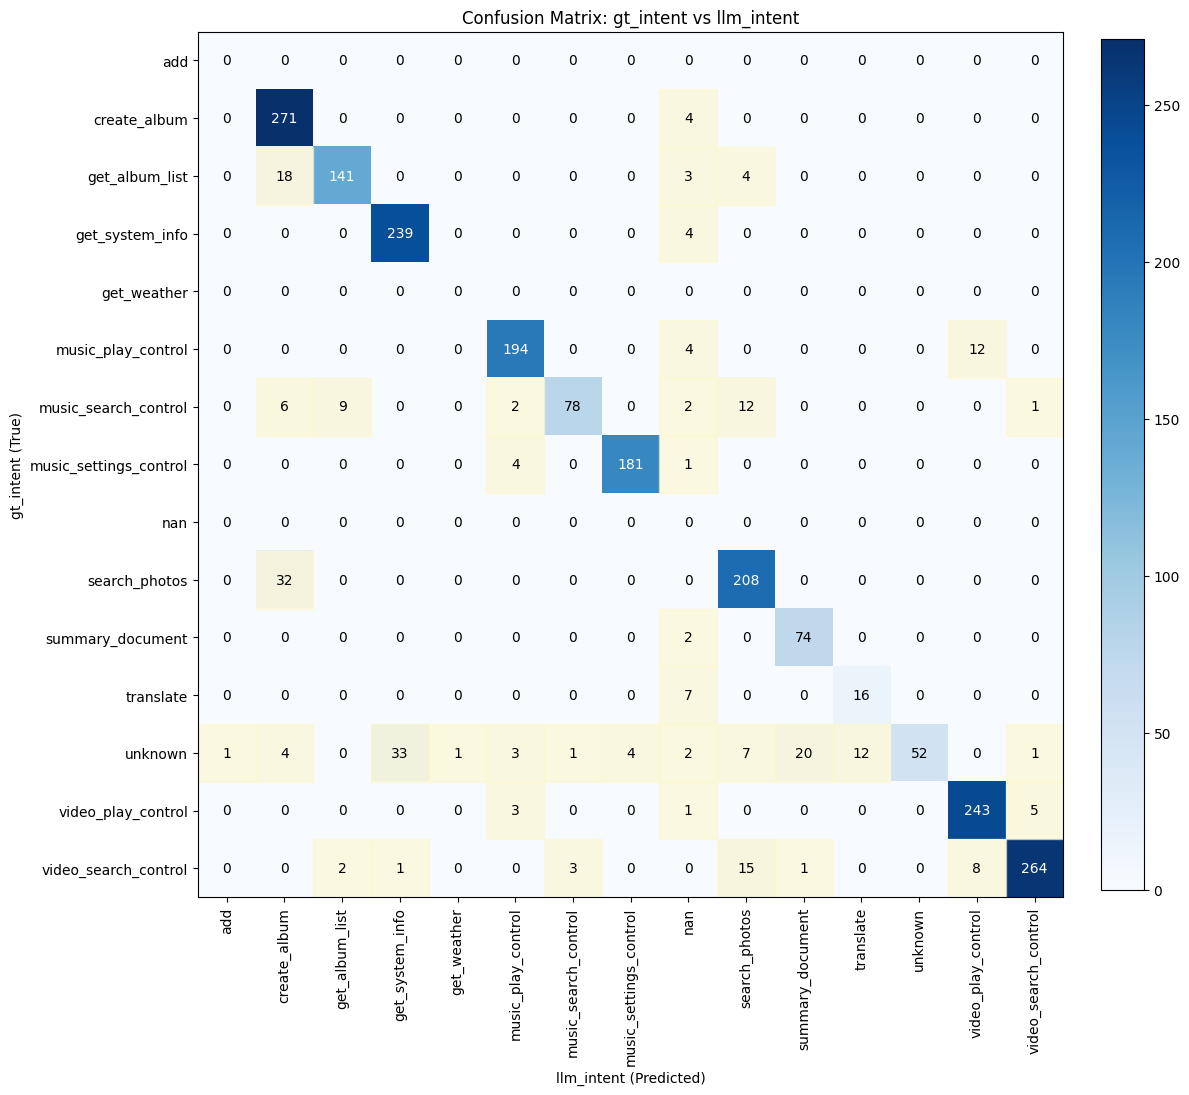

,add,create_album,get_album_list,get_system_info,get_weather,music_play_control,music_search_control,music_settings_control,nan,search_photos,summary_document,translate,unknown,video_play_control,video_search_control,row_sum,recall
add,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0000
create_album,0.0,271.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,4.0,0.0000,0.0000,0.0000,0.0,0.000,0.0000,275.0,0.9855
get_album_list,0.0,18.0000,141.0000,0.0000,0.0,0.0000,0.0000,0.0000,3.0,4.0000,0.0000,0.0000,0.0,0.000,0.0000,166.0,0.8494
get_system_info,0.0,0.0000,0.0000,239.0000,0.0,0.0000,0.0000,0.0000,4.0,0.0000,0.0000,0.0000,0.0,0.000,0.0000,243.0,0.9835
get_weather,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0000
music_play_control,0.0,0.0000,0.0000,0.0000,0.0,194.0000,0.0000,0.0000,4.0,0.0000,0.0000,0.0000,0.0,12.000,0.0000,210.0,0.9238
music_search_control,0.0,6.0000,9.0000,0.0000,0.0,2.0000,78.0000,0.0000,2.0,12.0000,0.0000,0.0000,0.0,0.000,1.0000,110.0,0.7091
music_settings_control,0.0,0.0000,0.0000,0.0000,0.0,4.0000,0.0000,181.0000,1.0,0.0000,0.0000,0.0000,0.0,0.000,0.0000,186.0,0.9731
nan,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,0.0000,0.0,0.0000
search_photos,0.0,32.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,208.0000,0.0000,0.0000,0.0,0.000,0.0000,240.0,0.8667


In [18]:

# 计算混淆矩阵
cm = confusion_matrix(df['gt_intent'], df['llm_intent'], labels=all_labels)

# 可视化混淆矩阵，并高亮非对角线（出错区域）为浅黄色
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(cm, cmap='Blues')

# 循环填充每个格子的数值，同时标黄色非对角线、蓝色对角线
for i in range(len(all_labels)):
    for j in range(len(all_labels)):
        value = cm[i, j]
        color = "black" if value < cm.max() / 2 else "white"
        # 错误区域(非对角线)标浅黄色
        if i != j and value > 0:
            ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color='#fff7cc', alpha=0.6, zorder=1))
        ax.text(j, i, int(value), ha="center", va="center", color=color, fontsize=10, zorder=2)

# 设置标签
ax.set_xticks(range(len(all_labels)))
ax.set_yticks(range(len(all_labels)))
ax.set_xticklabels(all_labels, rotation=90)
ax.set_yticklabels(all_labels)
plt.xlabel("llm_intent (Predicted)")
plt.ylabel("gt_intent (True)")
plt.title("Confusion Matrix: gt_intent vs llm_intent")
fig.colorbar(im, fraction=0.045, pad=0.04)
plt.tight_layout()
plt.show()

# 返回 DataFrame 格式的混淆矩阵，并增加每行/每列的 sum、各类别的 precision/recall
cm_df = pd.DataFrame(cm, index=all_labels, columns=all_labels, dtype='float64')

# 计算每行/每列的总和
cm_df['row_sum'] = cm_df.sum(axis=1)
cm_df.loc['col_sum'] = cm_df.sum(axis=0)

# 计算每个类别的 precision 和 recall
# Precision = diag / 列和， Recall = diag / 行和
diag = cm.diagonal().astype('float64')
precision = diag / (cm_df.loc['col_sum', all_labels] + 1e-12)
recall = diag / (cm_df.loc[all_labels, 'row_sum'] + 1e-12)

cm_df.loc['precision', all_labels] = precision
cm_df.loc[all_labels, 'recall'] = recall

# 保留所有值小数点后4位
cm_df = cm_df.round(4)

cm_df
